In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix
)
from scipy.stats import mode
import joblib

warnings.filterwarnings("ignore")




In [3]:
DATA_CSV_PATH = "DATA.csv"
df = pd.read_csv(DATA_CSV_PATH)


In [4]:
print("--- First 5 Rows ---")
print(df.head())
print("\n--- Last 5 Rows ---")
print(df.tail())

print("\n--- Data Shape (rows, columns) ---")
print(df.shape)

print("\n--- Data Types ---")
print(df.dtypes) # or df.info() for a more detailed summary including non-null counts

print("\n--- Column Names ---")
print(df.columns.tolist())

print("\n--- Basic Statistical Summary (for numerical columns) ---")
print(df.describe(include=np.number)) # Only numerical

print("\n--- Basic Statistical Summary (for categorical/object columns) ---")
print(df.describe(include=['object', 'category'])) # Only object/categorical

print("\n--- Check for Duplicated Rows ---")
print(f"Number of duplicated rows: {df.duplicated().sum()}")
# If duplicates exist, consider: df.drop_duplicates(inplace=True)

--- First 5 Rows ---
   Unnamed: 0  RID        PTID  PTEDUCAT EXAMDATE_bl  CDRSB_bl  ADAS11_bl  \
0           0    3  011_S_0003        18  2005-09-12       4.5      22.00   
1           1    4  022_S_0004        10  2005-11-08       1.0      14.33   
2           2    5  011_S_0005        16  2005-09-07       0.0       8.67   
3           3    6  100_S_0006        13  2005-11-29       0.5      18.67   
4           4    7  022_S_0007        10  2005-10-06       6.0      27.33   

   ADAS13_bl  ADASQ4_bl  MMSE_bl  ...  PTRACCAT_More than one  \
0      31.00        8.0     20.0  ...                     0.0   
1      21.33        6.0     27.0  ...                     0.0   
2      14.67        4.0     29.0  ...                     0.0   
3      25.67        7.0     25.0  ...                     0.0   
4      40.33       10.0     20.0  ...                     1.0   

   PTRACCAT_Unknown  PTRACCAT_White  PTMARRY_Married  PTMARRY_Never married  \
0               0.0             1.0           

In [5]:
print("\n--- Missing Values per Column (Count) ---")
print(df.isnull().sum())

print("\n--- Missing Values per Column (Percentage) ---")
print((df.isnull().sum() / len(df)) * 100)

# Optional: Visualize missing data patterns (if many columns have missing data)
# import missingno as msno
# msno.matrix(df)
# plt.show()
# msno.heatmap(df)
# plt.show()


--- Missing Values per Column (Count) ---
Unnamed: 0                      0
RID                             0
PTID                            0
PTEDUCAT                        0
EXAMDATE_bl                     0
CDRSB_bl                        0
ADAS11_bl                      12
ADAS13_bl                      23
ADASQ4_bl                       7
MMSE_bl                         1
FDG_bl                        895
Years_bl                        0
Month_bl                        0
AGE                             4
APOE4                           0
ABETA_VISIT1                    0
TAU_VISIT1                      0
PTAU_VISIT1                     0
CDRSB_VISIT1                    0
CDRSB_VISIT2                    0
CDRSB_VISIT3                    0
CDRSB_VISIT4                    0
ADAS11_VISIT1                   0
ADAS11_VISIT2                   0
ADAS11_VISIT3                   0
ADAS11_VISIT4                   0
ADAS13_VISIT1                   0
ADAS13_VISIT2                   0
ADAS1

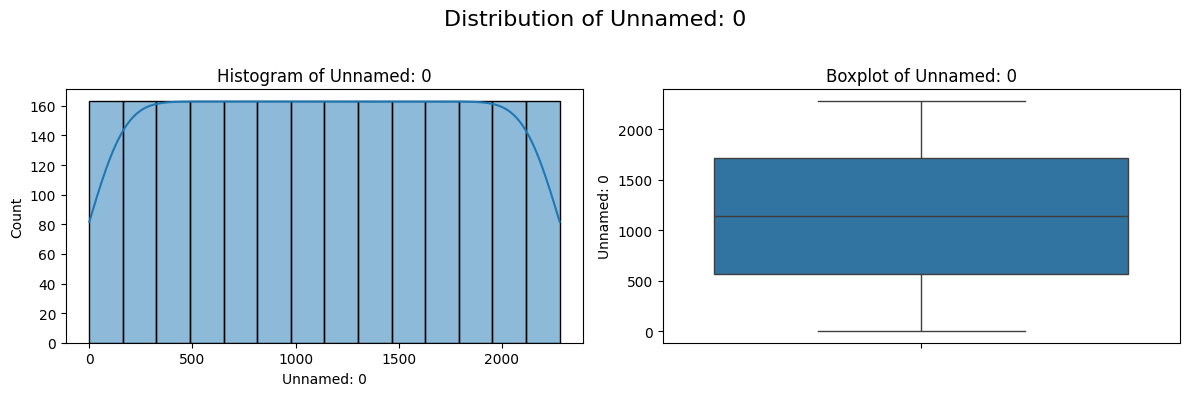


--- Summary for Unnamed: 0 ---
count    2282.000000
mean     1140.500000
std       658.900979
min         0.000000
25%       570.250000
50%      1140.500000
75%      1710.750000
max      2281.000000
Name: Unnamed: 0, dtype: float64
Skewness: 0.0
Kurtosis: -1.2000000000000002


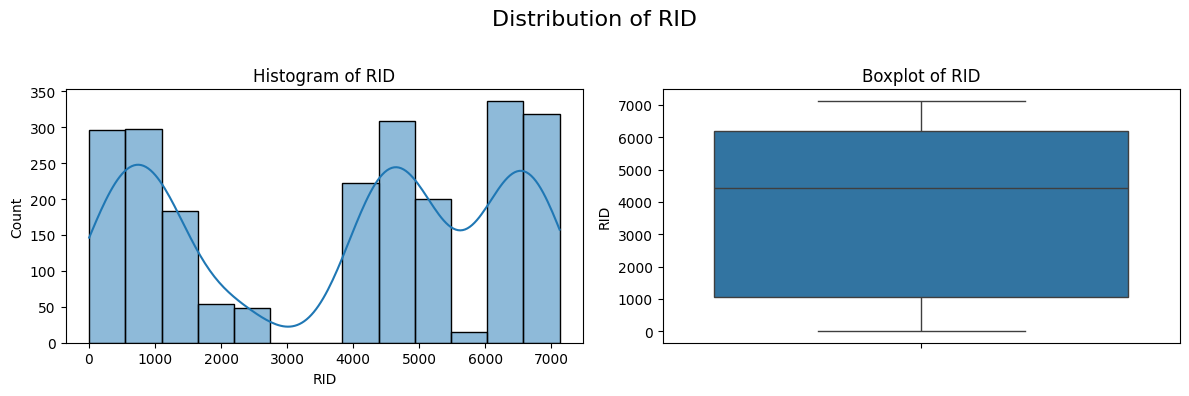


--- Summary for RID ---
count    2282.000000
mean     3759.887379
std      2436.839739
min         3.000000
25%      1057.500000
50%      4445.500000
75%      6182.250000
max      7125.000000
Name: RID, dtype: float64
Skewness: -0.2227665830698846
Kurtosis: -1.5138150025971397


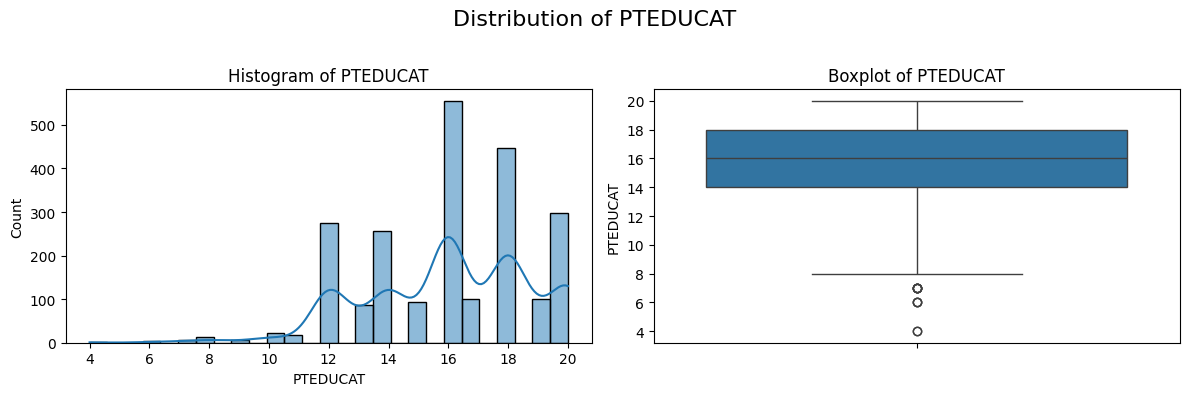


--- Summary for PTEDUCAT ---
count    2282.000000
mean       16.021911
std         2.752617
min         4.000000
25%        14.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: PTEDUCAT, dtype: float64
Skewness: -0.508590155252077
Kurtosis: 4.828325617101115e-06


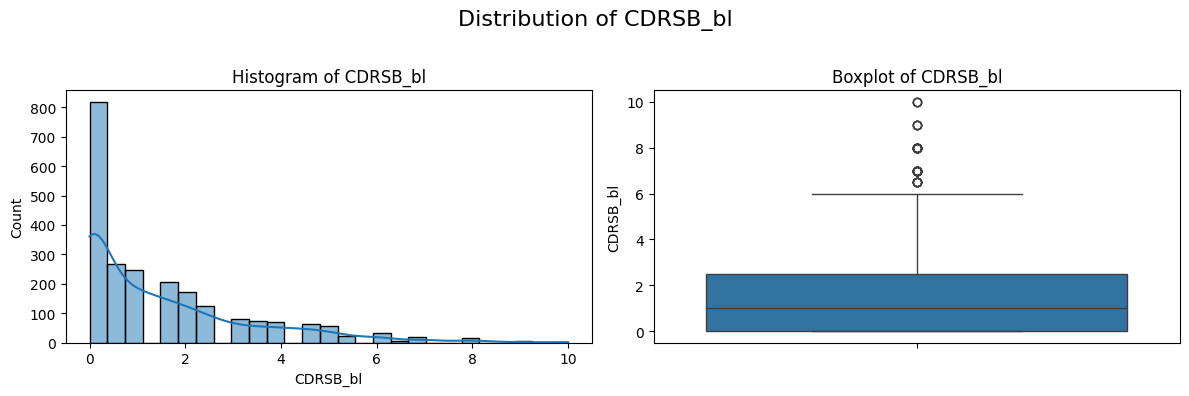


--- Summary for CDRSB_bl ---
count    2282.000000
mean        1.485977
std         1.807548
min         0.000000
25%         0.000000
50%         1.000000
75%         2.500000
max        10.000000
Name: CDRSB_bl, dtype: float64
Skewness: 1.5024679131490415
Kurtosis: 2.089329352258138


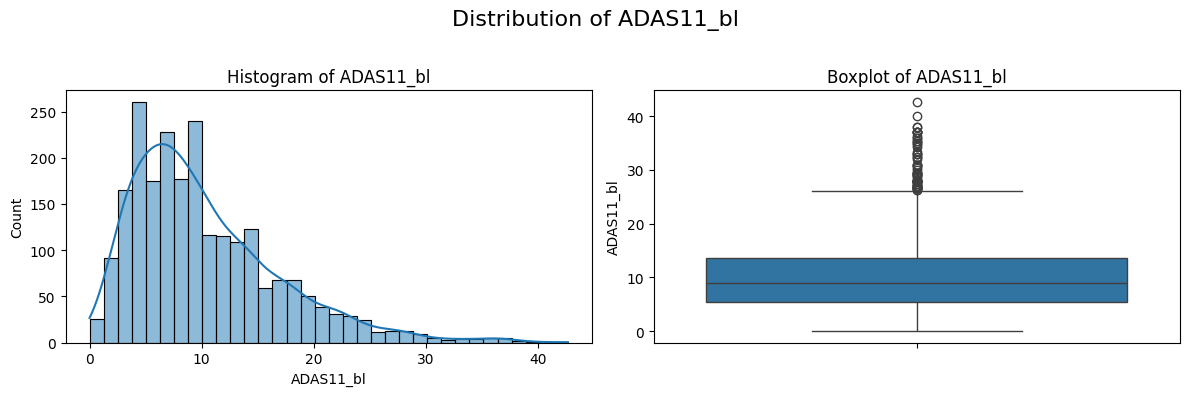


--- Summary for ADAS11_bl ---
count    2270.000000
mean       10.277648
std         6.630521
min         0.000000
25%         5.330000
50%         9.000000
75%        13.670000
max        42.670000
Name: ADAS11_bl, dtype: float64
Skewness: 1.2470268681740135
Kurtosis: 1.8307695521663963


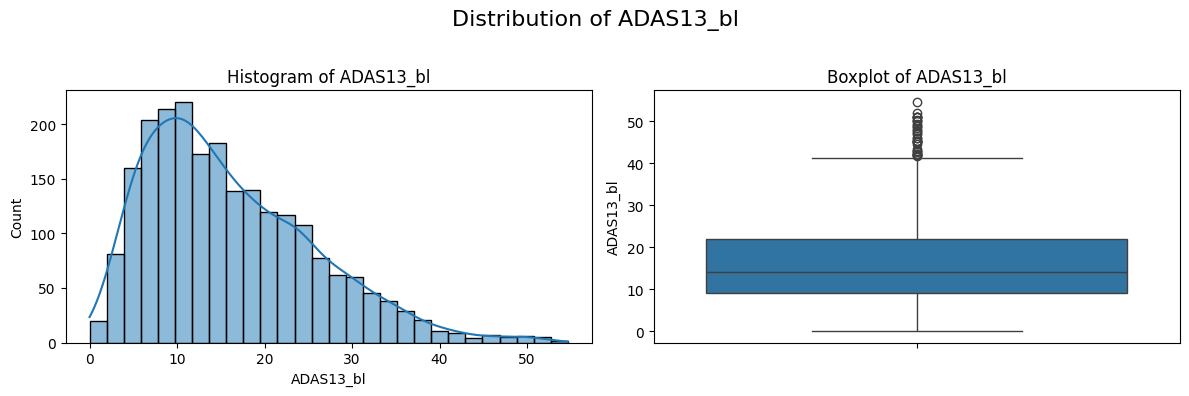


--- Summary for ADAS13_bl ---
count    2259.000000
mean       16.109008
std         9.664091
min         0.000000
25%         9.000000
50%        14.000000
75%        22.000000
max        54.670000
Name: ADAS13_bl, dtype: float64
Skewness: 0.8796265196280254
Kurtosis: 0.5023153346447482


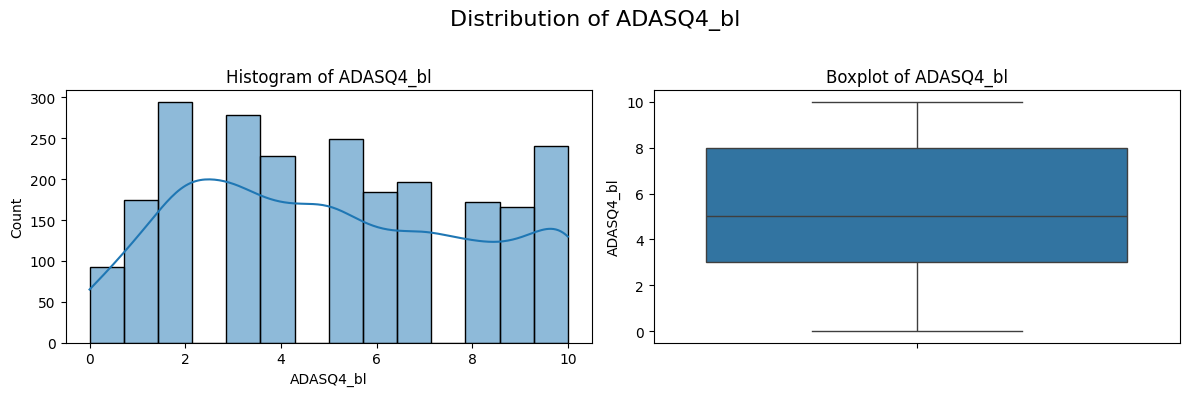


--- Summary for ADASQ4_bl ---
count    2275.000000
mean        5.056264
std         2.984480
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: ADASQ4_bl, dtype: float64
Skewness: 0.17389571295907125
Kurtosis: -1.1266029119200314


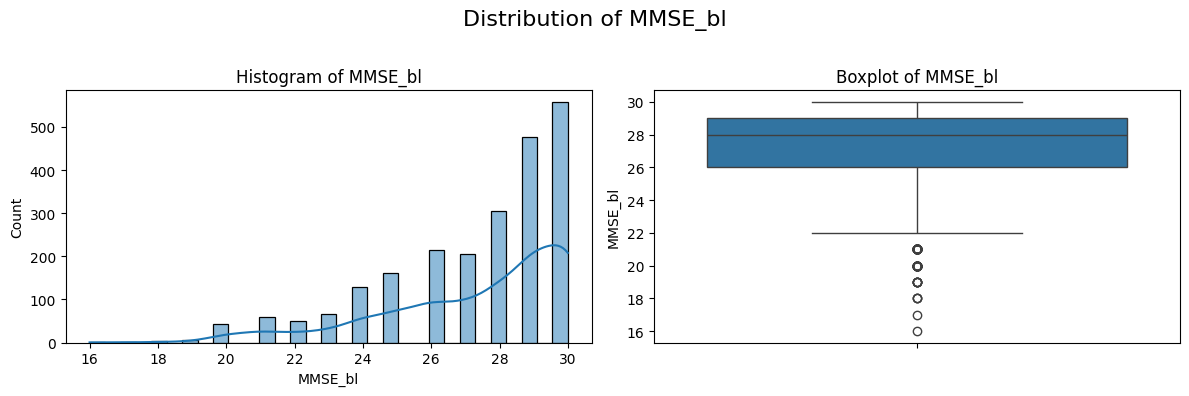


--- Summary for MMSE_bl ---
count    2281.000000
mean       27.313897
std         2.692033
min        16.000000
25%        26.000000
50%        28.000000
75%        29.000000
max        30.000000
Name: MMSE_bl, dtype: float64
Skewness: -1.07421428682622
Kurtosis: 0.49265766680212586


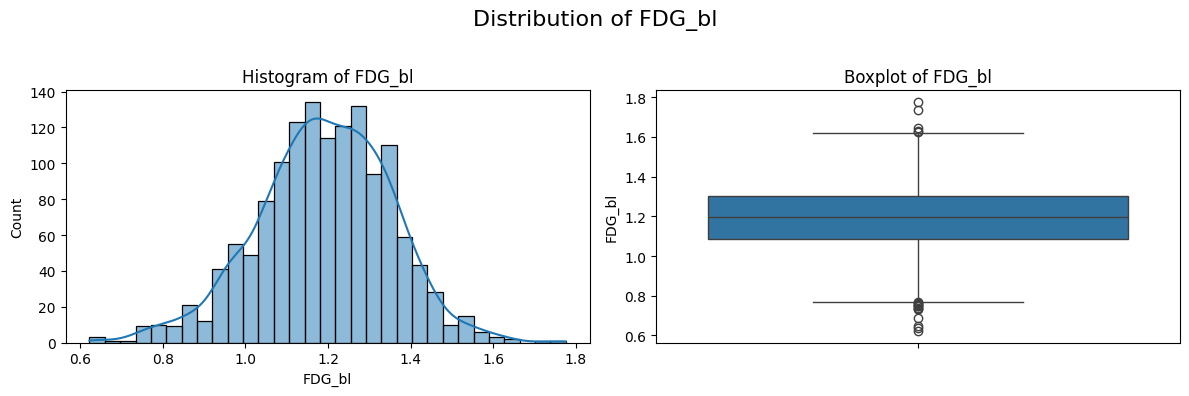


--- Summary for FDG_bl ---
count    1387.000000
mean        1.190587
std         0.161399
min         0.621933
25%         1.087485
50%         1.193960
75%         1.301090
max         1.776170
Name: FDG_bl, dtype: float64
Skewness: -0.21539866845935918
Kurtosis: 0.3200199358651168


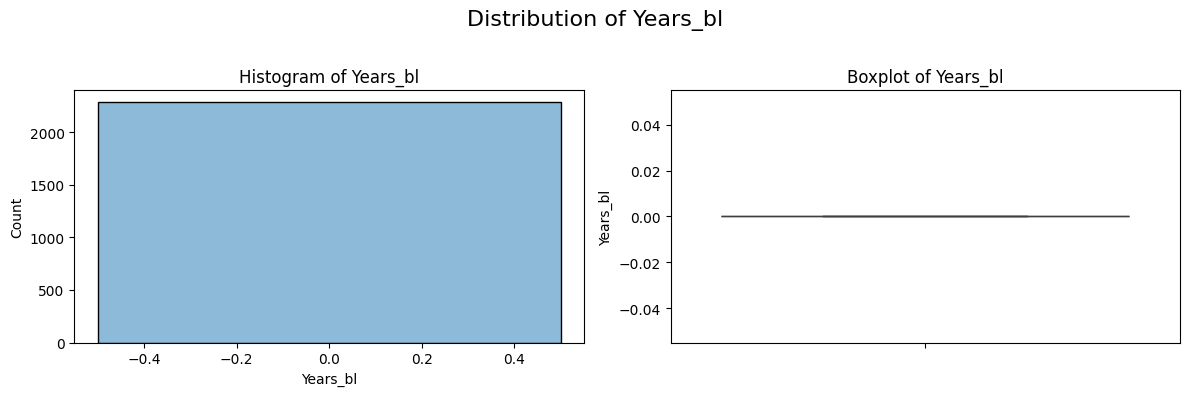


--- Summary for Years_bl ---
count    2282.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Years_bl, dtype: float64
Skewness: 0.0
Kurtosis: 0.0


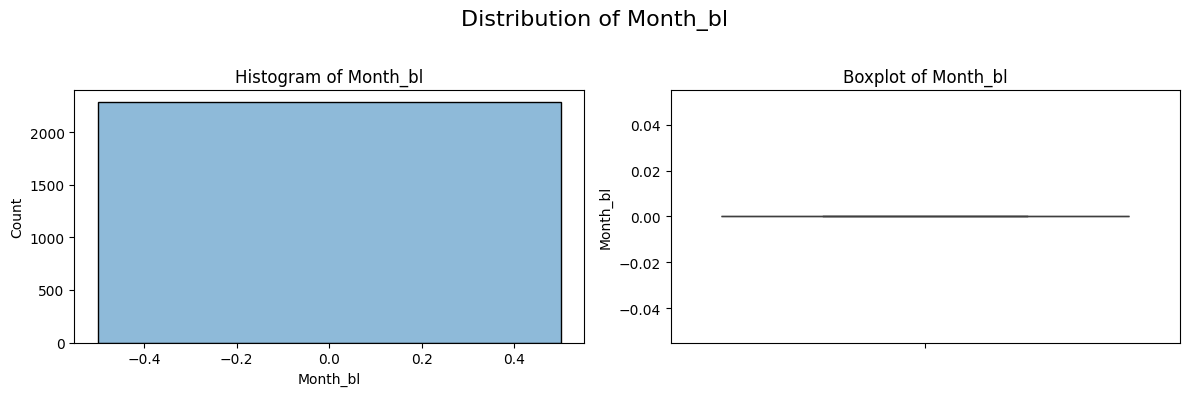


--- Summary for Month_bl ---
count    2282.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Month_bl, dtype: float64
Skewness: 0.0
Kurtosis: 0.0


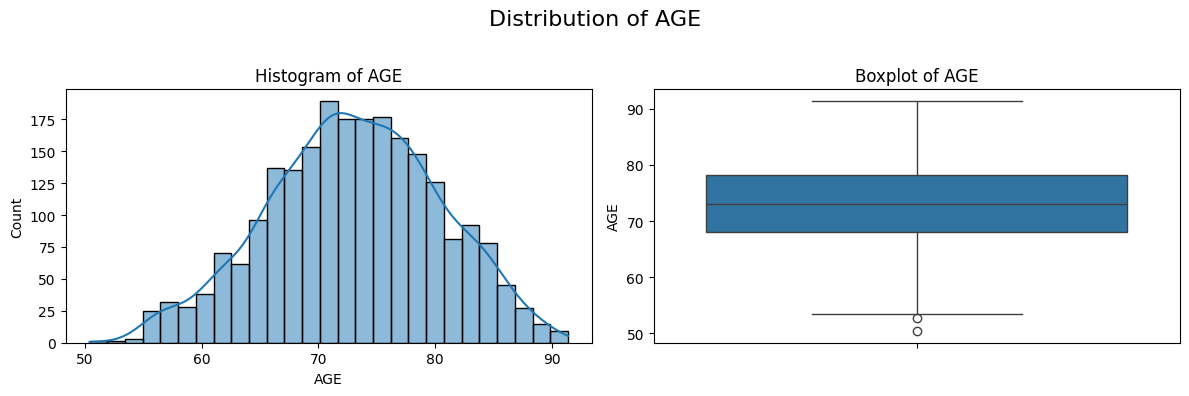


--- Summary for AGE ---
count    2278.000000
mean       73.042757
std         7.335977
min        50.400000
25%        68.100000
50%        73.100000
75%        78.200000
max        91.400000
Name: AGE, dtype: float64
Skewness: -0.11625602689035458
Kurtosis: -0.36788711145322317


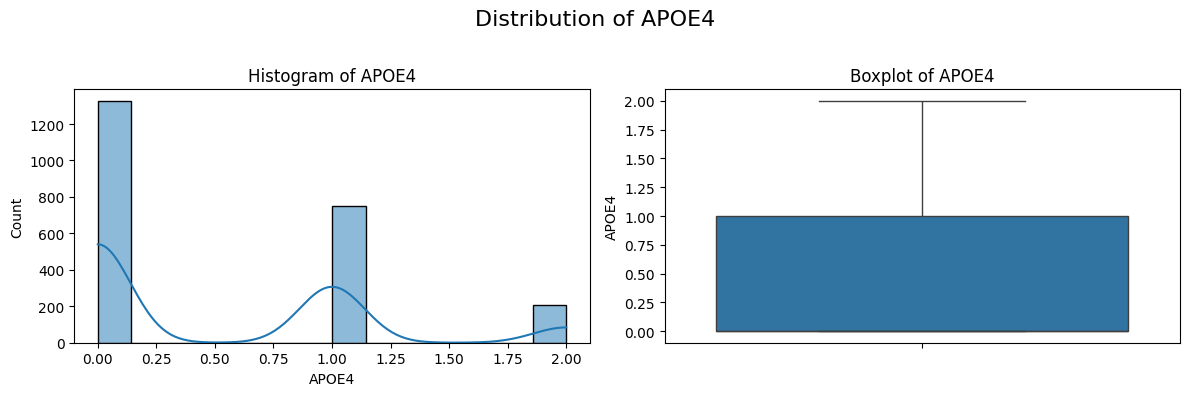


--- Summary for APOE4 ---
count    2282.000000
mean        0.510079
std         0.656224
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: APOE4, dtype: float64
Skewness: 0.9223999201629492
Kurtosis: -0.2826365818120884


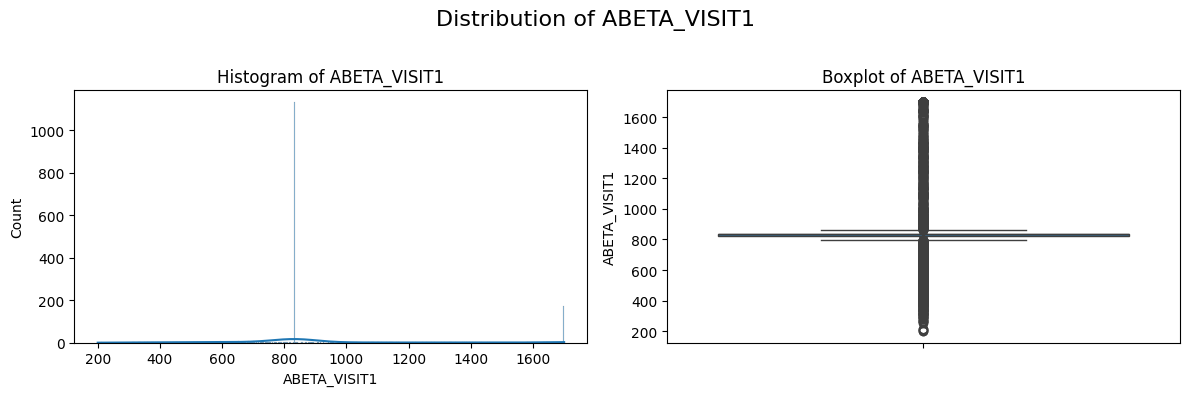


--- Summary for ABETA_VISIT1 ---
count    2282.000000
mean      899.101884
std       331.842301
min       200.000000
25%       822.750000
50%       832.700000
75%       838.375000
max      1700.000000
Name: ABETA_VISIT1, dtype: float64
Skewness: 1.1363672231801794
Kurtosis: 0.9778925854163734


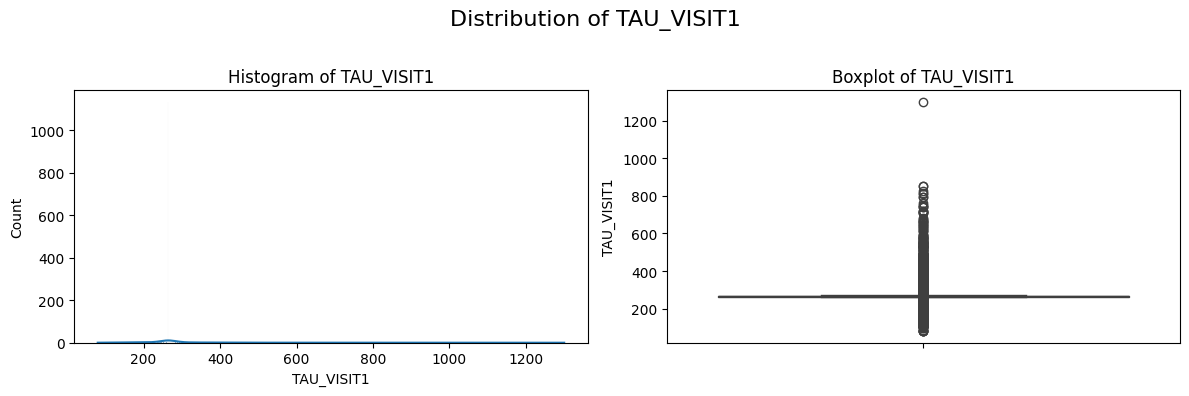


--- Summary for TAU_VISIT1 ---
count    2282.000000
mean      278.933265
std        96.819832
min        80.000000
25%       264.025000
50%       264.800000
75%       266.800000
max      1300.000000
Name: TAU_VISIT1, dtype: float64
Skewness: 2.4514216220591085
Kurtosis: 11.786493748124663


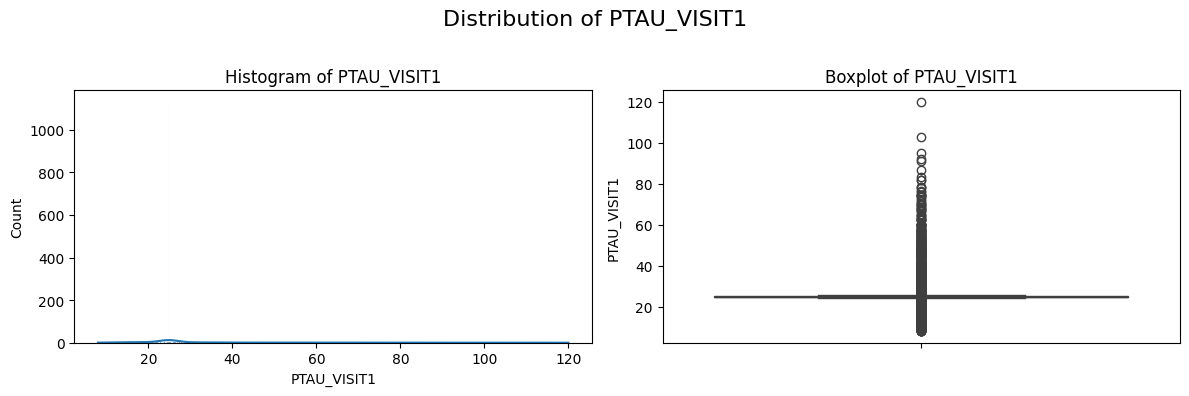


--- Summary for PTAU_VISIT1 ---
count    2282.000000
mean       26.599693
std        10.695664
min         8.000000
25%        24.672500
50%        24.870000
75%        25.027500
max       120.000000
Name: PTAU_VISIT1, dtype: float64
Skewness: 2.534092271353827
Kurtosis: 10.449445282742246


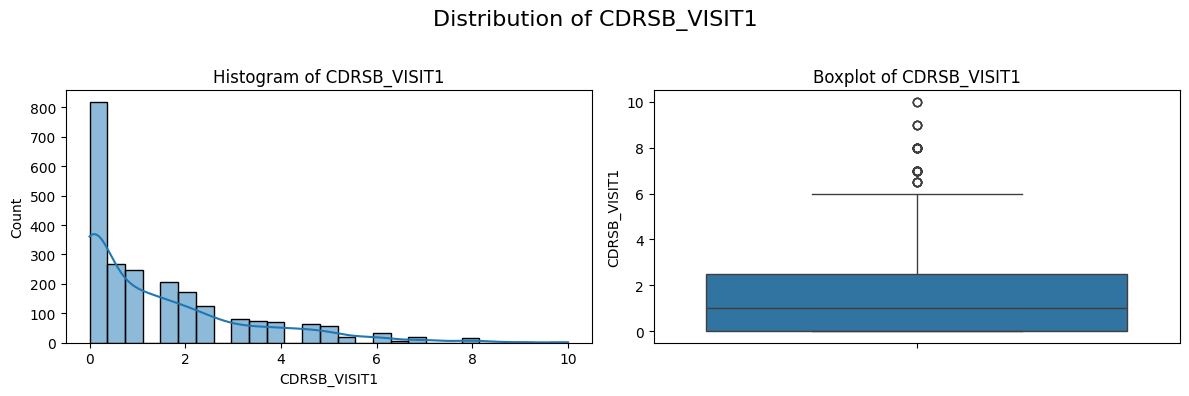


--- Summary for CDRSB_VISIT1 ---
count    2282.000000
mean        1.485977
std         1.807548
min         0.000000
25%         0.000000
50%         1.000000
75%         2.500000
max        10.000000
Name: CDRSB_VISIT1, dtype: float64
Skewness: 1.5024679131490415
Kurtosis: 2.089329352258138


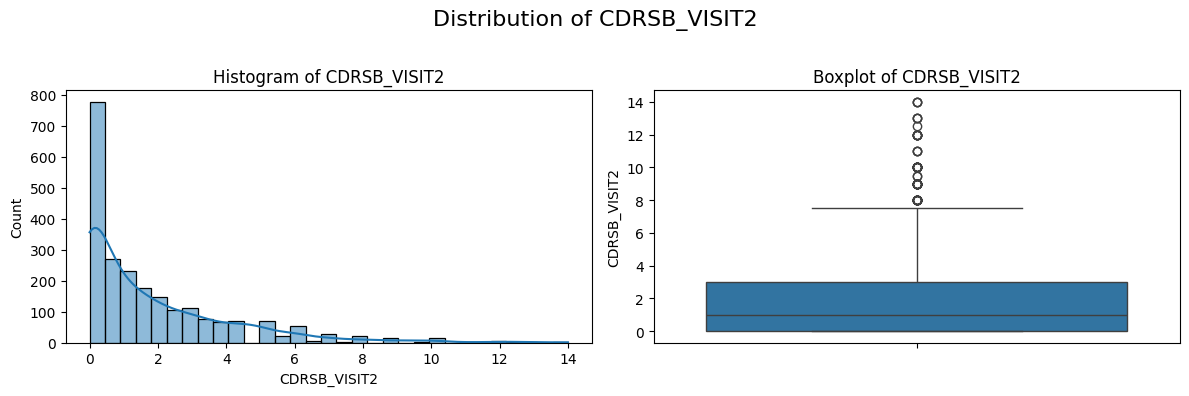


--- Summary for CDRSB_VISIT2 ---
count    2282.000000
mean        1.798203
std         2.292921
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        14.000000
Name: CDRSB_VISIT2, dtype: float64
Skewness: 1.8374960173868706
Kurtosis: 4.001992815750146


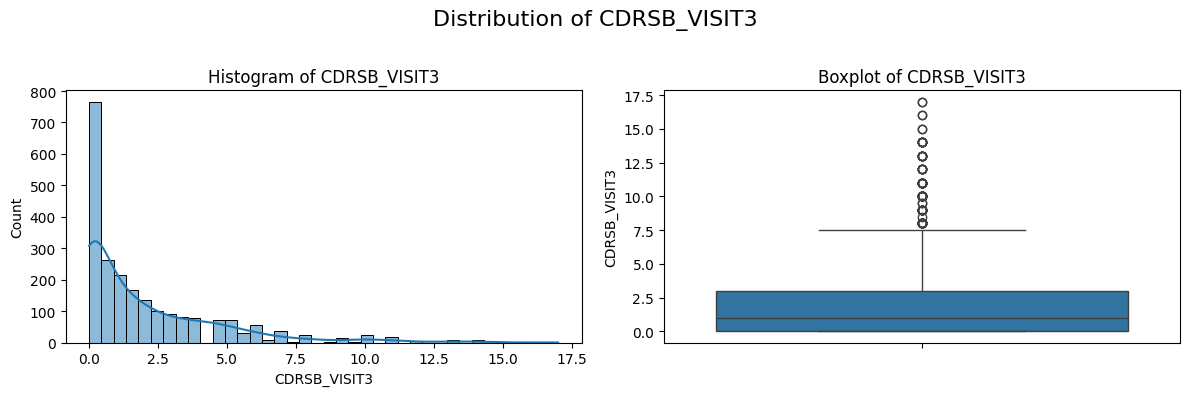


--- Summary for CDRSB_VISIT3 ---
count    2282.000000
mean        2.054119
std         2.715549
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        17.000000
Name: CDRSB_VISIT3, dtype: float64
Skewness: 1.9831492962965762
Kurtosis: 4.622252233963799


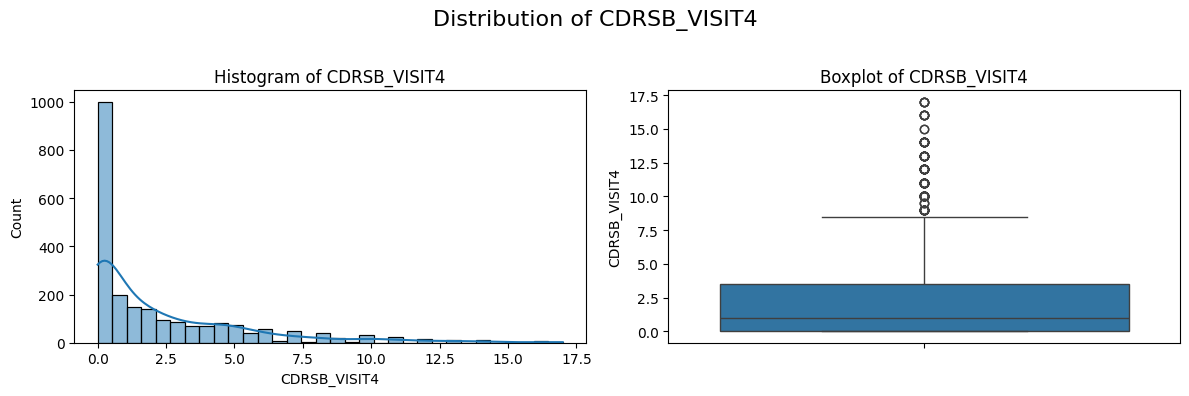


--- Summary for CDRSB_VISIT4 ---
count    2282.000000
mean        2.352323
std         3.103698
min         0.000000
25%         0.000000
50%         1.000000
75%         3.500000
max        17.000000
Name: CDRSB_VISIT4, dtype: float64
Skewness: 1.8602790039421027
Kurtosis: 3.6466280695408932


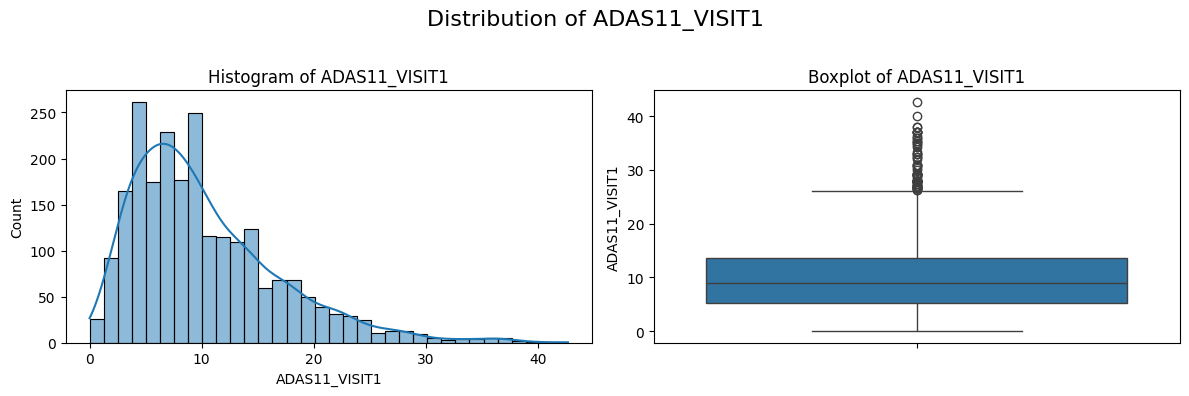


--- Summary for ADAS11_VISIT1 ---
count    2282.000000
mean       10.275167
std         6.622120
min         0.000000
25%         5.330000
50%         9.000000
75%        13.670000
max        42.670000
Name: ADAS11_VISIT1, dtype: float64
Skewness: 1.2507862671392838
Kurtosis: 1.8426124792299663


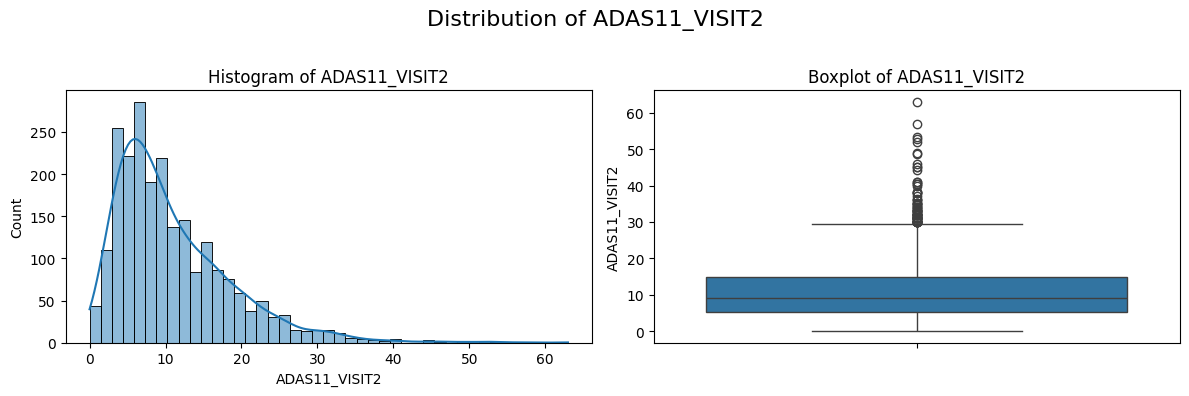


--- Summary for ADAS11_VISIT2 ---
count    2282.000000
mean       10.959522
std         7.765009
min         0.000000
25%         5.330000
50%         9.000000
75%        15.000000
max        63.000000
Name: ADAS11_VISIT2, dtype: float64
Skewness: 1.5823996214241771
Kurtosis: 3.8802174978971924


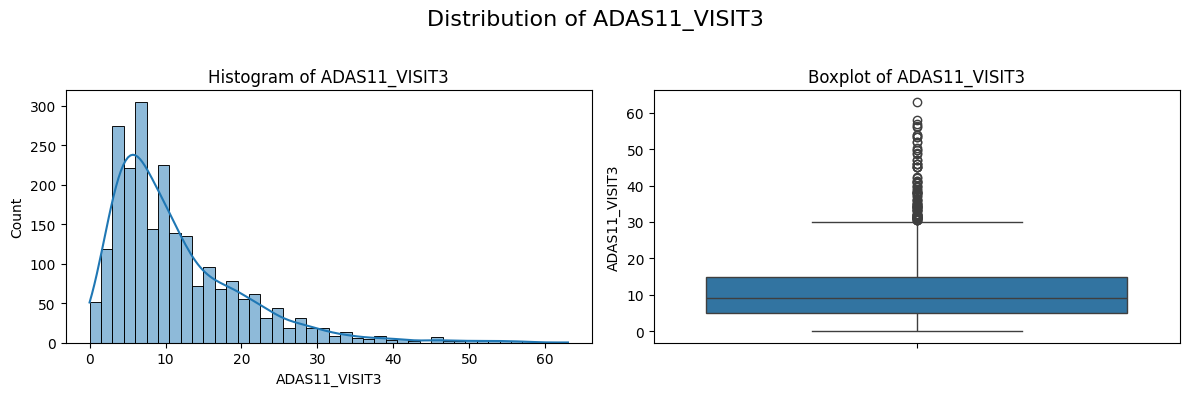


--- Summary for ADAS11_VISIT3 ---
count    2282.000000
mean       11.352511
std         8.828316
min         0.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        63.000000
Name: ADAS11_VISIT3, dtype: float64
Skewness: 1.7677744298332976
Kurtosis: 4.277384596580884


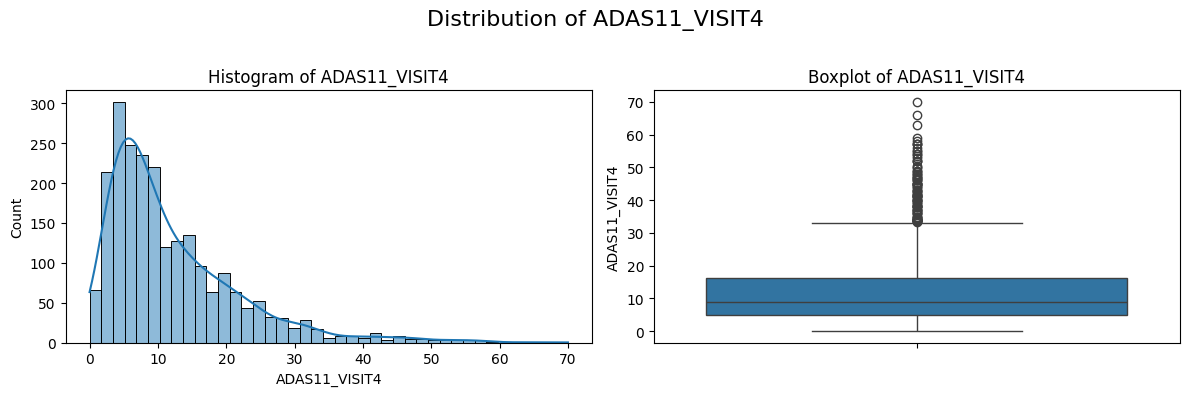


--- Summary for ADAS11_VISIT4 ---
count    2282.000000
mean       12.145833
std         9.931743
min         0.000000
25%         5.000000
50%         9.000000
75%        16.330000
max        70.000000
Name: ADAS11_VISIT4, dtype: float64
Skewness: 1.7820607954328282
Kurtosis: 4.039020147576478


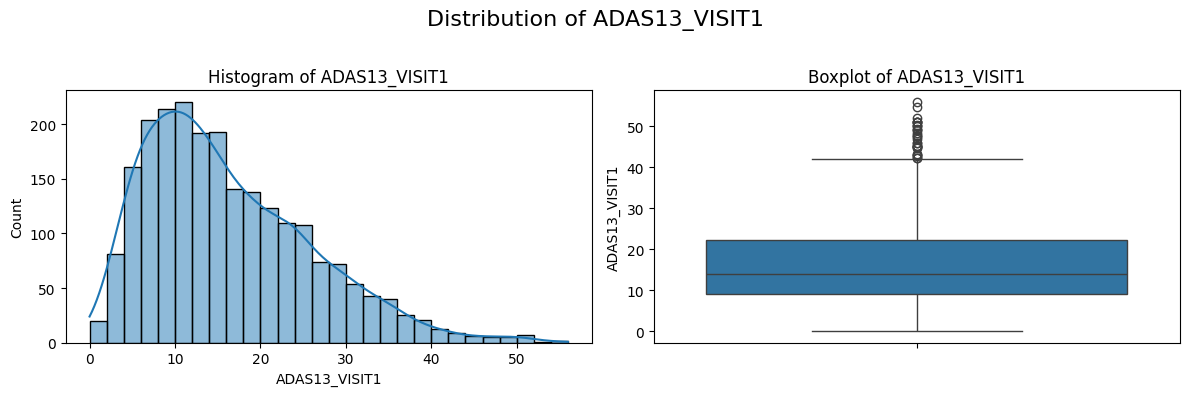


--- Summary for ADAS13_VISIT1 ---
count    2282.000000
mean       16.158598
std         9.696600
min         0.000000
25%         9.000000
50%        14.000000
75%        22.330000
max        56.000000
Name: ADAS13_VISIT1, dtype: float64
Skewness: 0.8914173383002029
Kurtosis: 0.5558537329105198


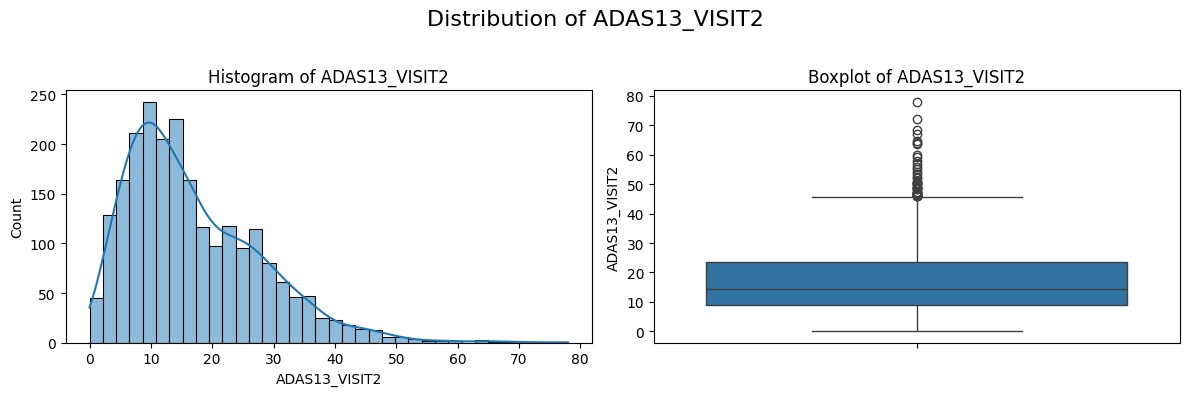


--- Summary for ADAS13_VISIT2 ---
count    2282.000000
mean       16.992962
std        10.994430
min         0.000000
25%         9.000000
50%        14.500000
75%        23.670000
max        78.000000
Name: ADAS13_VISIT2, dtype: float64
Skewness: 1.1088397364337956
Kurtosis: 1.5646574236667825


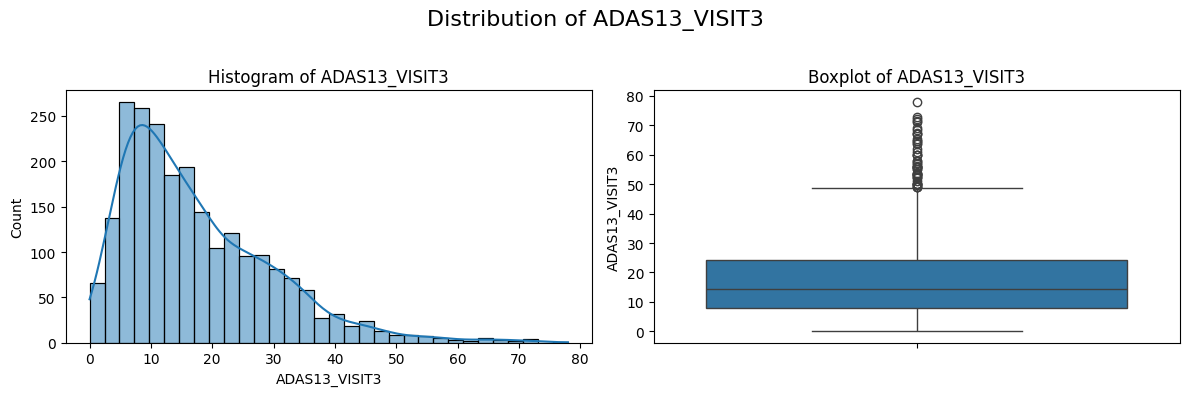


--- Summary for ADAS13_VISIT3 ---
count    2282.000000
mean       17.444663
std        12.181981
min         0.000000
25%         8.000000
50%        14.330000
75%        24.330000
max        78.000000
Name: ADAS13_VISIT3, dtype: float64
Skewness: 1.260582481976293
Kurtosis: 1.9243761207108734


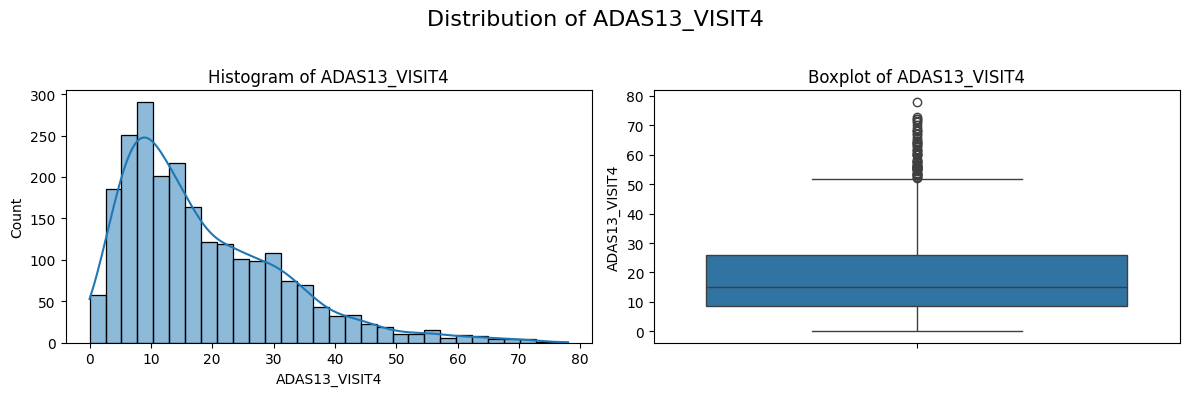


--- Summary for ADAS13_VISIT4 ---
count    2282.000000
mean       18.446459
std        13.258141
min         0.000000
25%         8.670000
50%        15.000000
75%        26.000000
max        78.000000
Name: ADAS13_VISIT4, dtype: float64
Skewness: 1.242543574412001
Kurtosis: 1.5729650732554865


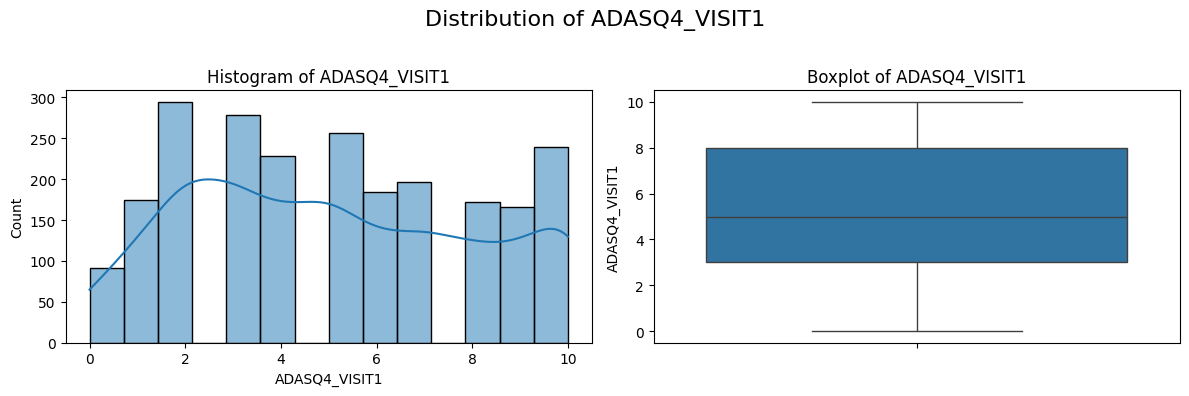


--- Summary for ADASQ4_VISIT1 ---
count    2282.000000
mean        5.056091
std         2.979899
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: ADASQ4_VISIT1, dtype: float64
Skewness: 0.17433628589106434
Kurtosis: -1.1207906281824709


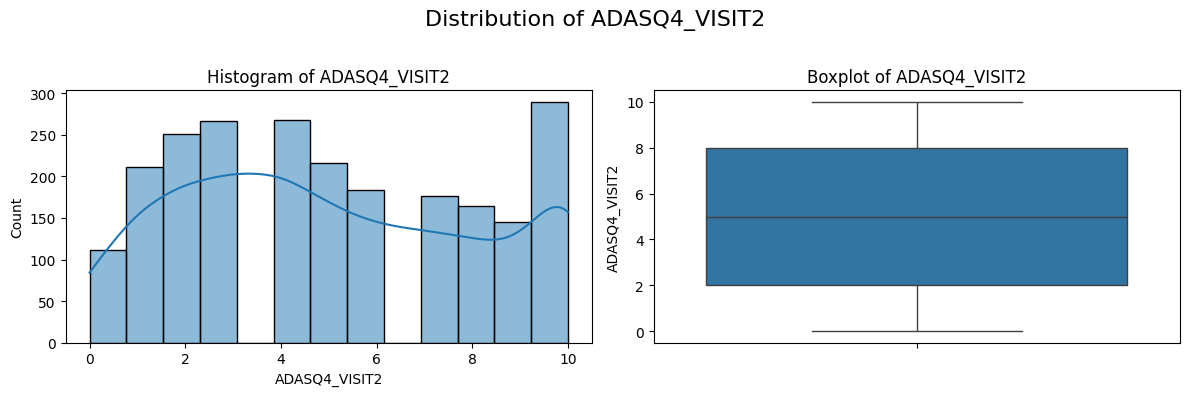


--- Summary for ADASQ4_VISIT2 ---
count    2282.000000
mean        5.042068
std         3.082382
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: ADASQ4_VISIT2, dtype: float64
Skewness: 0.1799854522425054
Kurtosis: -1.1504381579332448


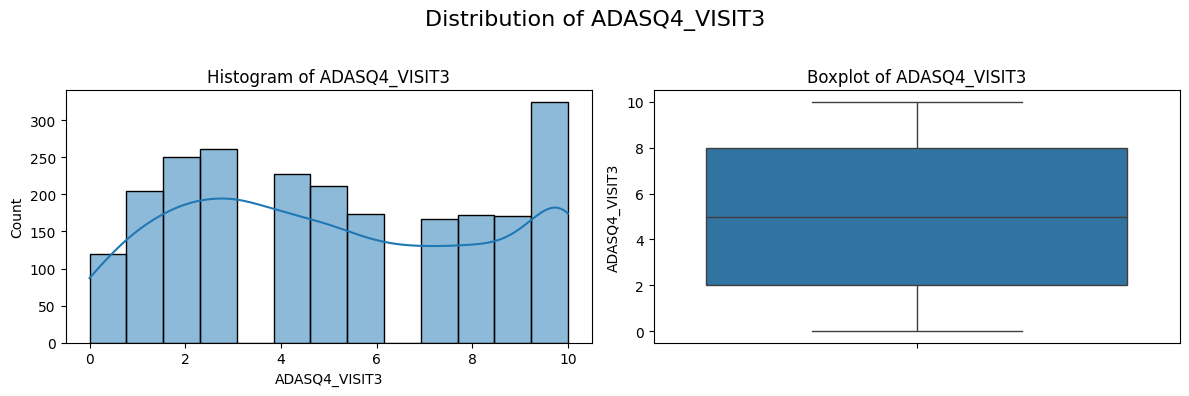


--- Summary for ADASQ4_VISIT3 ---
count    2282.000000
mean        5.178352
std         3.172272
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: ADASQ4_VISIT3, dtype: float64
Skewness: 0.11155615635114038
Kurtosis: -1.2460061380161547


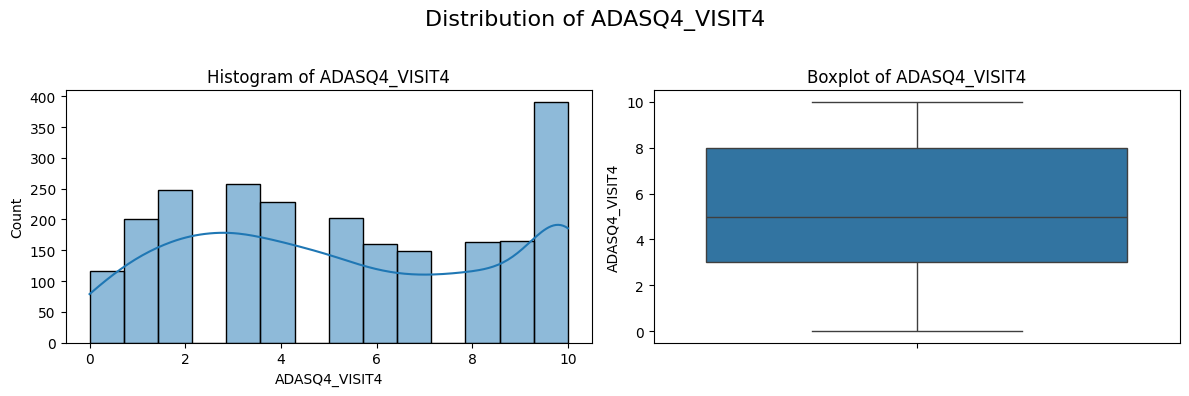


--- Summary for ADASQ4_VISIT4 ---
count    2282.000000
mean        5.298861
std         3.246026
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: ADASQ4_VISIT4, dtype: float64
Skewness: 0.08983616181536304
Kurtosis: -1.3038123161671717


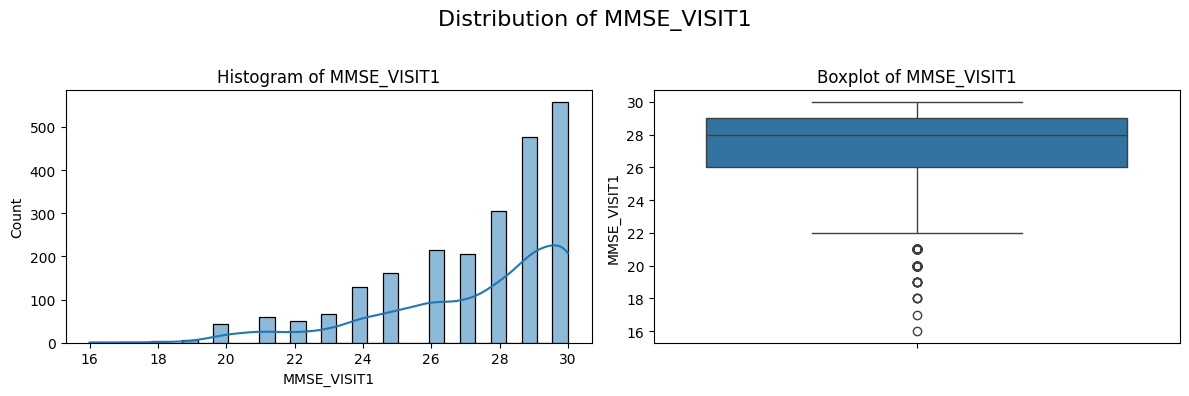


--- Summary for MMSE_VISIT1 ---
count    2282.000000
mean       27.314198
std         2.691481
min        16.000000
25%        26.000000
50%        28.000000
75%        29.000000
max        30.000000
Name: MMSE_VISIT1, dtype: float64
Skewness: -1.0747316750643472
Kurtosis: 0.49447258805715233


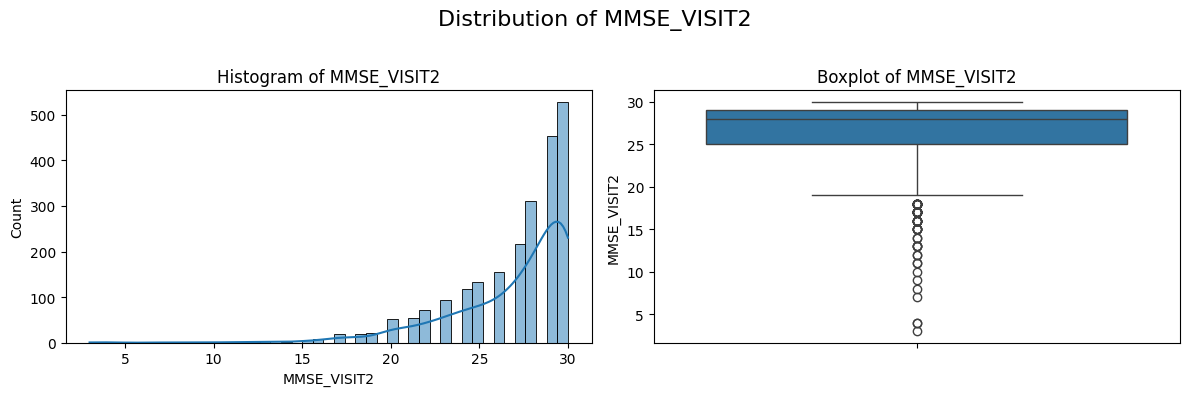


--- Summary for MMSE_VISIT2 ---
count    2282.000000
mean       26.816827
std         3.529883
min         3.000000
25%        25.000000
50%        28.000000
75%        29.000000
max        30.000000
Name: MMSE_VISIT2, dtype: float64
Skewness: -1.7695553130769472
Kurtosis: 4.585402995666868


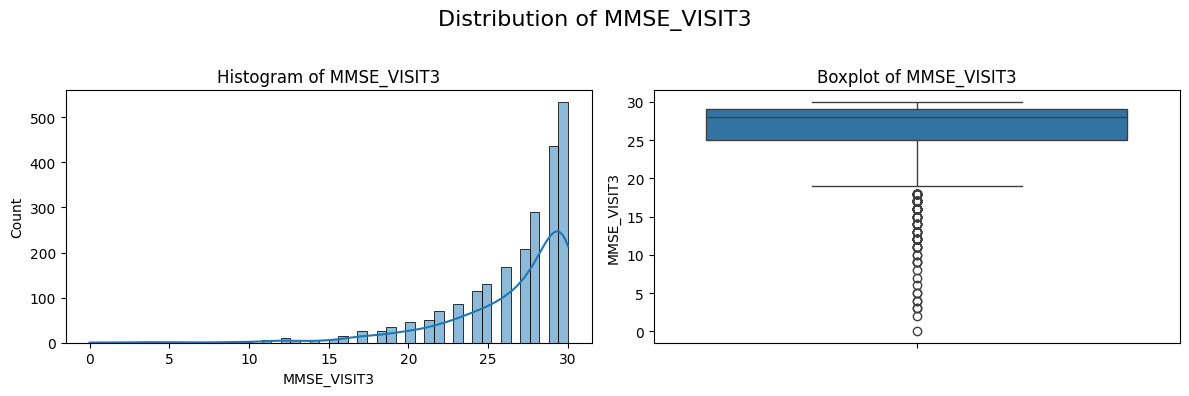


--- Summary for MMSE_VISIT3 ---
count    2282.000000
mean       26.524978
std         4.085296
min         0.000000
25%        25.000000
50%        28.000000
75%        29.000000
max        30.000000
Name: MMSE_VISIT3, dtype: float64
Skewness: -2.010555471913928
Kurtosis: 5.559900459590159


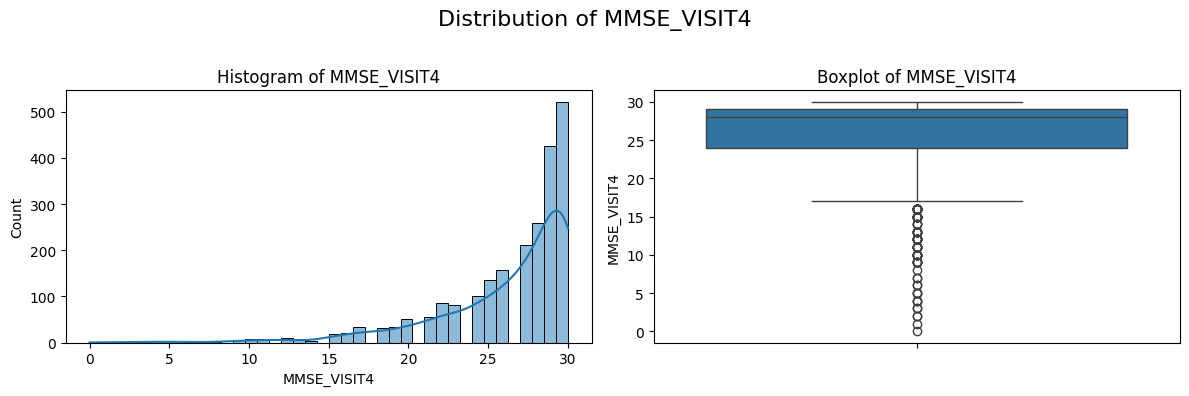


--- Summary for MMSE_VISIT4 ---
count    2282.000000
mean       26.173094
std         4.536888
min         0.000000
25%        24.000000
50%        28.000000
75%        29.000000
max        30.000000
Name: MMSE_VISIT4, dtype: float64
Skewness: -1.9452940388910556
Kurtosis: 4.792790301190738


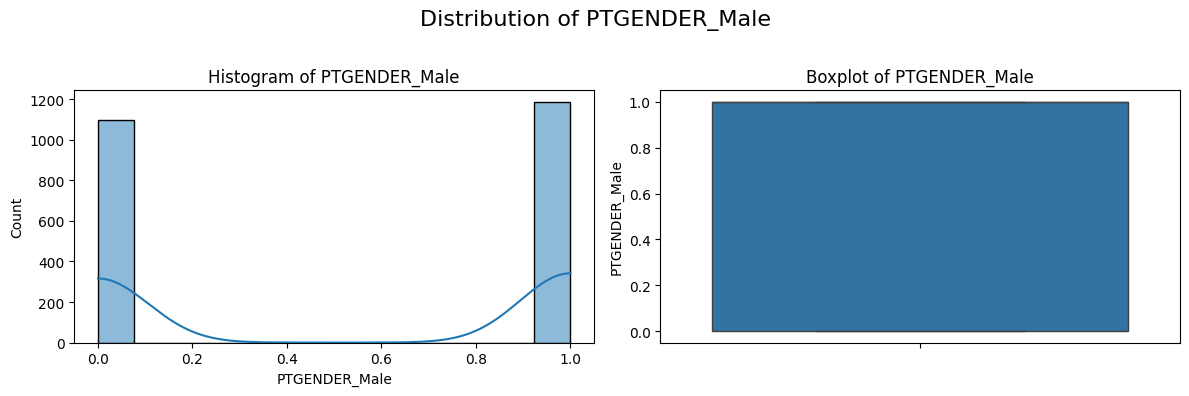


--- Summary for PTGENDER_Male ---
count    2282.000000
mean        0.519281
std         0.499738
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PTGENDER_Male, dtype: float64
Skewness: -0.07723351469074455
Kurtosis: -1.9957849075065843


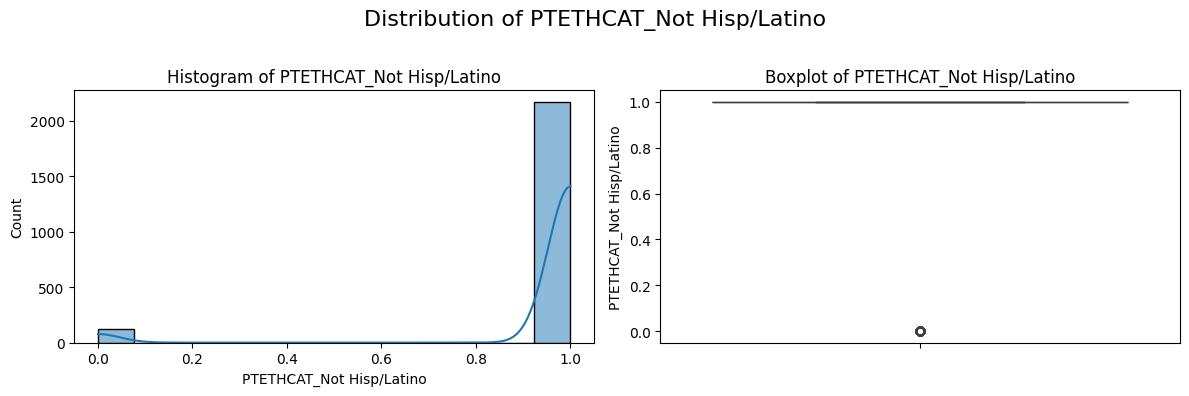


--- Summary for PTETHCAT_Not Hisp/Latino ---
count    2282.000000
mean        0.948291
std         0.221487
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PTETHCAT_Not Hisp/Latino, dtype: float64
Skewness: -4.051553827701841
Kurtosis: 14.427732468900123


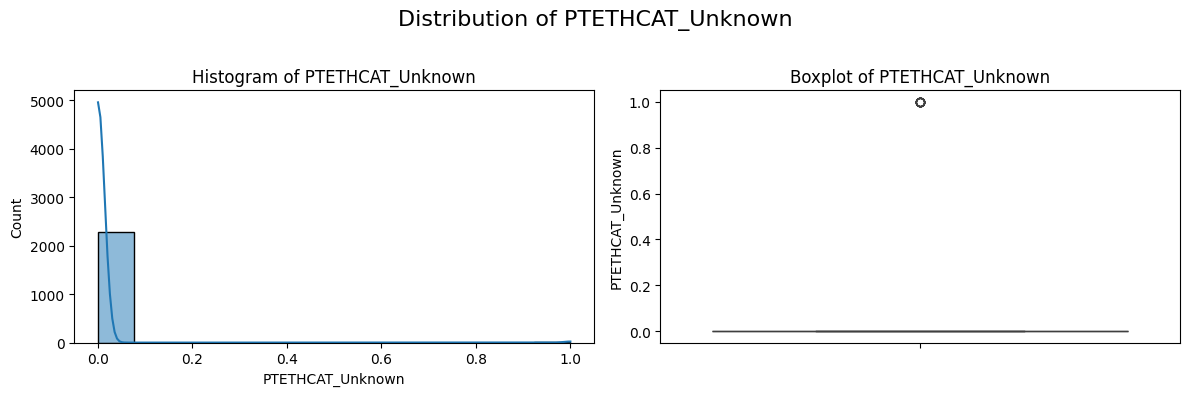


--- Summary for PTETHCAT_Unknown ---
count    2282.000000
mean        0.004382
std         0.066067
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTETHCAT_Unknown, dtype: float64
Skewness: 15.016684375486772
Kurtosis: 223.69686228103657


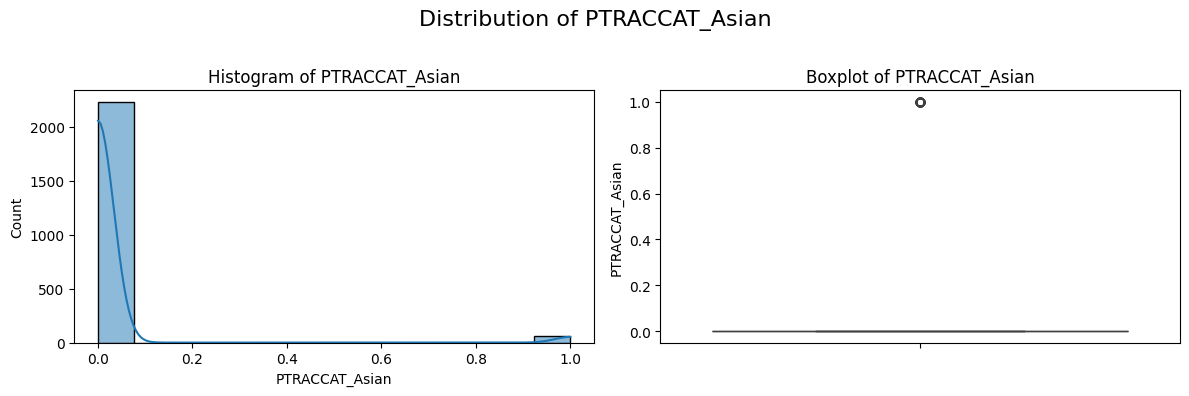


--- Summary for PTRACCAT_Asian ---
count    2282.000000
mean        0.024978
std         0.156092
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTRACCAT_Asian, dtype: float64
Skewness: 6.09175541545902
Kurtosis: 35.1402810775067


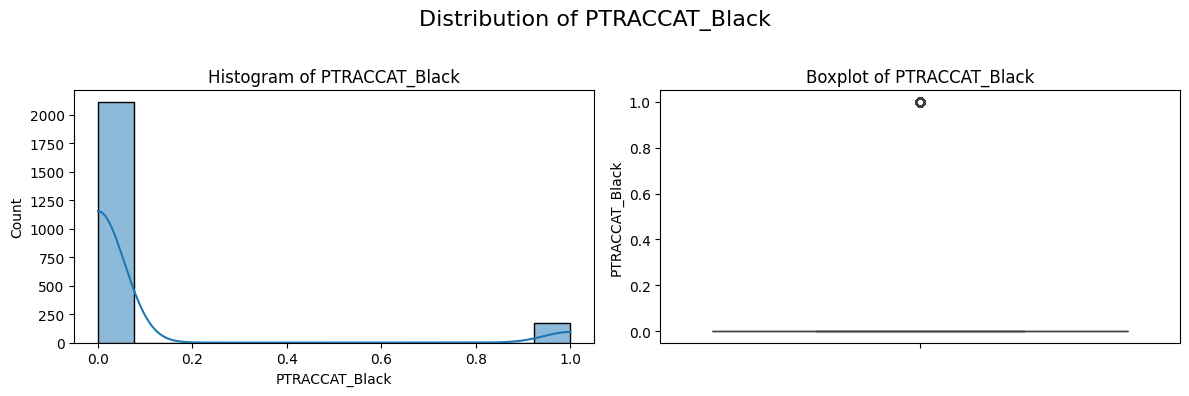


--- Summary for PTRACCAT_Black ---
count    2282.000000
mean        0.074934
std         0.263343
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTRACCAT_Black, dtype: float64
Skewness: 3.231061122840482
Kurtosis: 8.447158507966646


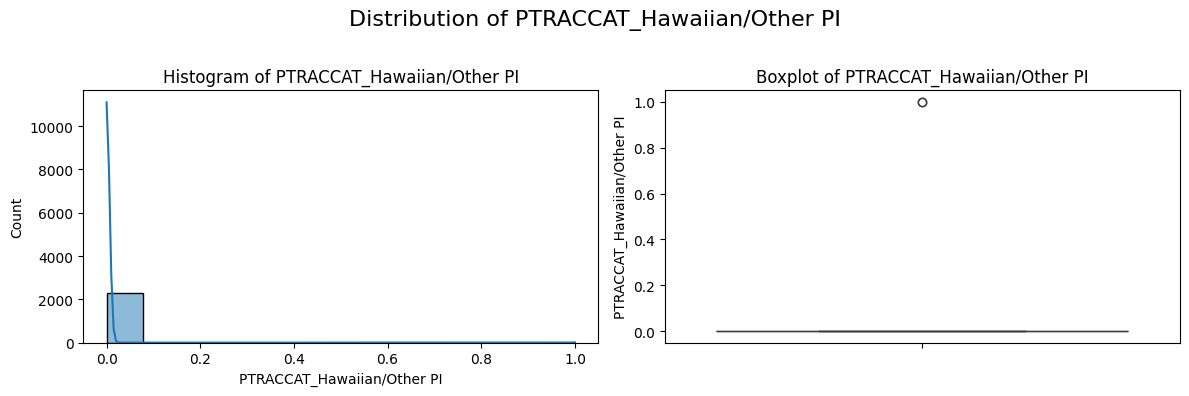


--- Summary for PTRACCAT_Hawaiian/Other PI ---
count    2282.000000
mean        0.000876
std         0.029598
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTRACCAT_Hawaiian/Other PI, dtype: float64
Skewness: 33.756461375499626
Kurtosis: 1138.4964900738692


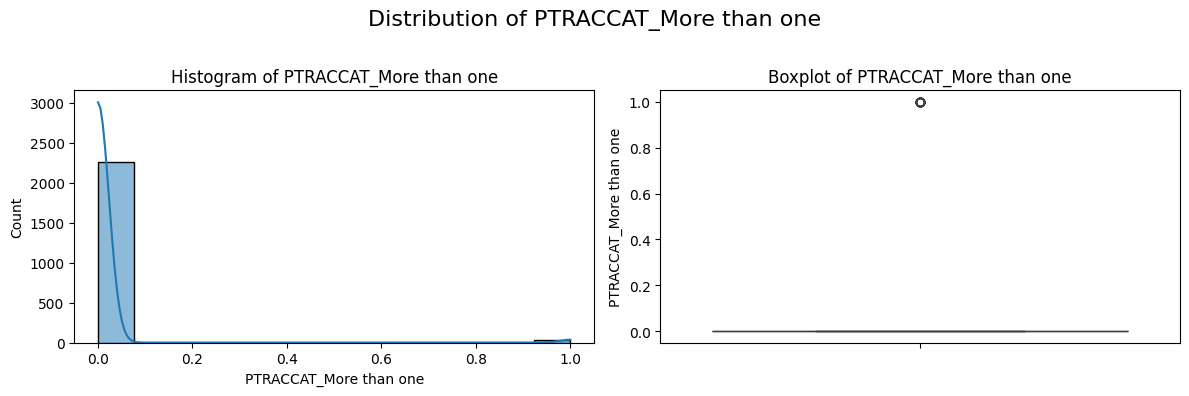


--- Summary for PTRACCAT_More than one ---
count    2282.000000
mean        0.011832
std         0.108152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTRACCAT_More than one, dtype: float64
Skewness: 9.03536386879651
Kurtosis: 79.70765721879796


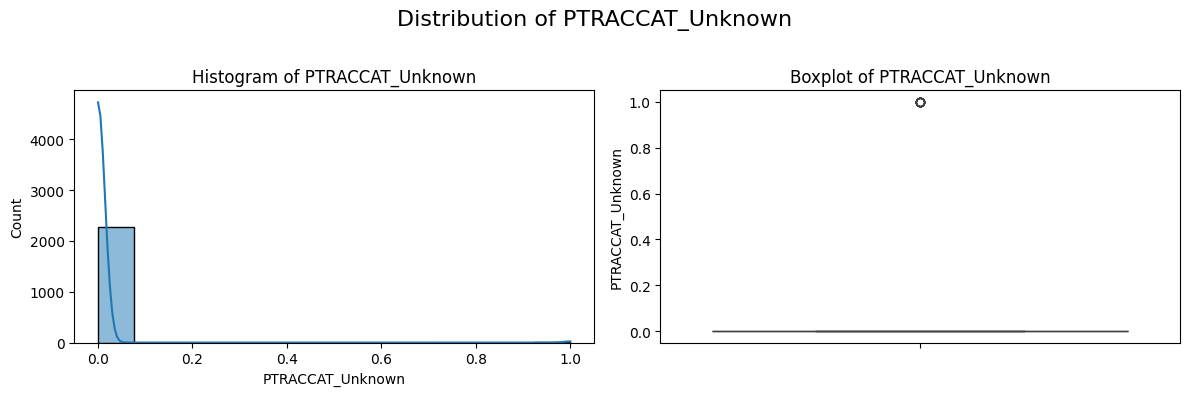


--- Summary for PTRACCAT_Unknown ---
count    2282.000000
mean        0.004820
std         0.069276
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTRACCAT_Unknown, dtype: float64
Skewness: 14.30833649695848
Kurtosis: 202.90632462112748


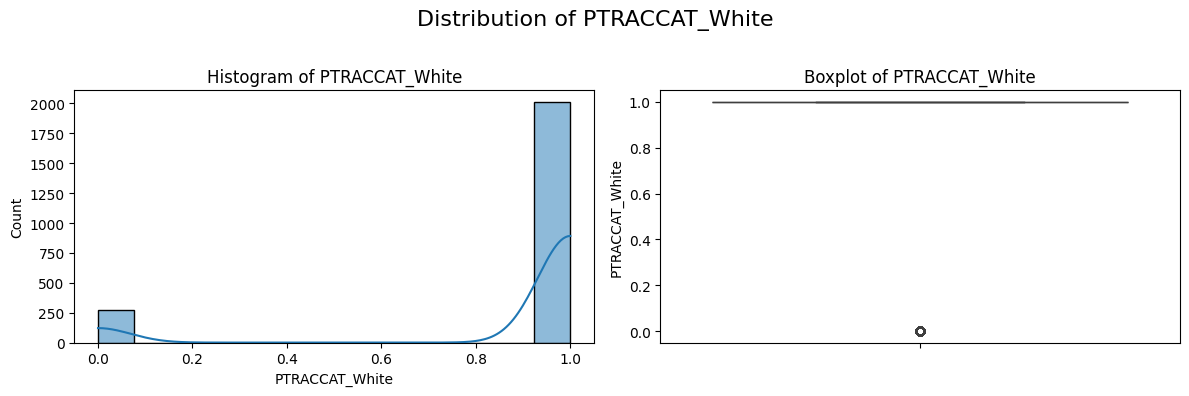


--- Summary for PTRACCAT_White ---
count    2282.000000
mean        0.880368
std         0.324602
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PTRACCAT_White, dtype: float64
Skewness: -2.3456545051407844
Kurtosis: 3.5051663027464843


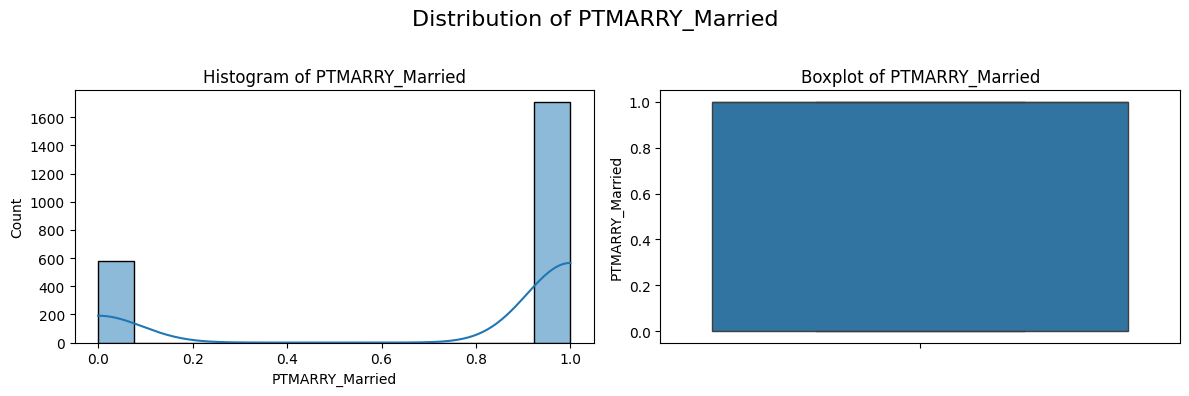


--- Summary for PTMARRY_Married ---
count    2282.000000
mean        0.747590
std         0.434491
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: PTMARRY_Married, dtype: float64
Skewness: -1.1406786265457407
Kurtosis: -0.6994660686158025


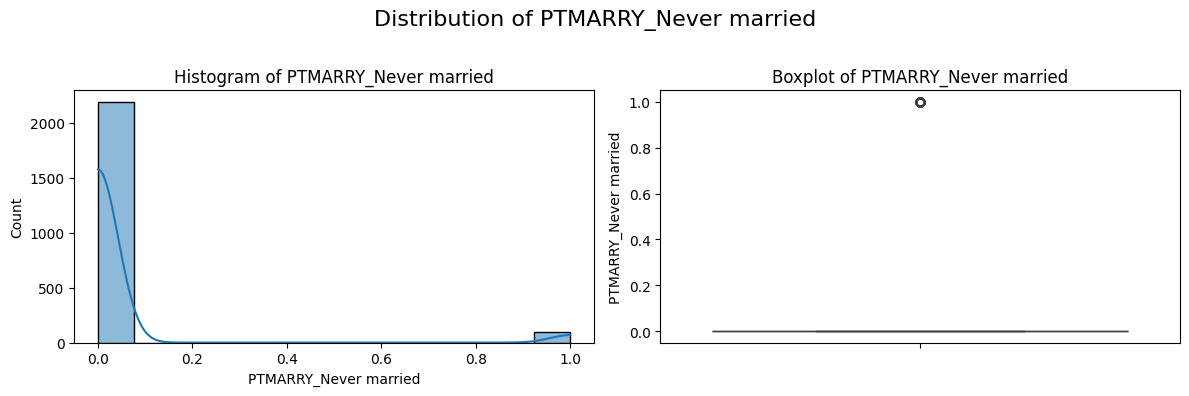


--- Summary for PTMARRY_Never married ---
count    2282.000000
mean        0.041630
std         0.199786
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTMARRY_Never married, dtype: float64
Skewness: 4.592626228175802
Kurtosis: 19.108962466645103


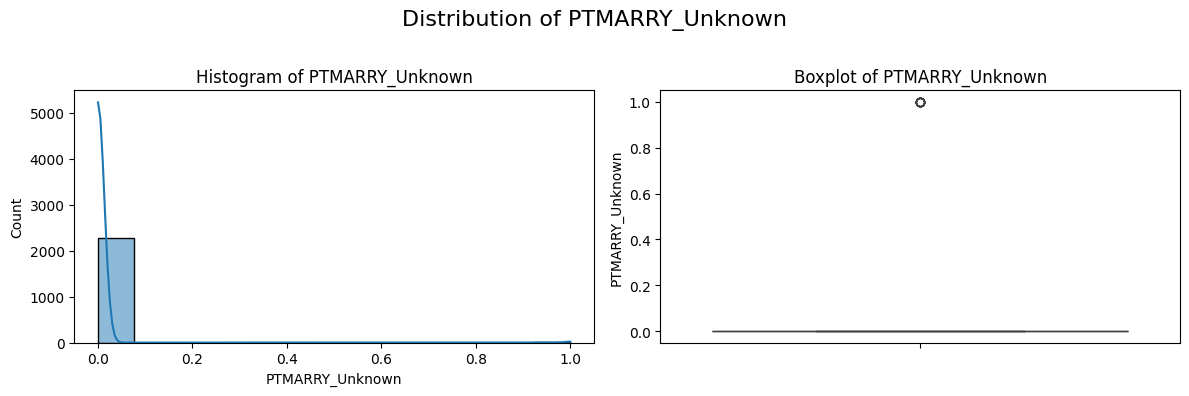


--- Summary for PTMARRY_Unknown ---
count    2282.000000
mean        0.003944
std         0.062690
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTMARRY_Unknown, dtype: float64
Skewness: 15.839485315236487
Kurtosis: 249.1076183094492


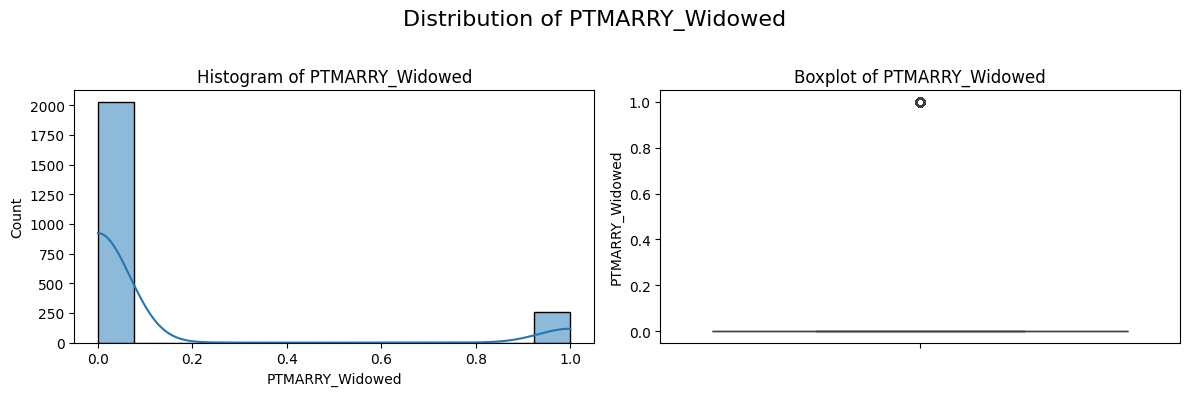


--- Summary for PTMARRY_Widowed ---
count    2282.000000
mean        0.112621
std         0.316198
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTMARRY_Widowed, dtype: float64
Skewness: 2.452385845960247
Kurtosis: 4.017716794547237


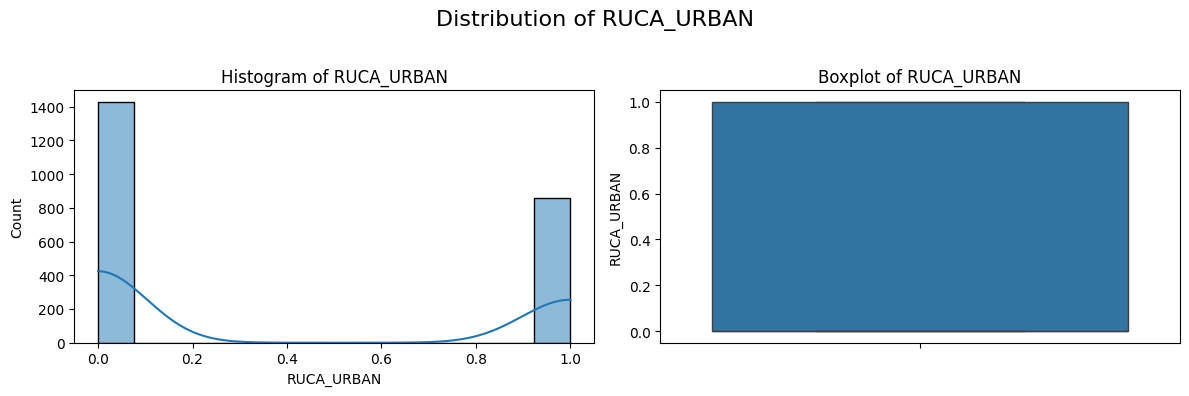


--- Summary for RUCA_URBAN ---
count    2282.000000
mean        0.375548
std         0.484370
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: RUCA_URBAN, dtype: float64
Skewness: 0.5143231922009213
Kurtosis: -1.73699476723629


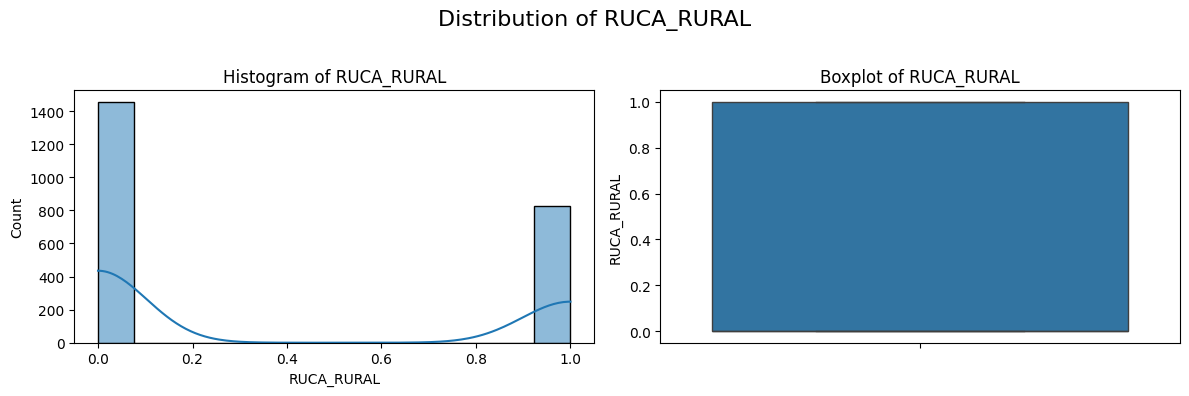


--- Summary for RUCA_RURAL ---
count    2282.000000
mean        0.363278
std         0.481049
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: RUCA_RURAL, dtype: float64
Skewness: 0.5689317003591909
Kurtosis: -1.6777879432858163


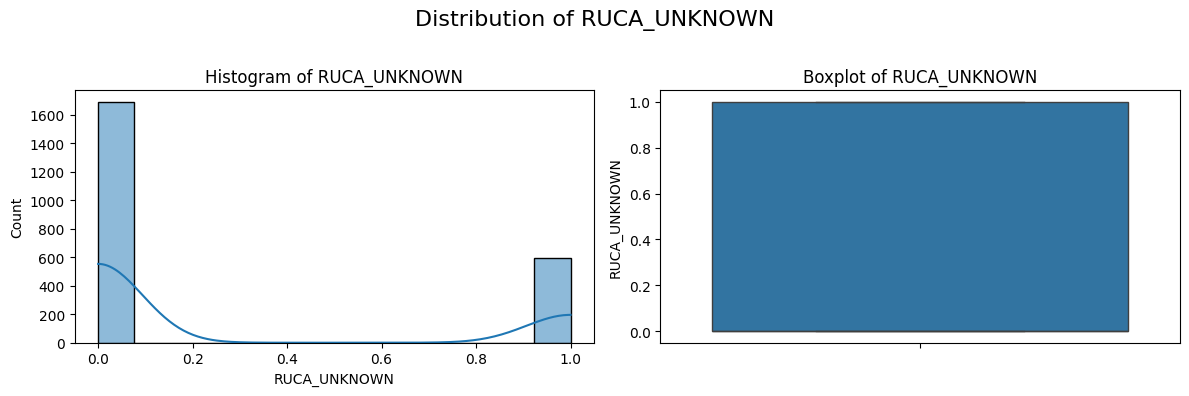


--- Summary for RUCA_UNKNOWN ---
count    2282.000000
mean        0.261174
std         0.439371
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: RUCA_UNKNOWN, dtype: float64
Skewness: 1.08807842410438
Kurtosis: -0.8168019767402761


In [6]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Remove ID columns if present, e.g., numerical_cols.remove('RID')

for col in numerical_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.suptitle(f'Distribution of {col}', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make space for suptitle
    plt.show()

    print(f"\n--- Summary for {col} ---")
    print(df[col].describe())
    print(f"Skewness: {df[col].skew()}")
    print(f"Kurtosis: {df[col].kurtosis()}")

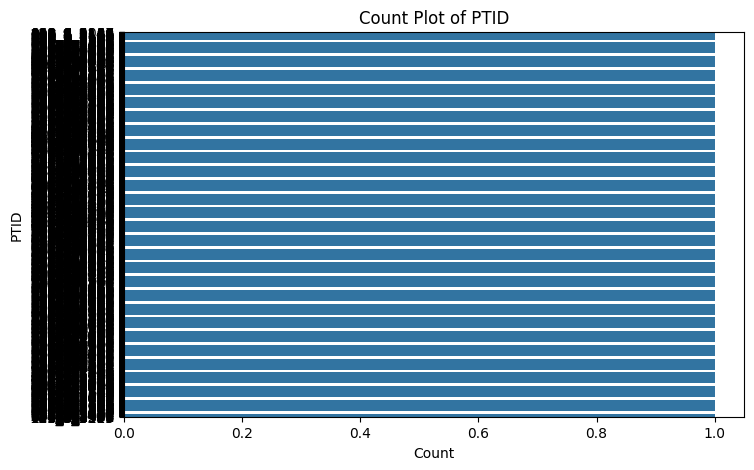


--- Value Counts for PTID ---
PTID
011_S_0003    0.043821
012_S_5157    0.043821
068_S_5146    0.043821
009_S_5147    0.043821
131_S_5148    0.043821
                ...   
022_S_1394    0.043821
024_S_1393    0.043821
041_S_1391    0.043821
131_S_1389    0.043821
123_S_7125    0.043821
Name: proportion, Length: 2282, dtype: float64
PTID
011_S_0003    1
012_S_5157    1
068_S_5146    1
009_S_5147    1
131_S_5148    1
             ..
022_S_1394    1
024_S_1393    1
041_S_1391    1
131_S_1389    1
123_S_7125    1
Name: count, Length: 2282, dtype: int64


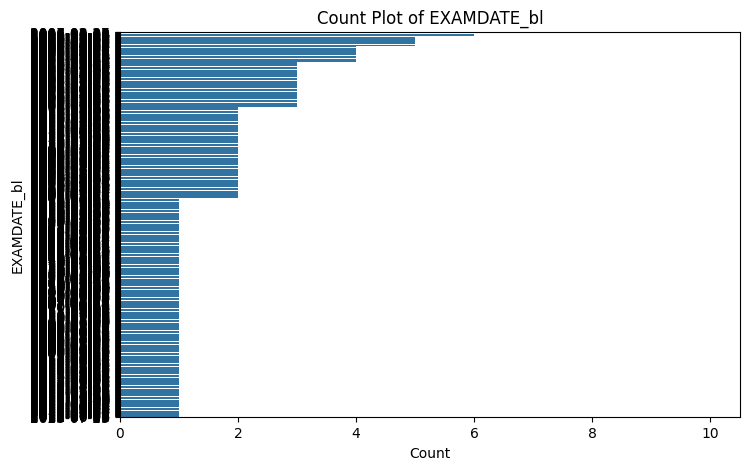


--- Value Counts for EXAMDATE_bl ---
EXAMDATE_bl
2006-08-02    0.438212
2007-02-27    0.394391
2006-12-14    0.350570
2006-10-11    0.306748
2012-04-12    0.306748
                ...   
2012-10-08    0.043821
2012-06-28    0.043821
2012-07-02    0.043821
2012-07-06    0.043821
2023-07-25    0.043821
Name: proportion, Length: 1295, dtype: float64
EXAMDATE_bl
2006-08-02    10
2007-02-27     9
2006-12-14     8
2006-10-11     7
2012-04-12     7
              ..
2012-10-08     1
2012-06-28     1
2012-07-02     1
2012-07-06     1
2023-07-25     1
Name: count, Length: 1295, dtype: int64


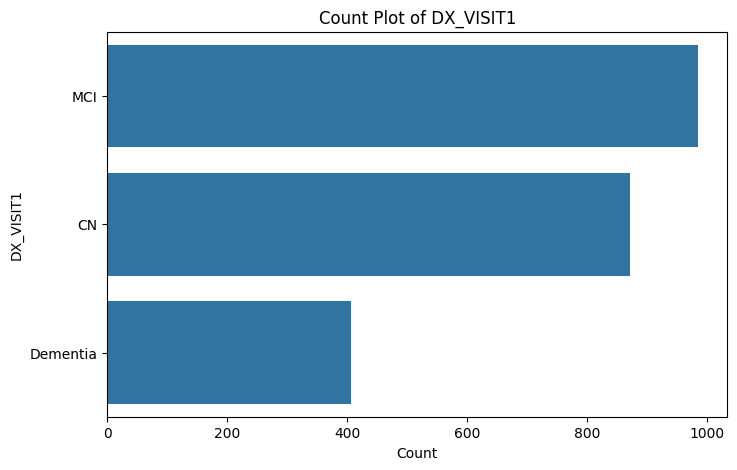


--- Value Counts for DX_VISIT1 ---
DX_VISIT1
MCI         43.520566
CN          38.522778
Dementia    17.956656
Name: proportion, dtype: float64
DX_VISIT1
MCI         984
CN          871
Dementia    406
Name: count, dtype: int64


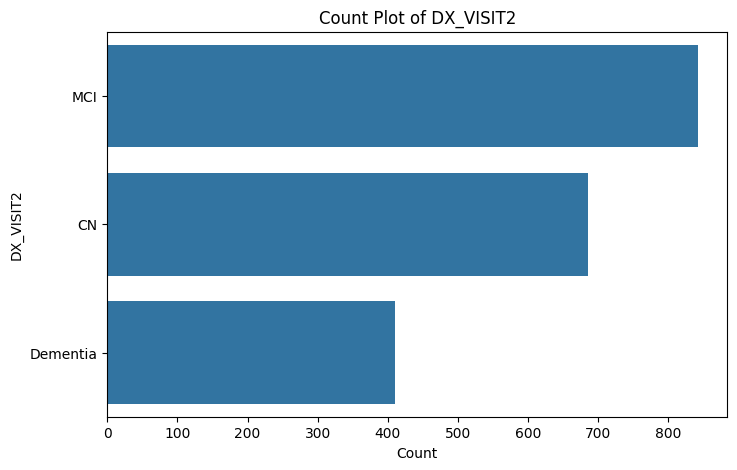


--- Value Counts for DX_VISIT2 ---
DX_VISIT2
MCI         43.446852
CN          35.397317
Dementia    21.155831
Name: proportion, dtype: float64
DX_VISIT2
MCI         842
CN          686
Dementia    410
Name: count, dtype: int64


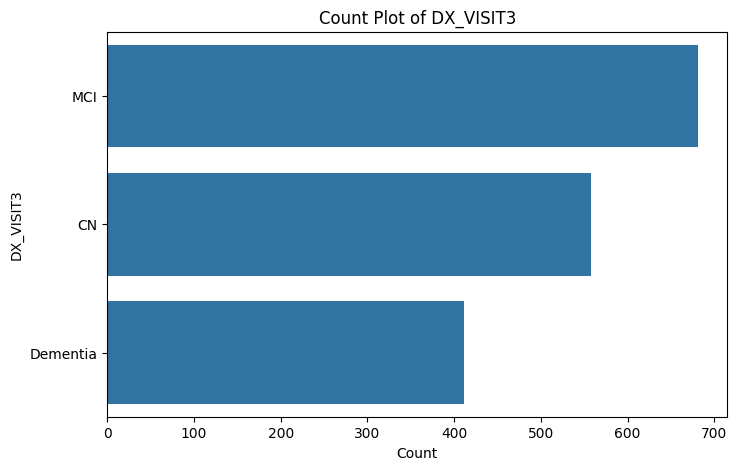


--- Value Counts for DX_VISIT3 ---
DX_VISIT3
MCI         41.272727
CN          33.818182
Dementia    24.909091
Name: proportion, dtype: float64
DX_VISIT3
MCI         681
CN          558
Dementia    411
Name: count, dtype: int64


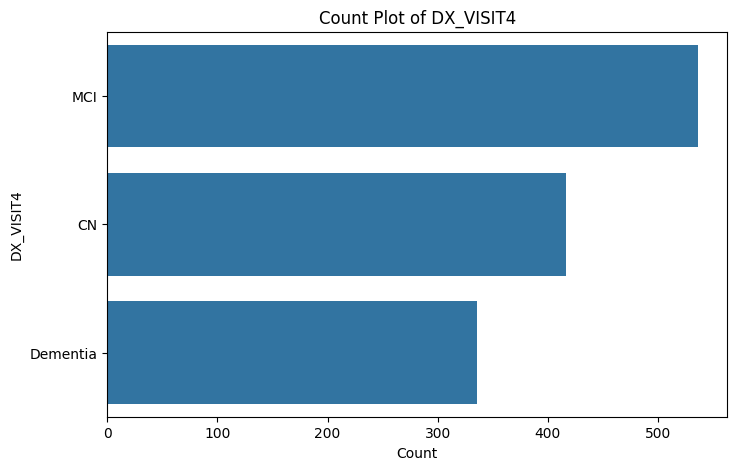


--- Value Counts for DX_VISIT4 ---
DX_VISIT4
MCI         41.614907
CN          32.298137
Dementia    26.086957
Name: proportion, dtype: float64
DX_VISIT4
MCI         536
CN          416
Dementia    336
Name: count, dtype: int64


In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Add 'apoe4_copies' if it's treated as categorical (0, 1, 2 copies)
# if 'apoe4_copies' in df.columns and 'apoe4_copies' not in categorical_cols:
#     categorical_cols.append('apoe4_copies')


for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index) # y= for horizontal bars if many categories
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts(normalize=True) * 100) # Percentages
    print(df[col].value_counts()) # Raw counts

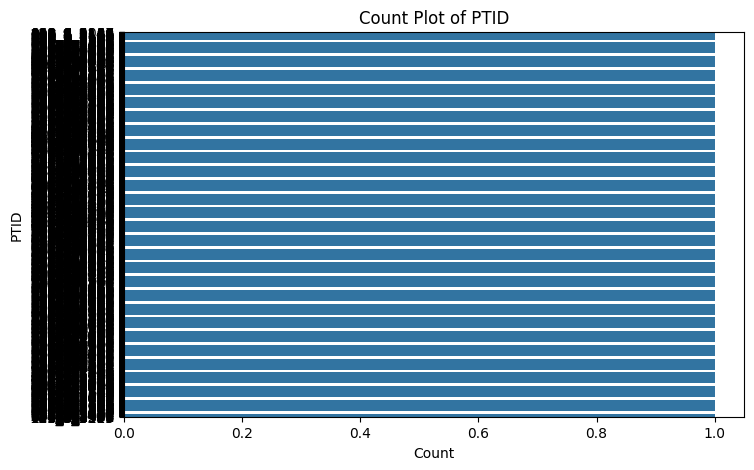


--- Value Counts for PTID ---
PTID
011_S_0003    0.043821
012_S_5157    0.043821
068_S_5146    0.043821
009_S_5147    0.043821
131_S_5148    0.043821
                ...   
022_S_1394    0.043821
024_S_1393    0.043821
041_S_1391    0.043821
131_S_1389    0.043821
123_S_7125    0.043821
Name: proportion, Length: 2282, dtype: float64
PTID
011_S_0003    1
012_S_5157    1
068_S_5146    1
009_S_5147    1
131_S_5148    1
             ..
022_S_1394    1
024_S_1393    1
041_S_1391    1
131_S_1389    1
123_S_7125    1
Name: count, Length: 2282, dtype: int64


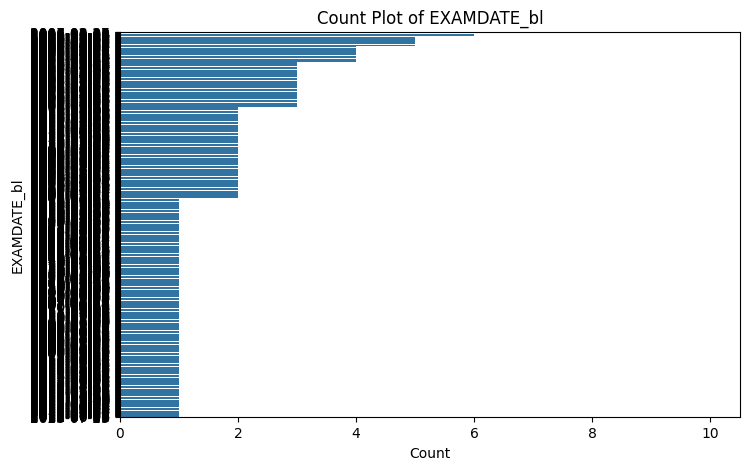


--- Value Counts for EXAMDATE_bl ---
EXAMDATE_bl
2006-08-02    0.438212
2007-02-27    0.394391
2006-12-14    0.350570
2006-10-11    0.306748
2012-04-12    0.306748
                ...   
2012-10-08    0.043821
2012-06-28    0.043821
2012-07-02    0.043821
2012-07-06    0.043821
2023-07-25    0.043821
Name: proportion, Length: 1295, dtype: float64
EXAMDATE_bl
2006-08-02    10
2007-02-27     9
2006-12-14     8
2006-10-11     7
2012-04-12     7
              ..
2012-10-08     1
2012-06-28     1
2012-07-02     1
2012-07-06     1
2023-07-25     1
Name: count, Length: 1295, dtype: int64


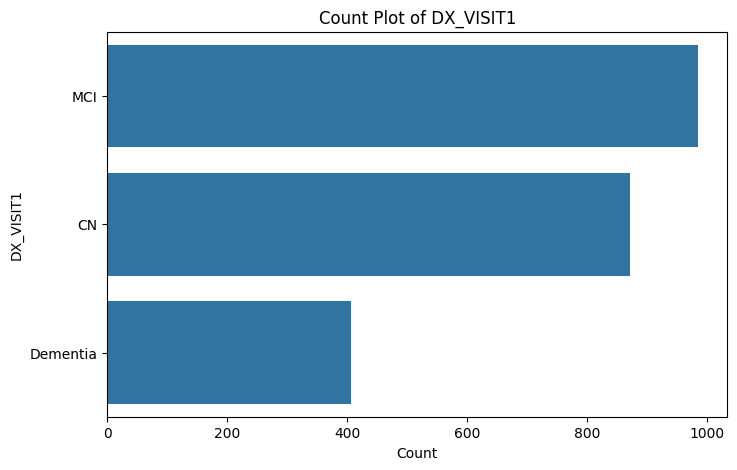


--- Value Counts for DX_VISIT1 ---
DX_VISIT1
MCI         43.520566
CN          38.522778
Dementia    17.956656
Name: proportion, dtype: float64
DX_VISIT1
MCI         984
CN          871
Dementia    406
Name: count, dtype: int64


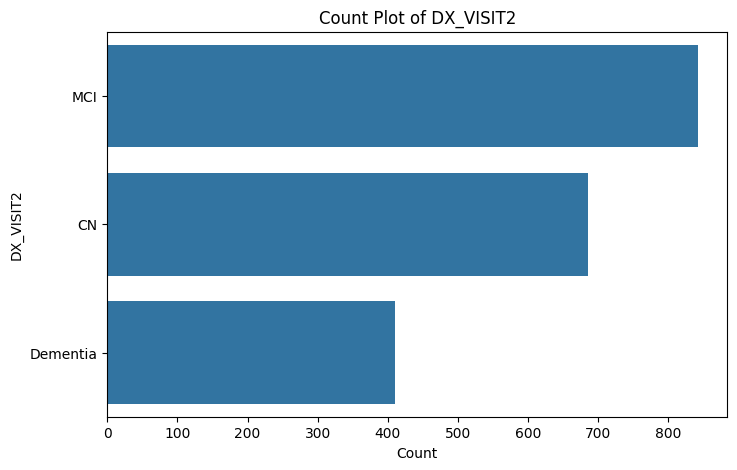


--- Value Counts for DX_VISIT2 ---
DX_VISIT2
MCI         43.446852
CN          35.397317
Dementia    21.155831
Name: proportion, dtype: float64
DX_VISIT2
MCI         842
CN          686
Dementia    410
Name: count, dtype: int64


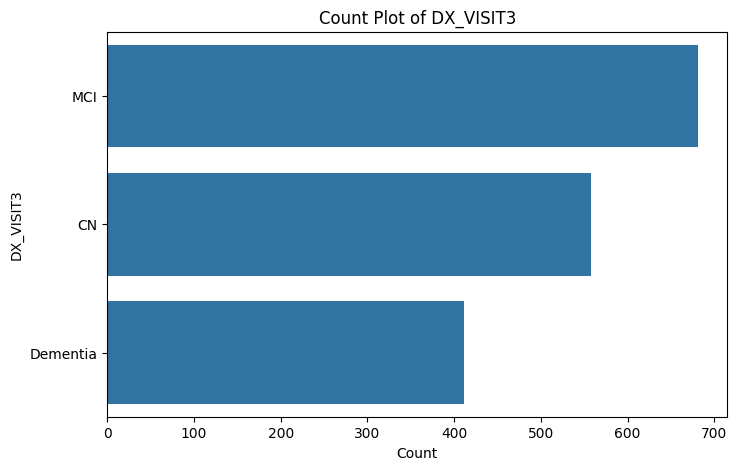


--- Value Counts for DX_VISIT3 ---
DX_VISIT3
MCI         41.272727
CN          33.818182
Dementia    24.909091
Name: proportion, dtype: float64
DX_VISIT3
MCI         681
CN          558
Dementia    411
Name: count, dtype: int64


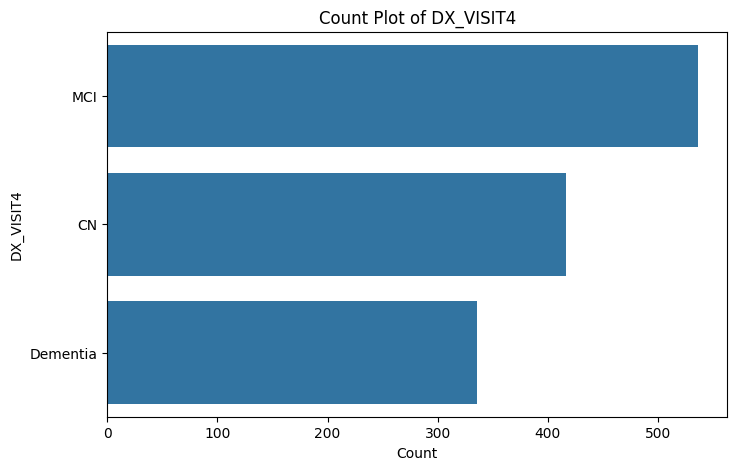


--- Value Counts for DX_VISIT4 ---
DX_VISIT4
MCI         41.614907
CN          32.298137
Dementia    26.086957
Name: proportion, dtype: float64
DX_VISIT4
MCI         536
CN          416
Dementia    336
Name: count, dtype: int64


In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Add 'apoe4_copies' if it's treated as categorical (0, 1, 2 copies)
# if 'apoe4_copies' in df.columns and 'apoe4_copies' not in categorical_cols:
#     categorical_cols.append('apoe4_copies')


for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index) # y= for horizontal bars if many categories
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts(normalize=True) * 100) # Percentages
    print(df[col].value_counts()) # Raw counts

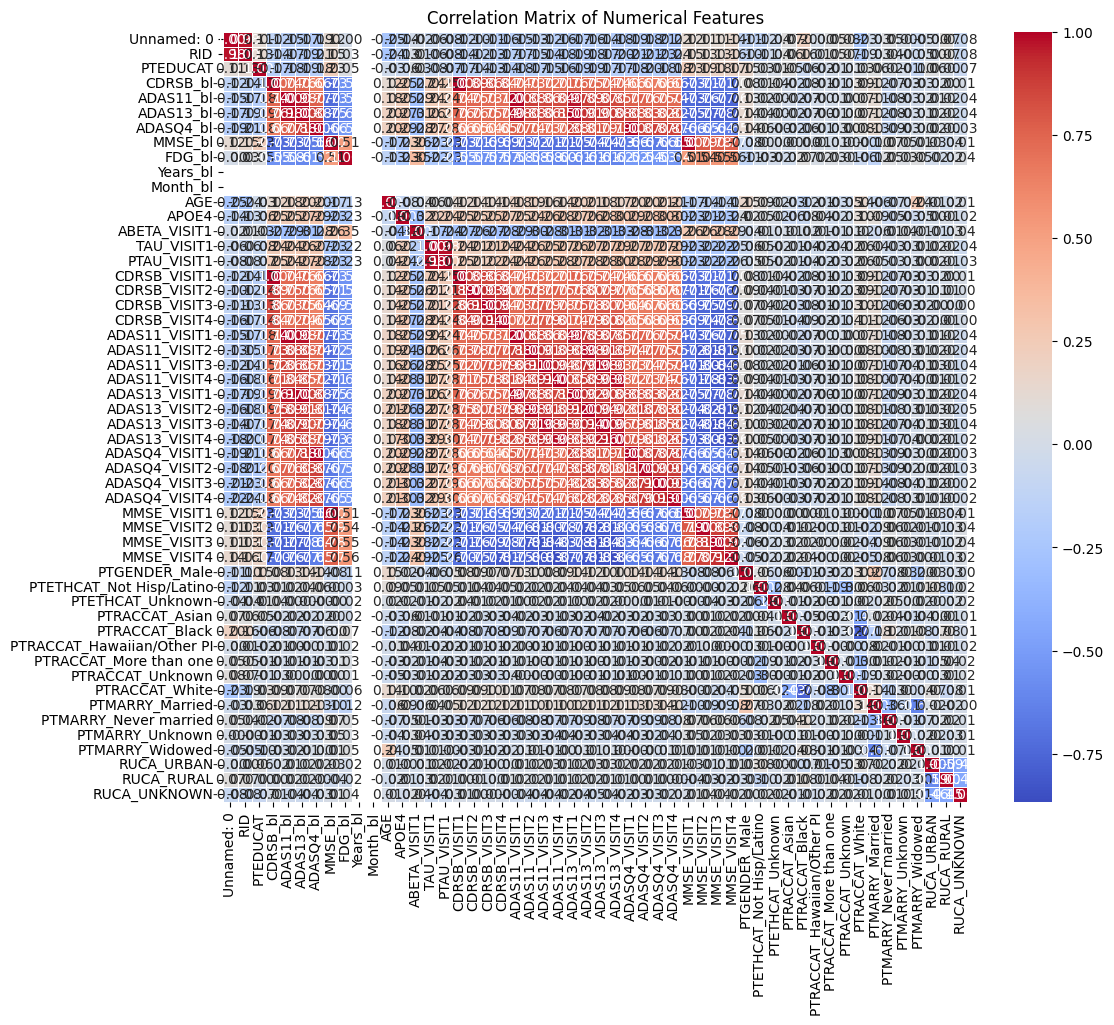

In [9]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation, excluding IDs if necessary
numerical_df_for_corr = df[numerical_cols] # Use the numerical_cols list from earlier
correlation_matrix = numerical_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plots for selected pairs (e.g., age vs. cognitive scores, biomarkers vs. cognitive scores)
# Example:
# sns.scatterplot(data=df, x='age_at_baseline', y='mmse_bl')
# plt.title('Age vs. MMSE Score')
# plt.show()

# sns.scatterplot(data=df, x='abeta_bl', y='mmse_bl')
# plt.title('Abeta vs. MMSE Score')
# plt.show()

# Use pairplot for a quick overview of relationships between a few key numerical variables
# sns.pairplot(df[['age_at_baseline', 'mmse_bl', 'cdrsb_bl', 'abeta_bl', 'tau_bl', 'diagnose']], hue='diagnose', diag_kind='kde')
# plt.suptitle('Pairplot of Key Numerical Variables by Diagnosis', y=1.02)
# plt.show()

In [15]:
print("Value counts for DX_VISIT1 (original):")
print(df['DX_VISIT1'].value_counts(dropna=False))
print(f"Number of NaNs in DX_VISIT1: {df['DX_VISIT1'].isnull().sum()}")
print(f"Total rows: {len(df)}")

print("\nValue counts for DX_VISIT1_label (after mapping):")
print(df['DX_VISIT1_label'].value_counts(dropna=False))

Value counts for DX_VISIT1 (original):
DX_VISIT1
MCI         984
CN          871
Dementia    406
NaN          21
Name: count, dtype: int64
Number of NaNs in DX_VISIT1: 21
Total rows: 2282

Value counts for DX_VISIT1_label (after mapping):
DX_VISIT1_label
NaN    2282
Name: count, dtype: int64


In [16]:
print(f"Number of NaNs in PTEDUCAT: {df['PTEDUCAT'].isnull().sum()}")
print(f"Number of NaNs in AGE: {df['AGE'].isnull().sum()}")

Number of NaNs in PTEDUCAT: 0
Number of NaNs in AGE: 4



--- Bivariate Analysis: Numerical Features vs. DX_VISIT1 ---

Plotting for PTEDUCAT (using plot_order: ['CN', 'MCI', 'Dementia'])


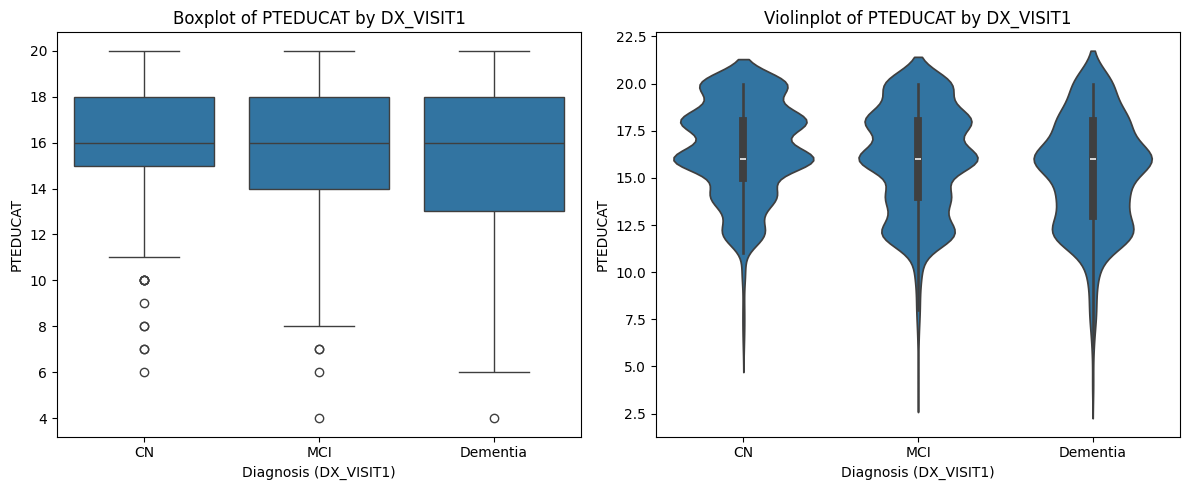


--- Summary of PTEDUCAT by DX_VISIT1 (from original data) ---
                mean  median       std  count  nan_count
DX_VISIT1                                               
CN         16.518944    16.0  2.511454    871          0
MCI        15.921748    16.0  2.812733    984          0
Dementia   15.211823    16.0  2.899035    406          0
ANOVA for PTEDUCAT by DX_VISIT1: F-statistic=33.29, P-value=0.0000
Kruskal-Wallis for PTEDUCAT by DX_VISIT1: H-statistic=58.97, P-value=0.0000

Plotting for AGE (using plot_order: ['CN', 'MCI', 'Dementia'])


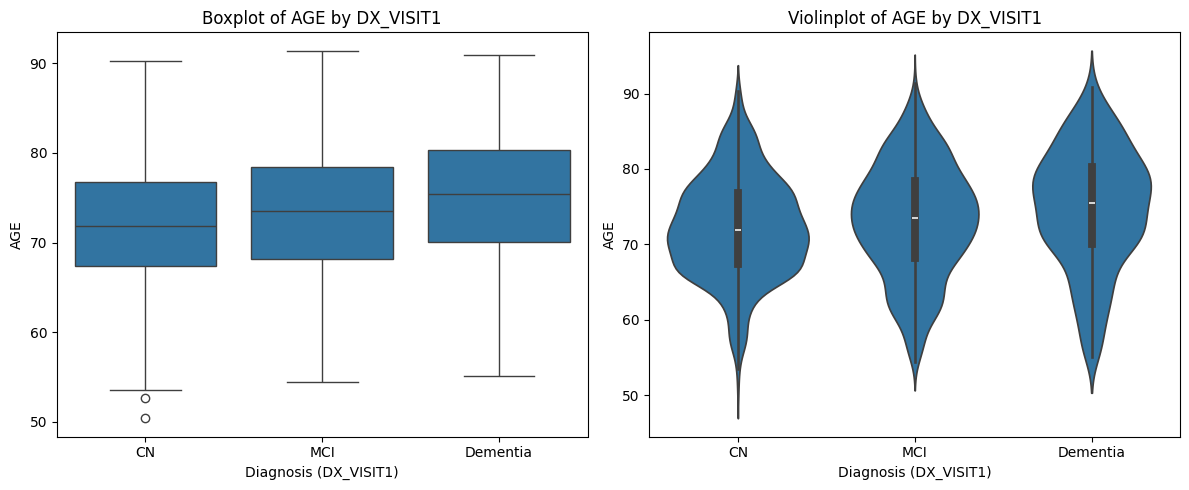


--- Summary of AGE by DX_VISIT1 (from original data) ---
                mean  median       std  count  nan_count
DX_VISIT1                                               
CN         72.221264   71.85  6.685740    870          1
MCI        73.115698   73.50  7.452407    981          3
Dementia   74.751478   75.45  7.948245    406          0
ANOVA for AGE by DX_VISIT1: F-statistic=16.85, P-value=0.0000
Kruskal-Wallis for AGE by DX_VISIT1: H-statistic=40.70, P-value=0.0000

Plotting for CDRSB_bl (using plot_order: ['CN', 'MCI', 'Dementia'])


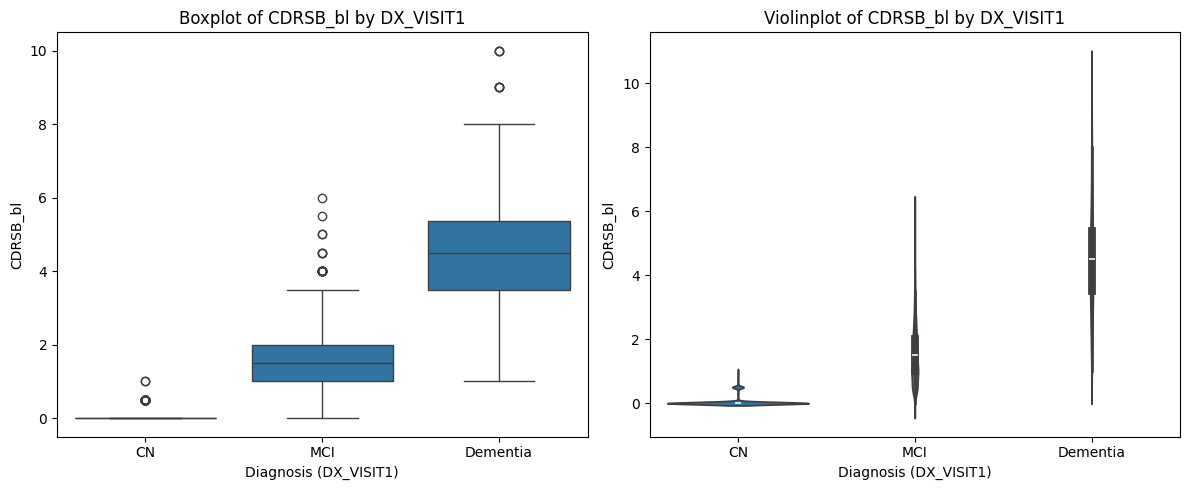


--- Summary of CDRSB_bl by DX_VISIT1 (from original data) ---
               mean  median       std  count  nan_count
DX_VISIT1                                              
CN         0.039610     0.0  0.139306    871          0
MCI        1.551321     1.5  0.932437    984          0
Dementia   4.431034     4.5  1.698633    406          0
ANOVA for CDRSB_bl by DX_VISIT1: F-statistic=2959.42, P-value=0.0000
Kruskal-Wallis for CDRSB_bl by DX_VISIT1: H-statistic=1904.83, P-value=0.0000

Plotting for ADAS11_bl (using plot_order: ['CN', 'MCI', 'Dementia'])


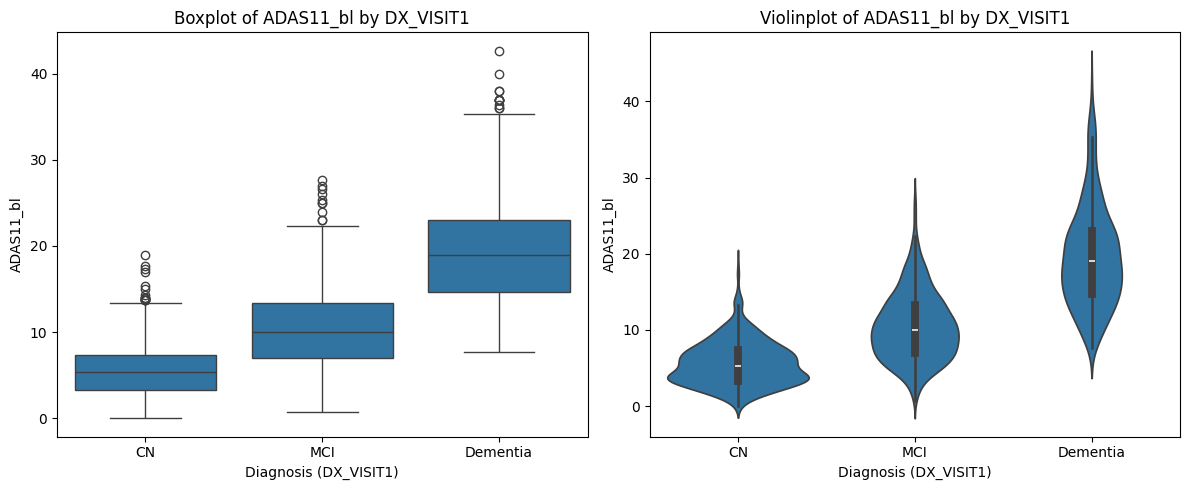


--- Summary of ADAS11_bl by DX_VISIT1 (from original data) ---
                mean  median       std  count  nan_count
DX_VISIT1                                               
CN          5.664292    5.33  2.907045    869          2
MCI        10.508136   10.00  4.472564    982          2
Dementia   19.634505   19.00  6.615307    404          2
ANOVA for ADAS11_bl by DX_VISIT1: F-statistic=1361.38, P-value=0.0000
Kruskal-Wallis for ADAS11_bl by DX_VISIT1: H-statistic=1193.08, P-value=0.0000

Plotting for ADAS13_bl (using plot_order: ['CN', 'MCI', 'Dementia'])


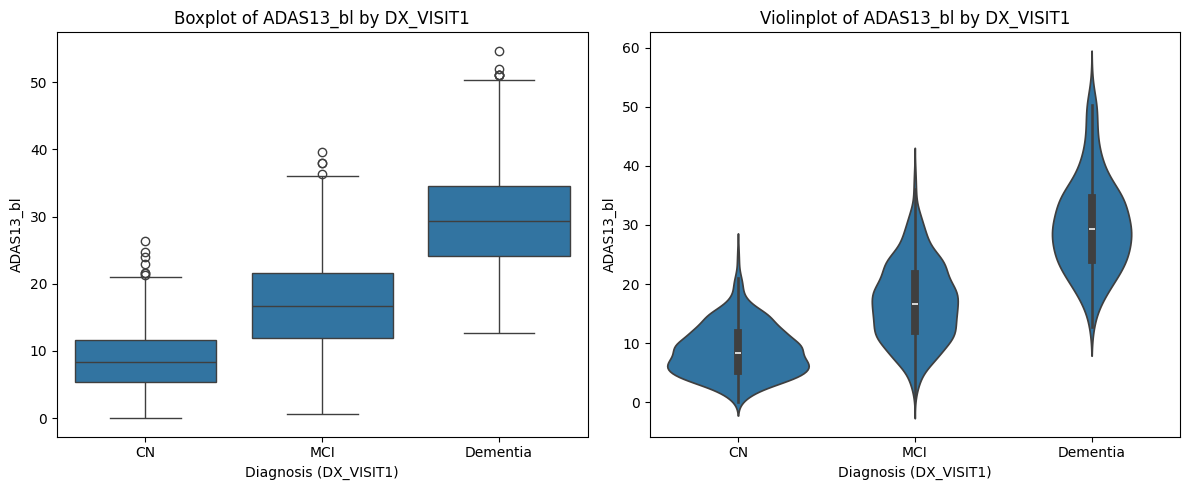


--- Summary of ADAS13_bl by DX_VISIT1 (from original data) ---
                mean  median       std  count  nan_count
DX_VISIT1                                               
CN          8.789619    8.33  4.322665    867          4
MCI        16.947602   16.67  6.665672    980          4
Dementia   30.018442   29.33  7.928502    398          8
ANOVA for ADAS13_bl by DX_VISIT1: F-statistic=1644.23, P-value=0.0000
Kruskal-Wallis for ADAS13_bl by DX_VISIT1: H-statistic=1280.41, P-value=0.0000

Plotting for ADASQ4_bl (using plot_order: ['CN', 'MCI', 'Dementia'])


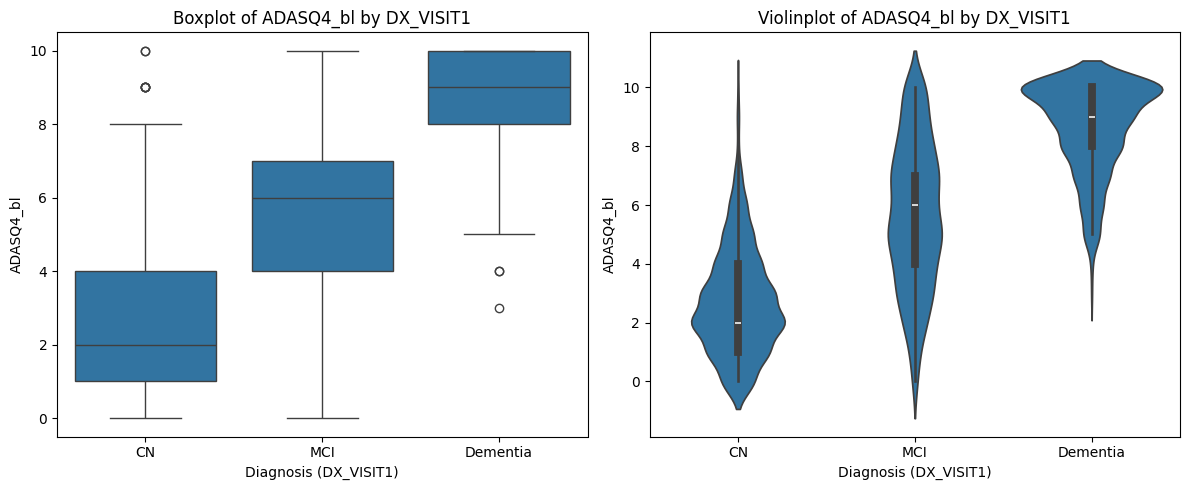


--- Summary of ADASQ4_bl by DX_VISIT1 (from original data) ---
               mean  median       std  count  nan_count
DX_VISIT1                                              
CN         2.731343     2.0  1.810294    871          0
MCI        5.631740     6.0  2.481026    983          1
Dementia   8.657635     9.0  1.524622    406          0
ANOVA for ADASQ4_bl by DX_VISIT1: F-statistic=1181.51, P-value=0.0000
Kruskal-Wallis for ADASQ4_bl by DX_VISIT1: H-statistic=1140.32, P-value=0.0000

Plotting for MMSE_bl (using plot_order: ['CN', 'MCI', 'Dementia'])


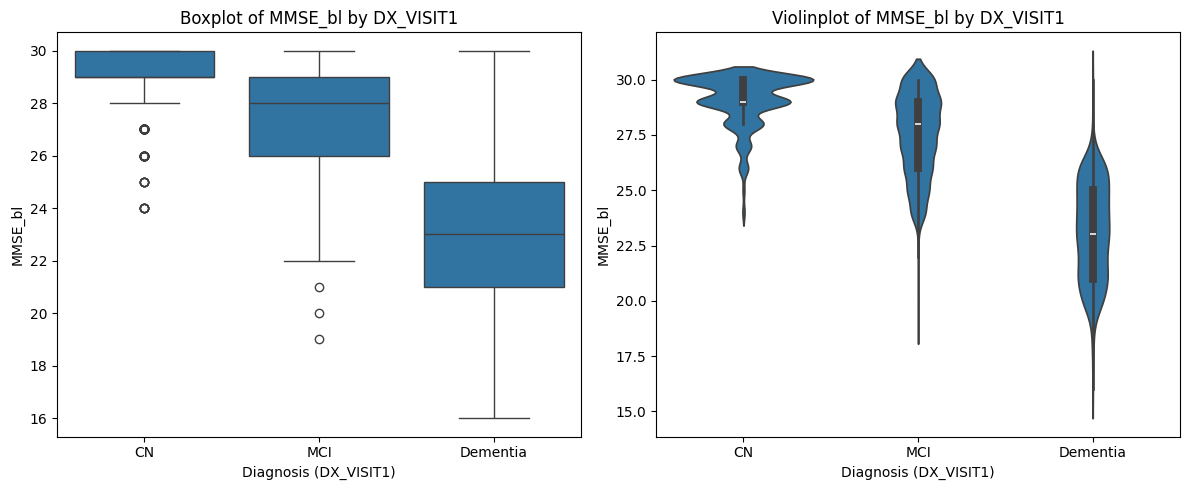


--- Summary of MMSE_bl by DX_VISIT1 (from original data) ---
                mean  median       std  count  nan_count
DX_VISIT1                                               
CN         29.079310    29.0  1.156125    870          1
MCI        27.483740    28.0  1.877678    984          0
Dementia   23.133005    23.0  2.178921    406          0
ANOVA for MMSE_bl by DX_VISIT1: F-statistic=1694.75, P-value=0.0000
Kruskal-Wallis for MMSE_bl by DX_VISIT1: H-statistic=1145.21, P-value=0.0000

Plotting for APOE4 (using plot_order: ['CN', 'MCI', 'Dementia'])


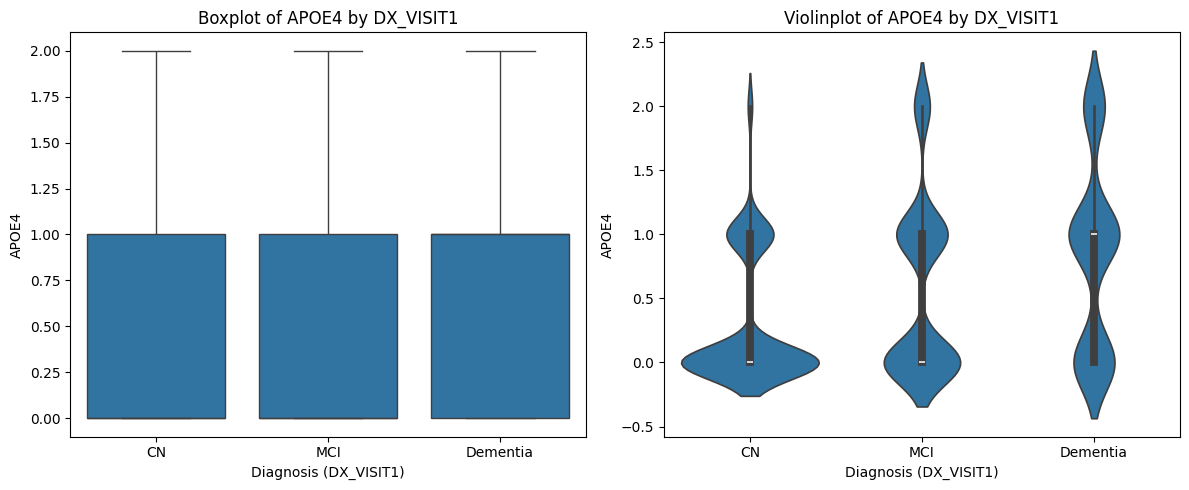


--- Summary of APOE4 by DX_VISIT1 (from original data) ---
               mean  median       std  count  nan_count
DX_VISIT1                                              
CN         0.295063     0.0  0.504199    871          0
MCI        0.577236     0.0  0.681189    984          0
Dementia   0.827586     1.0  0.723385    406          0
ANOVA for APOE4 by DX_VISIT1: F-statistic=108.69, P-value=0.0000
Kruskal-Wallis for APOE4 by DX_VISIT1: H-statistic=191.27, P-value=0.0000

Plotting for ABETA_VISIT1 (using plot_order: ['CN', 'MCI', 'Dementia'])


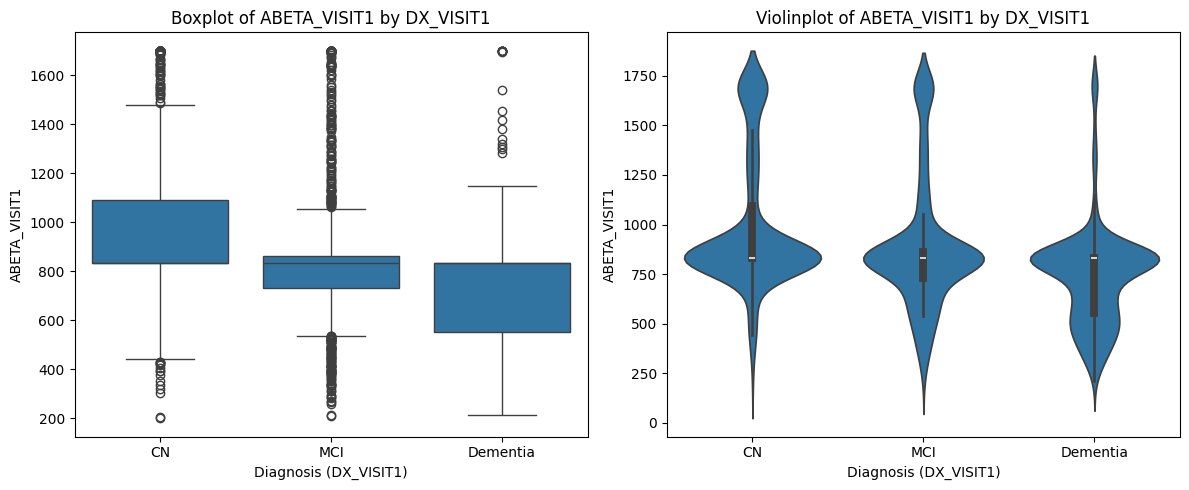


--- Summary of ABETA_VISIT1 by DX_VISIT1 (from original data) ---
                 mean  median         std  count  nan_count
DX_VISIT1                                                  
CN         990.744546   832.7  341.356503    871          0
MCI        886.204370   832.7  328.482629    984          0
Dementia   737.192611   832.7  251.047801    406          0
ANOVA for ABETA_VISIT1 by DX_VISIT1: F-statistic=87.82, P-value=0.0000
Kruskal-Wallis for ABETA_VISIT1 by DX_VISIT1: H-statistic=201.85, P-value=0.0000

Plotting for TAU_VISIT1 (using plot_order: ['CN', 'MCI', 'Dementia'])


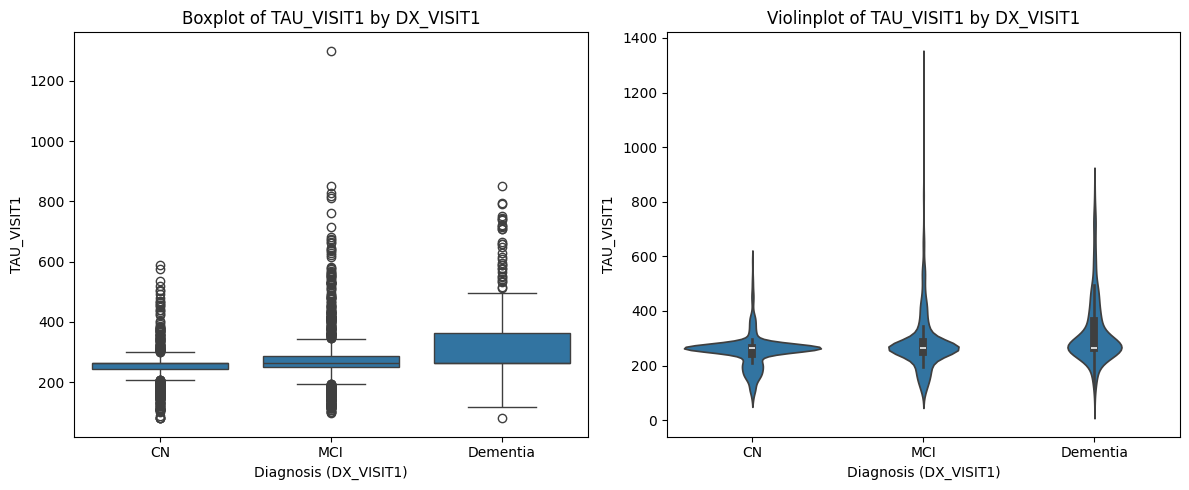


--- Summary of TAU_VISIT1 by DX_VISIT1 (from original data) ---
                 mean  median         std  count  nan_count
DX_VISIT1                                                  
CN         254.328967   264.8   60.483647    871          0
MCI        282.940020   264.8  105.409007    984          0
Dementia   322.737438   264.8  121.219154    406          0
ANOVA for TAU_VISIT1 by DX_VISIT1: F-statistic=74.42, P-value=0.0000
Kruskal-Wallis for TAU_VISIT1 by DX_VISIT1: H-statistic=130.31, P-value=0.0000

Plotting for PTAU_VISIT1 (using plot_order: ['CN', 'MCI', 'Dementia'])


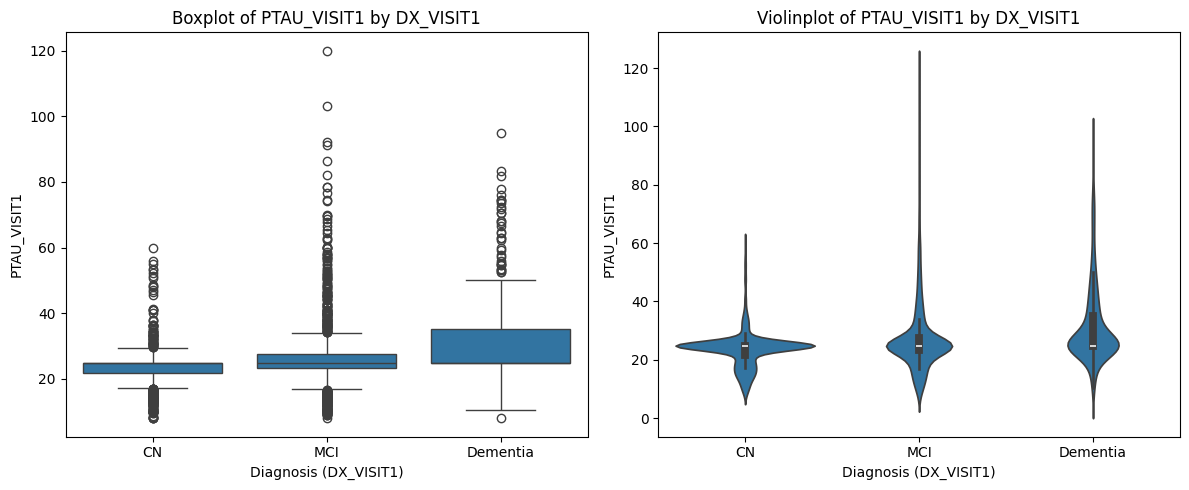


--- Summary of PTAU_VISIT1 by DX_VISIT1 (from original data) ---
                mean  median        std  count  nan_count
DX_VISIT1                                                
CN         23.677061   24.87   6.196520    871          0
MCI        27.190254   24.87  11.851648    984          0
Dementia   31.527833   24.87  13.310618    406          0
ANOVA for PTAU_VISIT1 by DX_VISIT1: F-statistic=81.89, P-value=0.0000
Kruskal-Wallis for PTAU_VISIT1 by DX_VISIT1: H-statistic=145.96, P-value=0.0000


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming df is loaded and DX_VISIT1 contains 'CN', 'MCI', 'Dementia', NaN ---

# --- Step 4B: Numerical Features vs. DX_VISIT1 (Diagnosis at Visit 1) ---

primary_target_col = 'DX_VISIT1' # This column ALREADY has string labels

if primary_target_col not in df.columns:
    raise KeyError(f"Target column '{primary_target_col}' not found.")

# Define the desired order for plots. Note 'Dementia' instead of 'AD' from your output.
plot_order_categories = ['CN', 'MCI', 'Dementia']

# Define numerical columns for comparison.
numerical_cols_to_compare = [
    'PTEDUCAT', 'AGE',
    'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl',
    'APOE4',
    'ABETA_VISIT1', 'TAU_VISIT1', 'PTAU_VISIT1'
]
numerical_cols_to_compare = [col for col in numerical_cols_to_compare if col in df.columns]

print(f"\n--- Bivariate Analysis: Numerical Features vs. {primary_target_col} ---")
for num_col in numerical_cols_to_compare:
    if df[num_col].isnull().all():
        print(f"Warning: Column '{num_col}' is all NaN. Skipping plot.")
        continue

    # Create a temporary DataFrame for plotting, dropping rows where
    # the primary_target_col OR num_col is NaN
    plot_df = df[[primary_target_col, num_col]].copy()
    plot_df.dropna(subset=[primary_target_col, num_col], inplace=True)

    if plot_df.empty:
        print(f"Warning: No data left to plot for {num_col} after dropping NaNs in '{primary_target_col}' or '{num_col}'. Skipping plot.")
        continue

    # Ensure the categories in plot_order_categories are actually present in the filtered data
    current_plot_order = [cat for cat in plot_order_categories if cat in plot_df[primary_target_col].unique()]

    if not current_plot_order:
        print(f"Warning: None of the specified order categories {plot_order_categories} have data for {num_col}. Skipping plot.")
        continue
        
    print(f"\nPlotting for {num_col} (using plot_order: {current_plot_order})")

    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    try:
        # Use primary_target_col directly for x as it contains the string labels
        sns.boxplot(x=primary_target_col, y=num_col, data=plot_df, order=current_plot_order)
        plt.title(f'Boxplot of {num_col} by {primary_target_col}')
        plt.xlabel(f'Diagnosis ({primary_target_col})')
        plt.ylabel(num_col)
    except Exception as e:
        print(f"Error plotting boxplot for {num_col}: {e}")

    # Violinplot
    plt.subplot(1, 2, 2)
    try:
        sns.violinplot(x=primary_target_col, y=num_col, data=plot_df, order=current_plot_order)
        plt.title(f'Violinplot of {num_col} by {primary_target_col}')
        plt.xlabel(f'Diagnosis ({primary_target_col})')
        plt.ylabel(num_col)
    except Exception as e:
        print(f"Error plotting violinplot for {num_col}: {e}")

    plt.tight_layout()
    plt.show()

    # --- Summary Statistics ---
    print(f"\n--- Summary of {num_col} by {primary_target_col} (from original data) ---")
    summary_stats_display = df.groupby(primary_target_col)[num_col].agg(
        ['mean', 'median', 'std', 'count', lambda x: x.isnull().sum()]
    )
    summary_stats_display.rename(columns={'<lambda_0>': 'nan_count'}, inplace=True)
    # Reindex to ensure consistent order in the summary table, even if a category is missing
    print(summary_stats_display.reindex(plot_order_categories))
    

    # --- Statistical tests ---
    groups_for_stat_test = []
    # Iterate through the actual string category values present in primary_target_col after dropping NaNs
    for dx_cat_val in sorted(df[primary_target_col].dropna().unique()):
        if dx_cat_val not in plot_order_categories: # Only consider CN, MCI, Dementia for stats
            continue
        group_data = df[df[primary_target_col] == dx_cat_val][num_col].dropna()
        if len(group_data) > 1:
            groups_for_stat_test.append(group_data)
            
    if len(groups_for_stat_test) >= 2:
        from scipy.stats import f_oneway, kruskal
        try:
            f_stat, p_val_anova = f_oneway(*groups_for_stat_test)
            print(f"ANOVA for {num_col} by {primary_target_col}: F-statistic={f_stat:.2f}, P-value={p_val_anova:.4f}")
        except ValueError as ve:
             print(f"Could not perform ANOVA for {num_col}: {ve}")
        except Exception as e:
            print(f"Could not perform ANOVA for {num_col}: {e}")
        try:
            h_stat, p_val_kruskal = kruskal(*groups_for_stat_test)
            print(f"Kruskal-Wallis for {num_col} by {primary_target_col}: H-statistic={h_stat:.2f}, P-value={p_val_kruskal:.4f}")
        except ValueError as ve:
             print(f"Could not perform Kruskal-Wallis for {num_col}: {ve}")
        except Exception as e:
            print(f"Could not perform Kruskal-Wallis for {num_col}: {e}")
    else:
        print(f"Not enough distinct groups with sufficient data to perform statistical test for {num_col}.")

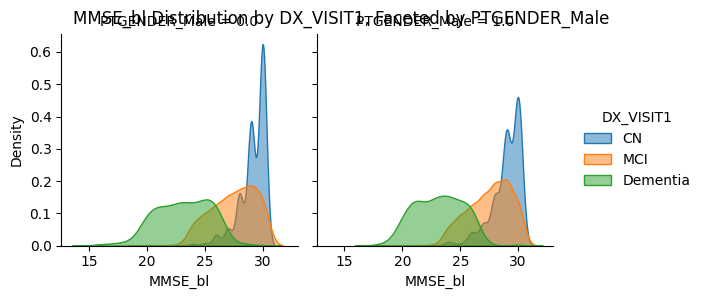

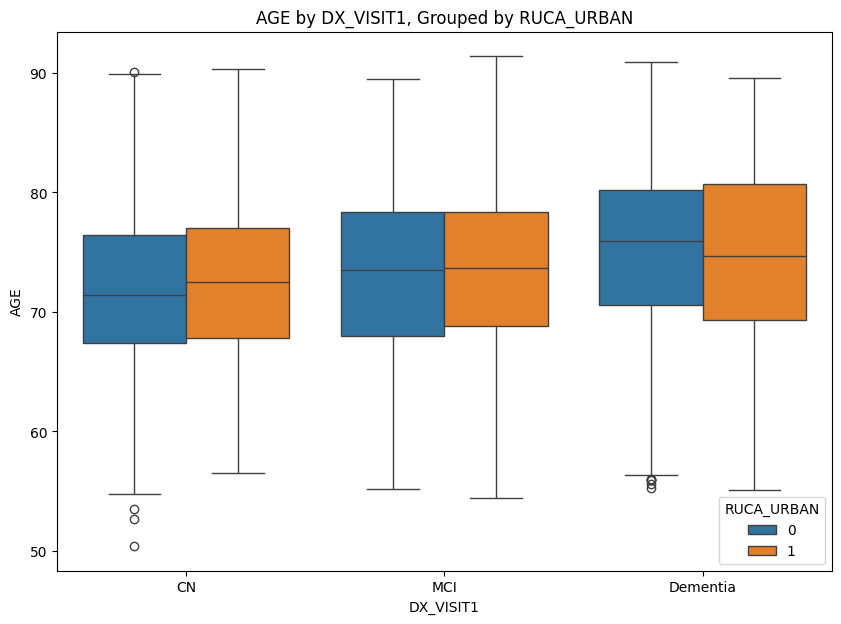


Proportion of each DX_VISIT1 category by PTGENDER_Male:
DX_VISIT1             CN   Dementia        MCI
PTGENDER_Male                                 
0.0            45.940959  16.420664  37.638376
1.0            31.690739  19.371283  48.937978


In [21]:
# --- Step 5: Multivariate Analysis Examples ---

# Example 1: How MMSE_bl varies by DX_VISIT1, faceted by a key OHE variable like PTGENDER_Male
if 'PTGENDER_Male' in df.columns and 'MMSE_bl' in df.columns and 'DX_VISIT1' in df.columns:
    # Create a temporary df for plotting, handling NaNs
    plot_df_multi = df[['DX_VISIT1', 'PTGENDER_Male', 'MMSE_bl']].copy()
    plot_df_multi.dropna(inplace=True) # Drop rows with any NaNs in these three cols

    if not plot_df_multi.empty:
        g = sns.FacetGrid(plot_df_multi, col="PTGENDER_Male", hue="DX_VISIT1",
                          col_order=sorted(plot_df_multi['PTGENDER_Male'].unique()),
                          hue_order=['CN', 'MCI', 'Dementia'], margin_titles=True)
        g.map(sns.kdeplot, "MMSE_bl", fill=True, alpha=.5) # Using KDE for distribution
        # Or g.map(sns.histplot, "MMSE_bl", alpha=.5, multiple="stack")
        g.add_legend()
        plt.subplots_adjust(top=0.9)
        g.fig.suptitle('MMSE_bl Distribution by DX_VISIT1, Faceted by PTGENDER_Male')
        plt.show()
    else:
        print("Not enough data for MMSE_bl by DX_VISIT1 faceted by PTGENDER_Male after NaN removal.")

# Example 2: Boxplot of AGE by DX_VISIT1, further split by an OHE variable
if 'RUCA_URBAN' in df.columns and 'AGE' in df.columns and 'DX_VISIT1' in df.columns:
    plot_df_multi2 = df[['DX_VISIT1', 'RUCA_URBAN', 'AGE']].copy()
    plot_df_multi2.dropna(inplace=True)
    
    if not plot_df_multi2.empty:
        plt.figure(figsize=(10,7))
        sns.boxplot(x="DX_VISIT1", y="AGE", hue="RUCA_URBAN", data=plot_df_multi2,
                    order=['CN', 'MCI', 'Dementia'],
                    hue_order=sorted(plot_df_multi2['RUCA_URBAN'].unique()))
        plt.title('AGE by DX_VISIT1, Grouped by RUCA_URBAN')
        plt.show()
    else:
        print("Not enough data for AGE by DX_VISIT1 grouped by RUCA_URBAN after NaN removal.")

# Example 3: Grouped aggregations for socioeconomics
# What's the proportion of 'Dementia' for Males vs. Non-Males (assuming PTGENDER_Male=1 is Male)
if 'PTGENDER_Male' in df.columns and 'DX_VISIT1' in df.columns:
    print("\nProportion of each DX_VISIT1 category by PTGENDER_Male:")
    print(pd.crosstab(df['PTGENDER_Male'], df['DX_VISIT1'], normalize='index') * 100)


--- Bivariate Analysis: Socioeconomic OHE Features vs. Biomarkers ---


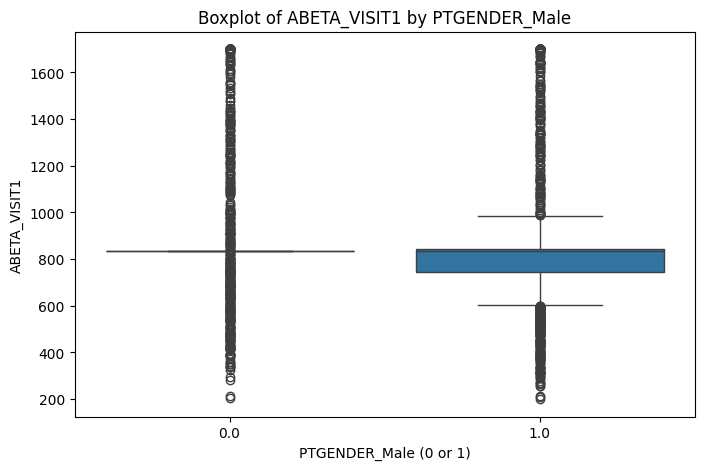


--- Summary of ABETA_VISIT1 by PTGENDER_Male ---
                     mean  median         std  count
PTGENDER_Male                                       
0.0            912.400456   832.7  322.290936   1097
1.0            886.790886   832.7  340.118025   1185
Mann-Whitney U for ABETA_VISIT1 by PTGENDER_Male: U-statistic=683803.50, P-value = 0.0217


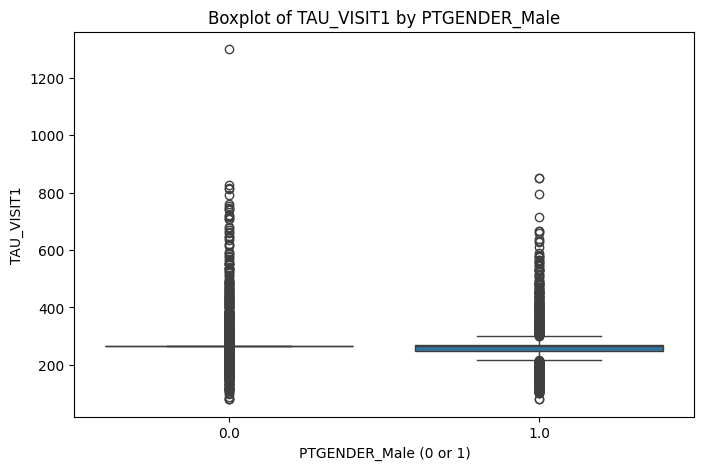


--- Summary of TAU_VISIT1 by PTGENDER_Male ---
                     mean  median         std  count
PTGENDER_Male                                       
0.0            285.088122   264.8  104.770583   1097
1.0            273.235477   264.8   88.491457   1185
Mann-Whitney U for TAU_VISIT1 by PTGENDER_Male: U-statistic=677921.00, P-value = 0.0581


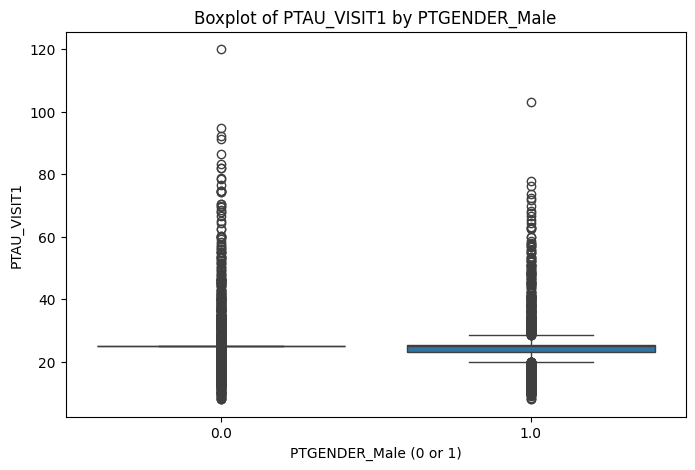


--- Summary of PTAU_VISIT1 by PTGENDER_Male ---
                    mean  median        std  count
PTGENDER_Male                                     
0.0            27.144202   24.87  11.526485   1097
1.0            26.095620   24.87   9.842482   1185
Mann-Whitney U for PTAU_VISIT1 by PTGENDER_Male: U-statistic=671823.00, P-value = 0.1383


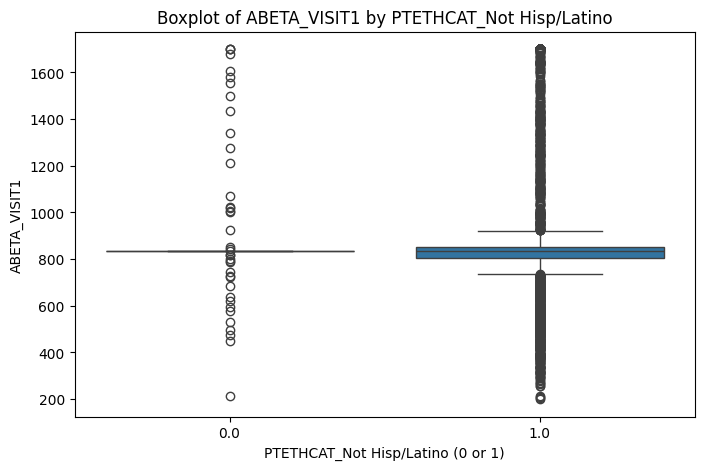


--- Summary of ABETA_VISIT1 by PTETHCAT_Not Hisp/Latino ---
                                mean  median         std  count
PTETHCAT_Not Hisp/Latino                                       
0.0                       882.517797   832.7  246.214169    118
1.0                       900.006192   832.7  335.904479   2164
Mann-Whitney U for ABETA_VISIT1 by PTETHCAT_Not Hisp/Latino: U-statistic=130657.50, P-value = 0.6482


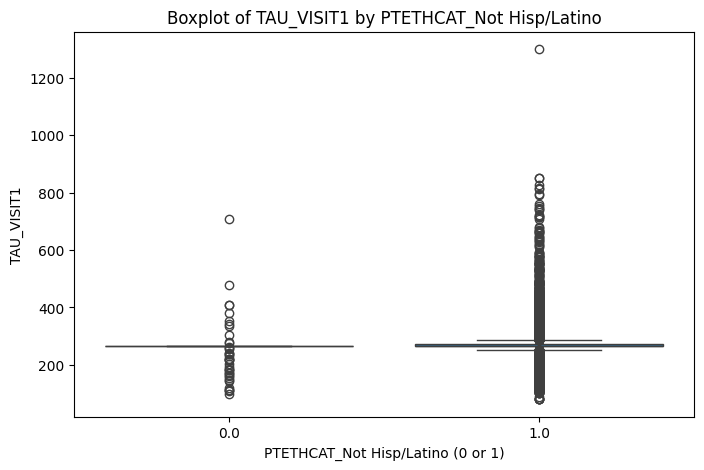


--- Summary of TAU_VISIT1 by PTETHCAT_Not Hisp/Latino ---
                                mean  median        std  count
PTETHCAT_Not Hisp/Latino                                      
0.0                       257.390593   264.8  68.733059    118
1.0                       280.107957   264.8  97.996086   2164
Mann-Whitney U for TAU_VISIT1 by PTETHCAT_Not Hisp/Latino: U-statistic=112408.00, P-value = 0.0195


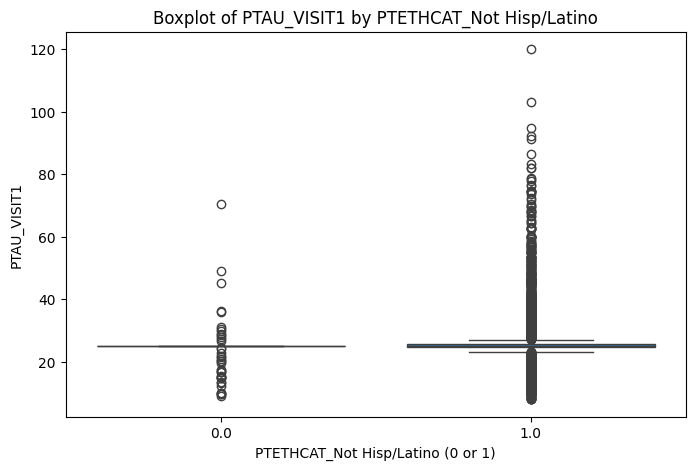


--- Summary of PTAU_VISIT1 by PTETHCAT_Not Hisp/Latino ---
                               mean  median        std  count
PTETHCAT_Not Hisp/Latino                                     
0.0                       24.212288   24.87   7.071995    118
1.0                       26.729875   24.87  10.844578   2164
Mann-Whitney U for PTAU_VISIT1 by PTETHCAT_Not Hisp/Latino: U-statistic=114845.00, P-value = 0.0496


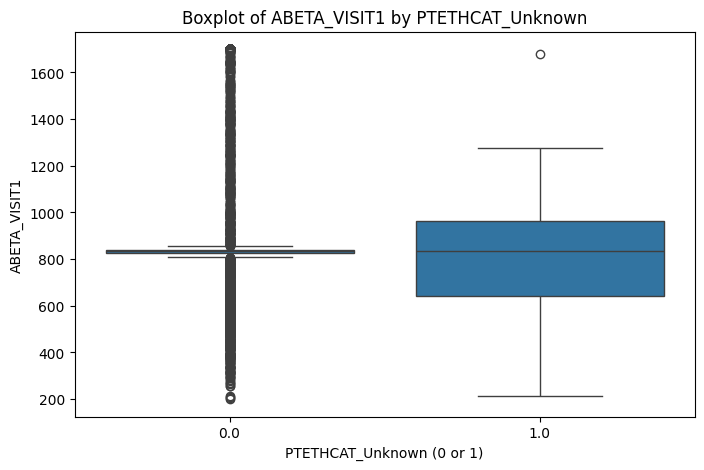


--- Summary of ABETA_VISIT1 by PTETHCAT_Unknown ---
                        mean  median         std  count
PTETHCAT_Unknown                                       
0.0               899.284331   832.7  331.565033   2272
1.0               857.650000   832.7  408.475016     10
Mann-Whitney U for ABETA_VISIT1 by PTETHCAT_Unknown: U-statistic=11865.50, P-value = 0.7956


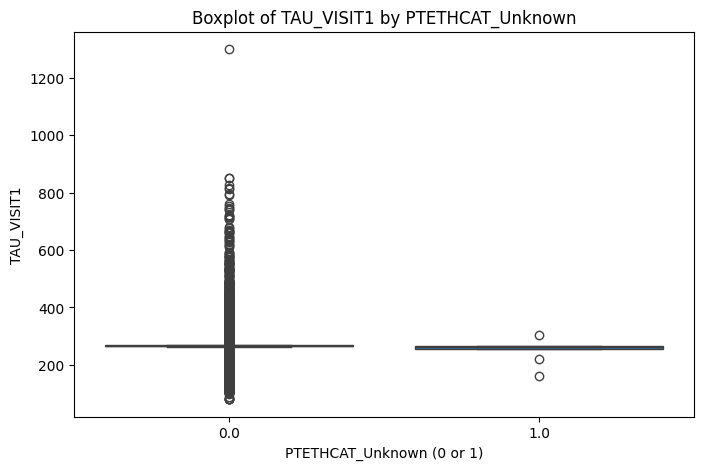


--- Summary of TAU_VISIT1 by PTETHCAT_Unknown ---
                       mean  median        std  count
PTETHCAT_Unknown                                     
0.0               279.05357   264.8  96.986472   2272
1.0               251.60000   262.9  37.849233     10
Mann-Whitney U for TAU_VISIT1 by PTETHCAT_Unknown: U-statistic=14191.50, P-value = 0.1464


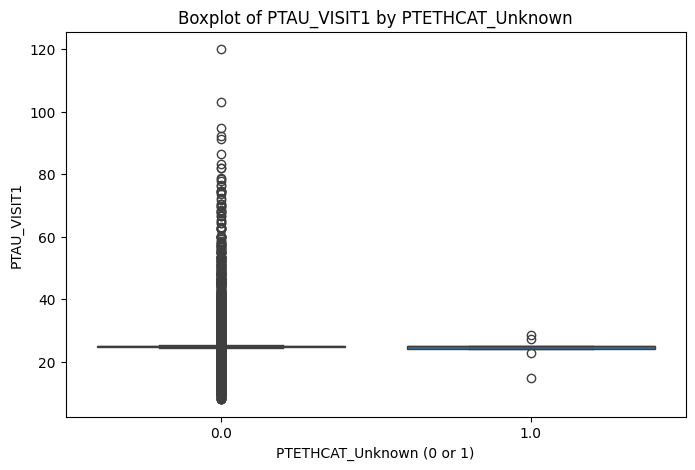


--- Summary of PTAU_VISIT1 by PTETHCAT_Unknown ---
                       mean  median        std  count
PTETHCAT_Unknown                                     
0.0               26.610634   24.87  10.715382   2272
1.0               24.114000   24.87   3.699568     10
Mann-Whitney U for PTAU_VISIT1 by PTETHCAT_Unknown: U-statistic=12832.00, P-value = 0.4503


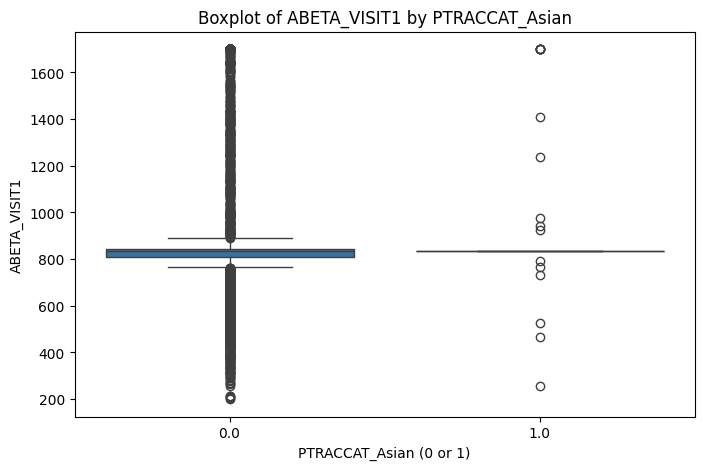


--- Summary of ABETA_VISIT1 by PTRACCAT_Asian ---
                      mean  median         std  count
PTRACCAT_Asian                                       
0.0             898.522697   832.7  332.565247   2225
1.0             921.710526   832.7  304.098905     57
Mann-Whitney U for ABETA_VISIT1 by PTRACCAT_Asian: U-statistic=58422.00, P-value = 0.2785


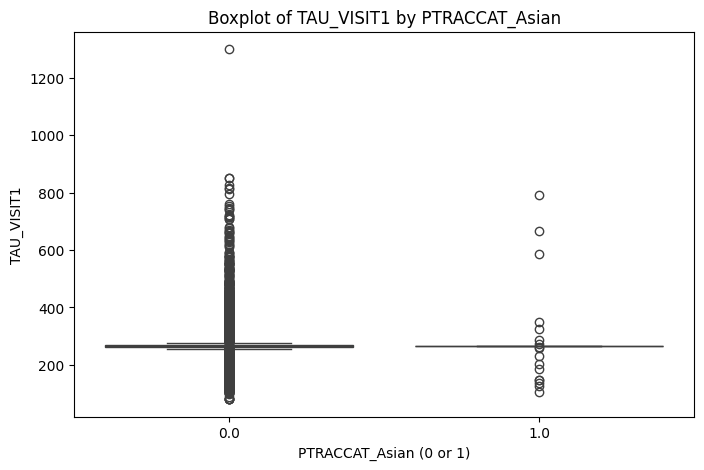


--- Summary of TAU_VISIT1 by PTRACCAT_Asian ---
                      mean  median         std  count
PTRACCAT_Asian                                       
0.0             279.039780   264.8   96.553853   2225
1.0             274.775439   264.8  107.545654     57
Mann-Whitney U for TAU_VISIT1 by PTRACCAT_Asian: U-statistic=66234.50, P-value = 0.5402


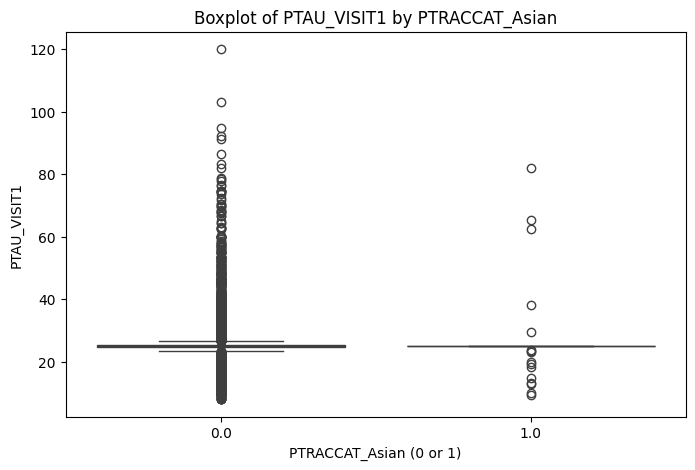


--- Summary of PTAU_VISIT1 by PTRACCAT_Asian ---
                     mean  median        std  count
PTRACCAT_Asian                                     
0.0             26.614157   24.87  10.677461   2225
1.0             26.035088   24.87  11.469923     57
Mann-Whitney U for PTAU_VISIT1 by PTRACCAT_Asian: U-statistic=67968.00, P-value = 0.3226


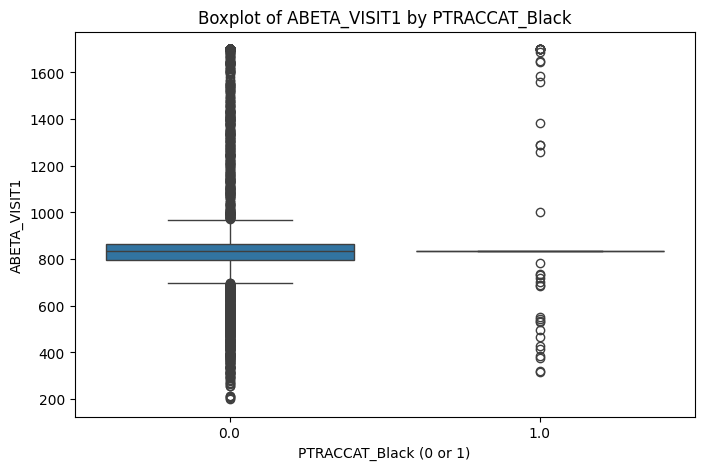


--- Summary of ABETA_VISIT1 by PTRACCAT_Black ---
                      mean  median         std  count
PTRACCAT_Black                                       
0.0             900.910990   832.7  336.813755   2111
1.0             876.768421   832.7  262.613062    171
Mann-Whitney U for ABETA_VISIT1 by PTRACCAT_Black: U-statistic=180204.00, P-value = 0.9706


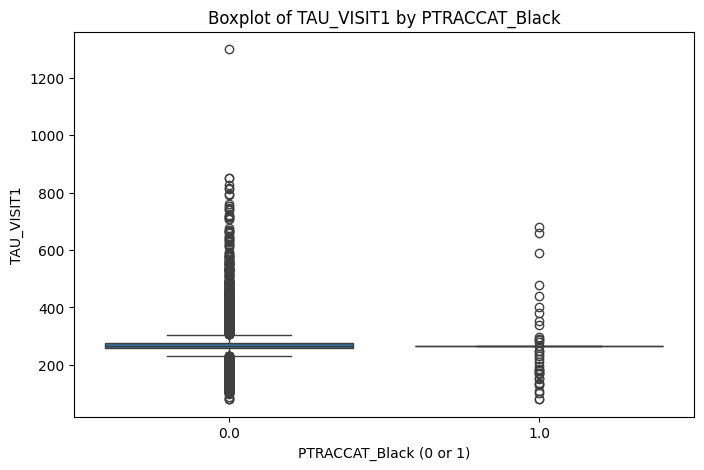


--- Summary of TAU_VISIT1 by PTRACCAT_Black ---
                      mean  median        std  count
PTRACCAT_Black                                      
0.0             280.118271   264.8  98.637592   2111
1.0             264.304327   264.8  69.185880    171
Mann-Whitney U for TAU_VISIT1 by PTRACCAT_Black: U-statistic=190699.50, P-value = 0.1889


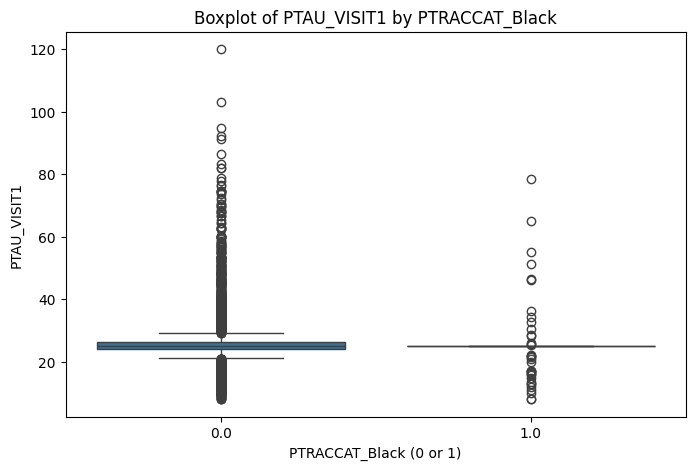


--- Summary of PTAU_VISIT1 by PTRACCAT_Black ---
                     mean  median        std  count
PTRACCAT_Black                                     
0.0             26.722994   24.87  10.905222   2111
1.0             25.077544   24.87   7.507817    171
Mann-Whitney U for PTAU_VISIT1 by PTRACCAT_Black: U-statistic=187884.00, P-value = 0.3413


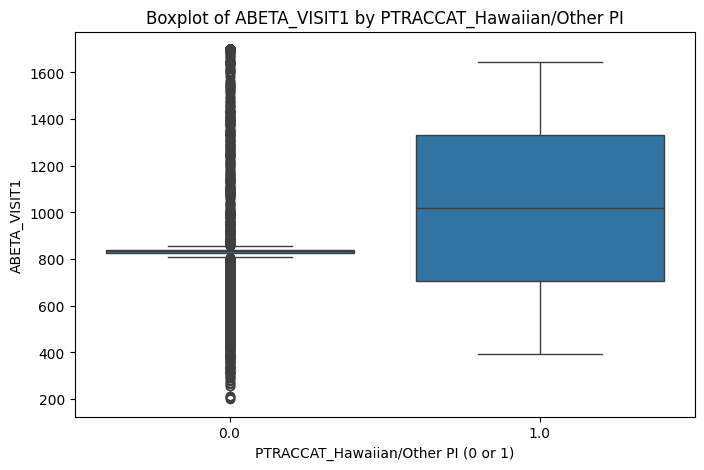


--- Summary of ABETA_VISIT1 by PTRACCAT_Hawaiian/Other PI ---
                                   mean   median         std  count
PTRACCAT_Hawaiian/Other PI                                         
0.0                          898.997105   832.70  331.453192   2280
1.0                         1018.550000  1018.55  883.105659      2
Mann-Whitney U for ABETA_VISIT1 by PTRACCAT_Hawaiian/Other PI: U-statistic=2401.50, P-value = 0.8898


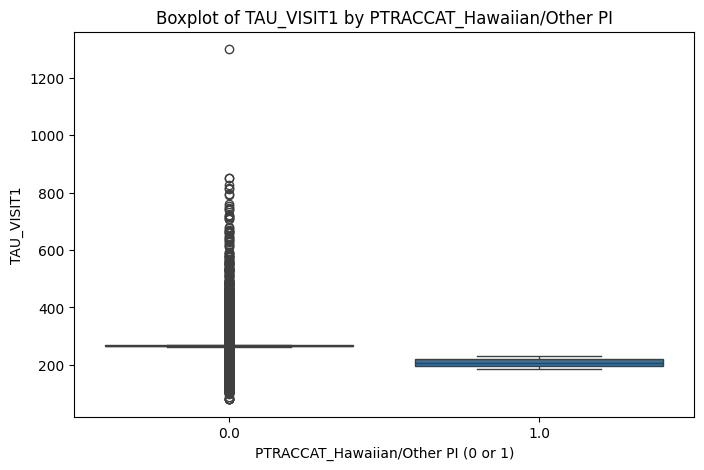


--- Summary of TAU_VISIT1 by PTRACCAT_Hawaiian/Other PI ---
                                 mean  median        std  count
PTRACCAT_Hawaiian/Other PI                                     
0.0                         278.99632  264.80  96.836363   2280
1.0                         207.05000  207.05  33.304729      2
Mann-Whitney U for TAU_VISIT1 by PTRACCAT_Hawaiian/Other PI: U-statistic=3889.50, P-value = 0.0654


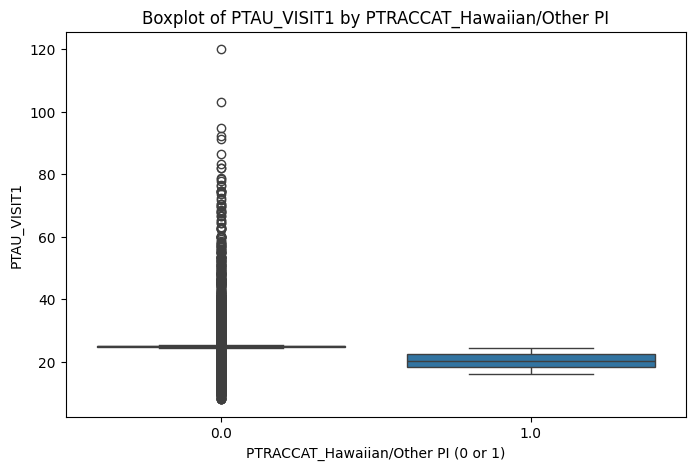


--- Summary of PTAU_VISIT1 by PTRACCAT_Hawaiian/Other PI ---
                                 mean  median        std  count
PTRACCAT_Hawaiian/Other PI                                     
0.0                         26.605272   24.87  10.697956   2280
1.0                         20.240000   20.24   6.010408      2
Mann-Whitney U for PTAU_VISIT1 by PTRACCAT_Hawaiian/Other PI: U-statistic=3774.00, P-value = 0.0872


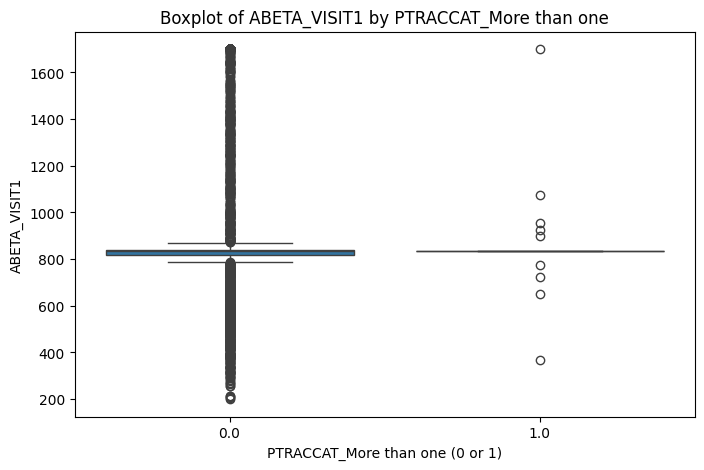


--- Summary of ABETA_VISIT1 by PTRACCAT_More than one ---
                              mean  median         std  count
PTRACCAT_More than one                                       
0.0                     899.643947   832.7  333.060509   2255
1.0                     853.829630   832.7  204.892439     27
Mann-Whitney U for ABETA_VISIT1 by PTRACCAT_More than one: U-statistic=29908.00, P-value = 0.8671


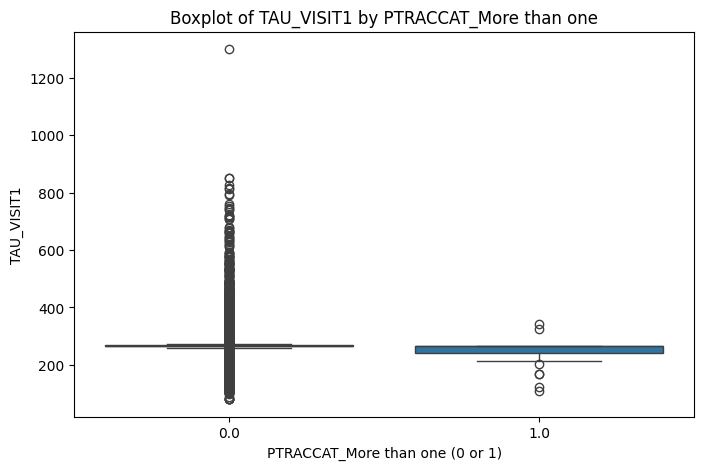


--- Summary of TAU_VISIT1 by PTRACCAT_More than one ---
                              mean  median        std  count
PTRACCAT_More than one                                      
0.0                     279.333530   264.8  97.163719   2255
1.0                     245.503704   264.8  52.698237     27
Mann-Whitney U for TAU_VISIT1 by PTRACCAT_More than one: U-statistic=35377.00, P-value = 0.1221


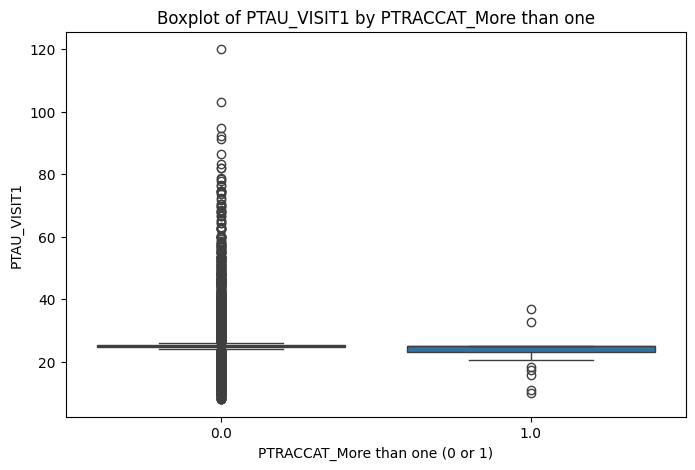


--- Summary of PTAU_VISIT1 by PTRACCAT_More than one ---
                             mean  median        std  count
PTRACCAT_More than one                                     
0.0                     26.638426   24.87  10.737579   2255
1.0                     23.364815   24.87   5.469787     27
Mann-Whitney U for PTAU_VISIT1 by PTRACCAT_More than one: U-statistic=35003.50, P-value = 0.1529


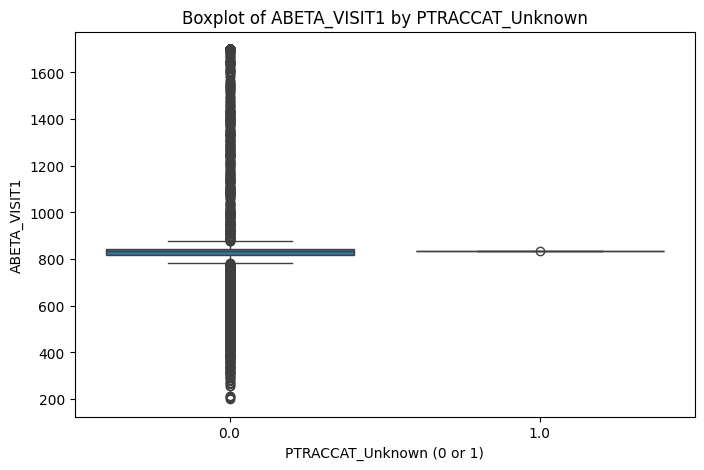


--- Summary of ABETA_VISIT1 by PTRACCAT_Unknown ---
                        mean  median         std  count
PTRACCAT_Unknown                                       
0.0               899.423426   832.7  332.613098   2271
1.0               832.718182   832.7    0.060302     11
Mann-Whitney U for ABETA_VISIT1 by PTRACCAT_Unknown: U-statistic=11926.00, P-value = 0.7826


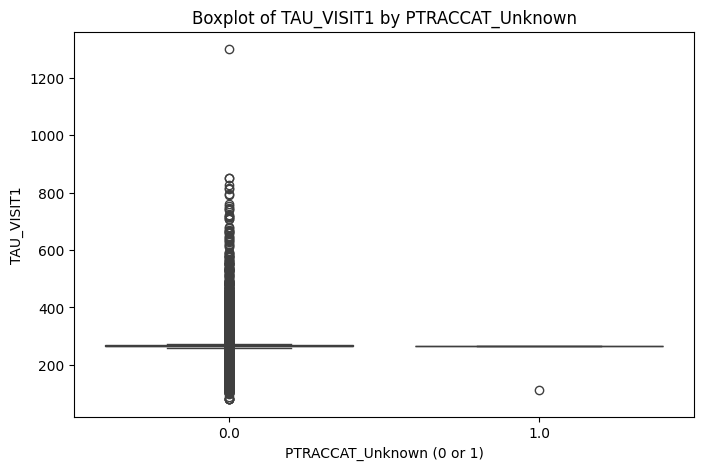


--- Summary of TAU_VISIT1 by PTRACCAT_Unknown ---
                        mean  median        std  count
PTRACCAT_Unknown                                      
0.0               279.068653   264.8  96.986845   2271
1.0               250.981818   264.8  45.829724     11
Mann-Whitney U for TAU_VISIT1 by PTRACCAT_Unknown: U-statistic=13608.00, P-value = 0.5848


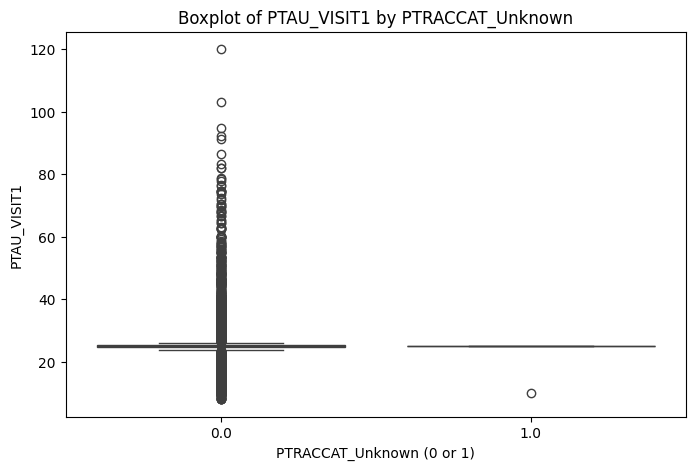


--- Summary of PTAU_VISIT1 by PTRACCAT_Unknown ---
                       mean  median        std  count
PTRACCAT_Unknown                                     
0.0               26.614707   24.87  10.715123   2271
1.0               23.500000   24.87   4.543776     11
Mann-Whitney U for PTAU_VISIT1 by PTRACCAT_Unknown: U-statistic=13616.00, P-value = 0.5820


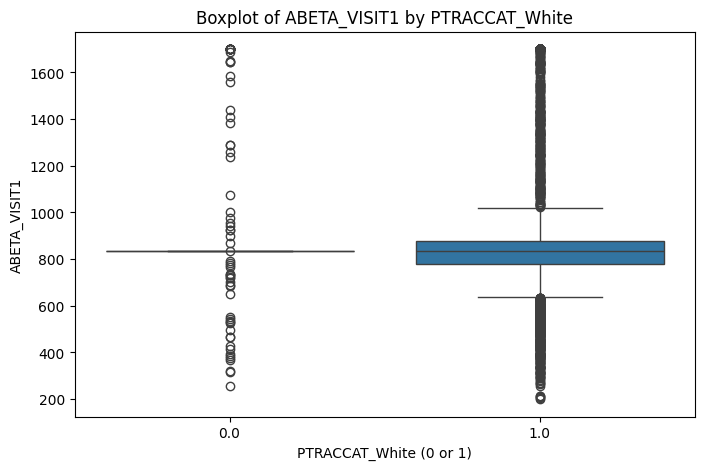


--- Summary of ABETA_VISIT1 by PTRACCAT_White ---
                      mean  median         std  count
PTRACCAT_White                                       
0.0             884.691941   832.7  266.175840    273
1.0             901.060030   832.7  339.796252   2009
Mann-Whitney U for ABETA_VISIT1 by PTRACCAT_White: U-statistic=281966.00, P-value = 0.4191


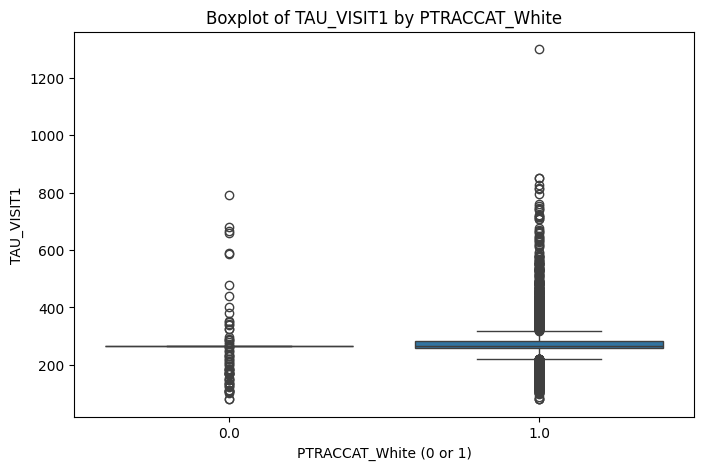


--- Summary of TAU_VISIT1 by PTRACCAT_White ---
                      mean  median        std  count
PTRACCAT_White                                      
0.0             262.771941   264.8  76.985759    273
1.0             281.129403   264.8  99.022088   2009
Mann-Whitney U for TAU_VISIT1 by PTRACCAT_White: U-statistic=251462.00, P-value = 0.0175


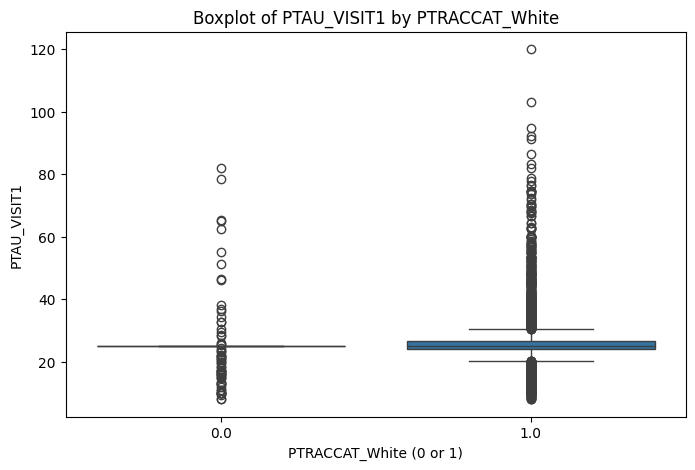


--- Summary of PTAU_VISIT1 by PTRACCAT_White ---
                     mean  median        std  count
PTRACCAT_White                                     
0.0             24.914615   24.87   8.246942    273
1.0             26.828676   24.87  10.968088   2009
Mann-Whitney U for PTAU_VISIT1 by PTRACCAT_White: U-statistic=253019.00, P-value = 0.0268


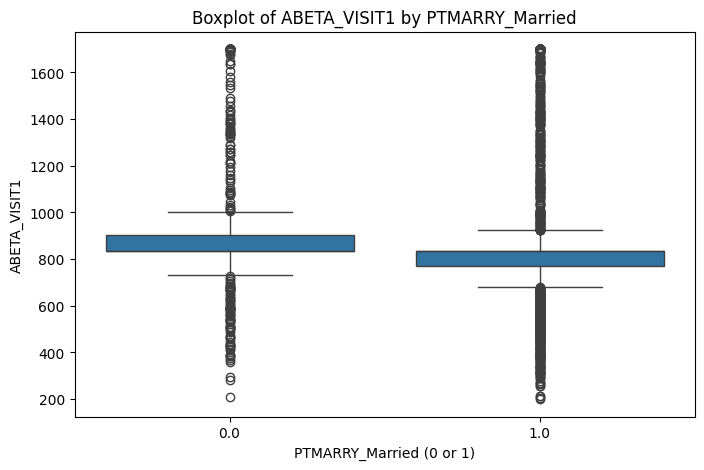


--- Summary of ABETA_VISIT1 by PTMARRY_Married ---
                       mean  median         std  count
PTMARRY_Married                                       
0.0              931.272396   832.7  329.779877    576
1.0              888.240094   832.7  331.928307   1706
Mann-Whitney U for ABETA_VISIT1 by PTMARRY_Married: U-statistic=535538.00, P-value = 0.0006


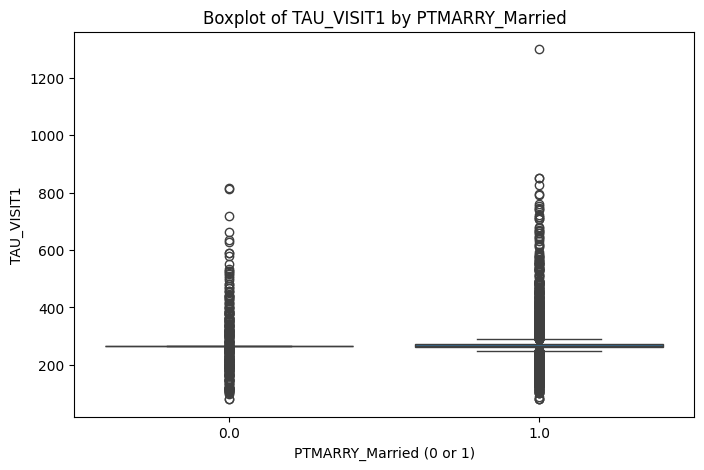


--- Summary of TAU_VISIT1 by PTMARRY_Married ---
                       mean  median        std  count
PTMARRY_Married                                      
0.0              272.576719   264.8  87.178523    576
1.0              281.079437   264.8  99.797714   1706
Mann-Whitney U for TAU_VISIT1 by PTMARRY_Married: U-statistic=477088.50, P-value = 0.2667


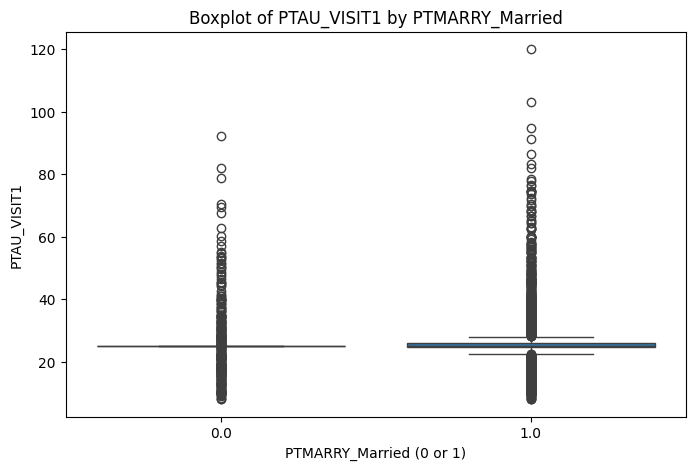


--- Summary of PTAU_VISIT1 by PTMARRY_Married ---
                      mean  median        std  count
PTMARRY_Married                                     
0.0              25.707813   24.87   9.490088    576
1.0              26.900821   24.87  11.059469   1706
Mann-Whitney U for PTAU_VISIT1 by PTMARRY_Married: U-statistic=474428.00, P-value = 0.1874


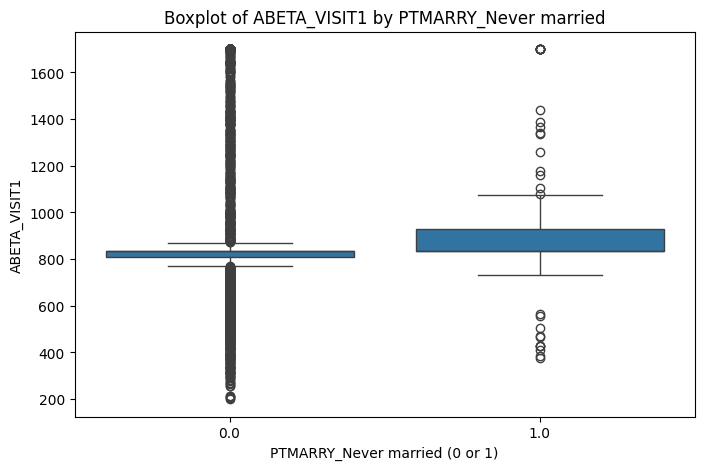


--- Summary of ABETA_VISIT1 by PTMARRY_Never married ---
                             mean  median         std  count
PTMARRY_Never married                                       
0.0                    898.287791   832.7  332.724194   2187
1.0                    917.843158   832.7  311.915075     95
Mann-Whitney U for ABETA_VISIT1 by PTMARRY_Never married: U-statistic=93829.50, P-value = 0.0881


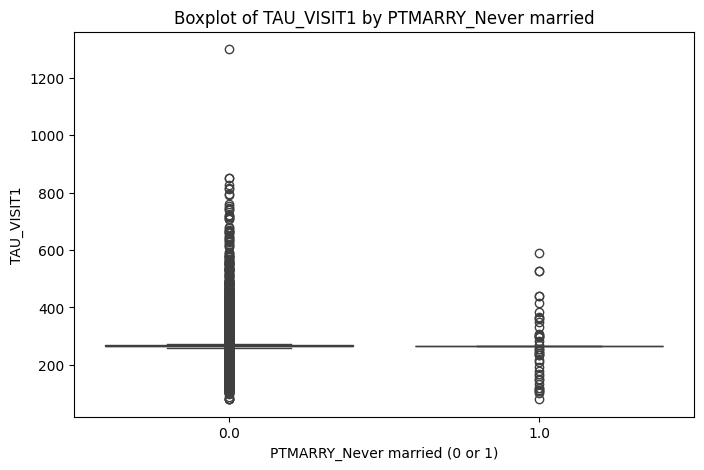


--- Summary of TAU_VISIT1 by PTMARRY_Never married ---
                             mean  median        std  count
PTMARRY_Never married                                      
0.0                    279.534801   264.8  97.344694   2187
1.0                    265.085263   264.8  83.076120     95
Mann-Whitney U for TAU_VISIT1 by PTMARRY_Never married: U-statistic=108831.00, P-value = 0.4013


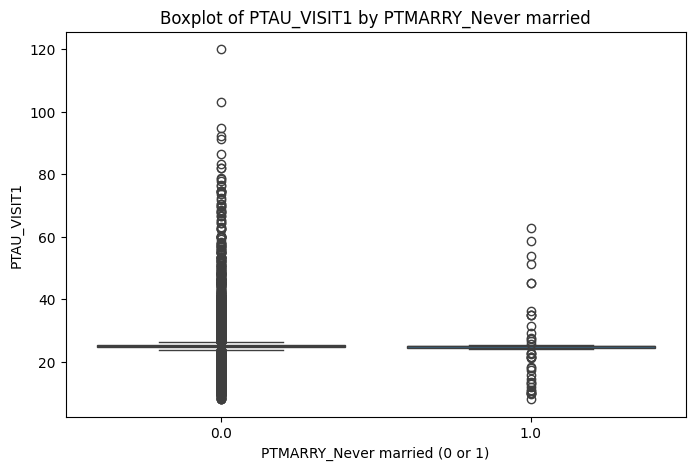


--- Summary of PTAU_VISIT1 by PTMARRY_Never married ---
                            mean  median        std  count
PTMARRY_Never married                                     
0.0                    26.669319   24.87  10.751074   2187
1.0                    24.996842   24.87   9.234138     95
Mann-Whitney U for PTAU_VISIT1 by PTMARRY_Never married: U-statistic=111860.50, P-value = 0.1759


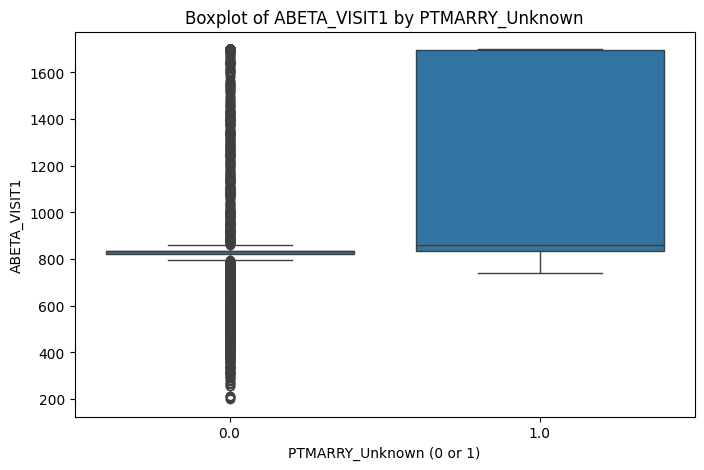


--- Summary of ABETA_VISIT1 by PTMARRY_Unknown ---
                        mean  median         std  count
PTMARRY_Unknown                                        
0.0               898.186582   832.7  331.197053   2273
1.0              1130.266667   858.9  430.153112      9
Mann-Whitney U for ABETA_VISIT1 by PTMARRY_Unknown: U-statistic=6540.00, P-value = 0.0461


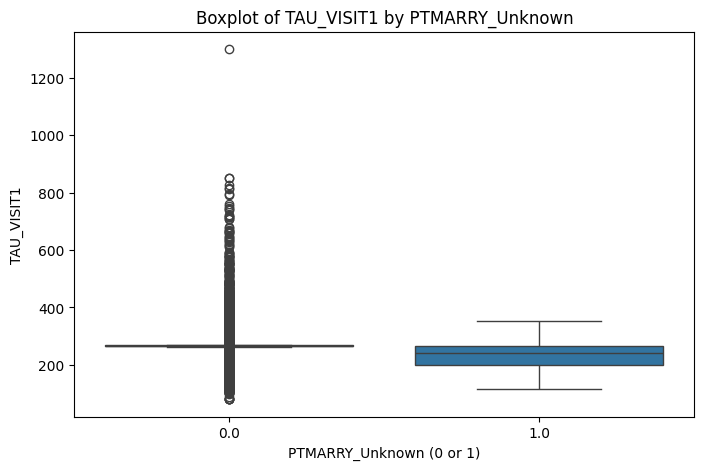


--- Summary of TAU_VISIT1 by PTMARRY_Unknown ---
                       mean  median        std  count
PTMARRY_Unknown                                      
0.0              279.124114   264.8  96.879908   2273
1.0              230.733333   239.6  67.948786      9
Mann-Whitney U for TAU_VISIT1 by PTMARRY_Unknown: U-statistic=13780.00, P-value = 0.0549


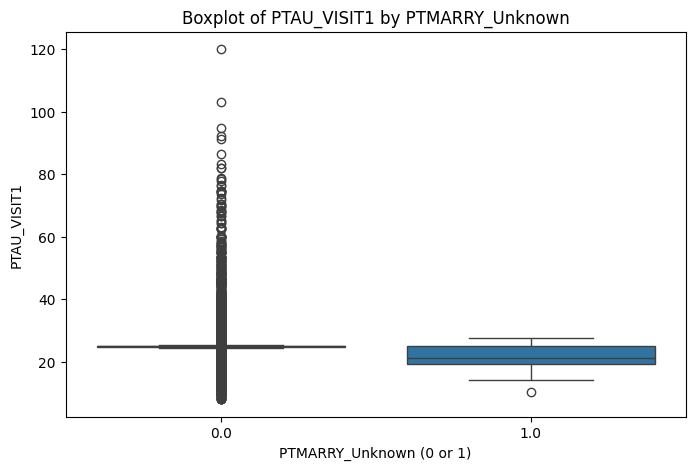


--- Summary of PTAU_VISIT1 by PTMARRY_Unknown ---
                      mean  median        std  count
PTMARRY_Unknown                                     
0.0              26.622719   24.87  10.705375   2273
1.0              20.784444   21.23   5.610671      9
Mann-Whitney U for PTAU_VISIT1 by PTMARRY_Unknown: U-statistic=13909.50, P-value = 0.0466


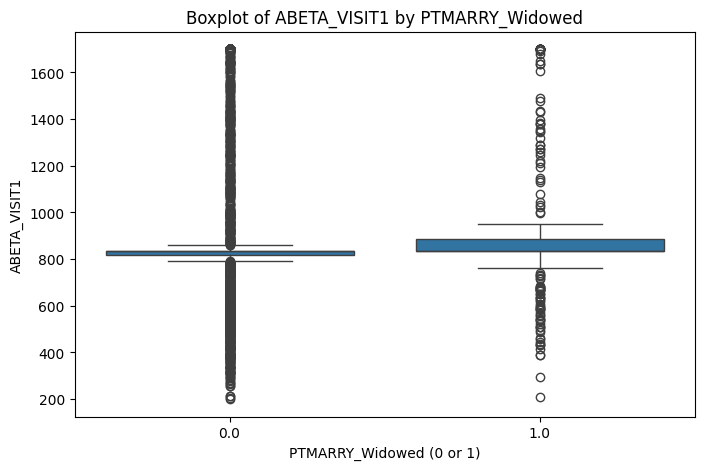


--- Summary of ABETA_VISIT1 by PTMARRY_Widowed ---
                       mean  median         std  count
PTMARRY_Widowed                                       
0.0              897.713531   832.7  333.235704   2025
1.0              910.041245   832.7  321.071945    257
Mann-Whitney U for ABETA_VISIT1 by PTMARRY_Widowed: U-statistic=252280.50, P-value = 0.3952


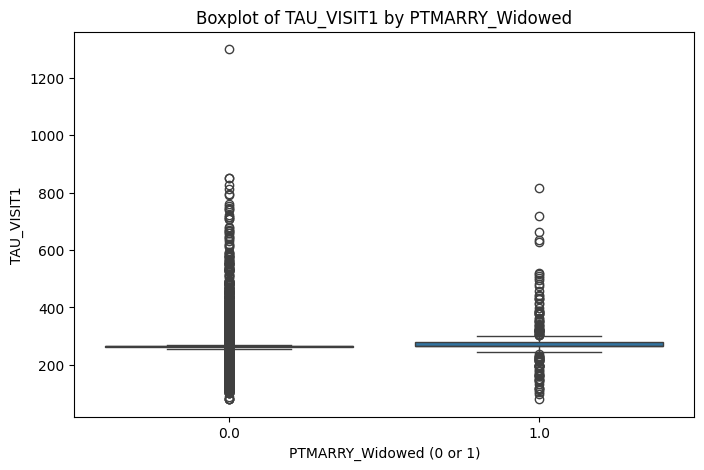


--- Summary of TAU_VISIT1 by PTMARRY_Widowed ---
                       mean  median        std  count
PTMARRY_Widowed                                      
0.0              278.738726   264.8  97.454585   2025
1.0              280.466109   264.8  91.831755    257
Mann-Whitney U for TAU_VISIT1 by PTMARRY_Widowed: U-statistic=249461.00, P-value = 0.2492


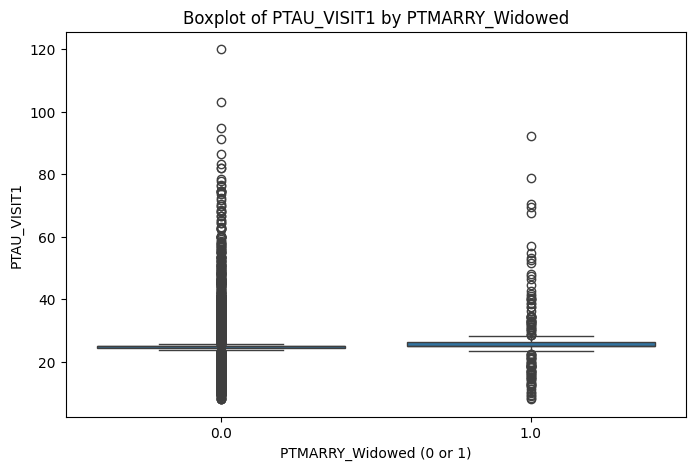


--- Summary of PTAU_VISIT1 by PTMARRY_Widowed ---
                      mean  median        std  count
PTMARRY_Widowed                                     
0.0              26.591600   24.87  10.748946   2025
1.0              26.663463   24.87  10.286198    257
Mann-Whitney U for PTAU_VISIT1 by PTMARRY_Widowed: U-statistic=247505.50, P-value = 0.1732


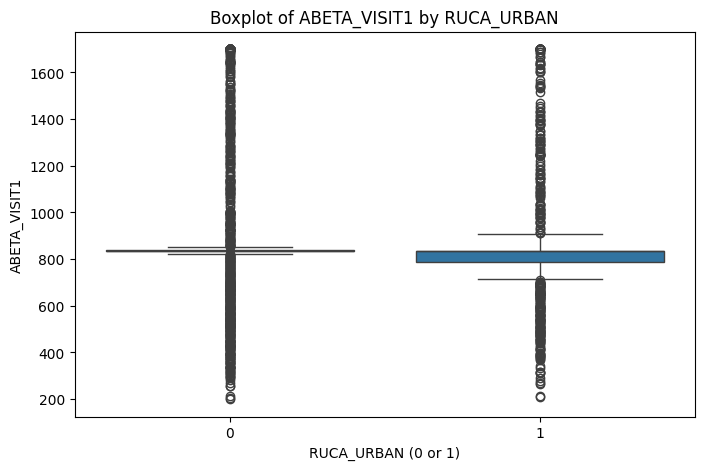


--- Summary of ABETA_VISIT1 by RUCA_URBAN ---
                  mean  median         std  count
RUCA_URBAN                                       
0           900.561053   832.7  335.441828   1425
1           896.675613   832.7  325.949112    857
Mann-Whitney U for ABETA_VISIT1 by RUCA_URBAN: U-statistic=617047.50, P-value = 0.6525


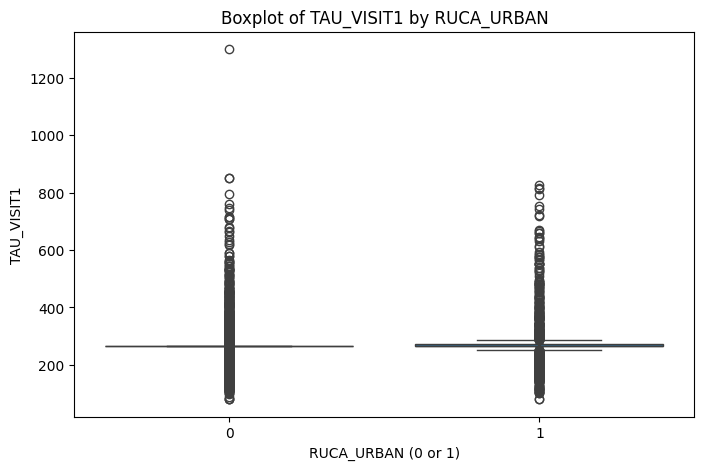


--- Summary of TAU_VISIT1 by RUCA_URBAN ---
                  mean  median        std  count
RUCA_URBAN                                      
0           277.336365   264.8  94.877556   1425
1           281.588553   264.8  99.965574    857
Mann-Whitney U for TAU_VISIT1 by RUCA_URBAN: U-statistic=601044.50, P-value = 0.5032


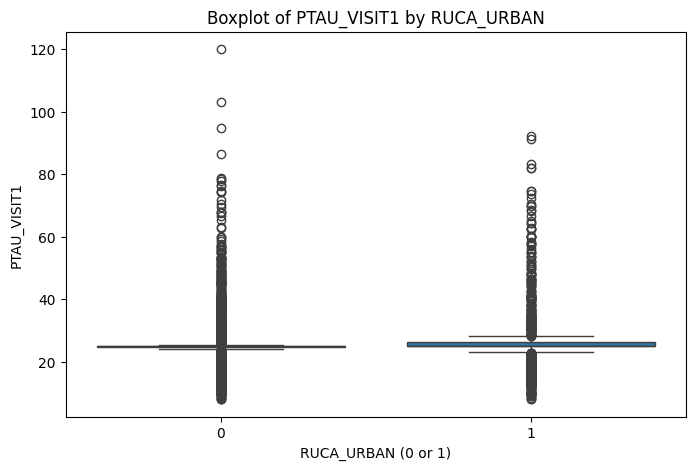


--- Summary of PTAU_VISIT1 by RUCA_URBAN ---
                 mean  median        std  count
RUCA_URBAN                                     
0           26.426540   24.87  10.425139   1425
1           26.887608   24.87  11.131174    857
Mann-Whitney U for PTAU_VISIT1 by RUCA_URBAN: U-statistic=598991.00, P-value = 0.4161


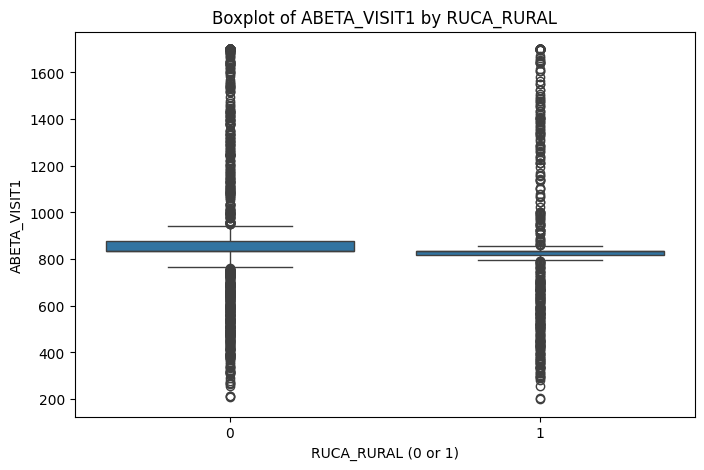


--- Summary of ABETA_VISIT1 by RUCA_RURAL ---
                  mean  median         std  count
RUCA_RURAL                                       
0           907.844116   832.7  334.823850   1453
1           883.779252   832.7  326.186224    829
Mann-Whitney U for ABETA_VISIT1 by RUCA_RURAL: U-statistic=629036.50, P-value = 0.0593


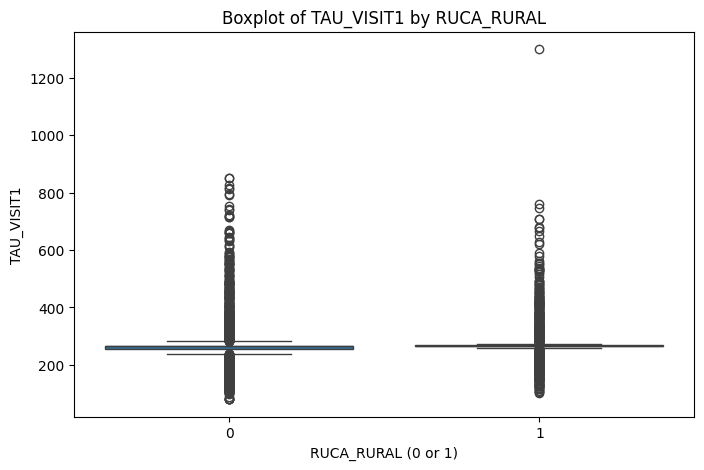


--- Summary of TAU_VISIT1 by RUCA_RURAL ---
                  mean  median        std  count
RUCA_RURAL                                      
0           277.630977   264.8  98.840448   1453
1           281.215802   264.8  93.187481    829
Mann-Whitney U for TAU_VISIT1 by RUCA_RURAL: U-statistic=576626.50, P-value = 0.0709


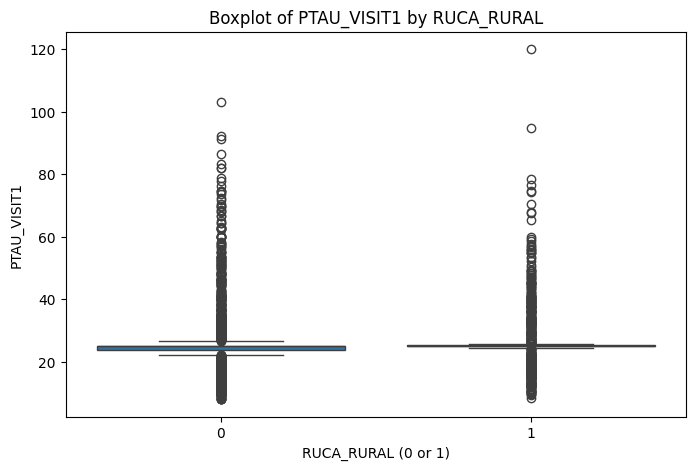


--- Summary of PTAU_VISIT1 by RUCA_RURAL ---
                 mean  median        std  count
RUCA_RURAL                                     
0           26.521783   24.87  11.039696   1453
1           26.736248   24.87  10.069413    829
Mann-Whitney U for PTAU_VISIT1 by RUCA_RURAL: U-statistic=579512.50, P-value = 0.1088


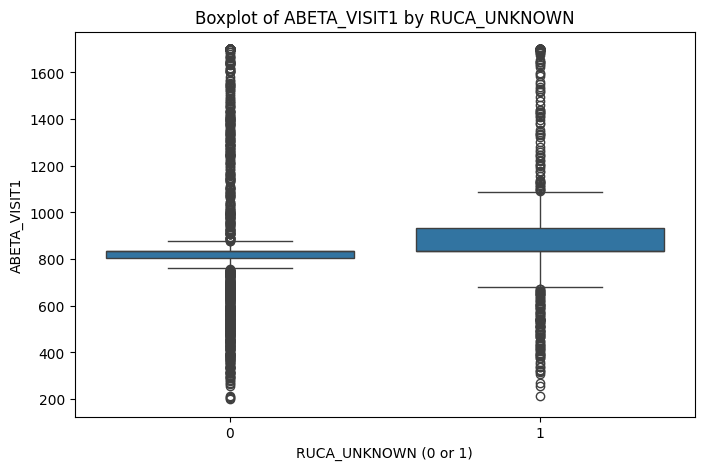


--- Summary of ABETA_VISIT1 by RUCA_UNKNOWN ---
                    mean  median         std  count
RUCA_UNKNOWN                                       
0             890.334520   832.7  326.032740   1686
1             923.903523   832.7  346.834213    596
Mann-Whitney U for ABETA_VISIT1 by RUCA_UNKNOWN: U-statistic=469225.00, P-value = 0.0104


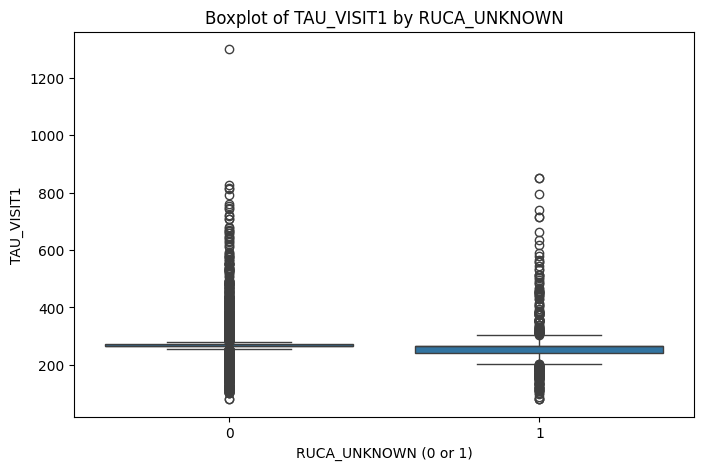


--- Summary of TAU_VISIT1 by RUCA_UNKNOWN ---
                    mean  median        std  count
RUCA_UNKNOWN                                      
0             281.405273   264.8  96.663755   1686
1             271.940302   264.8  97.000284    596
Mann-Whitney U for TAU_VISIT1 by RUCA_UNKNOWN: U-statistic=537638.00, P-value = 0.0066


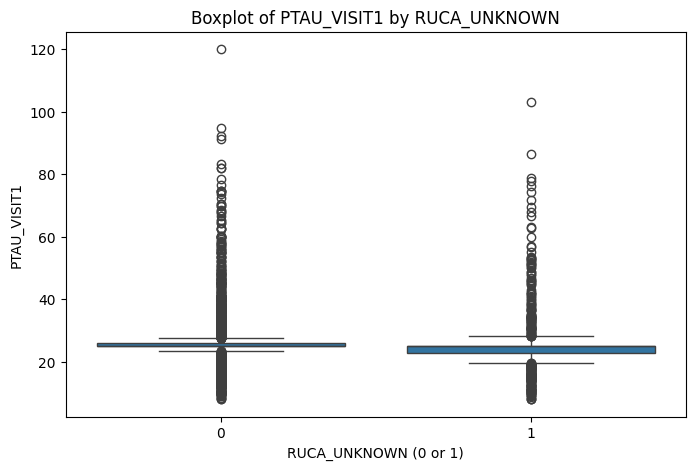


--- Summary of PTAU_VISIT1 by RUCA_UNKNOWN ---
                   mean  median        std  count
RUCA_UNKNOWN                                     
0             26.813185   24.87  10.619508   1686
1             25.995755   24.87  10.894587    596
Mann-Whitney U for PTAU_VISIT1 by RUCA_UNKNOWN: U-statistic=536805.50, P-value = 0.0080


In [23]:
# --- Step 6: Socioeconomic OHE Factors vs. Biomarkers (Corrected with definition) ---
import pandas as pd # Add if not already imported in this session/cell
import numpy as np # Add if not already imported
import matplotlib.pyplot as plt # Add if not already imported
import seaborn as sns # Add if not already imported
# from scipy.stats import ttest_ind, mannwhitneyu # Uncomment if you use these tests

# --- Assuming df is loaded ---

# Define the list of One-Hot Encoded columns to analyze for socioeconomics
ohe_cols_to_analyze_univariate = [
    'PTGENDER_Male',
    'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', # Add other PTETHCAT if they exist (e.g. for 'Hisp/Latino')
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed', # Add others like 'Divorced' if present
    'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN'
]
# Filter to only include columns actually present in your DataFrame 'df'
ohe_cols_to_analyze_univariate = [col for col in ohe_cols_to_analyze_univariate if col in df.columns]


biomarker_cols = ['ABETA_VISIT1', 'TAU_VISIT1', 'PTAU_VISIT1']
biomarker_cols = [col for col in biomarker_cols if col in df.columns] # Filter for existing columns

print(f"\n--- Bivariate Analysis: Socioeconomic OHE Features vs. Biomarkers ---")

if not ohe_cols_to_analyze_univariate:
    print("Warning: The list 'ohe_cols_to_analyze_univariate' is empty or no specified OHE columns were found in the DataFrame. Skipping Step 6.")
elif not biomarker_cols:
    print("Warning: The list 'biomarker_cols' is empty or no specified biomarker columns were found in the DataFrame. Skipping Step 6.")
else:
    for ohe_col in ohe_cols_to_analyze_univariate:
        if df[ohe_col].isnull().all():
            print(f"Warning: OHE column '{ohe_col}' is all NaN. Skipping.")
            continue
        # Ensure it's binary
        if not (df[ohe_col].dropna().nunique() <= 2 and df[ohe_col].dropna().isin([0, 1]).all()):
            print(f"Skipping {ohe_col} for biomarker comparison as it's not binary 0/1 after dropping NaNs (Unique values: {df[ohe_col].dropna().unique()}).")
            continue

        for biomarker in biomarker_cols:
            if df[biomarker].isnull().all():
                print(f"Warning: Biomarker column '{biomarker}' is all NaN for OHE col {ohe_col}. Skipping.")
                continue

            # Create a temporary df for plotting
            plot_df_bio = df[[ohe_col, biomarker]].copy()
            plot_df_bio.dropna(inplace=True) # Drop rows if either ohe_col or biomarker is NaN

            if plot_df_bio.empty or plot_df_bio[ohe_col].nunique() < 2:
                print(f"Not enough data or distinct groups for {biomarker} by {ohe_col} after NaN removal. Skipping plot.")
                continue

            plt.figure(figsize=(8, 5))
            sns.boxplot(x=plot_df_bio[ohe_col], y=plot_df_bio[biomarker])
            plt.title(f'Boxplot of {biomarker} by {ohe_col}')
            plt.xlabel(f'{ohe_col} (0 or 1)')
            plt.ylabel(biomarker)
            plt.show()

            # Summary stats
            print(f"\n--- Summary of {biomarker} by {ohe_col} ---")
            print(plot_df_bio.groupby(ohe_col)[biomarker].agg(['mean', 'median', 'std', 'count']))
            
            # Optional: T-test or Mann-Whitney U for comparing two groups (0 vs 1 for the ohe_col)
            group0 = plot_df_bio[plot_df_bio[ohe_col] == 0][biomarker]
            group1 = plot_df_bio[plot_df_bio[ohe_col] == 1][biomarker]

            if len(group0) > 1 and len(group1) > 1: # Need at least 2 samples in each group for these tests
                from scipy.stats import ttest_ind, mannwhitneyu # Import here or at top of script
                try:
                    # Example: Using Mann-Whitney U (non-parametric)
                    u_stat, p_val_mannwhitney = mannwhitneyu(group0, group1, alternative='two-sided', nan_policy='raise')
                    print(f"Mann-Whitney U for {biomarker} by {ohe_col}: U-statistic={u_stat:.2f}, P-value = {p_val_mannwhitney:.4f}")
                    
                    # Example: T-test (parametric, assumes normality and equal variance by default)
                    # t_stat, p_val_ttest = ttest_ind(group0, group1, equal_var=False) # Welch's t-test if variances might be unequal
                    # print(f"T-test for {biomarker} by {ohe_col}: T-statistic={t_stat:.2f}, P-value = {p_val_ttest:.4f}")

                except ValueError as ve: # Catches errors like "All numbers are identical in mannwhitneyu"
                    print(f"Could not perform stat test for {biomarker} by {ohe_col} (possibly identical groups or insufficient data): {ve}")
                except Exception as e:
                    print(f"Error during stat test for {biomarker} by {ohe_col}: {e}")
            else:
                print(f"Not enough data in one or both groups of '{ohe_col}' to perform statistical test for '{biomarker}'.")

Loading data from DATA.csv...
Data loaded. Shape: (2282, 58)

Applying LOCF to visit-specific cognitive scores...
LOCF applied.

Building combined dataset across visits...
Combined dataset created. Shape: (7137, 41)

Preparing X and y for modeling...
Total features in X_raw: 40. Columns: ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN', 'PTEDUCAT', 'AGE', 'APOE4', 'CDRSB_VISIT1', 'ADAS11_VISIT1', 'ADAS13_VISIT1', 'ADASQ4_VISIT1', 'MMSE_VISIT1', 'VISIT', 'CDRSB_VISIT2', 'ADAS11_VISIT2', 'ADAS13_VISIT2', 'ADASQ4_VISIT2', 'MMSE_VISIT2', 'CDRSB_VISIT3', 'ADAS11_VISIT3', 'ADAS13_VISIT3', 'ADASQ4_VISIT3', 'MMSE_VISIT3', 'CDRSB_VISIT4', 'ADAS11_VISIT4', 'ADAS13_VISIT4', 'ADASQ4_VISIT4', 'MMSE_VISIT4']
Target variable encoded.

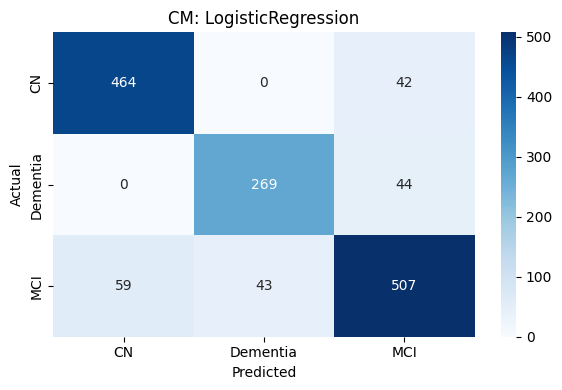

--- Training and evaluating: RandomForest ---
 CV Mean Accuracy: 0.8896 (+/- 0.0100)
 Test Accuracy: 0.8831
 Macro F1-Score: 0.8825



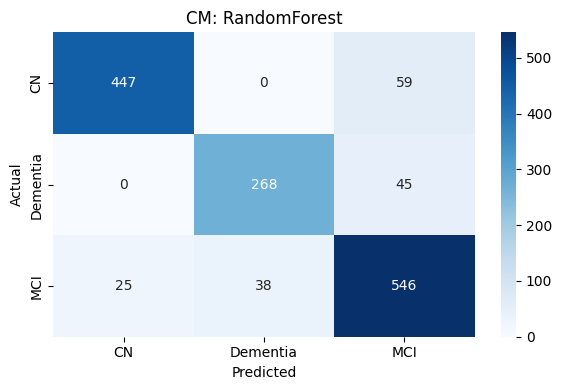

--- Training and evaluating: GradientBoosting ---


KeyboardInterrupt: 

In [17]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# --- 0. Configuration ---
DATA_CSV_PATH = "DATA.csv"
# Save to a new directory to distinguish from previous attempts
MODEL_OUTPUT_DIR = "models_corrected_training"
os.makedirs(MODEL_OUTPUT_DIR, exist_ok=True)
MAX_VISITS = 4 # Assuming up to VISIT4

# --- 1. Load Data ---
print(f"Loading data from {DATA_CSV_PATH}...")
try:
    df = pd.read_csv(DATA_CSV_PATH)
except FileNotFoundError:
    print(f"Error: {DATA_CSV_PATH} not found. Please ensure the file exists.")
    exit()
print(f"Data loaded. Shape: {df.shape}")
# print("Initial columns:", df.columns.tolist()) # For debugging column names

# --- 2. Define Feature Groups ---
# Cognitive scores: these have _VISITx versions and will undergo LOCF
cognitive_scores_bases = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']

# Static features (demographics, rurality, education, age, APOE4)
# These are taken as-is for each patient-visit row.
# Ensure these column names EXACTLY match your DATA.csv
demographic_cols = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
# APOE4 is now explicitly a static feature.
# Ensure 'APOE4', 'PTEDUCAT', 'AGE' columns exist in DATA.csv
other_static_cols = ['PTEDUCAT', 'AGE', 'APOE4']

# Verify all defined static columns exist in df
all_static_cols_defined = demographic_cols + rurality_cols + other_static_cols
missing_static_cols = [col for col in all_static_cols_defined if col not in df.columns]
if missing_static_cols:
    print(f"ERROR: The following static columns are defined but not found in DATA.csv: {missing_static_cols}")
    print("Please check your DATA.csv or feature definitions.")
    exit()

# --- 3. LOCF for Visit-Specific Cognitive Scores ---
print("\nApplying LOCF to visit-specific cognitive scores...")
vars_for_locf = cognitive_scores_bases
visit_specific_columns_for_locf = []

for var_base in vars_for_locf:
    for v_num in range(1, MAX_VISITS + 1):
        col_name = f"{var_base}_VISIT{v_num}"
        if col_name in df.columns:
            visit_specific_columns_for_locf.append(col_name)

grouped_locf_vars = defaultdict(list)
for col in visit_specific_columns_for_locf:
    base_name = col.split("_VISIT")[0]
    grouped_locf_vars[base_name].append(col)

for base_name, visit_cols_list in grouped_locf_vars.items():
    sorted_visit_cols = sorted(visit_cols_list, key=lambda x: int(x.split("VISIT")[1]))
    if sorted_visit_cols:
        df[sorted_visit_cols] = df[sorted_visit_cols].ffill(axis=1)
print("LOCF applied.")

# --- 4. Build Dataset for Modeling (Combining Visits) ---
print("\nBuilding combined dataset across visits...")
all_visit_data_list = []

for visit_num in range(1, MAX_VISITS + 1):
    target_col_name = f"DX_VISIT{visit_num}"
    if target_col_name not in df.columns:
        continue

    current_visit_cognitive_cols = [f"{base}_VISIT{visit_num}" for base in cognitive_scores_bases
                                    if f"{base}_VISIT{visit_num}" in df.columns]
    
    # Check if any cognitive columns were actually found for this visit
    if not current_visit_cognitive_cols:
        # print(f"Warning: No cognitive score columns found for VISIT{visit_num}. Features might be sparse for these rows.")
        pass # We might still proceed if static features are enough, or filter later if needed

    # All static features are used directly
    current_static_predictors = all_static_cols_defined
    
    # Combine predictors for the current visit
    current_visit_dynamic_predictors = current_visit_cognitive_cols
    current_predictors_for_visit = current_static_predictors + current_visit_dynamic_predictors
    
    # Ensure all selected predictor columns exist in the DataFrame 'df' (should be guaranteed by earlier checks for static)
    final_predictors_for_subset = [col for col in current_predictors_for_visit if col in df.columns]
    
    if not final_predictors_for_subset:
        # print(f"No predictor columns available for visit {visit_num}. Skipping.")
        continue

    cols_for_this_visit_subset = final_predictors_for_subset + [target_col_name]
    visit_subset_df = df[cols_for_this_visit_subset].copy()
    
    visit_subset_df.dropna(subset=[target_col_name], inplace=True)
    if visit_subset_df.empty:
        continue
        
    visit_subset_df.rename(columns={target_col_name: 'DX'}, inplace=True)
    visit_subset_df['VISIT'] = visit_num # Add 'VISIT' number as a feature
    
    all_visit_data_list.append(visit_subset_df)

if not all_visit_data_list:
    raise ValueError("No data collected across visits. Check column names in DATA.csv (DX_VISITx, cognitive_VISITx, APOE4, etc.) and feature definitions.")

combined_df = pd.concat(all_visit_data_list, axis=0, ignore_index=True)
print(f"Combined dataset created. Shape: {combined_df.shape}")

# --- 5. Prepare Data for Modeling (X, y) ---
print("\nPreparing X and y for modeling...")
X_raw = combined_df.drop(columns=['DX'])
y_raw_series = combined_df['DX'].astype(str)

# Sanity check features
expected_features_in_X_raw = ['APOE4', 'VISIT'] # Add more critical ones if needed
for feat in expected_features_in_X_raw:
    if feat not in X_raw.columns:
        print(f"CRITICAL WARNING: Expected feature '{feat}' is MISSING from X_raw columns!")
print(f"Total features in X_raw: {len(X_raw.columns)}. Columns: {X_raw.columns.tolist()}")

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw_series)
joblib.dump(le, os.path.join(MODEL_OUTPUT_DIR, "label_encoder_corrected.pkl"))
print(f"Target variable encoded. Classes: {le.classes_}")

# Train-test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)
print(f"X_train_raw shape: {X_train_raw.shape}, X_test_raw shape: {X_test_raw.shape}")


# --- 6. Preprocessing Pipeline ---
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

print("\nFitting preprocessing pipeline on X_train_raw...")
preprocessing_pipeline.fit(X_train_raw) # Fit on X_train_raw column names and order
fitted_column_order = list(X_train_raw.columns)
joblib.dump(fitted_column_order, os.path.join(MODEL_OUTPUT_DIR, "fitted_column_order_corrected.pkl"))
print(f"Saved fitted column order to {os.path.join(MODEL_OUTPUT_DIR, 'fitted_column_order_corrected.pkl')}. Number of columns: {len(fitted_column_order)}")
# <<< END OF INSERTED CODE >>>

joblib.dump(preprocessing_pipeline, os.path.join(MODEL_OUTPUT_DIR, "preprocessing_pipeline_corrected.pkl"))

X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)
print("Preprocessing pipeline applied to train and test sets.")

# --- 7. Define and Train Models ---
print("\nDefining and training models...")
models_dict = {
    "LogisticRegression": LogisticRegression(max_iter=5000, random_state=42, solver='liblinear'),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42), # Consider n_estimators if performance is low
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, hidden_layer_sizes=(64,32)) # Example layers
}

model_results = {}

for model_name, model_instance in models_dict.items():
    print(f"--- Training and evaluating: {model_name} ---")
    cv_scores = cross_val_score(model_instance, X_train_processed, y_train, cv=5, scoring='accuracy')
    print(f" CV Mean Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    model_instance.fit(X_train_processed, y_train)
    joblib.dump(model_instance, os.path.join(MODEL_OUTPUT_DIR, f"{model_name}_corrected.pkl"))

    y_pred = model_instance.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    class_report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    model_results[model_name] = {
        "cv_mean_accuracy": np.mean(cv_scores),
        "cv_std_accuracy": np.std(cv_scores),
        "test_accuracy": accuracy,
        "precision_macro": class_report_dict["macro avg"]["precision"],
        "recall_macro": class_report_dict["macro avg"]["recall"],
        "f1_score_macro": class_report_dict["macro avg"]["f1-score"],
    }
    print(f" Test Accuracy: {accuracy:.4f}")
    print(f" Macro F1-Score: {class_report_dict['macro avg']['f1-score']:.4f}\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"CM: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_OUTPUT_DIR, f"cm_{model_name}_corrected.png"))
    plt.show()

# --- 8. Hybrid Voting Model (Example: RF, GB, SVC) ---
print("\n--- Evaluating Hybrid Voting Model (RF, GB, SVC) ---")
try:
    rf_model = models_dict["RandomForest"]
    gb_model = models_dict["GradientBoosting"]
    svc_model = models_dict["SVC"] # Using SVC instead of NB

    rf_preds_test = rf_model.predict(X_test_processed)
    gb_preds_test = gb_model.predict(X_test_processed)
    svc_preds_test = svc_model.predict(X_test_processed) # Using SVC

    all_predictions_stacked = np.vstack([rf_preds_test, gb_preds_test, svc_preds_test])
    # Ensure scipy.stats.mode is used correctly based on version
    hybrid_preds_test = mode(all_predictions_stacked, axis=0, keepdims=False).mode
    if isinstance(hybrid_preds_test, np.ndarray) and hybrid_preds_test.ndim > 1:
        hybrid_preds_test = hybrid_preds_test.ravel()


    hybrid_accuracy = accuracy_score(y_test, hybrid_preds_test)
    hybrid_class_report_dict = classification_report(y_test, hybrid_preds_test, target_names=le.classes_, output_dict=True, zero_division=0)
    hybrid_conf_matrix = confusion_matrix(y_test, hybrid_preds_test)

    model_results["HybridModel_RF_GB_SVC"] = { # Updated name
        "test_accuracy": hybrid_accuracy,
        "precision_macro": hybrid_class_report_dict["macro avg"]["precision"],
        "recall_macro": hybrid_class_report_dict["macro avg"]["recall"],
        "f1_score_macro": hybrid_class_report_dict["macro avg"]["f1-score"],
    }
    print(f"Hybrid Model Test Accuracy: {hybrid_accuracy:.4f}")
    print(f"Hybrid Model Macro F1-Score: {hybrid_class_report_dict['macro avg']['f1-score']:.4f}\n")

    plt.figure(figsize=(6, 4))
    sns.heatmap(hybrid_conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Hybrid Model (RF, GB, SVC) - CM")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.savefig(os.path.join(MODEL_OUTPUT_DIR, f"cm_HybridModel_corrected.png"))
    plt.show()
except Exception as e:
    print(f"Could not evaluate hybrid model: {e}")


# --- 9. Summarize Results ---
print("\n--- Aggregated Model Performance (Test Set & CV) ---")
results_summary_df = pd.DataFrame(model_results).T
results_summary_df = results_summary_df[["cv_mean_accuracy", "test_accuracy", "precision_macro", "recall_macro", "f1_score_macro"]]
print(results_summary_df.sort_values(by="f1_score_macro", ascending=False))
results_summary_df.to_csv(os.path.join(MODEL_OUTPUT_DIR, "model_performance_summary_corrected.csv"))

print(f"\nTraining complete. Models and results saved in '{MODEL_OUTPUT_DIR}'.")
print("Choose the best model (e.g., RandomForest_corrected.pkl) for SHAP analysis.")

Loading corrected model ('RandomForest_corrected.pkl'), pipeline, and label encoder from 'models_corrected_training'...
Successfully loaded corrected model, pipeline, and label encoder.

Reconstructing data splits (X_train_raw, X_test_raw) to match corrected training...
SHAP: Reconstructed X_train_raw shape: (5709, 40), X_test_raw shape: (1428, 40)
SHAP: Features for SHAP (should match training): ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN', 'PTEDUCAT', 'AGE', 'APOE4', 'CDRSB_VISIT1', 'ADAS11_VISIT1', 'ADAS13_VISIT1', 'ADASQ4_VISIT1', 'MMSE_VISIT1', 'VISIT', 'CDRSB_VISIT2', 'ADAS11_VISIT2', 'ADAS13_VISIT2', 'ADASQ4_VISIT2', 'MMSE_VISIT2', 'CDRSB_VISIT3', 'ADAS11_VISIT3', 'ADAS13_VISIT3', 'ADASQ4_VISIT3', 'MMSE_VISI

100%|===================| 4279/4284 [07:10<00:00]        

SHAP values calculated (check_additivity=False). Shape: (1428, 40, 3)

Generating SHAP summary plot (bar) for overall feature importance...


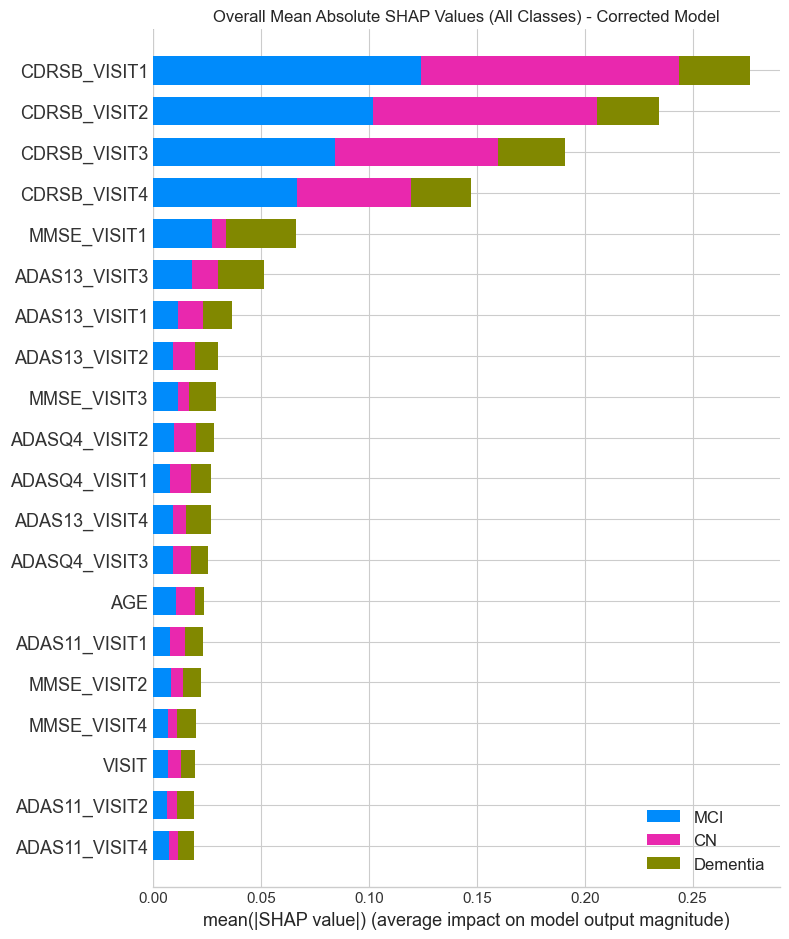


Generating SHAP summary plot (beeswarm) for overall feature importance...


<Figure size 1000x800 with 0 Axes>

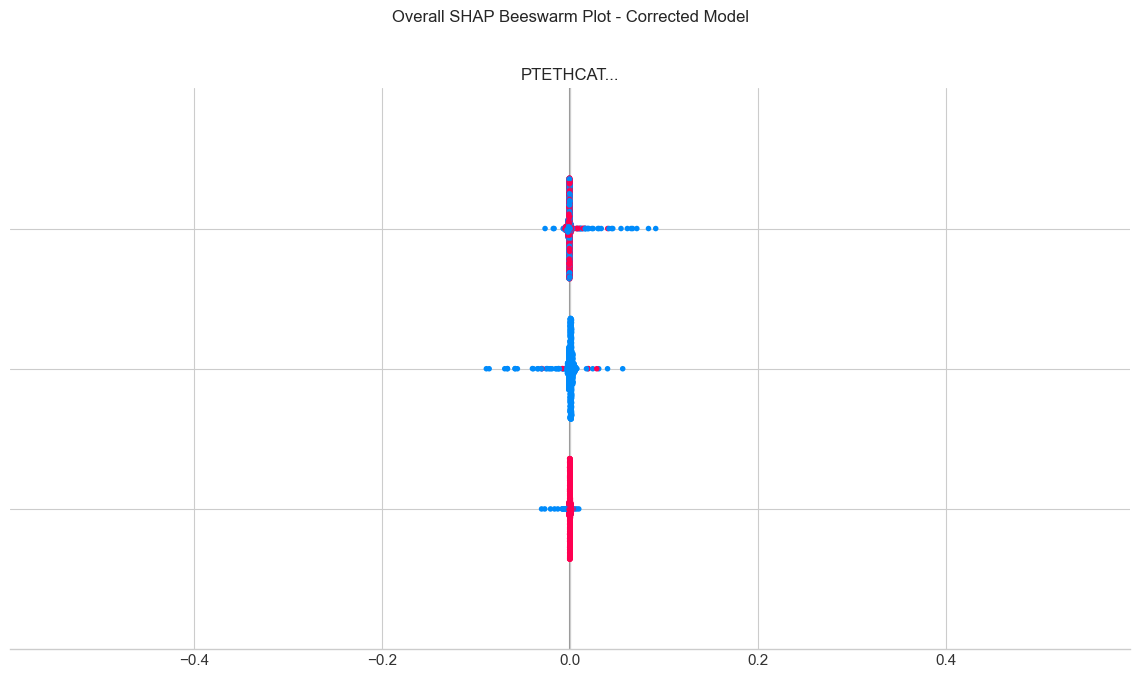


Generating class-specific SHAP summary plots...
SHAP values are not in the expected list-per-class format. Skipping class-specific plots.

SHAP analysis (Steps 1-5) for corrected model completed.
SHAP plots saved in 'models_corrected_training'.


In [ ]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Only for reconstructing the split
from collections import defaultdict
import os

# Ensure plots are displayed
# %matplotlib inline # Uncomment if in Jupyter
plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. Configuration & Paths ---
DATA_CSV_PATH = "DATA.csv" # The same DATA.csv used for training
MODEL_DIR_CORRECTED = "models_corrected_training" # Directory where corrected models are saved
BEST_MODEL_NAME_FROM_TRAINING = "RandomForest" # Change if another model was better
MODEL_FILENAME = f"{BEST_MODEL_NAME_FROM_TRAINING}_corrected.pkl"
PIPELINE_FILENAME = "preprocessing_pipeline_corrected.pkl"
LABEL_ENCODER_FILENAME = "label_encoder_corrected.pkl"
MAX_VISITS_SHAP = 4 # Must match training

model_path = os.path.join(MODEL_DIR_CORRECTED, MODEL_FILENAME)
pipeline_path = os.path.join(MODEL_DIR_CORRECTED, PIPELINE_FILENAME)
label_encoder_path = os.path.join(MODEL_DIR_CORRECTED, LABEL_ENCODER_FILENAME)

# --- 1. Load Trained Model, Preprocessing Pipeline, and Label Encoder ---
print(f"Loading corrected model ('{MODEL_FILENAME}'), pipeline, and label encoder from '{MODEL_DIR_CORRECTED}'...")
try:
    model = joblib.load(model_path)
    preprocessing_pipeline = joblib.load(pipeline_path)
    le = joblib.load(label_encoder_path)
    class_names = le.classes_
    print("Successfully loaded corrected model, pipeline, and label encoder.")
except FileNotFoundError as e:
    print(f"Error: Could not find one or more required files in '{MODEL_DIR_CORRECTED}': {e}")
    print(f"Please ensure the corrected training script was run successfully and files were saved to '{MODEL_DIR_CORRECTED}'.")
    exit()

# --- 2. Reconstruct X_train_raw, X_test_raw (to match corrected training) ---
print("\nReconstructing data splits (X_train_raw, X_test_raw) to match corrected training...")
df = pd.read_csv(DATA_CSV_PATH)

# Define feature groups EXACTLY as in the corrected training script
cognitive_scores_bases = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
demographic_cols = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_static_cols = ['PTEDUCAT', 'AGE', 'APOE4'] # APOE4 is static
all_static_cols_defined_shap = demographic_cols + rurality_cols + other_static_cols


# LOCF for Visit-Specific Cognitive Scores (identical to corrected training script)
vars_for_locf_shap = cognitive_scores_bases
visit_specific_columns_for_locf_shap = []
for var_base in vars_for_locf_shap:
    for v_num in range(1, MAX_VISITS_SHAP + 1):
        col_name = f"{var_base}_VISIT{v_num}"
        if col_name in df.columns:
            visit_specific_columns_for_locf_shap.append(col_name)

grouped_locf_vars_shap = defaultdict(list)
for col in visit_specific_columns_for_locf_shap:
    base_name = col.split("_VISIT")[0]
    grouped_locf_vars_shap[base_name].append(col)

for base_name, visit_cols_list in grouped_locf_vars_shap.items():
    sorted_visit_cols = sorted(visit_cols_list, key=lambda x: int(x.split("VISIT")[1]))
    if sorted_visit_cols:
        df[sorted_visit_cols] = df[sorted_visit_cols].ffill(axis=1)

# Build dataset across visits (identical to corrected training script)
all_visit_data_list_recon = []
for visit_num in range(1, MAX_VISITS_SHAP + 1):
    target_col_name = f"DX_VISIT{visit_num}"
    if target_col_name not in df.columns:
        continue
    current_visit_cognitive_cols_shap = [f"{base}_VISIT{visit_num}" for base in cognitive_scores_bases
                                    if f"{base}_VISIT{visit_num}" in df.columns]
    current_static_predictors_shap = all_static_cols_defined_shap
    current_predictors_for_visit_shap = current_static_predictors_shap + current_visit_cognitive_cols_shap
    
    final_predictors_for_subset_shap = [col for col in current_predictors_for_visit_shap if col in df.columns]
    if not final_predictors_for_subset_shap: continue
    
    cols_for_this_visit_subset_shap = final_predictors_for_subset_shap + [target_col_name]
    visit_subset_df_shap = df[cols_for_this_visit_subset_shap].copy()
    visit_subset_df_shap.dropna(subset=[target_col_name], inplace=True)
    if visit_subset_df_shap.empty: continue
        
    visit_subset_df_shap.rename(columns={target_col_name: 'DX'}, inplace=True)
    visit_subset_df_shap['VISIT'] = visit_num # Add 'VISIT' as a feature
    all_visit_data_list_recon.append(visit_subset_df_shap)

if not all_visit_data_list_recon:
    raise ValueError("SHAP Reconstruction: No data collected. Check DATA.csv and feature defs.")

combined_df_reconstructed = pd.concat(all_visit_data_list_recon, axis=0, ignore_index=True)

X_raw_reconstructed = combined_df_reconstructed.drop(columns=['DX'])
y_raw_series_reconstructed = combined_df_reconstructed['DX'].astype(str)

y_reconstructed = le.transform(y_raw_series_reconstructed) # Use loaded 'le'

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw_reconstructed, y_reconstructed,
    stratify=y_reconstructed,
    test_size=0.2,
    random_state=42
)

feature_names_for_shap = list(X_train_raw.columns) # These are the names the pipeline expects

print(f"SHAP: Reconstructed X_train_raw shape: {X_train_raw.shape}, X_test_raw shape: {X_test_raw.shape}")
print(f"SHAP: Features for SHAP (should match training): {feature_names_for_shap}")
if 'VISIT' not in feature_names_for_shap or 'APOE4' not in feature_names_for_shap:
    print("SHAP WARNING: 'VISIT' or 'APOE4' might be missing from reconstructed features. Double check definitions.")

# --- 3. Transform Data using Loaded (Corrected) Pipeline ---
print("\nTransforming X_train_raw and X_test_raw using the loaded corrected pipeline...")
X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_for_shap)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_for_shap)

print(f"SHAP: Processed X_train_df shape: {X_train_processed_df.shape}")
print(f"SHAP: Processed X_test_df shape: {X_test_processed_df.shape}")

# --- 4. Initialize SHAP Explainer and Calculate SHAP values ---
# In Part 2 (SHAP Analysis Script)
# ... inside section 4. Initialize SHAP Explainer ...
# ... (previous parts of SHAP script are the same) ...
# ... (previous parts of SHAP script are the same) ...

# --- 4. Initialize SHAP Explainer and Calculate SHAP values ---
print("\nInitializing SHAP Explainer...")
masker_shap = shap.maskers.Independent(X_train_processed_df, max_samples=100) # Use X_train_processed_df as background
explainer = shap.TreeExplainer(model, masker_shap)

print("Calculating SHAP values for X_test_processed_df... (This may take a moment)")
# Original line: shap_values = explainer.shap_values(X_test_processed_df)
shap_values = explainer.shap_values(X_test_processed_df, check_additivity=False) # <<< MODIFIED HERE

# Check if shap_values were computed correctly
if isinstance(shap_values, list):
    print(f"SHAP values calculated (check_additivity=False). Number of classes: {len(shap_values)}")
    if len(shap_values) > 0 and shap_values[0] is not None:
        print(f"Shape of SHAP values for the first class: {shap_values[0].shape}")
    elif len(shap_values) == 0 or shap_values[0] is None:
        print("Warning: SHAP values list is empty or contains None for the first class.")
elif shap_values is not None:
    print(f"SHAP values calculated (check_additivity=False). Shape: {shap_values.shape}")
    if hasattr(model, 'n_classes_') and model.n_classes_ > 2:
         print("Warning: Expected a list of SHAP values for multi-class, but got a single array.")
else:
    print("Error: SHAP values calculation returned None.")
    # You might want to exit or handle this more gracefully
    exit()


# --- 5. Overall and Class-Specific SHAP Plots ---
# ... (rest of the script remains the same) ...


# --- 5. Overall and Class-Specific SHAP Plots ---
print("\nGenerating SHAP summary plot (bar) for overall feature importance...")
plt.figure(figsize=(10, 8)) # Adjust figure size as needed
shap.summary_plot(shap_values, X_test_processed_df, plot_type="bar", class_names=class_names, show=False)
plt.title("Overall Mean Absolute SHAP Values (All Classes) - Corrected Model")
plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR_CORRECTED, "shap_summary_bar_overall_corrected.png"))
plt.show()

print("\nGenerating SHAP summary plot (beeswarm) for overall feature importance...")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_processed_df, class_names=class_names, show=False)
plt.suptitle("Overall SHAP Beeswarm Plot - Corrected Model", y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR_CORRECTED, "shap_summary_beeswarm_overall_corrected.png"))
plt.show()

print("\nGenerating class-specific SHAP summary plots...")
if isinstance(shap_values, list) and len(shap_values) == len(class_names):
    for i, class_name_str in enumerate(class_names):
        print(f"--- SHAP Analysis for Class: {class_name_str} (Target Index: {i}) - Corrected Model ---")

        plt.figure(figsize=(10, 8)) # Bar plot
        shap.summary_plot(shap_values[i], X_test_processed_df, plot_type="bar", show=False)
        plt.title(f"Mean Abs SHAP Values for Class: {class_name_str} - Corrected Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_CORRECTED, f"shap_summary_bar_class_{class_name_str}_corrected.png"))
        plt.show()

        plt.figure(figsize=(10, 8)) # Beeswarm plot
        shap.summary_plot(shap_values[i], X_test_processed_df, show=False)
        plt.title(f"Beeswarm SHAP Plot for Class: {class_name_str} - Corrected Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_CORRECTED, f"shap_summary_beeswarm_class_{class_name_str}_corrected.png"))
        plt.show()
else:
    print("SHAP values are not in the expected list-per-class format. Skipping class-specific plots.")

print("\nSHAP analysis (Steps 1-5) for corrected model completed.")
print(f"SHAP plots saved in '{MODEL_DIR_CORRECTED}'.")

Loading corrected model ('RandomForest_corrected.pkl'), pipeline, and label encoder from 'models_corrected_training'...
Successfully loaded corrected model, pipeline, and label encoder.

Reconstructing data splits (X_train_raw, X_test_raw) to match corrected training...
SHAP: Reconstructed X_train_raw shape: (5709, 40), X_test_raw shape: (1428, 40)
SHAP: Features for SHAP (should match training): ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN', 'PTEDUCAT', 'AGE', 'APOE4', 'CDRSB_VISIT1', 'ADAS11_VISIT1', 'ADAS13_VISIT1', 'ADASQ4_VISIT1', 'MMSE_VISIT1', 'VISIT', 'CDRSB_VISIT2', 'ADAS11_VISIT2', 'ADAS13_VISIT2', 'ADASQ4_VISIT2', 'MMSE_VISIT2', 'CDRSB_VISIT3', 'ADAS11_VISIT3', 'ADAS13_VISIT3', 'ADASQ4_VISIT3', 'MMSE_VISI

100%|===================| 4275/4284 [06:34<00:00]        

SHAP values are a 3D NumPy array with shape: (1428, 40, 3)

Generating SHAP summary plot (bar, stacked by class) for overall feature importance...


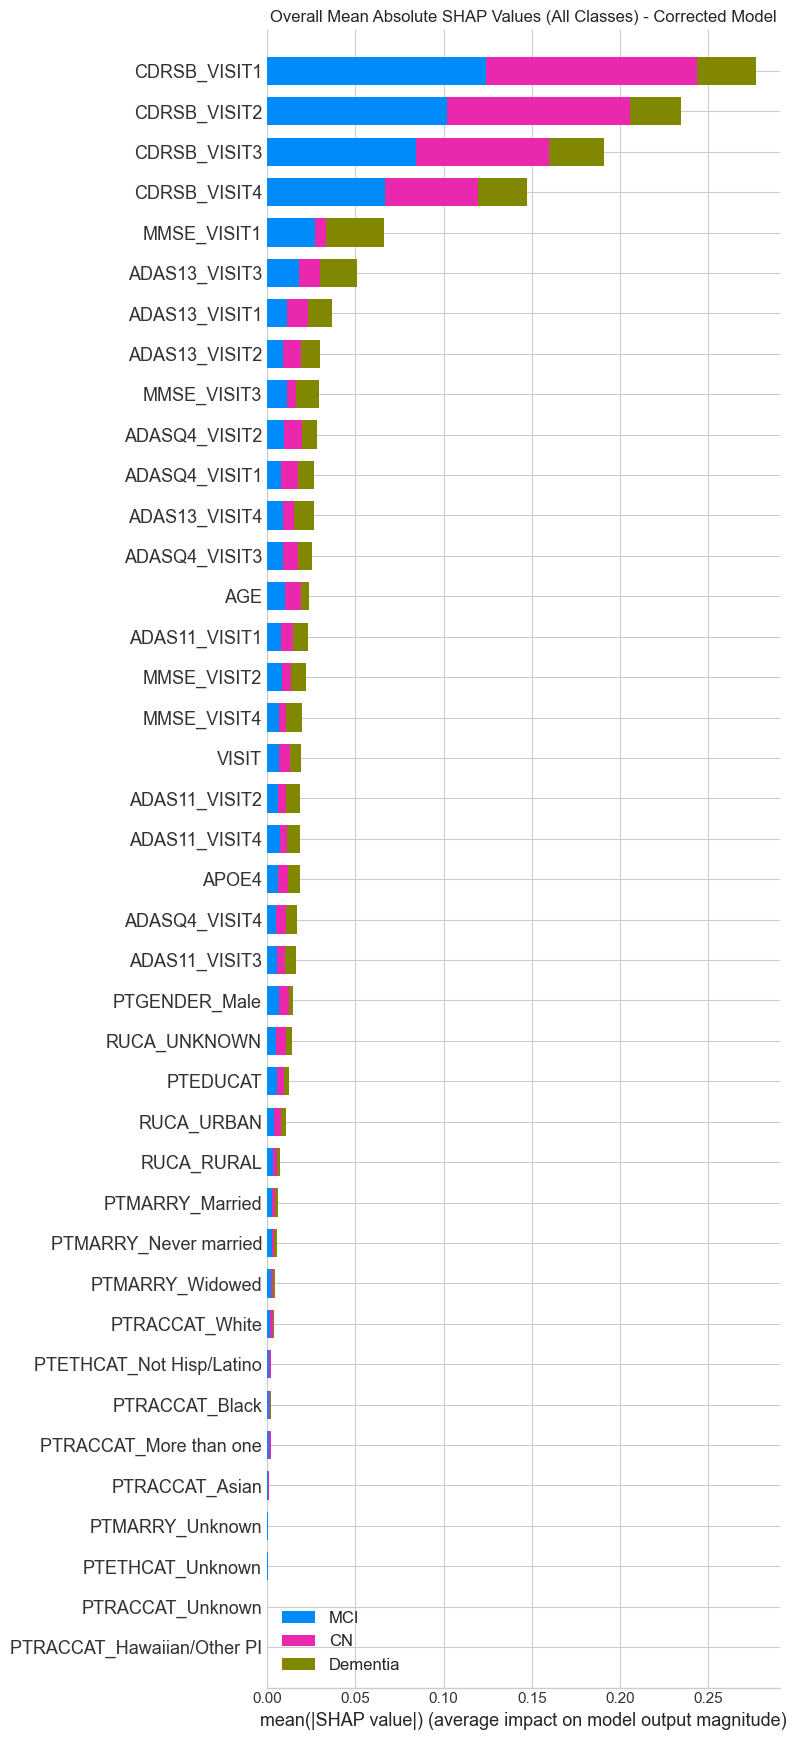


Generating SHAP summary plot (beeswarm) for overall feature importance...


<Figure size 1200x1400 with 0 Axes>

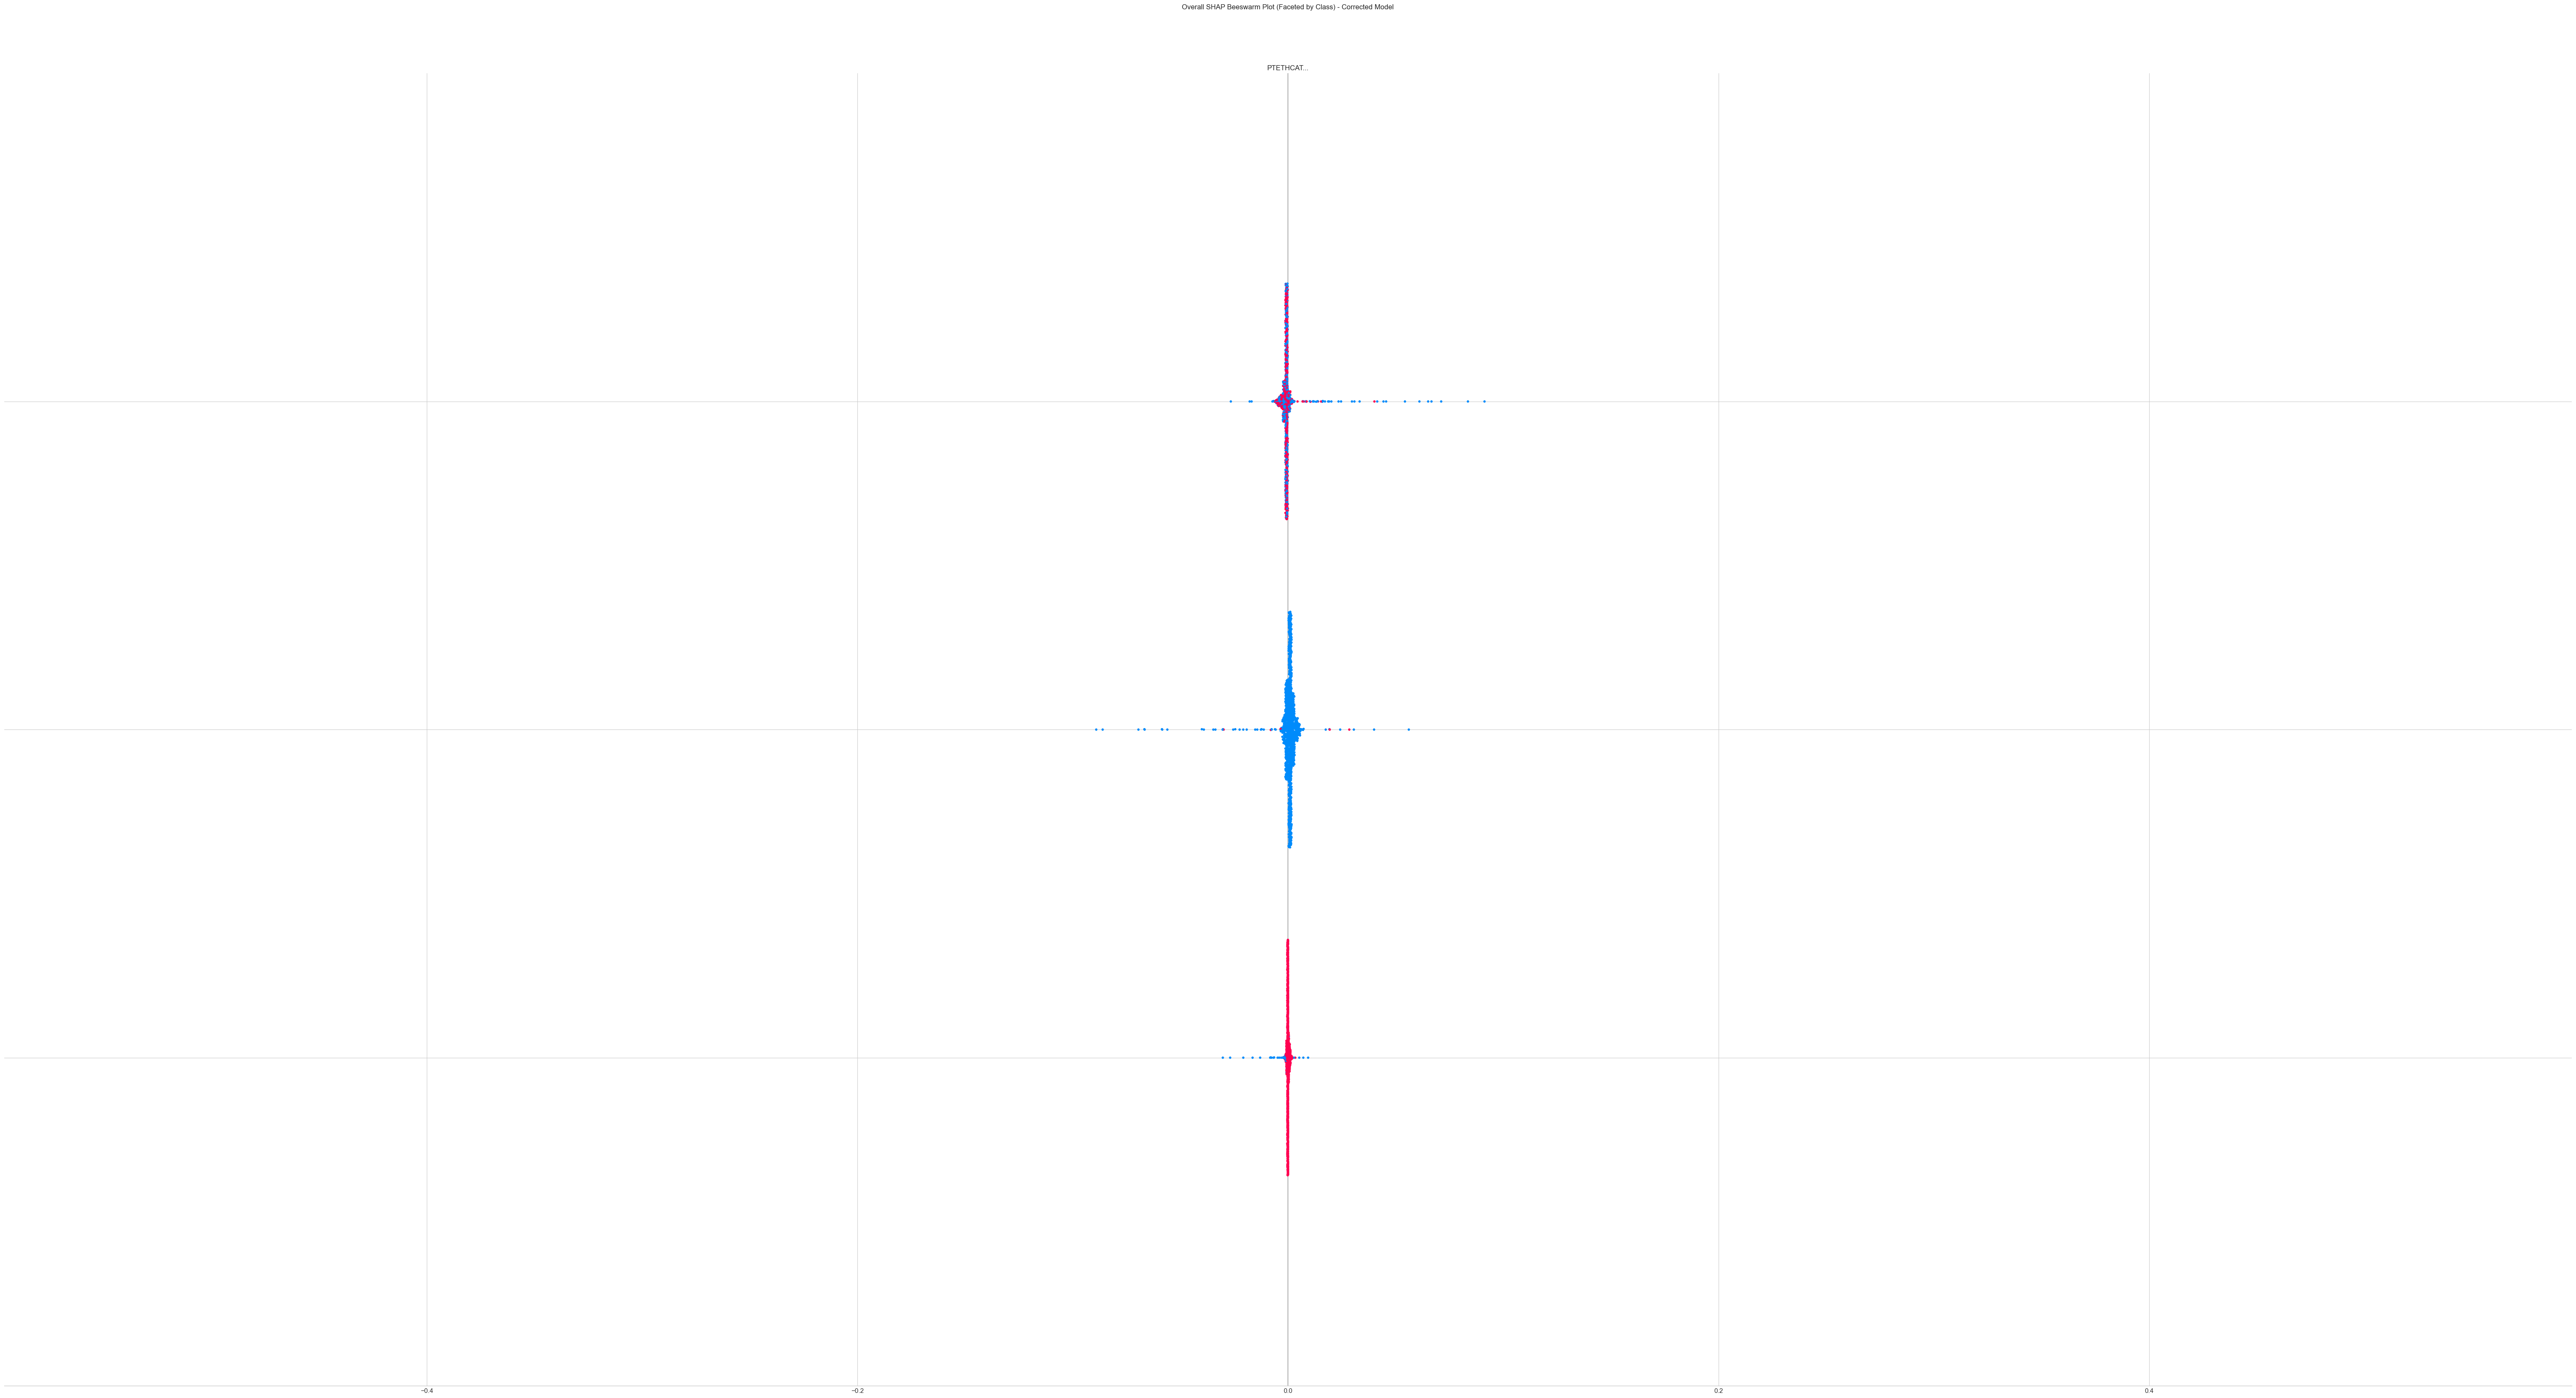


Generating class-specific SHAP summary plots...
--- SHAP Analysis for Class: CN (Target Index: 0) ---


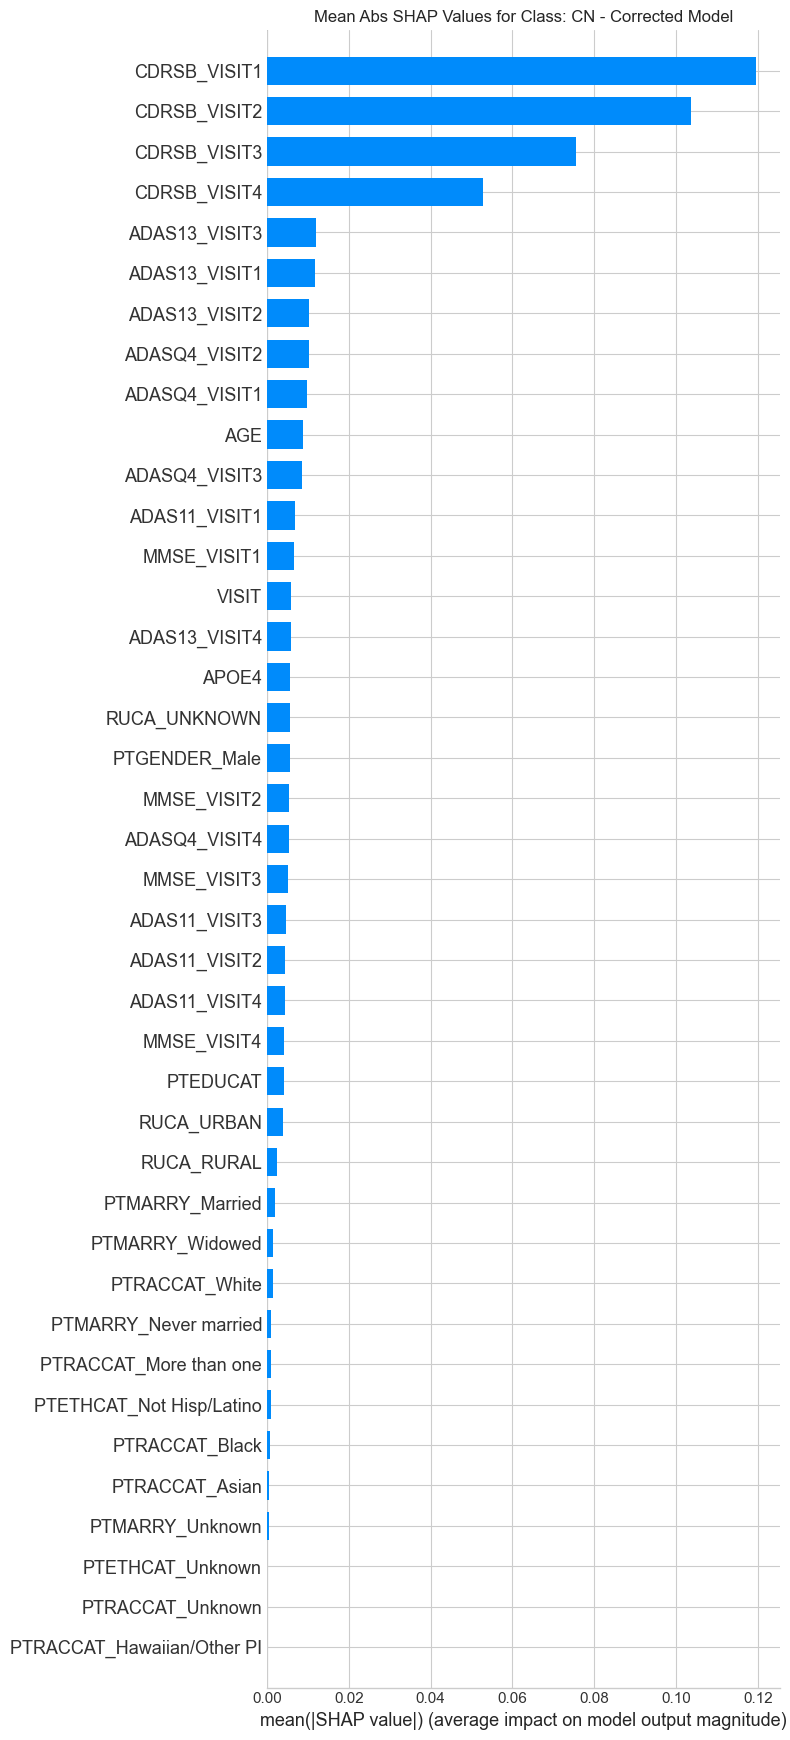

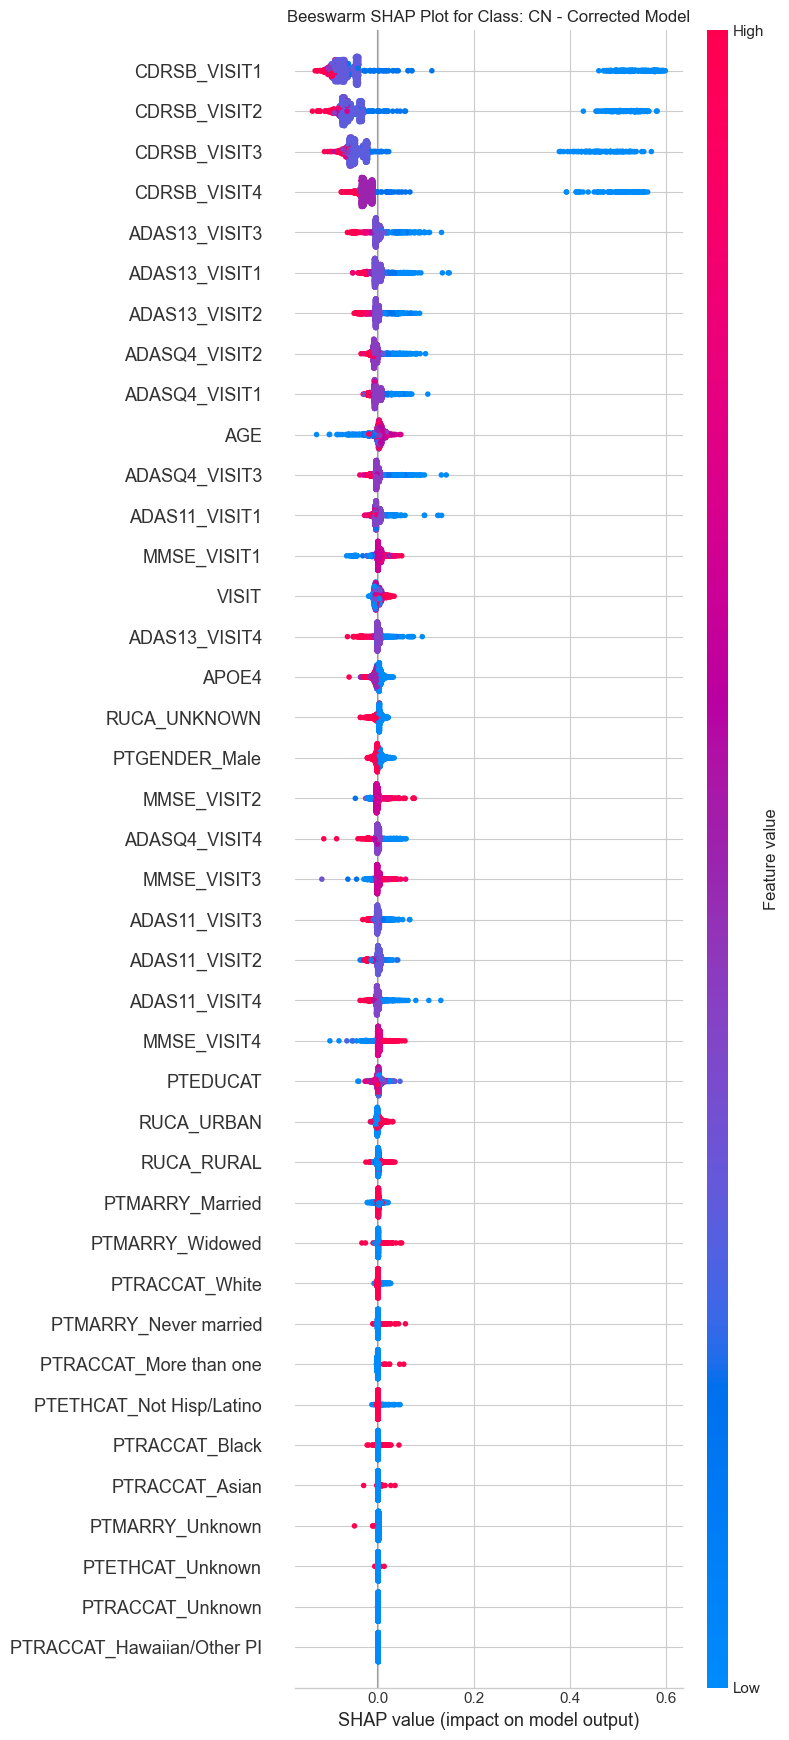

--- SHAP Analysis for Class: Dementia (Target Index: 1) ---


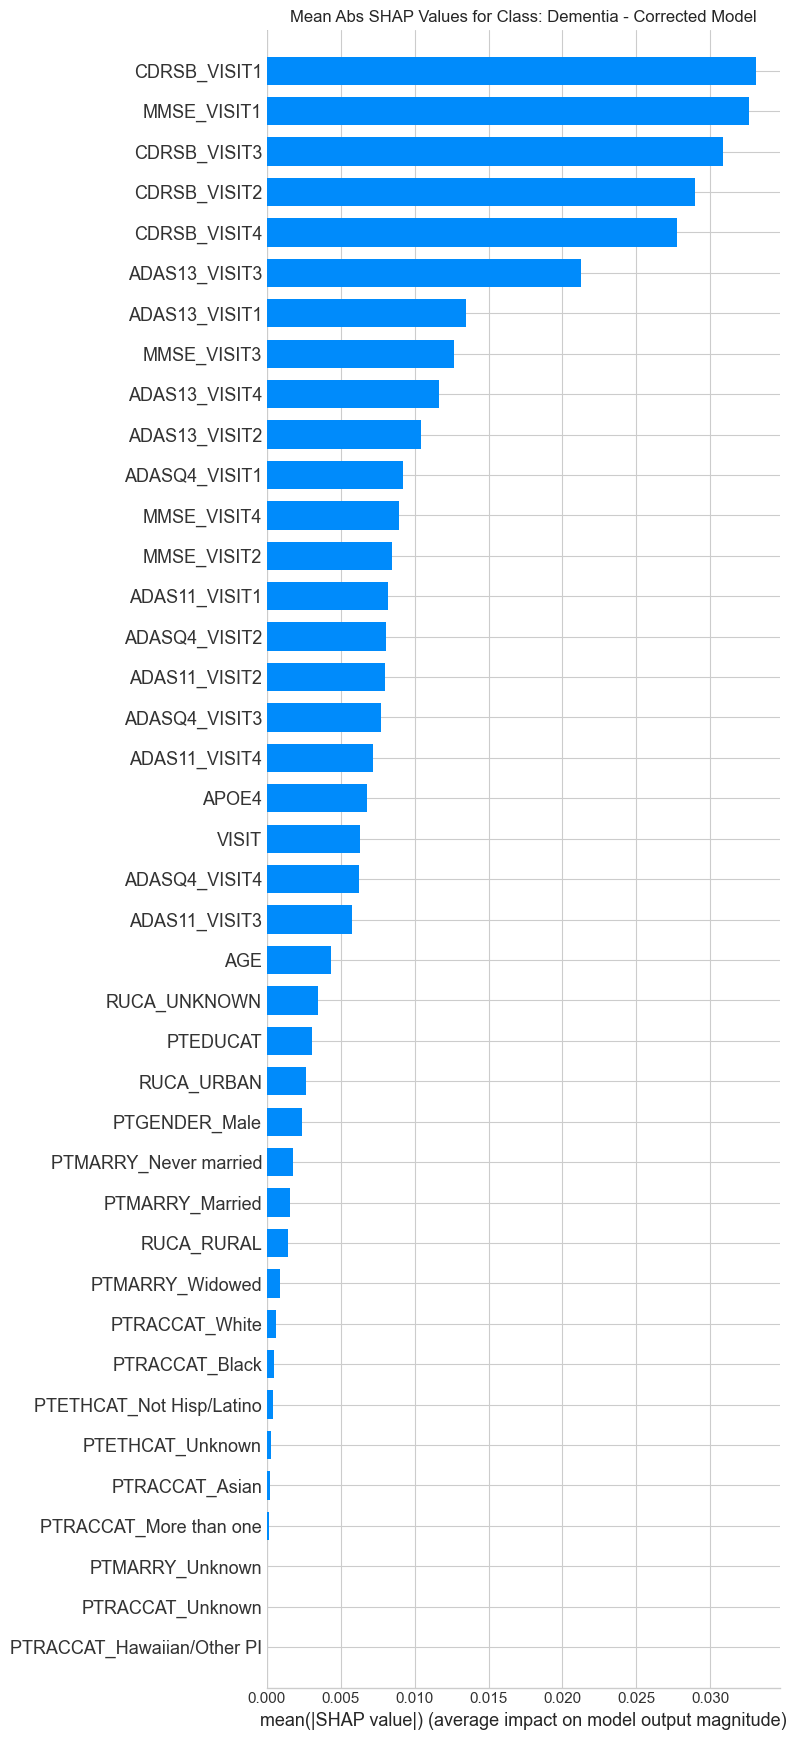

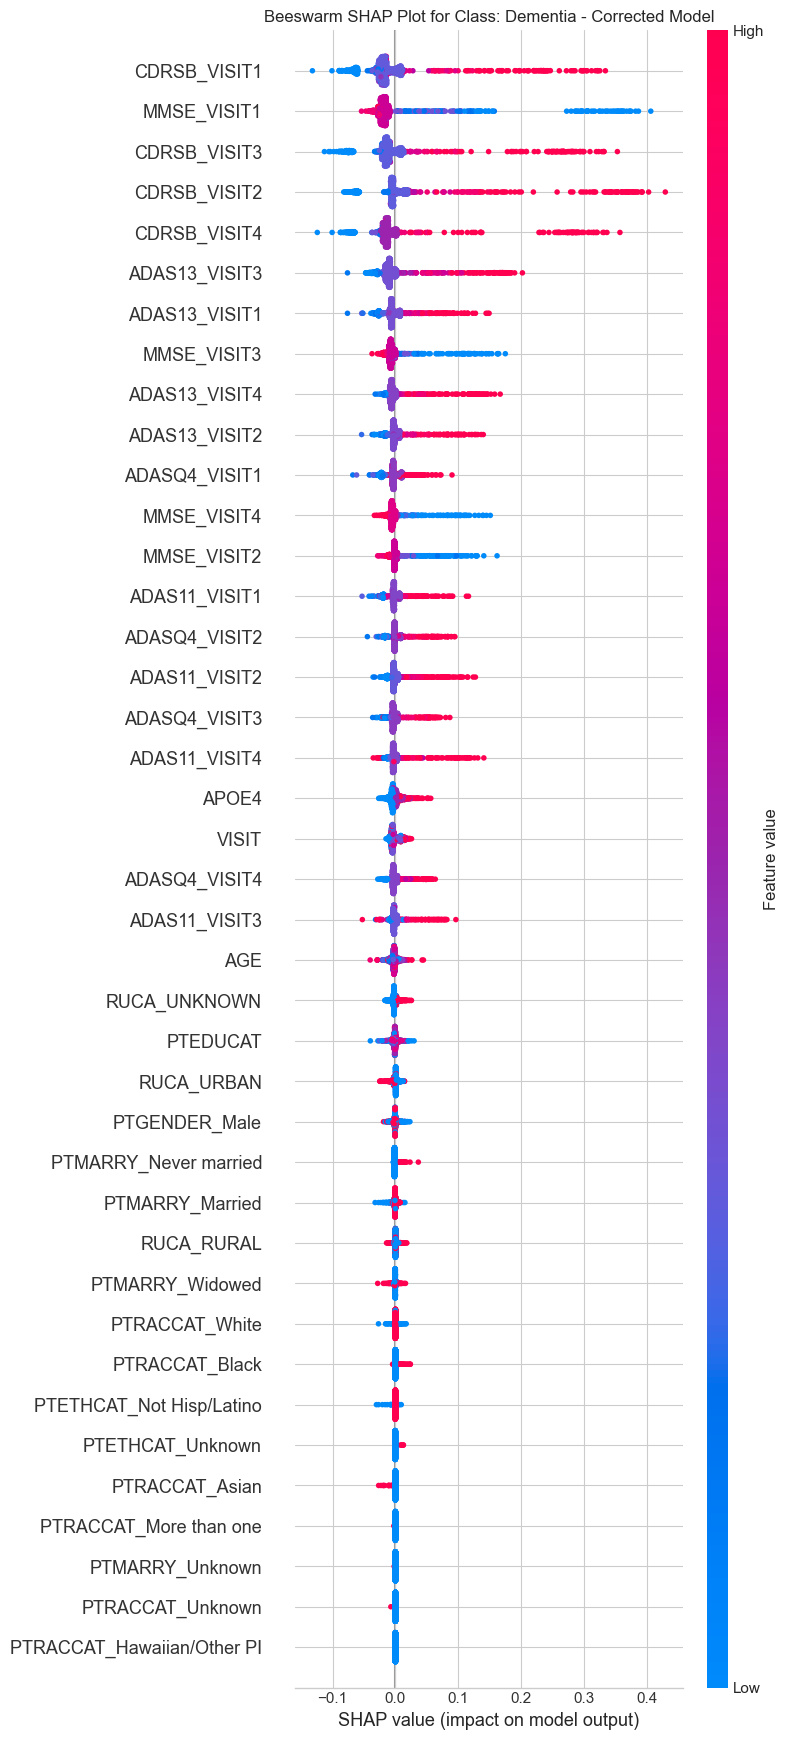

--- SHAP Analysis for Class: MCI (Target Index: 2) ---


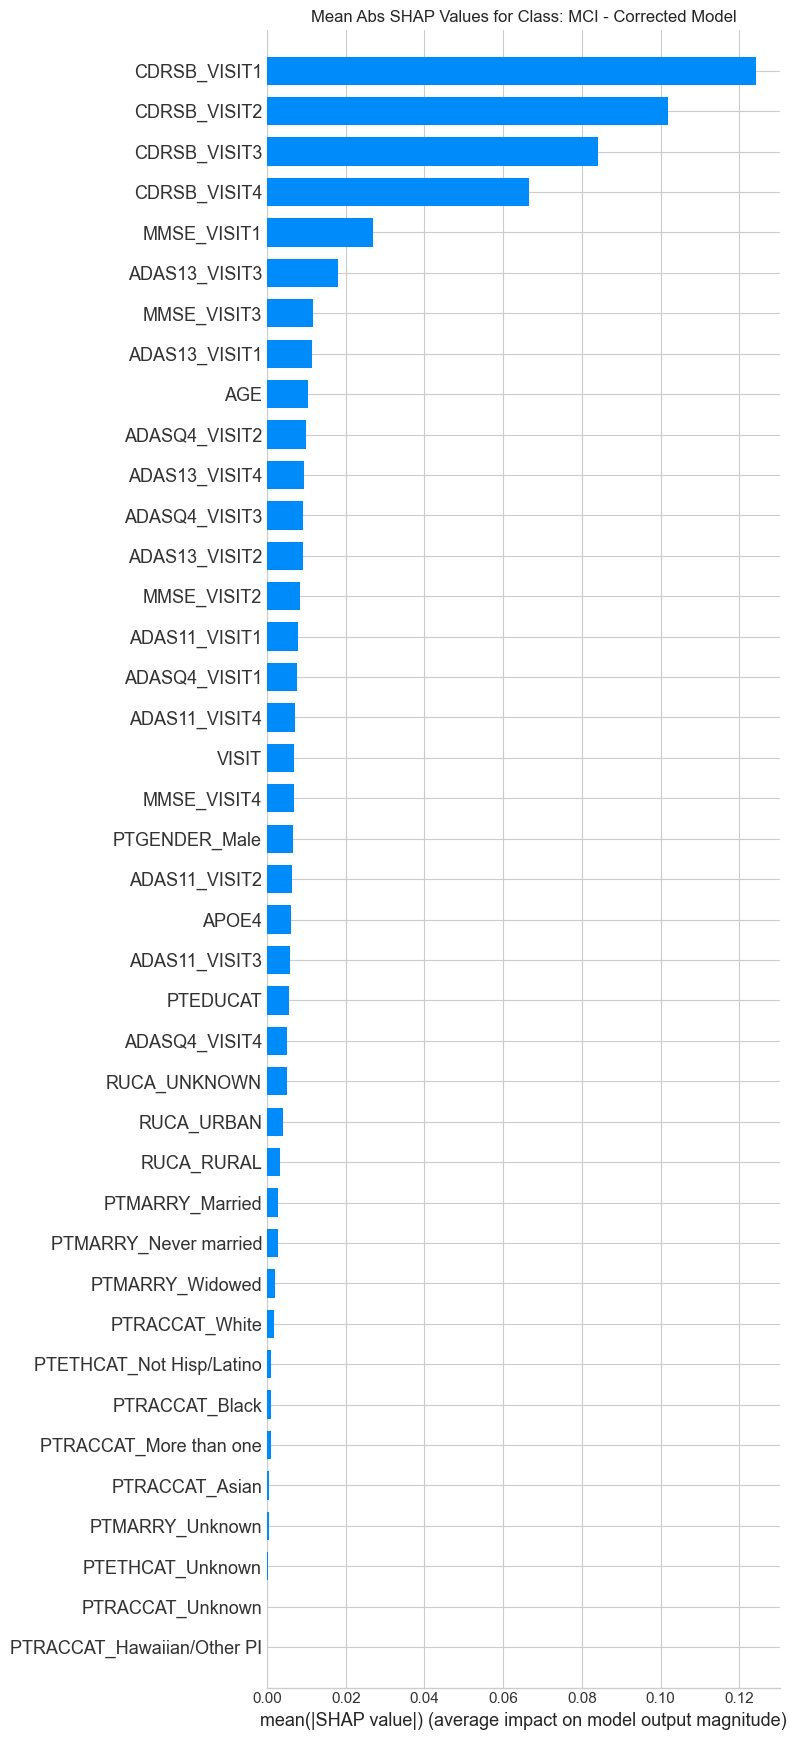

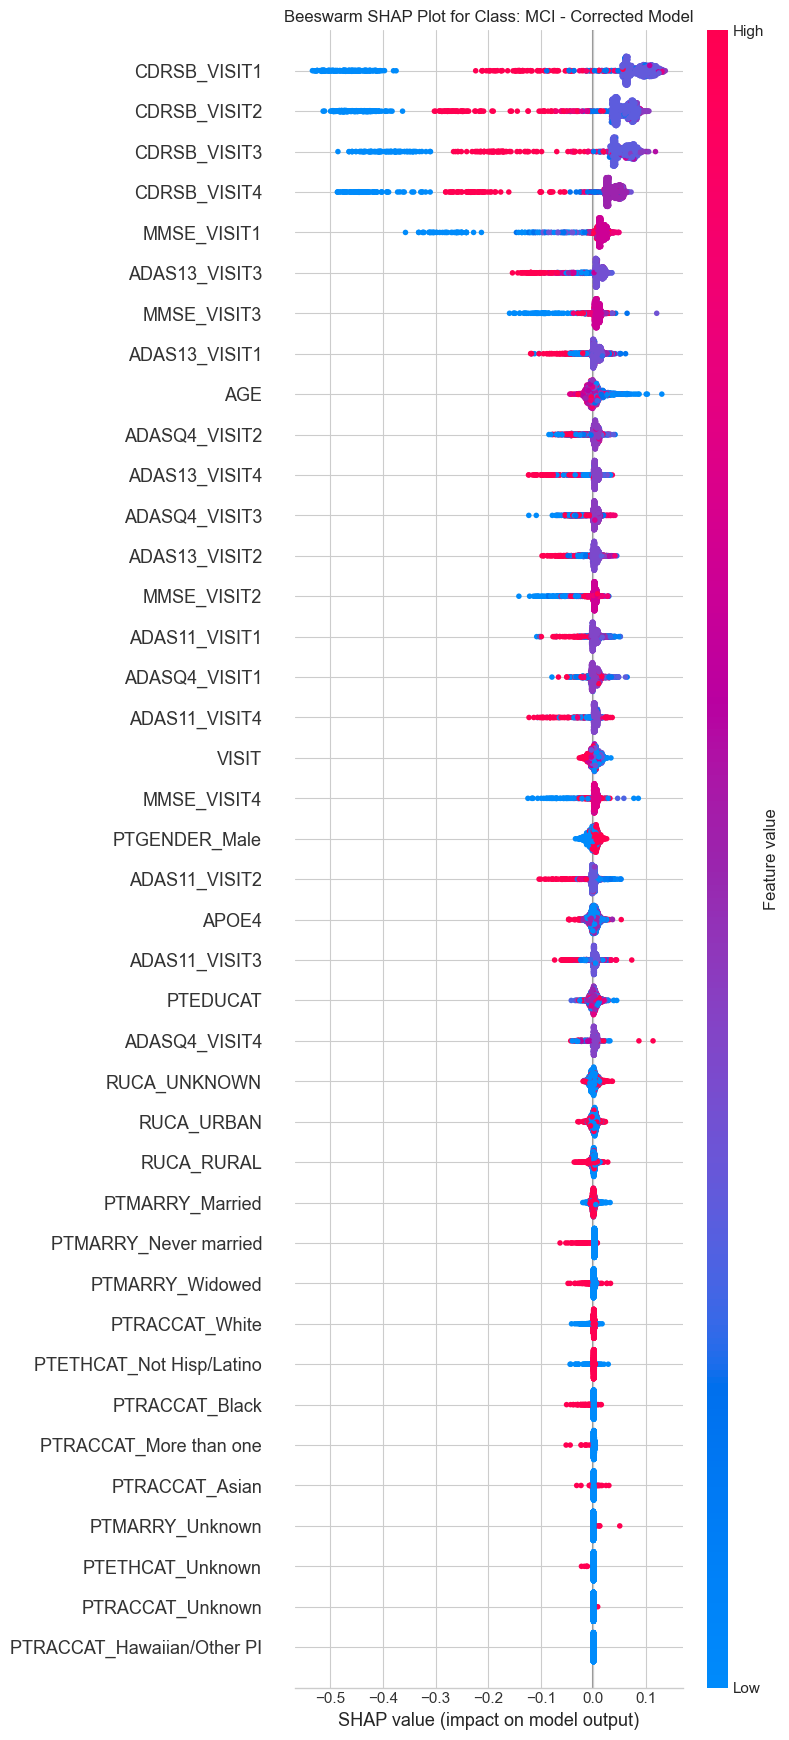


Generating NET Mean SHAP Bar Plot for Class: Dementia


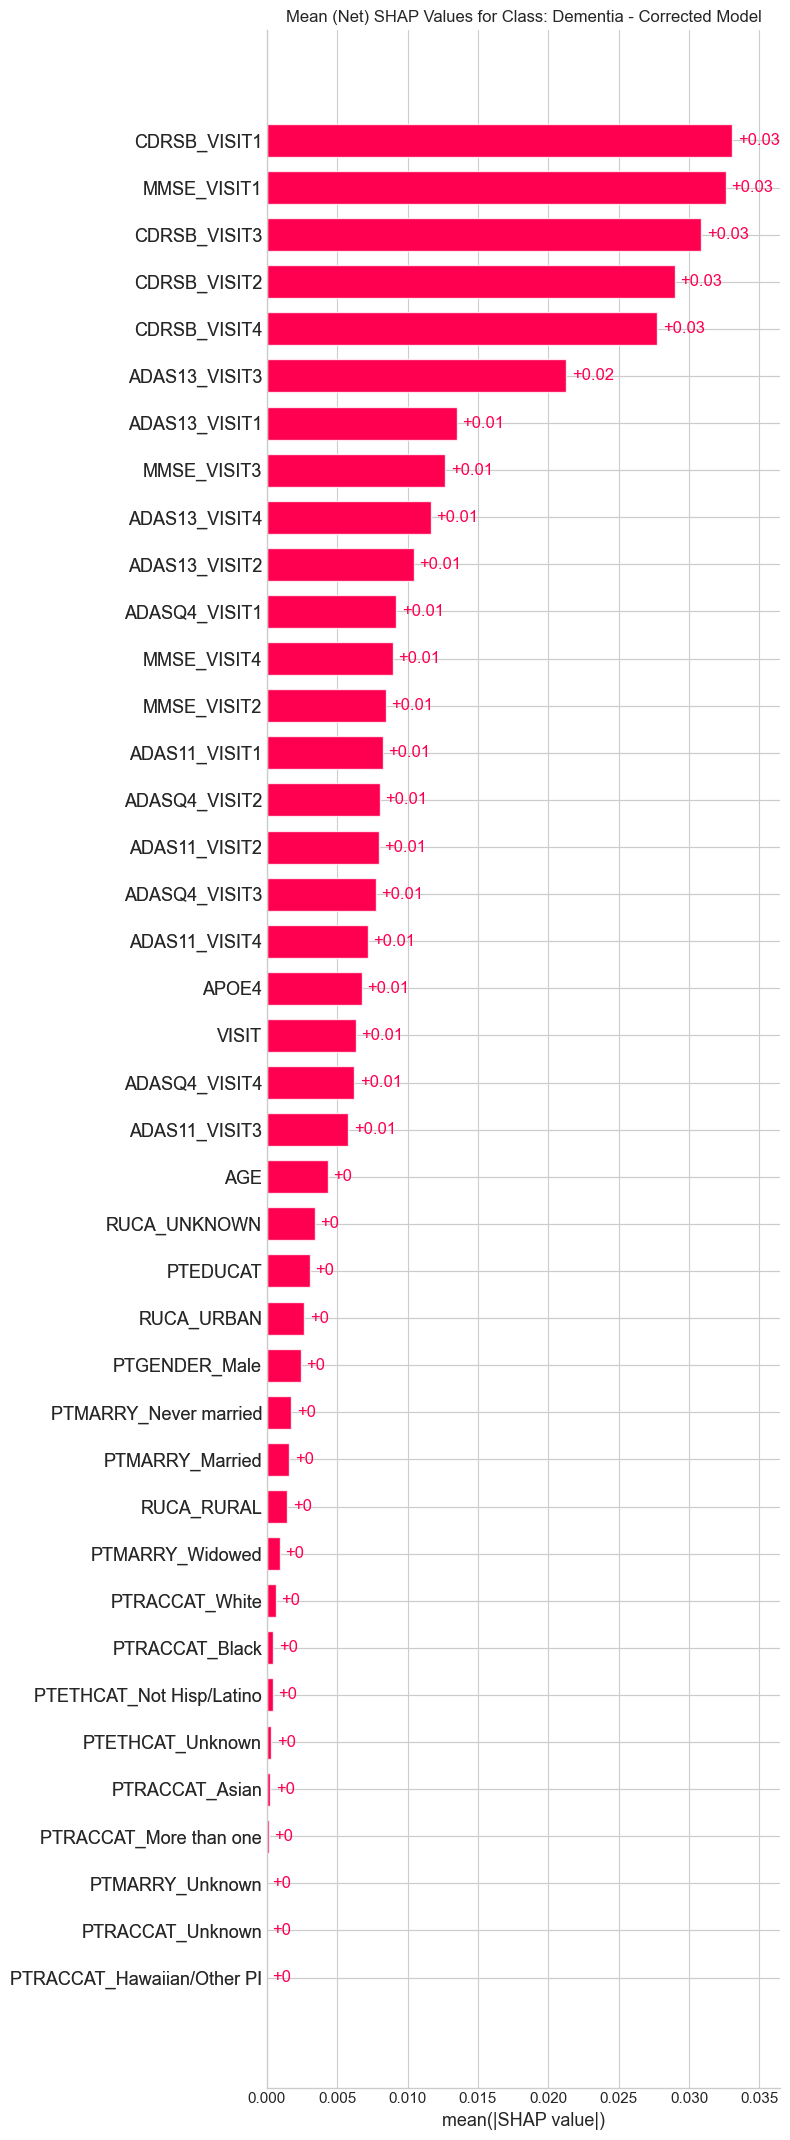


SHAP analysis and plotting enhancements completed.
SHAP plots saved in 'models_corrected_training'.


In [5]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Only for reconstructing the split
from collections import defaultdict
import os

# Ensure plots are displayed
# %matplotlib inline # Uncomment if in Jupyter
plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. Configuration & Paths ---
DATA_CSV_PATH = "DATA.csv"
MODEL_DIR_CORRECTED = "models_corrected_training"
BEST_MODEL_NAME_FROM_TRAINING = "RandomForest" # Change if another model was better
MODEL_FILENAME = f"{BEST_MODEL_NAME_FROM_TRAINING}_corrected.pkl"
PIPELINE_FILENAME = "preprocessing_pipeline_corrected.pkl"
LABEL_ENCODER_FILENAME = "label_encoder_corrected.pkl"
MAX_VISITS_SHAP = 4

model_path = os.path.join(MODEL_DIR_CORRECTED, MODEL_FILENAME)
pipeline_path = os.path.join(MODEL_DIR_CORRECTED, PIPELINE_FILENAME)
label_encoder_path = os.path.join(MODEL_DIR_CORRECTED, LABEL_ENCODER_FILENAME)

# --- 1. Load Trained Model, Preprocessing Pipeline, and Label Encoder ---
print(f"Loading corrected model ('{MODEL_FILENAME}'), pipeline, and label encoder from '{MODEL_DIR_CORRECTED}'...")
try:
    model = joblib.load(model_path)
    preprocessing_pipeline = joblib.load(pipeline_path)
    le = joblib.load(label_encoder_path)
    class_names = le.classes_
    print("Successfully loaded corrected model, pipeline, and label encoder.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Reconstruct X_train_raw, X_test_raw (to match corrected training) ---
# (This part remains largely the same as your working version from the previous step,
#  assuming it correctly reconstructed X_train_raw and X_test_raw that passed the feature name checks)
print("\nReconstructing data splits (X_train_raw, X_test_raw) to match corrected training...")
df = pd.read_csv(DATA_CSV_PATH)
cognitive_scores_bases = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
demographic_cols = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_static_cols = ['PTEDUCAT', 'AGE', 'APOE4']
all_static_cols_defined_shap = demographic_cols + rurality_cols + other_static_cols

vars_for_locf_shap = cognitive_scores_bases
# ... (LOCF code as before) ...
visit_specific_columns_for_locf_shap = []
for var_base in vars_for_locf_shap:
    for v_num in range(1, MAX_VISITS_SHAP + 1):
        col_name = f"{var_base}_VISIT{v_num}"
        if col_name in df.columns:
            visit_specific_columns_for_locf_shap.append(col_name)

grouped_locf_vars_shap = defaultdict(list)
for col in visit_specific_columns_for_locf_shap:
    base_name = col.split("_VISIT")[0]
    grouped_locf_vars_shap[base_name].append(col)

for base_name, visit_cols_list in grouped_locf_vars_shap.items():
    sorted_visit_cols = sorted(visit_cols_list, key=lambda x: int(x.split("VISIT")[1]))
    if sorted_visit_cols:
        df[sorted_visit_cols] = df[sorted_visit_cols].ffill(axis=1)

all_visit_data_list_recon = []
for visit_num in range(1, MAX_VISITS_SHAP + 1):
    target_col_name = f"DX_VISIT{visit_num}"
    if target_col_name not in df.columns: continue
    current_visit_cognitive_cols_shap = [f"{base}_VISIT{visit_num}" for base in cognitive_scores_bases
                                    if f"{base}_VISIT{visit_num}" in df.columns]
    current_static_predictors_shap = all_static_cols_defined_shap
    current_predictors_for_visit_shap = current_static_predictors_shap + current_visit_cognitive_cols_shap
    final_predictors_for_subset_shap = [col for col in current_predictors_for_visit_shap if col in df.columns]
    if not final_predictors_for_subset_shap: continue
    cols_for_this_visit_subset_shap = final_predictors_for_subset_shap + [target_col_name]
    visit_subset_df_shap = df[cols_for_this_visit_subset_shap].copy()
    visit_subset_df_shap.dropna(subset=[target_col_name], inplace=True)
    if visit_subset_df_shap.empty: continue
    visit_subset_df_shap.rename(columns={target_col_name: 'DX'}, inplace=True)
    visit_subset_df_shap['VISIT'] = visit_num
    all_visit_data_list_recon.append(visit_subset_df_shap)

if not all_visit_data_list_recon: raise ValueError("SHAP Recon: No data.")
combined_df_reconstructed = pd.concat(all_visit_data_list_recon, axis=0, ignore_index=True)
X_raw_reconstructed = combined_df_reconstructed.drop(columns=['DX'])
y_raw_series_reconstructed = combined_df_reconstructed['DX'].astype(str)
y_reconstructed = le.transform(y_raw_series_reconstructed)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw_reconstructed, y_reconstructed, stratify=y_reconstructed, test_size=0.2, random_state=42
)
feature_names_for_shap = list(X_train_raw.columns)
print(f"SHAP: Reconstructed X_train_raw shape: {X_train_raw.shape}, X_test_raw shape: {X_test_raw.shape}")
print(f"SHAP: Features for SHAP (should match training): {X_train_raw.columns.tolist()}") # Print all

# --- 3. Transform Data using Loaded (Corrected) Pipeline ---
print("\nTransforming X_train_raw and X_test_raw using the loaded corrected pipeline...")
X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_for_shap)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_for_shap)
print(f"SHAP: Processed X_train_df shape: {X_train_processed_df.shape}, X_test_df shape: {X_test_processed_df.shape}")

# --- 4. Initialize SHAP Explainer and Calculate SHAP values ---
print("\nInitializing SHAP Explainer...")
masker_shap = shap.maskers.Independent(X_train_processed_df, max_samples=100)
explainer = shap.TreeExplainer(model, masker_shap)
print("Calculating SHAP values for X_test_processed_df... (This may take a moment)")
shap_values_output = explainer.shap_values(X_test_processed_df, check_additivity=False)

# Determine if shap_values_output is a list of arrays or a 3D array
is_list_of_arrays = isinstance(shap_values_output, list)
is_3d_array = isinstance(shap_values_output, np.ndarray) and shap_values_output.ndim == 3

if is_list_of_arrays:
    print(f"SHAP values are a list of {len(shap_values_output)} arrays.")
    # Example: shape of SHAP values for the first class
    if len(shap_values_output) > 0: print(f"Shape for class 0: {shap_values_output[0].shape}")
elif is_3d_array:
    print(f"SHAP values are a 3D NumPy array with shape: {shap_values_output.shape}")
else:
    print(f"SHAP values are of an unexpected type: {type(shap_values_output)}. Exiting.")
    exit()

# --- 5. Overall and Class-Specific SHAP Plots ---

# Plot 1: Overall Mean Absolute SHAP Values (Stacked Bar)
# This plot type expects either a list of shap_values arrays or a 3D array.
print("\nGenerating SHAP summary plot (bar, stacked by class) for overall feature importance...")
plt.figure(figsize=(10, max(8, len(feature_names_for_shap) * 0.3))) # Dynamically adjust height
shap.summary_plot(shap_values_output, X_test_processed_df, plot_type="bar", class_names=class_names, show=False, max_display=len(feature_names_for_shap))
plt.title("Overall Mean Absolute SHAP Values (All Classes) - Corrected Model")
plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR_CORRECTED, "shap_summary_bar_overall_stacked_corrected.png"))
plt.show()

# Plot 2: Overall Beeswarm Plot
# This also handles list of arrays or 3D array for multi-class.
# It will create faceted plots (one per class) or overlay them if class_names is provided.
print("\nGenerating SHAP summary plot (beeswarm) for overall feature importance...")
plt.figure(figsize=(12, max(8, len(feature_names_for_shap) * 0.35))) # Dynamically adjust height, wider
shap.summary_plot(shap_values_output, X_test_processed_df, class_names=class_names, show=False, max_display=len(feature_names_for_shap))
plt.suptitle("Overall SHAP Beeswarm Plot (Faceted by Class) - Corrected Model", y=1.0) # Adjust y if title overlaps
plt.tight_layout(rect=[0, 0, 1, 0.97]) # rect to make space for suptitle
plt.savefig(os.path.join(MODEL_DIR_CORRECTED, "shap_summary_beeswarm_overall_faceted_corrected.png"))
plt.show()


# Plot 3 & 4: Class-Specific Plots (Mean Absolute Bar and Beeswarm for each class)
print("\nGenerating class-specific SHAP summary plots...")
num_classes = 0
if is_list_of_arrays:
    num_classes = len(shap_values_output)
elif is_3d_array:
    num_classes = shap_values_output.shape[2]

if num_classes == len(class_names):
    for i, class_name_str in enumerate(class_names):
        current_class_shap_values = None
        if is_list_of_arrays:
            current_class_shap_values = shap_values_output[i]
        elif is_3d_array:
            current_class_shap_values = shap_values_output[:, :, i] # Slicing for 3D array

        if current_class_shap_values is None:
            print(f"Could not retrieve SHAP values for class {class_name_str}. Skipping.")
            continue

        print(f"--- SHAP Analysis for Class: {class_name_str} (Target Index: {i}) ---")

        # Class-Specific Mean Absolute SHAP Bar Plot
        plt.figure(figsize=(10, max(8, len(feature_names_for_shap) * 0.3)))
        shap.summary_plot(current_class_shap_values, X_test_processed_df, plot_type="bar", show=False, max_display=len(feature_names_for_shap))
        plt.title(f"Mean Abs SHAP Values for Class: {class_name_str} - Corrected Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_CORRECTED, f"shap_summary_bar_class_{class_name_str}_corrected.png"))
        plt.show()

        # Class-Specific Beeswarm Plot
        plt.figure(figsize=(12, max(8, len(feature_names_for_shap) * 0.35)))
        shap.summary_plot(current_class_shap_values, X_test_processed_df, show=False, max_display=len(feature_names_for_shap))
        # Beeswarm plots color points by feature value by default. X_test_processed_df provides these values.
        plt.title(f"Beeswarm SHAP Plot for Class: {class_name_str} - Corrected Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_CORRECTED, f"shap_summary_beeswarm_class_{class_name_str}_corrected.png"))
        plt.show()
else:
    print("Number of SHAP value sets does not match number of classes. Skipping class-specific plots.")

# Plot 5: Bar plot showing NET contribution (positive/negative) for a specific class
# This requires calculating mean SHAP values (not absolute)
# Let's pick one class, e.g., the first class (CN if that's index 0) or 'AD'
class_to_analyze_net = 'Dementia' # Or 'CN' or 'MCI' - MUST be one of your le.classes_
try:
    class_index_for_net = list(class_names).index(class_to_analyze_net)
    
    net_shap_values_for_class = None
    if is_list_of_arrays:
        net_shap_values_for_class = shap_values_output[class_index_for_net]
    elif is_3d_array:
        net_shap_values_for_class = shap_values_output[:, :, class_index_for_net]

    if net_shap_values_for_class is not None:
        # Create a SHAP Explanation object for the specific class to use shap.plots.bar
        # The Explanation object bundles values, base_values, data, and feature_names
        # We need the base value for this specific class output
        # explainer.expected_value is usually an array of base values, one per class
        base_value_for_class = explainer.expected_value[class_index_for_net] if hasattr(explainer, 'expected_value') and explainer.expected_value is not None and len(explainer.expected_value) > class_index_for_net else 0

        # Creating an Explanation object for the specific class
        # SHAP `Explanation` objects are preferred for newer `shap.plots.*` functions
        shap_explanation_for_class = shap.Explanation(
            values=net_shap_values_for_class,
            base_values=np.full(net_shap_values_for_class.shape[0], base_value_for_class), # Needs to be array of same length as samples
            data=X_test_processed_df.values, # Pass underlying numpy array
            feature_names=feature_names_for_shap
        )
        
        print(f"\nGenerating NET Mean SHAP Bar Plot for Class: {class_to_analyze_net}")
        plt.figure(figsize=(10, max(8, len(feature_names_for_shap) * 0.3)))
        shap.plots.bar(shap_explanation_for_class, show=False, max_display=len(feature_names_for_shap)) # This plots mean SHAP directly (not absolute)
        plt.title(f"Mean (Net) SHAP Values for Class: {class_to_analyze_net} - Corrected Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_CORRECTED, f"shap_net_bar_class_{class_to_analyze_net}_corrected.png"))
        plt.show()

except ValueError:
    print(f"Class '{class_to_analyze_net}' not found in class_names: {class_names}. Skipping net contribution plot.")
except Exception as e:
    print(f"Error generating net contribution plot for {class_to_analyze_net}: {e}")


print("\nSHAP analysis and plotting enhancements completed.")
print(f"SHAP plots saved in '{MODEL_DIR_CORRECTED}'.")

In [6]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

# --- 0. Configuration ---
DATA_CSV_PATH = "DATA.csv"
# Save to a new directory for models trained without cognitive scores
MODEL_OUTPUT_DIR_NO_COG = "models_no_cognitive"
os.makedirs(MODEL_OUTPUT_DIR_NO_COG, exist_ok=True)
MAX_VISITS = 4

# --- 1. Load Data ---
print(f"Loading data from {DATA_CSV_PATH}...")
df = pd.read_csv(DATA_CSV_PATH)
print(f"Data loaded. Shape: {df.shape}")

# --- 2. Define Feature Groups (EXCLUDING COGNITIVE SCORES) ---
# Cognitive scores are NOT included in features for this run.
# cognitive_scores_bases = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE'] # COMMENTED OUT

# Static features (demographics, rurality, education, age, APOE4)
demographic_cols = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_static_cols = ['PTEDUCAT', 'AGE', 'APOE4'] # PTEDUCAT, AGE, APOE4

all_static_cols_defined = demographic_cols + rurality_cols + other_static_cols
missing_static_cols = [col for col in all_static_cols_defined if col not in df.columns]
if missing_static_cols:
    print(f"ERROR: Static columns not found in DATA.csv: {missing_static_cols}")
    exit()

# --- 3. LOCF (Not needed here as cognitive scores are excluded) ---
# The original LOCF was for visit-specific cognitive scores. Since we're excluding them,
# this step is not strictly necessary for the features we are using.
# If you had other visit-specific biomarkers (not cognitive) that needed LOCF, you'd do it here.
print("\nLOCF step skipped as cognitive scores are excluded from features.")

# --- 4. Build Dataset for Modeling (Combining Visits) ---
print("\nBuilding combined dataset across visits (without cognitive scores)...")
all_visit_data_list = []

for visit_num in range(1, MAX_VISITS + 1):
    target_col_name = f"DX_VISIT{visit_num}"
    if target_col_name not in df.columns:
        continue

    # Features for this run are ONLY the static ones + VISIT number
    current_predictors_for_visit = all_static_cols_defined # No cognitive_VISITx columns
    
    final_predictors_for_subset = [col for col in current_predictors_for_visit if col in df.columns]
    if not final_predictors_for_subset:
        continue # Should not happen if static cols were verified

    cols_for_this_visit_subset = final_predictors_for_subset + [target_col_name]
    visit_subset_df = df[cols_for_this_visit_subset].copy()
    
    visit_subset_df.dropna(subset=[target_col_name], inplace=True)
    if visit_subset_df.empty:
        continue
        
    visit_subset_df.rename(columns={target_col_name: 'DX'}, inplace=True)
    visit_subset_df['VISIT'] = visit_num # Add 'VISIT' number as a feature
    
    all_visit_data_list.append(visit_subset_df)

if not all_visit_data_list:
    raise ValueError("No data collected across visits (NO COG). Check column names and definitions.")

combined_df = pd.concat(all_visit_data_list, axis=0, ignore_index=True)
print(f"Combined dataset (NO COG) created. Shape: {combined_df.shape}")

# --- 5. Prepare Data for Modeling (X, y) ---
print("\nPreparing X and y for modeling (NO COG)...")
X_raw = combined_df.drop(columns=['DX'])
y_raw_series = combined_df['DX'].astype(str)

print(f"Total features in X_raw (NO COG): {len(X_raw.columns)}. Columns: {X_raw.columns.tolist()}")
if any(cog_base in col for col in X_raw.columns for cog_base in ['CDRSB', 'ADAS', 'MMSE']):
    print("CRITICAL WARNING: Cognitive score related columns found in X_raw! Check feature definitions.")


le = LabelEncoder()
y_encoded = le.fit_transform(y_raw_series)
joblib.dump(le, os.path.join(MODEL_OUTPUT_DIR_NO_COG, "label_encoder_no_cog.pkl"))
print(f"Target variable encoded. Classes: {le.classes_}")

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_encoded, stratify=y_encoded, test_size=0.2, random_state=42
)
print(f"X_train_raw (NO COG) shape: {X_train_raw.shape}, X_test_raw (NO COG) shape: {X_test_raw.shape}")

# --- 6. Preprocessing Pipeline ---
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), # Median or mean, consider 'most_frequent' for categoricals if not OHE
    ('scaler', StandardScaler())
])

print("\nFitting preprocessing pipeline on X_train_raw (NO COG)...")
preprocessing_pipeline.fit(X_train_raw)
joblib.dump(preprocessing_pipeline, os.path.join(MODEL_OUTPUT_DIR_NO_COG, "preprocessing_pipeline_no_cog.pkl"))

X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)
print("Preprocessing pipeline applied (NO COG).")

# --- 7. Define and Train Models ---
# (Model definitions and training loop remain the same, just using different X_train/X_test)
print("\nDefining and training models (NO COG)...")
models_dict = {
    "LogisticRegression": LogisticRegression(max_iter=5000, random_state=42, solver='liblinear'),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "ExtraTrees": ExtraTreesClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "MLP": MLPClassifier(random_state=42, max_iter=1000, early_stopping=True, hidden_layer_sizes=(32,16)) # Smaller MLP for fewer features
}

model_results_no_cog = {}

for model_name, model_instance in models_dict.items():
    print(f"--- Training and evaluating (NO COG): {model_name} ---")
    # Note: Performance will likely be lower without cognitive scores
    cv_scores = cross_val_score(model_instance, X_train_processed, y_train, cv=5, scoring='accuracy')
    print(f" CV Mean Accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    model_instance.fit(X_train_processed, y_train)
    joblib.dump(model_instance, os.path.join(MODEL_OUTPUT_DIR_NO_COG, f"{model_name}_no_cog.pkl"))

    y_pred = model_instance.predict(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    class_report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True, zero_division=0)
    # conf_matrix = confusion_matrix(y_test, y_pred) # Keep if you want CM plots

    model_results_no_cog[model_name] = {
        "cv_mean_accuracy": np.mean(cv_scores),
        "cv_std_accuracy": np.std(cv_scores),
        "test_accuracy": accuracy,
        "precision_macro": class_report_dict["macro avg"]["precision"],
        "recall_macro": class_report_dict["macro avg"]["recall"],
        "f1_score_macro": class_report_dict["macro avg"]["f1-score"],
    }
    print(f" Test Accuracy: {accuracy:.4f}")
    print(f" Macro F1-Score: {class_report_dict['macro avg']['f1-score']:.4f}\n")

    # Optional: Save confusion matrix plots
    # plt.figure(figsize=(6, 4))
    # sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    # plt.title(f"CM (NO COG): {model_name}")
    # plt.savefig(os.path.join(MODEL_OUTPUT_DIR_NO_COG, f"cm_{model_name}_no_cog.png"))
    # plt.close()


# --- 8. Hybrid Voting Model (Example) ---
# (Skipping hybrid for brevity here, but you can adapt it if needed)
print("\nHybrid model evaluation skipped for this NO COGNITIVE SCORES run.")


# --- 9. Summarize Results ---
print("\n--- Aggregated Model Performance (NO COG) ---")
results_summary_df_no_cog = pd.DataFrame(model_results_no_cog).T
results_summary_df_no_cog = results_summary_df_no_cog[["cv_mean_accuracy", "test_accuracy", "precision_macro", "recall_macro", "f1_score_macro"]]
print(results_summary_df_no_cog.sort_values(by="f1_score_macro", ascending=False))
results_summary_df_no_cog.to_csv(os.path.join(MODEL_OUTPUT_DIR_NO_COG, "model_performance_summary_no_cog.csv"))

print(f"\nTraining (NO COG) complete. Models and results saved in '{MODEL_OUTPUT_DIR_NO_COG}'.")
print("Choose the best model (e.g., RandomForest_no_cog.pkl) for SHAP analysis.")

Loading data from DATA.csv...
Data loaded. Shape: (2282, 58)

LOCF step skipped as cognitive scores are excluded from features.

Building combined dataset across visits (without cognitive scores)...
Combined dataset (NO COG) created. Shape: (7137, 21)

Preparing X and y for modeling (NO COG)...
Total features in X_raw (NO COG): 20. Columns: ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN', 'PTEDUCAT', 'AGE', 'APOE4', 'VISIT']
Target variable encoded. Classes: ['CN' 'Dementia' 'MCI']
X_train_raw (NO COG) shape: (5709, 20), X_test_raw (NO COG) shape: (1428, 20)

Fitting preprocessing pipeline on X_train_raw (NO COG)...
Preprocessing pipeline applied (NO COG).

Defining and training models (NO COG)...
--- Training and eva

Loading NO COG model ('RandomForest_no_cog.pkl'), pipeline, and encoder from 'models_no_cognitive'...
Successfully loaded NO COG model, pipeline, and label encoder.

Reconstructing data splits (NO COG) for SHAP...
SHAP (NO COG): X_train_raw shape: (5709, 20), X_test_raw shape: (1428, 20)
SHAP (NO COG): Features for SHAP: ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN', 'PTEDUCAT', 'AGE', 'APOE4', 'VISIT']

Transforming X_train_raw and X_test_raw using the loaded NO COG pipeline...
SHAP (NO COG): Processed X_train_df shape: (5709, 20), X_test_df shape: (1428, 20)

Initializing SHAP Explainer (NO COG)...
Calculating SHAP values for X_test_processed_df (NO COG)...


100%|===================| 4280/4284 [26:08<00:01]        


Generating SHAP summary plot (bar, stacked by class) for overall feature importance (NO COG)...


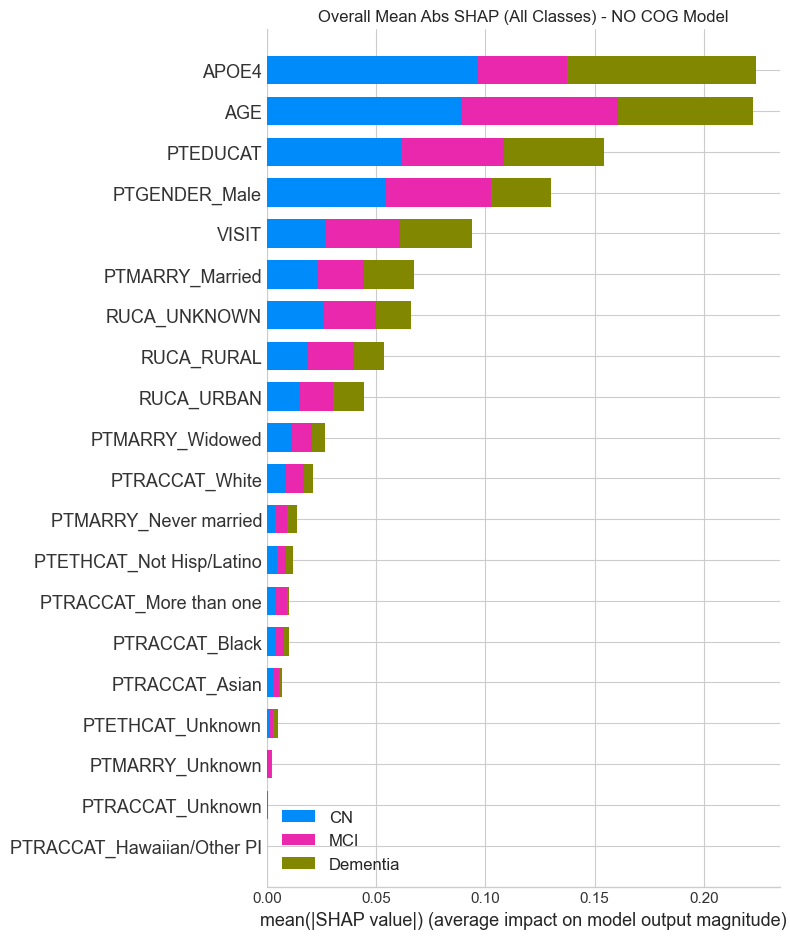


Generating SHAP summary plot (beeswarm) for overall feature importance (NO COG)...


<Figure size 1200x900 with 0 Axes>

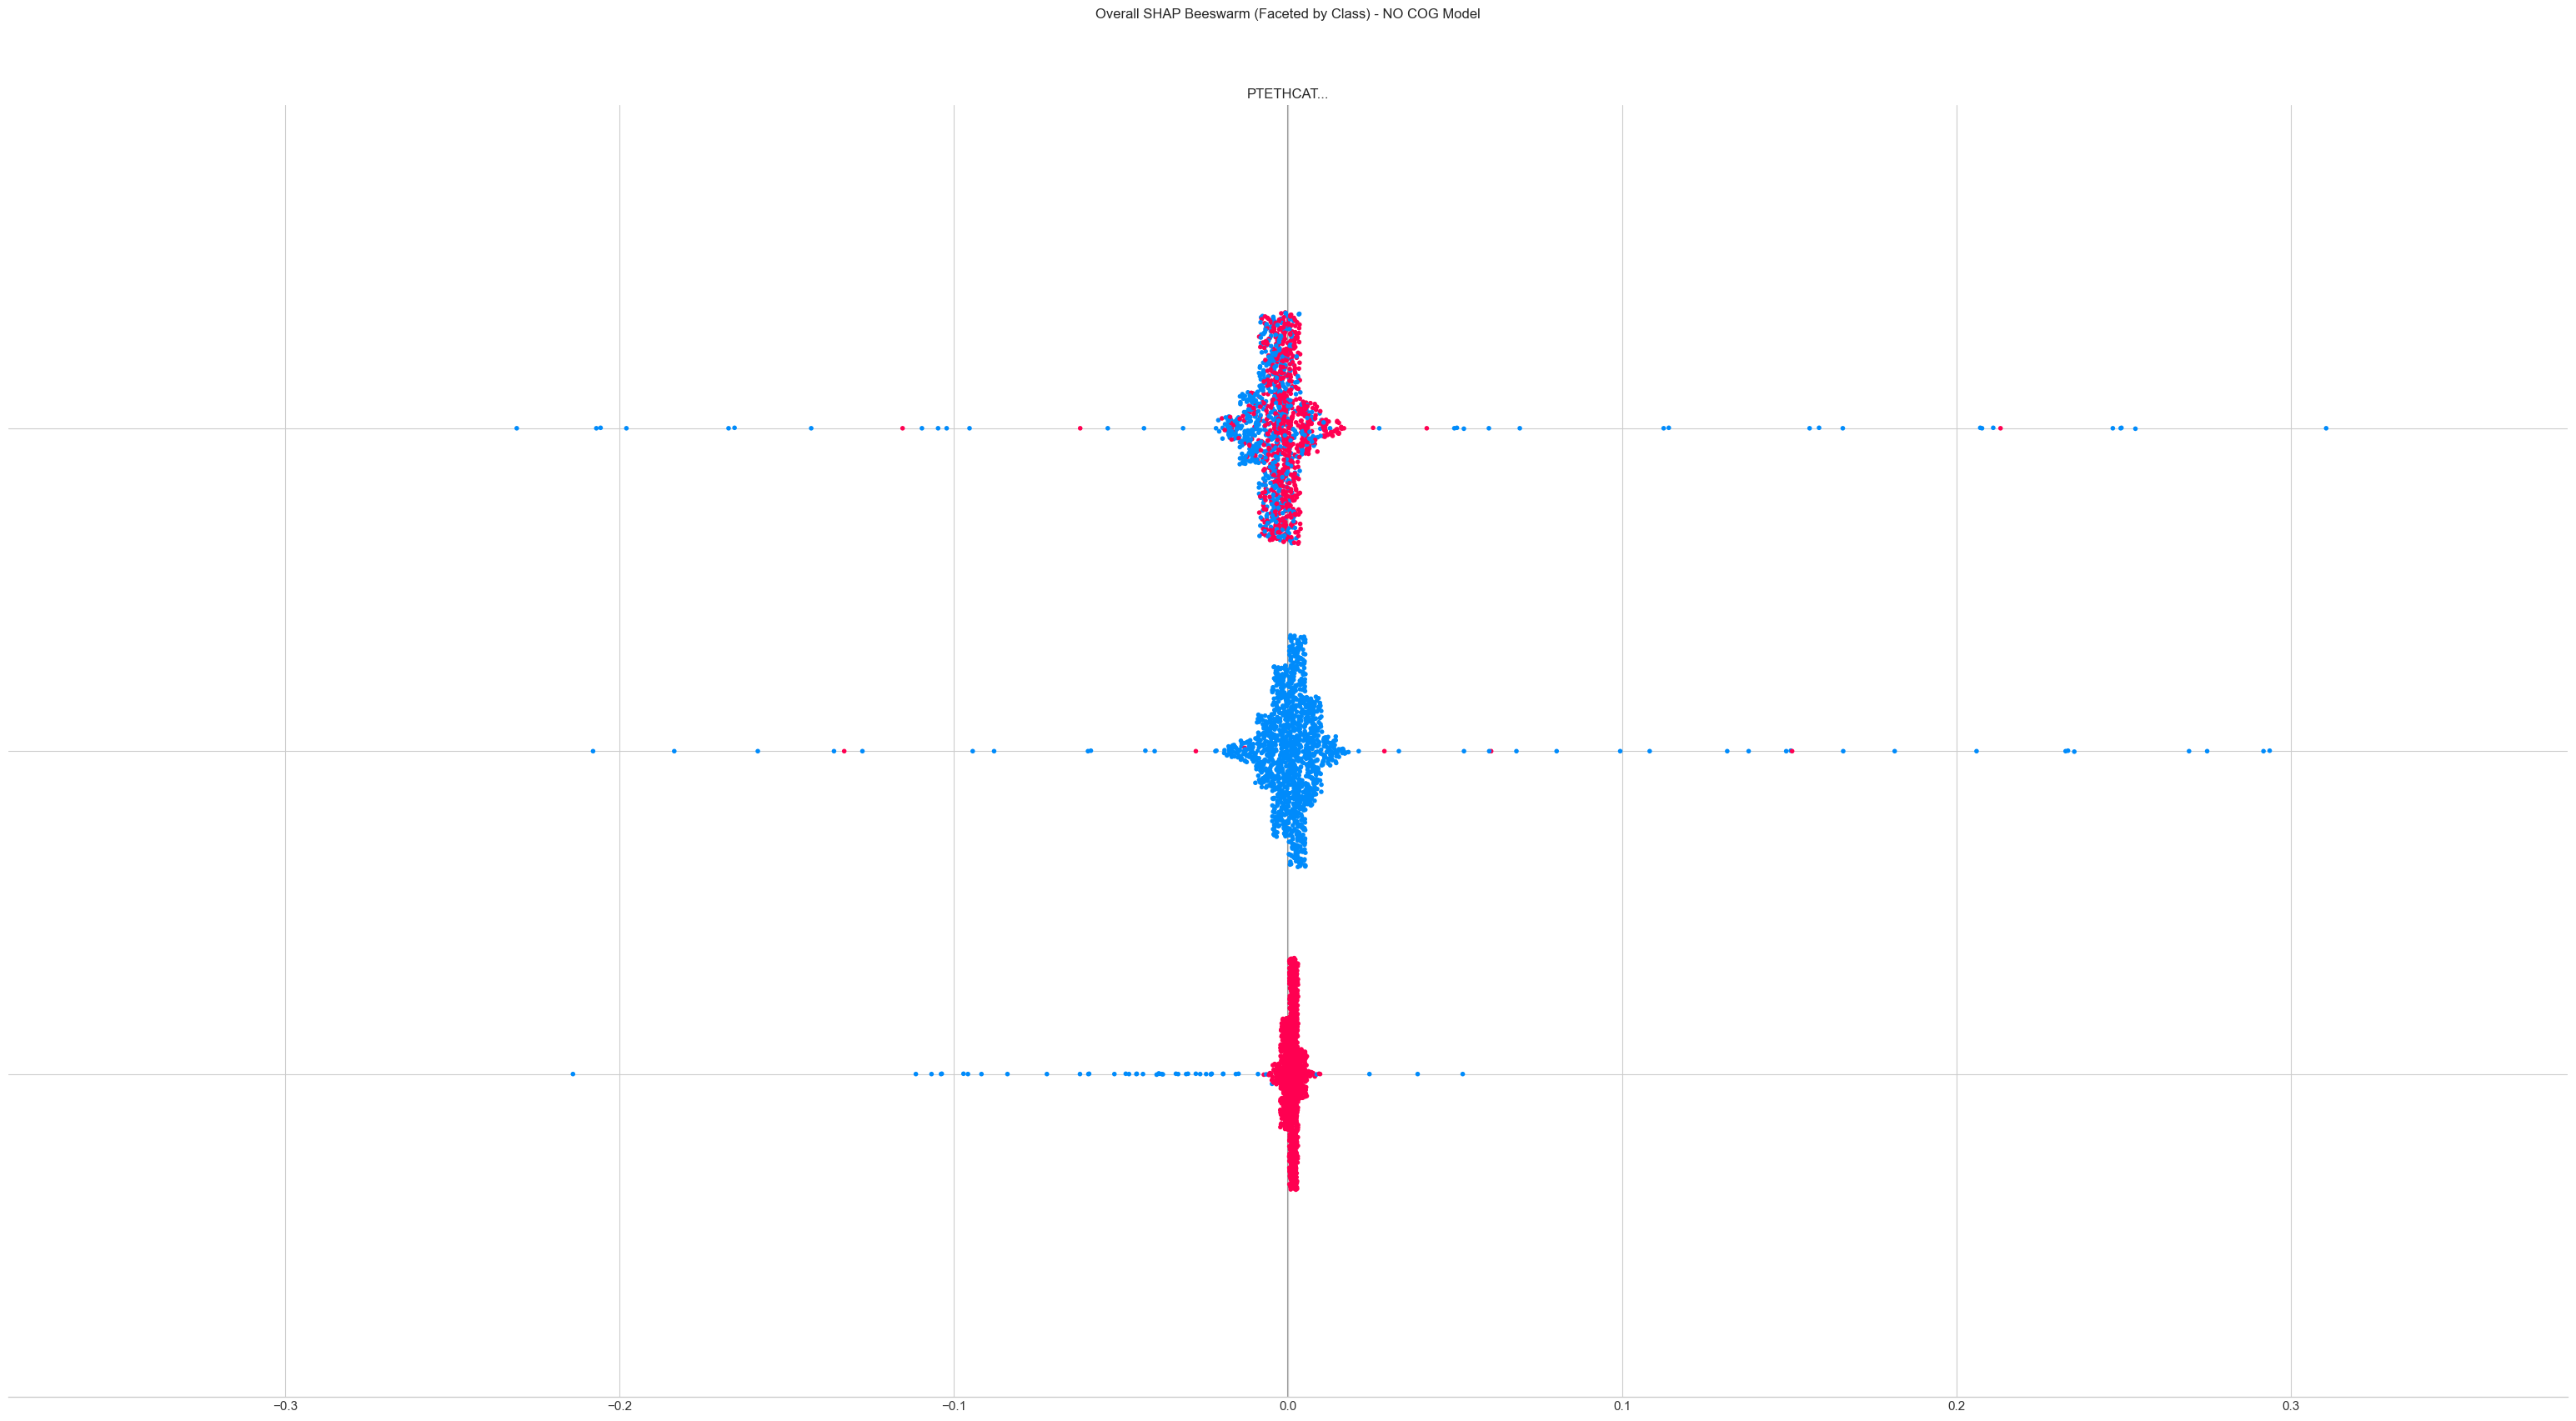


Generating class-specific SHAP summary plots (NO COG)...
--- SHAP Analysis for Class (NO COG): CN ---


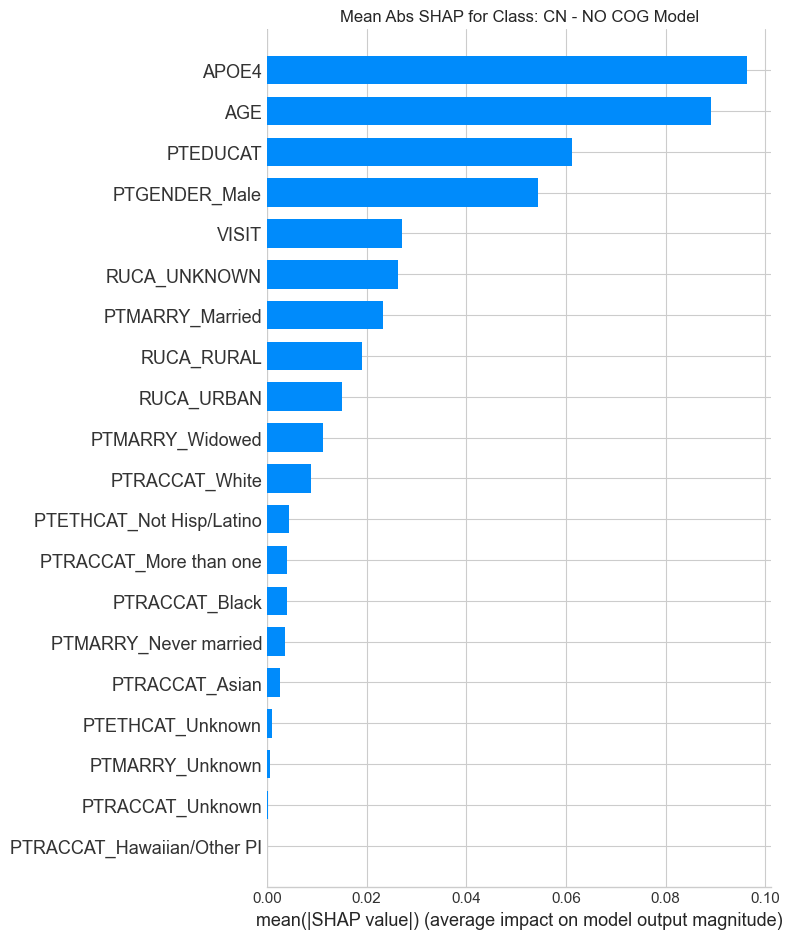

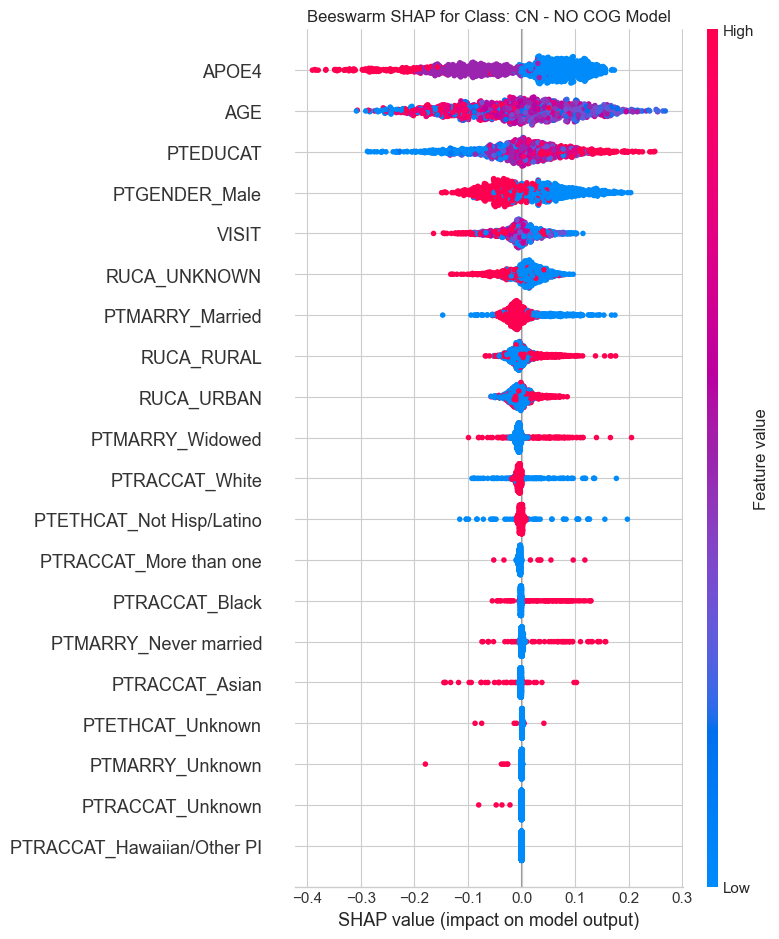

--- SHAP Analysis for Class (NO COG): Dementia ---


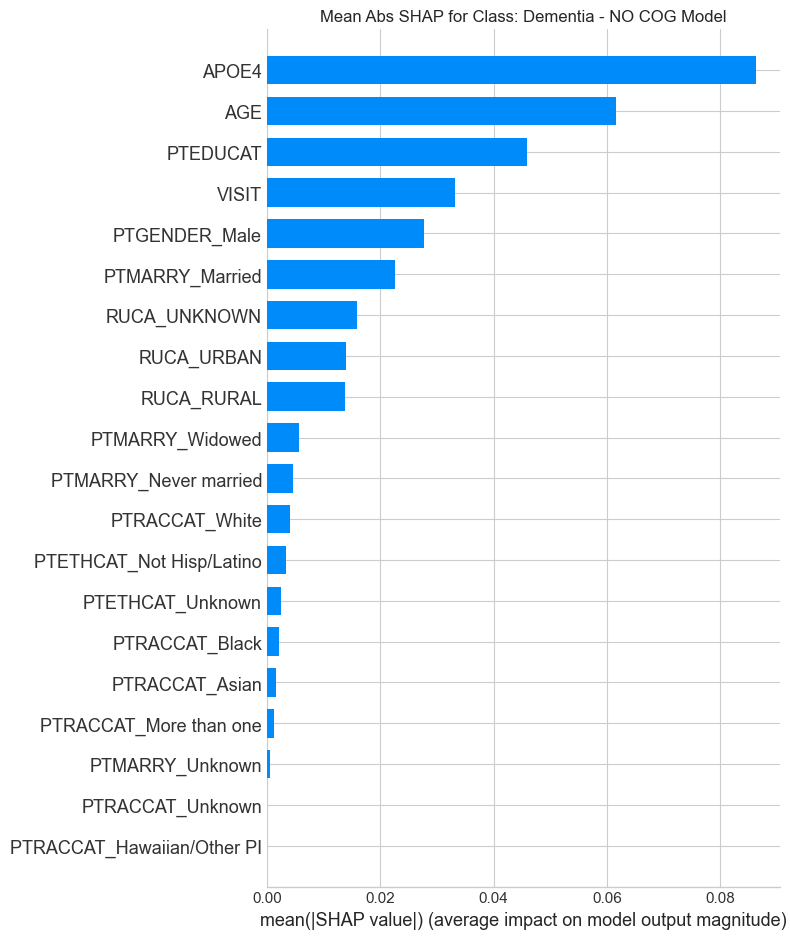

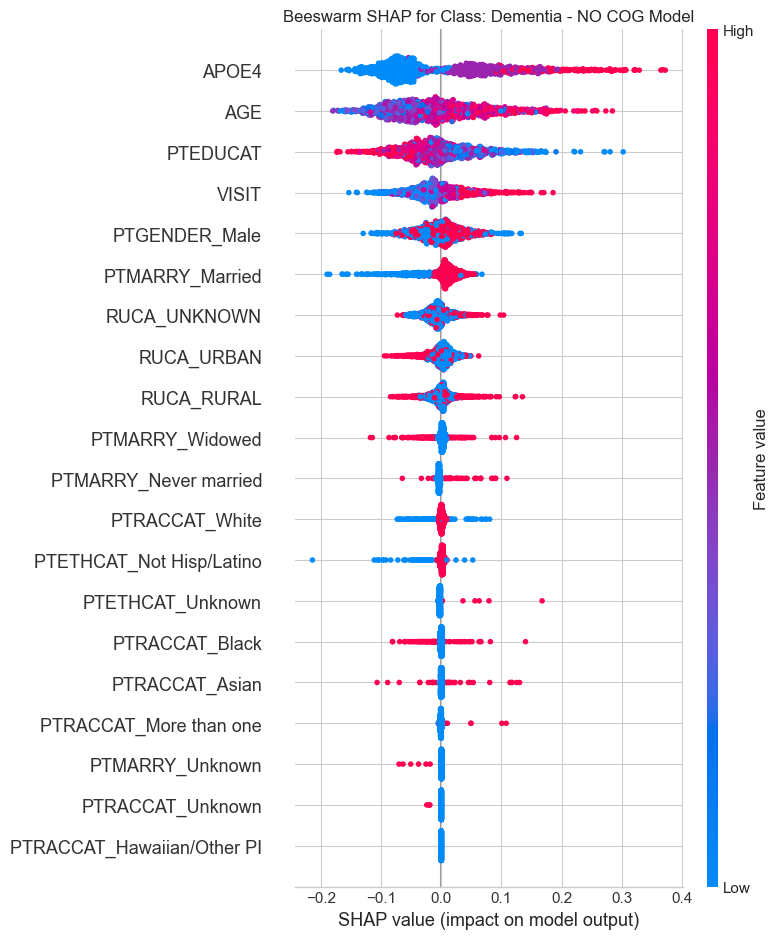

--- SHAP Analysis for Class (NO COG): MCI ---


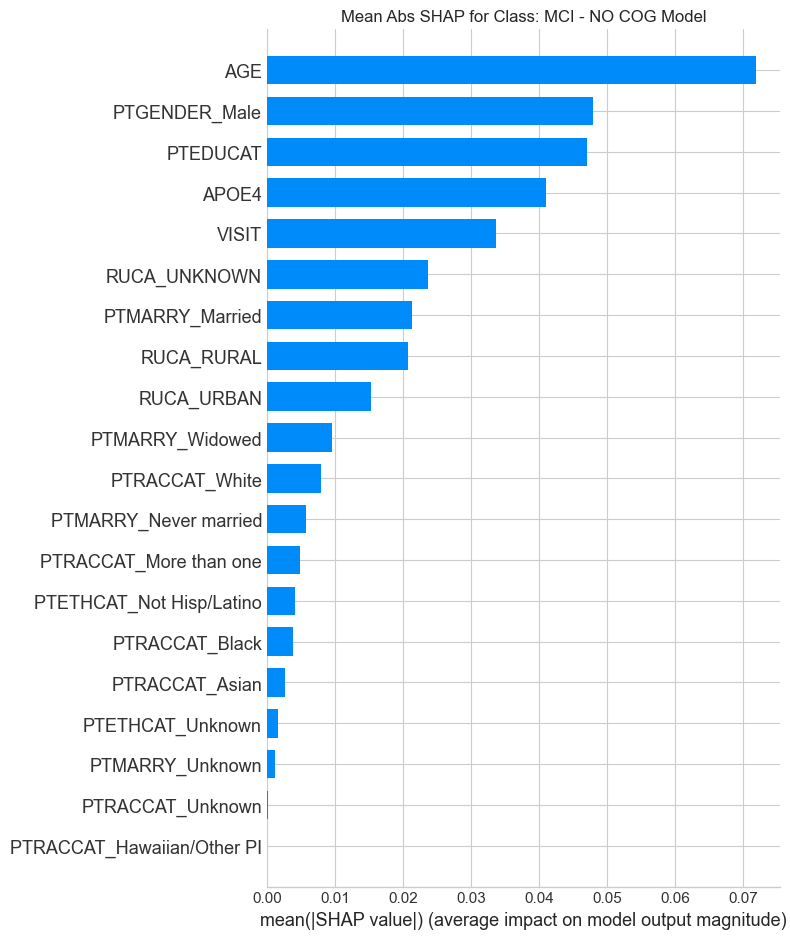

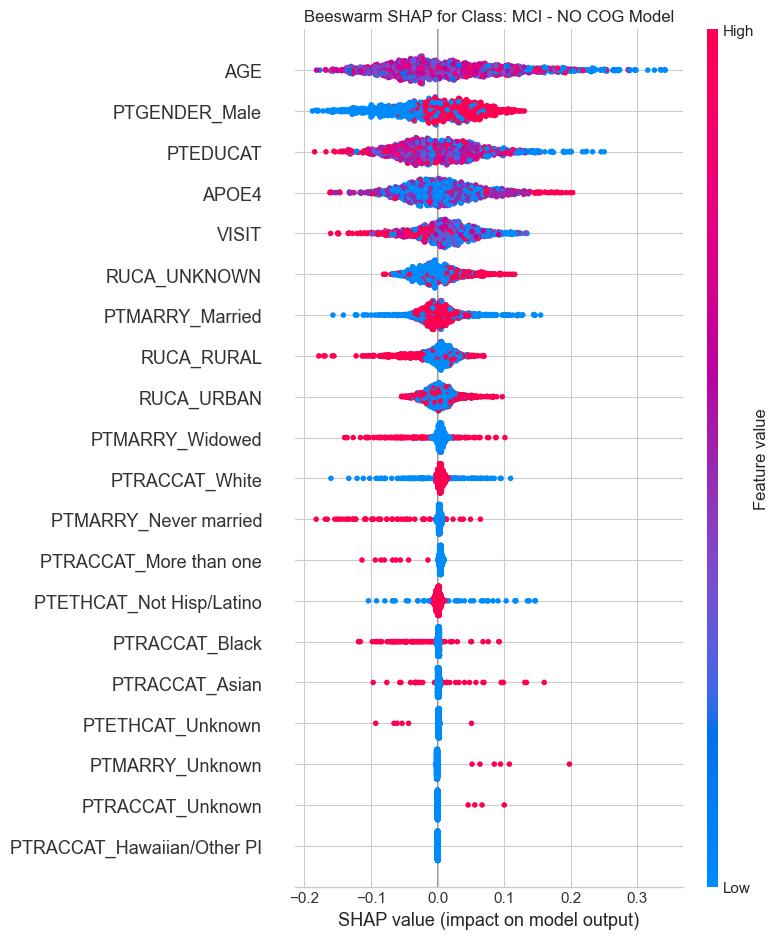


Generating NET Mean SHAP Bar Plot for Class (NO COG): Dementia


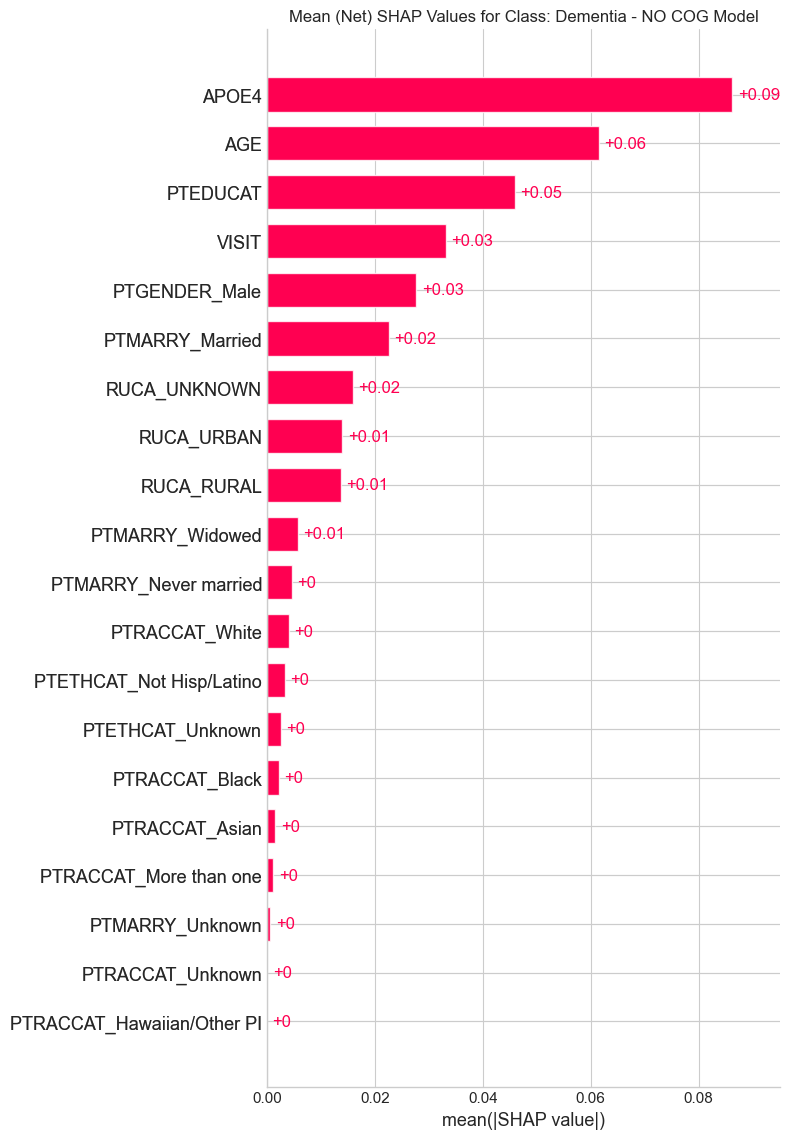


SHAP analysis (NO COG model) and plotting completed.
SHAP plots saved in 'models_no_cognitive'.


In [23]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os

plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. Configuration & Paths ---
DATA_CSV_PATH = "DATA.csv"
MODEL_DIR_NO_COG_SHAP = "models_no_cognitive" # Directory where NO COG models are saved
BEST_MODEL_NAME_NO_COG = "RandomForest" # Change if another model was better
MODEL_FILENAME_NO_COG = f"{BEST_MODEL_NAME_NO_COG}_no_cog.pkl"
PIPELINE_FILENAME_NO_COG = "preprocessing_pipeline_no_cog.pkl"
LABEL_ENCODER_FILENAME_NO_COG = "label_encoder_no_cog.pkl"
MAX_VISITS_SHAP = 4

model_path = os.path.join(MODEL_DIR_NO_COG_SHAP, MODEL_FILENAME_NO_COG)
pipeline_path = os.path.join(MODEL_DIR_NO_COG_SHAP, PIPELINE_FILENAME_NO_COG)
label_encoder_path = os.path.join(MODEL_DIR_NO_COG_SHAP, LABEL_ENCODER_FILENAME_NO_COG)

# --- 1. Load Trained Model, Pipeline, and Label Encoder ---
print(f"Loading NO COG model ('{MODEL_FILENAME_NO_COG}'), pipeline, and encoder from '{MODEL_DIR_NO_COG_SHAP}'...")
try:
    model = joblib.load(model_path)
    preprocessing_pipeline = joblib.load(pipeline_path)
    le = joblib.load(label_encoder_path)
    class_names = le.classes_
    print("Successfully loaded NO COG model, pipeline, and label encoder.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    exit()

# --- 2. Reconstruct X_train_raw, X_test_raw (to match NO COG training) ---
print("\nReconstructing data splits (NO COG) for SHAP...")
df = pd.read_csv(DATA_CSV_PATH)

# Define feature groups EXACTLY as in the NO COG training script
demographic_cols_shap = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_cols_shap = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_static_cols_shap = ['PTEDUCAT', 'AGE', 'APOE4']
all_static_cols_defined_shap = demographic_cols_shap + rurality_cols_shap + other_static_cols_shap

# LOCF not needed for features in this model (as in NO COG training)

# Build dataset across visits (identical to NO COG training script)
all_visit_data_list_recon = []
for visit_num in range(1, MAX_VISITS_SHAP + 1):
    target_col_name = f"DX_VISIT{visit_num}"
    if target_col_name not in df.columns: continue
    
    current_predictors_for_visit_shap = all_static_cols_defined_shap # Only static + VISIT
    final_predictors_for_subset_shap = [col for col in current_predictors_for_visit_shap if col in df.columns]
    if not final_predictors_for_subset_shap: continue
    
    cols_for_this_visit_subset_shap = final_predictors_for_subset_shap + [target_col_name]
    visit_subset_df_shap = df[cols_for_this_visit_subset_shap].copy()
    visit_subset_df_shap.dropna(subset=[target_col_name], inplace=True)
    if visit_subset_df_shap.empty: continue
        
    visit_subset_df_shap.rename(columns={target_col_name: 'DX'}, inplace=True)
    visit_subset_df_shap['VISIT'] = visit_num
    all_visit_data_list_recon.append(visit_subset_df_shap)

if not all_visit_data_list_recon: raise ValueError("SHAP Recon (NO COG): No data.")
combined_df_reconstructed = pd.concat(all_visit_data_list_recon, axis=0, ignore_index=True)
X_raw_reconstructed = combined_df_reconstructed.drop(columns=['DX'])
y_raw_series_reconstructed = combined_df_reconstructed['DX'].astype(str)
y_reconstructed = le.transform(y_raw_series_reconstructed)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw_reconstructed, y_reconstructed, stratify=y_reconstructed, test_size=0.2, random_state=42
)
feature_names_for_shap = list(X_train_raw.columns)
print(f"SHAP (NO COG): X_train_raw shape: {X_train_raw.shape}, X_test_raw shape: {X_test_raw.shape}")
print(f"SHAP (NO COG): Features for SHAP: {X_train_raw.columns.tolist()}")

# --- 3. Transform Data using Loaded (NO COG) Pipeline ---
print("\nTransforming X_train_raw and X_test_raw using the loaded NO COG pipeline...")
X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_for_shap)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_for_shap)
print(f"SHAP (NO COG): Processed X_train_df shape: {X_train_processed_df.shape}, X_test_df shape: {X_test_processed_df.shape}")

# --- 4. Initialize SHAP Explainer and Calculate SHAP values ---
print("\nInitializing SHAP Explainer (NO COG)...")
masker_shap = shap.maskers.Independent(X_train_processed_df, max_samples=100)
explainer = shap.TreeExplainer(model, masker_shap)
print("Calculating SHAP values for X_test_processed_df (NO COG)...")
shap_values_output = explainer.shap_values(X_test_processed_df, check_additivity=False)

is_list_of_arrays = isinstance(shap_values_output, list)
is_3d_array = isinstance(shap_values_output, np.ndarray) and shap_values_output.ndim == 3
if not (is_list_of_arrays or is_3d_array):
    print(f"SHAP values (NO COG) are of an unexpected type: {type(shap_values_output)}. Exiting.")
    exit()

# --- 5. SHAP Plots (for NO COG model) ---
# (Plotting code is identical to the previous SHAP script, just uses NO COG data/models)
# (Overall stacked bar, overall beeswarm, class-specific bars, class-specific beeswarms, net bar for one class)

# Plot 1: Overall Mean Absolute SHAP Values (Stacked Bar)
print("\nGenerating SHAP summary plot (bar, stacked by class) for overall feature importance (NO COG)...")
plt.figure(figsize=(10, max(6, len(feature_names_for_shap) * 0.4))) # Adjusted factor
shap.summary_plot(shap_values_output, X_test_processed_df, plot_type="bar", class_names=class_names, show=False, max_display=len(feature_names_for_shap))
plt.title("Overall Mean Abs SHAP (All Classes) - NO COG Model")
plt.tight_layout()
plt.savefig(os.path.join(MODEL_DIR_NO_COG_SHAP, "shap_summary_bar_overall_stacked_no_cog.png"))
plt.show()

# Plot 2: Overall Beeswarm Plot
print("\nGenerating SHAP summary plot (beeswarm) for overall feature importance (NO COG)...")
plt.figure(figsize=(12, max(6, len(feature_names_for_shap) * 0.45))) # Adjusted factor
shap.summary_plot(shap_values_output, X_test_processed_df, class_names=class_names, show=False, max_display=len(feature_names_for_shap))
plt.suptitle("Overall SHAP Beeswarm (Faceted by Class) - NO COG Model", y=1.0)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(os.path.join(MODEL_DIR_NO_COG_SHAP, "shap_summary_beeswarm_overall_faceted_no_cog.png"))
plt.show()

# Plot 3 & 4: Class-Specific Plots
print("\nGenerating class-specific SHAP summary plots (NO COG)...")
num_classes = 0
if is_list_of_arrays: num_classes = len(shap_values_output)
elif is_3d_array: num_classes = shap_values_output.shape[2]

if num_classes == len(class_names):
    for i, class_name_str in enumerate(class_names):
        current_class_shap_values = shap_values_output[i] if is_list_of_arrays else shap_values_output[:, :, i]
        if current_class_shap_values is None: continue
        print(f"--- SHAP Analysis for Class (NO COG): {class_name_str} ---")
        plt.figure(figsize=(10, max(6, len(feature_names_for_shap) * 0.4)))
        shap.summary_plot(current_class_shap_values, X_test_processed_df, plot_type="bar", show=False, max_display=len(feature_names_for_shap))
        plt.title(f"Mean Abs SHAP for Class: {class_name_str} - NO COG Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_NO_COG_SHAP, f"shap_summary_bar_class_{class_name_str}_no_cog.png"))
        plt.show()
        plt.figure(figsize=(12, max(6, len(feature_names_for_shap) * 0.45)))
        shap.summary_plot(current_class_shap_values, X_test_processed_df, show=False, max_display=len(feature_names_for_shap))
        plt.title(f"Beeswarm SHAP for Class: {class_name_str} - NO COG Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_NO_COG_SHAP, f"shap_summary_beeswarm_class_{class_name_str}_no_cog.png"))
        plt.show()

# Plot 5: Net contribution bar plot for a specific class
class_to_analyze_net = 'Dementia' # CHANGE AS NEEDED: 'CN', 'MCI', or 'Dementia'
try:
    class_index_for_net = list(class_names).index(class_to_analyze_net)
    net_shap_values_for_class = shap_values_output[class_index_for_net] if is_list_of_arrays else shap_values_output[:, :, class_index_for_net]
    if net_shap_values_for_class is not None:
        base_value_for_class = explainer.expected_value[class_index_for_net] if hasattr(explainer, 'expected_value') and explainer.expected_value is not None and len(explainer.expected_value) > class_index_for_net else 0
        shap_explanation_for_class = shap.Explanation(
            values=net_shap_values_for_class,
            base_values=np.full(net_shap_values_for_class.shape[0], base_value_for_class),
            data=X_test_processed_df.values,
            feature_names=feature_names_for_shap
        )
        print(f"\nGenerating NET Mean SHAP Bar Plot for Class (NO COG): {class_to_analyze_net}")
        plt.figure(figsize=(10, max(6, len(feature_names_for_shap) * 0.4)))
        shap.plots.bar(shap_explanation_for_class, show=False, max_display=len(feature_names_for_shap))
        plt.title(f"Mean (Net) SHAP Values for Class: {class_to_analyze_net} - NO COG Model")
        plt.tight_layout()
        plt.savefig(os.path.join(MODEL_DIR_NO_COG_SHAP, f"shap_net_bar_class_{class_to_analyze_net}_no_cog.png"))
        plt.show()
except ValueError: print(f"Class '{class_to_analyze_net}' not found. Skipping net plot.")
except Exception as e: print(f"Error in net plot for {class_to_analyze_net} (NO COG): {e}")

print("\nSHAP analysis (NO COG model) and plotting completed.")
print(f"SHAP plots saved in '{MODEL_DIR_NO_COG_SHAP}'.")

In [ ]:
# Cell 1: Setup and Variable Confirmation (IF USING THE PIPELINE FROM THE IMAGE)
# Ensure 'X_test', 'X_test_processed', 'shap_values', 'le', 'model' are defined
# AND 'fitted_column_order' (from your image) or 'X_train_raw.columns' is available.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap

# These variables should exist from your current workflow:
# model: your trained RandomForestClassifier
# X_test: DataFrame of test features (original, before the image's preprocessing_pipeline if it's X_test_raw,
#         OR the same X_test used for subgrouping in my previous suggestions)
# X_test_processed: NumPy array of processed test features (output of the image's preprocessing_pipeline.transform(X_test_raw))
# shap_values: List of SHAP value arrays
# le: your fitted LabelEncoder for 'diagnose'
# fitted_column_order: The list of column names that were processed by preprocessing_pipeline.
#                      This should be list(X_train_raw.columns) from the context of your image.

print("Confirming key variables are loaded:")
try:
    # print(f"  preprocessing_pipeline type: {type(preprocessing_pipeline)}") # If this object is named preprocessing_pipeline
    print(f"  X_test shape: {X_test_raw.shape}") # This is the X_test for subgroup filtering (original values)
    print(f"  X_test_processed shape: {X_test_processed.shape}") # Output of the pipeline from image
    print(f"  model type: {type(model)}")
    if isinstance(shap_values, list):
        print(f"  shap_values[0] shape: {shap_values[0].shape}")
    print(f"  LabelEncoder classes (le): {le.classes_}")

    # ****** IMPORTANT: Define how you get the feature names for THIS pipeline ******
    # If 'fitted_column_order' was saved as shown in your image:
    # feature_names_processed = fitted_column_order
    # OR, if X_train_raw (the input to the image's pipeline) is available:
    # feature_names_processed = list(X_train_raw.columns)
    # OR, if X_test_raw is available and has same columns:
    # feature_names_processed = list(X_test_raw.columns)

    # ---->>>> YOU NEED TO SET `feature_names_processed` HERE based on your image's context <<<<----
    # Example: If X_test has the original columns that were fed into the pipeline from the image
    #          (and X_test was not changed by one-hot encoding etc. separately)
    #          And if all columns of X_test were processed by the image's pipeline.
    
    # For the pipeline in the image (Imputer + Scaler), feature names do not change.
    # So, the processed feature names are the same as the input feature names to that pipeline.
    # Let's assume X_test.columns holds the names of features *before* they went into the
    # 'preprocessing_pipeline' from the image, and all these columns were processed.
    # This is an assumption - you need to ensure this list matches X_test_processed.
    
    # Option 1: If you have 'fitted_column_order' variable from your image's code:
    # feature_names_processed = fitted_column_order
    
    # Option 2: If the columns of the DataFrame 'X_test' (the one used for subgrouping)
    # are the same columns that went into the 'preprocessing_pipeline' from the image:
    feature_names_processed = list(X_test_raw.columns) # This ASSUMES X_test here is X_test_raw from image
    # If X_test used for subgrouping is different, you need the columns of X_test_raw

    if not feature_names_processed:
         raise ValueError("`feature_names_processed` is empty. Please define it correctly based on the input to your image's `preprocessing_pipeline`.")
    print(f"Using feature_names_processed from X_test.columns (assuming these are pre-pipeline features): {len(feature_names_processed)} names.")

except NameError as e:
    print(f"ERROR: A key variable is not defined: {e}")
    print("Please ensure you have run all relevant cells to define X_test, X_test_processed, model, shap_values, le, and the source of feature names (e.g., fitted_column_order or X_train_raw.columns).")
    raise


target_names = le.classes_

print(f"\n--- Variable Check Summary (Image Pipeline Scenario) ---")
print(f"X_test_processed shape: {X_test_processed.shape}")
if isinstance(shap_values, list):
    print(f"SHAP values: list of {len(shap_values)} arrays, each with shape: {shap_values[0].shape}")
print(f"Processed feature names count: {len(feature_names_processed)}")
print(f"Target classes: {target_names}")

if X_test_processed.shape[1] != len(feature_names_processed):
    raise ValueError(
        f"Mismatch between X_test_processed columns ({X_test_processed.shape[1]}) "
        f"and feature_names_processed length ({len(feature_names_processed)}). "
        "Ensure `feature_names_processed` correctly lists the columns that went into the image's pipeline."
    )
# ... (rest of the checks as before) ...
print("--- Setup for Subgroup SHAP Complete (Image Pipeline Scenario) ---")

Confirming key variables are loaded:
  X_test shape: (1428, 39)
  X_test_processed shape: (1428, 39)
  model type: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
  LabelEncoder classes (le): ['CN' 'Dementia' 'MCI']
Using feature_names_processed from X_test.columns (assuming these are pre-pipeline features): 39 names.

--- Variable Check Summary (Image Pipeline Scenario) ---
X_test_processed shape: (1428, 39)
Processed feature names count: 39
Target classes: ['CN' 'Dementia' 'MCI']
--- Setup for Subgroup SHAP Complete (Image Pipeline Scenario) ---


In [33]:
# Cell 2: Define Subgroup Columns and Age Binning (Revised)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# shap should have been imported in Cell 1

# --- Ensure X_test_raw is correctly defined and contains necessary columns ---
# X_test_raw should be your DataFrame of original, unprocessed test features.
# It is used here for defining subgroups based on original values.

try:
    print(f"X_test_raw number of rows: {len(X_test_raw)}")
    print("First 5 columns of X_test_raw:", list(X_test_raw.columns[:5]))
    if 'age_at_baseline' not in X_test_raw.columns:
        print("\nERROR: 'age_at_baseline' column is NOT FOUND in X_test_raw!")
        print("Available columns in X_test_raw:", list(X_test_raw.columns))
        raise KeyError("'age_at_baseline' not found in X_test_raw. Please check your X_test_raw definition or the column name.")
    if 'gender' not in X_test_raw.columns: # Add similar checks for other subgroup columns
        print("Warning: 'gender' column not found in X_test_raw. Subgrouping by gender might fail.")
        # You can decide to raise an error or just warn
except NameError:
    print("ERROR: X_test_raw is not defined! Please ensure it's created from your train-test split of raw data.")
    raise

# Create a copy for modifications (like adding 'age_group')
X_test_for_subgroups = X_test_raw.copy()

# --- Age Binning ---
age_column_name = 'age_at_baseline' # Use this variable for easier changes if needed

if X_test_for_subgroups[age_column_name].isnull().any():
    print(f"Warning: Column '{age_column_name}' in X_test_for_subgroups contains NaN values. This might affect binning or subgroup creation if not handled.")
    # Optionally, you could impute or drop rows with NaN age here if it makes sense for your analysis,
    # but it's better to handle NaNs in the main data cleaning if 'age_at_baseline' is critical.
    # For now, pd.cut should handle NaNs by assigning them to a NaN group.

# Define age bins.
min_age_val = X_test_for_subgroups[age_column_name].min()
max_age_val = X_test_for_subgroups[age_column_name].max()

age_bins = [min_age_val, 65, 75, 85, max_age_val + 1] # +1 to include max_age_val in the last bin with right=False
age_labels = [f'<{age_bins[1]}', f'{age_bins[1]}-{age_bins[2]-1}', f'{age_bins[2]}-{age_bins[3]-1}', f'>={age_bins[3]}']

# Dynamically adjust bins and labels if min_age_val is already high
# This ensures we don't create empty leading bins
final_age_bins = []
final_age_labels = []

# Start with the lowest possible bin edge, which is min_age_val
current_bin_start_index = 0
if min_age_val >= age_bins[1]: # if min_age_val >= 65
    current_bin_start_index = 1
if min_age_val >= age_bins[2]: # if min_age_val >= 75
    current_bin_start_index = 2
if min_age_val >= age_bins[3]: # if min_age_val >= 85
    current_bin_start_index = 3

final_age_bins.append(min_age_val) # Always start with the actual min age
for i in range(current_bin_start_index + 1, len(age_bins)):
    if age_bins[i] > final_age_bins[-1]: # Ensure bin edges are increasing
         final_age_bins.append(age_bins[i])
         final_age_labels.append(age_labels[i-1]) # age_labels is 1 shorter than age_bins

# Ensure the last bin goes up to max_age_val + 1 if not already covered
if final_age_bins[-1] < max_age_val + 1 and age_bins[-1] > final_age_bins[-1]:
    if age_bins[-1] not in final_age_bins: # Avoid duplicate if max_age_val+1 was already one of the standard bins
      final_age_bins.append(age_bins[-1]) # Add the original max boundary
      if len(final_age_labels) < len(final_age_bins) -1: # Check if a label is needed
          final_age_labels.append(age_labels[-1]) # Add the last label if necessary
elif len(final_age_bins) == 1: # Only one bin if all ages fall into one category (e.g. all < 65)
    final_age_bins.append(max_age_val + 1)
    final_age_labels = [f'{int(min_age_val)}-{int(max_age_val)}']


# Ensure no duplicate bin edges, which can happen if min_age_val equals a bin edge
final_age_bins = sorted(list(set(final_age_bins)))
# Re-construct labels if bins changed significantly, this part can be complex, simpler label logic for now
if len(final_age_bins) > 1 :
    temp_labels = []
    for i in range(len(final_age_bins) - 1):
        if i == 0 and final_age_bins[i+1] == 65 :
             temp_labels.append(f'<{final_age_bins[i+1]}')
        elif i == len(final_age_bins) -2 and final_age_bins[i] == 85:
             temp_labels.append(f'>={final_age_bins[i]}')
        elif final_age_bins[i+1] == max_age_val +1 :
             temp_labels.append(f'{int(final_age_bins[i])}-{int(max_age_val)}')
        else:
             temp_labels.append(f'{int(final_age_bins[i])}-{int(final_age_bins[i+1])-1}')
    final_age_labels = temp_labels
else: # only one bin
    final_age_labels = [f'All Ages ({int(min_age_val)}-{int(max_age_val)})']


print(f"Using age bins: {final_age_bins}")
print(f"Using age labels: {final_age_labels}")

if len(final_age_bins) > 1 and len(final_age_labels) != len(final_age_bins) -1 :
    print("Warning: Mismatch in number of age bins and labels after dynamic adjustment. Review logic.")
    # Fallback to simpler labeling if dynamic adjustment is problematic
    # This part might need careful testing with your specific age distribution
    X_test_for_subgroups['age_group'] = pd.cut(X_test_for_subgroups[age_column_name],
                                           bins=final_age_bins, include_lowest=True, right=False)

else:
    X_test_for_subgroups['age_group'] = pd.cut(X_test_for_subgroups[age_column_name],
                                           bins=final_age_bins, labels=final_age_labels,
                                           right=False, include_lowest=True, duplicates='drop')


print("Unique age groups created:", X_test_for_subgroups['age_group'].unique())
print("Value counts for age groups:\n", X_test_for_subgroups['age_group'].value_counts(dropna=False))


# Define the columns to iterate over for subgroup analysis
subgroup_column_definitions = {
    'Gender': 'gender',
    'Ethnicity': 'ethnicity',
    'Race': 'race',
    'Rurality': 'rurality',
    'Marital Status': 'marital_status',
    'Education Level': 'education', # Make sure 'education' column exists in X_test_raw
    'Age Group': 'age_group'
}

# Verify these columns exist in X_test_for_subgroups (which is X_test_raw)
all_subgroup_cols_found = True
for display_name, col_name in subgroup_column_definitions.items():
    if col_name != 'age_group' and col_name not in X_test_for_subgroups.columns: # age_group is created here
        print(f"ERROR: Subgroup column '{col_name}' (for '{display_name}') not found in X_test_raw. Subgrouping will fail for this category.")
        all_subgroup_cols_found = False
        # To stop execution if a critical column is missing:
        # raise KeyError(f"Required subgroup column '{col_name}' not found in X_test_raw.")
    elif col_name in X_test_for_subgroups.columns or col_name == 'age_group':
        print(f"Found subgroup column: '{col_name}'. Unique values (sample): {X_test_for_subgroups[col_name].unique()[:5]}...")

if not all_subgroup_cols_found:
    print("\nOne or more subgroup columns were not found. Please check your X_test_raw data and column names in `subgroup_column_definitions`.")

X_test_raw number of rows: 1428
First 5 columns of X_test_raw: ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black']

ERROR: 'age_at_baseline' column is NOT FOUND in X_test_raw!
Available columns in X_test_raw: ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI', 'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White', 'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN', 'CDRSB_VISIT1', 'ADAS11_VISIT1', 'ADAS13_VISIT1', 'ADASQ4_VISIT1', 'MMSE_VISIT1', 'PTEDUCAT', 'AGE', 'VISIT', 'CDRSB_VISIT2', 'ADAS11_VISIT2', 'ADAS13_VISIT2', 'ADASQ4_VISIT2', 'MMSE_VISIT2', 'CDRSB_VISIT3', 'ADAS11_VISIT3', 'ADAS13_VISIT3', 'ADASQ4_VISIT3', 'MMSE_VISIT3', 'CDRSB_VISIT4', 'ADAS11_VISIT4', 'ADAS13_VISIT4', 'ADASQ4_VISIT4', 'MMSE_VISIT4']


KeyError: "'age_at_baseline' not found in X_test_raw. Please check your X_test_raw definition or the column name."

In [ ]:
def generate_shap_plots_for_subgroup(subgroup_column_name, subgroup_value,
                                     X_test_df_original, # This is X_test_for_subgroups
                                     X_test_processed_all, # This is the full X_test_processed
                                     all_shap_values, # This is the full shap_values list
                                     processed_feature_names_list,
                                     target_class_names,
                                     min_samples_for_plot=10): # Minimum samples to generate a plot
    """
    Filters data for a subgroup and generates SHAP summary plots for each class.
    """
    # Create a boolean mask for the subgroup based on the original X_test_df_original
    # This mask aligns with the rows of X_test_df_original (and thus X_test_processed_all and all_shap_values)
    subgroup_mask = (X_test_df_original[subgroup_column_name] == subgroup_value).values

    num_samples_in_subgroup = np.sum(subgroup_mask)

    if num_samples_in_subgroup < min_samples_for_plot:
        print(f"\nSkipping subgroup: '{subgroup_column_name} == {subgroup_value}' (N={num_samples_in_subgroup}, less than {min_samples_for_plot} samples)")
        return

    print(f"\n--- SHAP Analysis for Subgroup: {subgroup_column_name} = {subgroup_value} (N={num_samples_in_subgroup}) ---")

    # Filter X_test_processed for the subgroup
    X_test_processed_subgroup = X_test_processed_all[subgroup_mask]

    # Filter SHAP values for the subgroup (list of arrays)
    shap_values_subgroup = [s_val[subgroup_mask, :] for s_val in all_shap_values]

    # Generate SHAP summary plots for each class within this subgroup
    for i, class_name in enumerate(target_class_names):
        print(f"  Generating SHAP summary plot for class: {class_name}")
        plt.figure(figsize=(10, 6)) # Adjust figure size as needed
        shap.summary_plot(shap_values_subgroup[i],
                          X_test_processed_subgroup,
                          feature_names=processed_feature_names_list,
                          show=False,
                          plot_type="bar", # You can change to "dot", "violin"
                          max_display=15) # Display top 15 features
        plt.title(f"SHAP Feature Importance for '{class_name}'\nSubgroup: {subgroup_column_name} = {subgroup_value}")
        plt.tight_layout()
        plt.show()

# --- Iterate through each subgroup category and its unique values ---
for display_name, actual_col_name in subgroup_column_definitions.items():
    if actual_col_name not in X_test_for_subgroups.columns:
        continue # Skip if column was not found (warning issued earlier)

    print(f"\n======================================================================")
    print(f"Generating SHAP plots for subgroups based on: {display_name} (column: {actual_col_name})")
    print(f"======================================================================")
    
    unique_values_in_column = X_test_for_subgroups[actual_col_name].unique()
    
    for value in unique_values_in_column:
        if pd.isna(value): # Handle potential NaN values if not dropped earlier for these specific columns
            print(f"\nSkipping subgroup: '{actual_col_name} == NaN/NaT'")
            continue
            
        generate_shap_plots_for_subgroup(
            subgroup_column_name=actual_col_name,
            subgroup_value=value,
            X_test_df_original=X_test_for_subgroups,
            X_test_processed_all=X_test_processed,
            all_shap_values=shap_values, # This is the list of SHAP arrays
            processed_feature_names_list=feature_names_processed,
            target_class_names=target_names,
            min_samples_for_plot=10 # Set a reasonable minimum
        )

In [24]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os
import re # For sanitizing filenames

plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. Configuration & Paths (for model WITH cognitive scores) ---
DATA_CSV_PATH = "DATA.csv" # Your main data file
MODEL_DIR_CORRECTED = "models_corrected_training" # From your first corrected training run
BEST_MODEL_NAME_FROM_TRAINING = "RandomForest" # Or your best model
MODEL_FILENAME = f"{BEST_MODEL_NAME_FROM_TRAINING}_corrected.pkl"
PIPELINE_FILENAME = "preprocessing_pipeline_corrected.pkl"
LABEL_ENCODER_FILENAME = "label_encoder_corrected.pkl"
MAX_VISITS_SHAP = 4 # Max visits used in training
SUBGROUP_PLOTS_DIR = os.path.join(MODEL_DIR_CORRECTED, "shap_subgroup_plots_with_cog") # Specific output dir
os.makedirs(SUBGROUP_PLOTS_DIR, exist_ok=True)

model_path = os.path.join(MODEL_DIR_CORRECTED, MODEL_FILENAME)
pipeline_path = os.path.join(MODEL_DIR_CORRECTED, PIPELINE_FILENAME)
label_encoder_path = os.path.join(MODEL_DIR_CORRECTED, LABEL_ENCODER_FILENAME)

# --- Helper function to sanitize filenames ---
def sanitize_filename(name):
    name = re.sub(r'[<>:"/\\|?*() ]', '_', name)
    name = re.sub(r'_+', '_', name)
    name = name.strip('_')
    return name

# --- 1. Load Model, Pipeline, Encoder & Reconstruct Data ---
print(f"Loading model ('{MODEL_FILENAME}'), pipeline, encoder from '{MODEL_DIR_CORRECTED}'...")
try:
    model = joblib.load(model_path)
    preprocessing_pipeline = joblib.load(pipeline_path)
    le = joblib.load(label_encoder_path)
    class_names = le.classes_
except FileNotFoundError as e:
    print(f"Error loading files from {MODEL_DIR_CORRECTED}: {e}"); exit()

print("Reconstructing data splits for SHAP (model WITH cognitive scores)...")
df_orig_for_subgroups = pd.read_csv(DATA_CSV_PATH)

# Data Reconstruction (mirroring the 'models_corrected_training' script)
cognitive_scores_bases = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
demographic_cols = ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
                    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
                    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
                    'PTMARRY_Married', 'PTMARRY_Never married', 'PTMARRY_Unknown', 'PTMARRY_Widowed']
rurality_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_static_cols = ['PTEDUCAT', 'AGE', 'APOE4']
all_static_cols_defined_shap = demographic_cols + rurality_cols + other_static_cols

# LOCF
vars_for_locf_shap = cognitive_scores_bases
visit_specific_columns_for_locf_shap = []
for var_base in vars_for_locf_shap:
    for v_num in range(1, MAX_VISITS_SHAP + 1):
        col_name = f"{var_base}_VISIT{v_num}"
        if col_name in df_orig_for_subgroups.columns: visit_specific_columns_for_locf_shap.append(col_name)
grouped_locf_vars_shap = defaultdict(list)
for col in visit_specific_columns_for_locf_shap: grouped_locf_vars_shap[col.split("_VISIT")[0]].append(col)
for base_name, visit_cols_list in grouped_locf_vars_shap.items():
    sorted_visit_cols = sorted(visit_cols_list, key=lambda x: int(x.split("VISIT")[1]))
    if sorted_visit_cols: df_orig_for_subgroups[sorted_visit_cols] = df_orig_for_subgroups[sorted_visit_cols].ffill(axis=1)

# Build combined_df
all_visit_data_list_recon = []
for visit_num in range(1, MAX_VISITS_SHAP + 1):
    target_col_name = f"DX_VISIT{visit_num}"
    if target_col_name not in df_orig_for_subgroups.columns: continue
    current_visit_cognitive_cols_shap = [f"{base}_VISIT{visit_num}" for base in cognitive_scores_bases if f"{base}_VISIT{visit_num}" in df_orig_for_subgroups.columns]
    current_predictors_for_visit_shap = all_static_cols_defined_shap + current_visit_cognitive_cols_shap
    final_predictors_for_subset_shap = [col for col in current_predictors_for_visit_shap if col in df_orig_for_subgroups.columns]
    if not final_predictors_for_subset_shap: continue
    cols_for_this_visit_subset_shap = final_predictors_for_subset_shap + [target_col_name]
    visit_subset_df_shap = df_orig_for_subgroups[cols_for_this_visit_subset_shap].copy()
    visit_subset_df_shap.dropna(subset=[target_col_name], inplace=True)
    if visit_subset_df_shap.empty: continue
    visit_subset_df_shap.rename(columns={target_col_name: 'DX'}, inplace=True)
    visit_subset_df_shap['VISIT'] = visit_num
    all_visit_data_list_recon.append(visit_subset_df_shap)

if not all_visit_data_list_recon: raise ValueError("SHAP Subgroup Recon (WITH COG): No data.")
combined_df_reconstructed = pd.concat(all_visit_data_list_recon, axis=0, ignore_index=True)
X_raw_reconstructed = combined_df_reconstructed.drop(columns=['DX'])
y_raw_series_reconstructed = combined_df_reconstructed['DX'].astype(str)
y_reconstructed = le.transform(y_raw_series_reconstructed)

_, X_test_raw_full, _, y_test_full = train_test_split(
    X_raw_reconstructed, y_reconstructed, stratify=y_reconstructed, test_size=0.2, random_state=42
)
feature_names_for_shap = list(X_test_raw_full.columns)

# --- 2. Transform Full Test Data & Calculate Full SHAP values ---
print("\nTransforming full test set (WITH COG) and calculating SHAP values...")
X_test_processed_full_numpy = preprocessing_pipeline.transform(X_test_raw_full)
X_test_processed_full_df = pd.DataFrame(
    X_test_processed_full_numpy,
    columns=feature_names_for_shap,
    index=X_test_raw_full.index  # Preserve original index
)

masker_shap = shap.maskers.Independent(X_test_processed_full_df, max_samples=100)
explainer = shap.TreeExplainer(model, masker_shap)
shap_values_full_output = explainer.shap_values(X_test_processed_full_df, check_additivity=False)

is_list_of_arrays = isinstance(shap_values_full_output, list)
is_3d_array = isinstance(shap_values_full_output, np.ndarray) and shap_values_full_output.ndim == 3

# --- 3. Subgroup Analysis (for model WITH cognitive scores) ---
print("\n--- Starting Subgroup SHAP Analysis (model WITH cognitive scores) ---")

# plot_subgroup_shap function
def plot_subgroup_shap(shap_values_subset, data_subset_processed_df, class_names_list, subgroup_name_suffix_orig, target_class_name_for_net_plot='Dementia'):
    subgroup_name_suffix_clean = sanitize_filename(subgroup_name_suffix_orig)
    if data_subset_processed_df.empty:
        print(f"Data subset for {subgroup_name_suffix_orig} is empty. Skipping plots.")
        return
    valid_shap = False
    if is_list_of_arrays and shap_values_subset and shap_values_subset[0].shape[0] > 0 : valid_shap = True
    elif is_3d_array and shap_values_subset.shape[0] > 0: valid_shap = True
    if not valid_shap:
        print(f"SHAP values for {subgroup_name_suffix_orig} are empty/invalid. Skipping plots.")
        return

    title_model_suffix = "(WITH COG Model)"
    file_model_suffix = "_with_cog"

    plt.figure(figsize=(12, max(8, len(data_subset_processed_df.columns) * 0.35)))
    shap.summary_plot(shap_values_subset, data_subset_processed_df, class_names=class_names_list, show=False, max_display=len(data_subset_processed_df.columns))
    plt.suptitle(f"Overall Beeswarm (Faceted) for {subgroup_name_suffix_orig} {title_model_suffix}", y=1.0)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.savefig(os.path.join(SUBGROUP_PLOTS_DIR, f"beeswarm_overall_{subgroup_name_suffix_clean}{file_model_suffix}.png"))
    plt.show()

    try:
        class_idx_net = list(class_names_list).index(target_class_name_for_net_plot)
        shap_vals_for_net_class = None
        if isinstance(shap_values_subset, list): shap_vals_for_net_class = shap_values_subset[class_idx_net]
        elif isinstance(shap_values_subset, np.ndarray) and shap_values_subset.ndim == 3: shap_vals_for_net_class = shap_values_subset[:, :, class_idx_net]
        elif isinstance(shap_values_subset, np.ndarray) and shap_values_subset.ndim == 2: shap_vals_for_net_class = shap_values_subset
        
        if shap_vals_for_net_class is not None and shap_vals_for_net_class.shape[0] > 0:
            base_val_net = explainer.expected_value[class_idx_net] if hasattr(explainer, 'expected_value') and explainer.expected_value is not None and len(explainer.expected_value) > class_idx_net else 0
            explanation_net = shap.Explanation(
                values=shap_vals_for_net_class,
                base_values=np.full(shap_vals_for_net_class.shape[0], base_val_net),
                data=data_subset_processed_df.values,
                feature_names=data_subset_processed_df.columns.tolist()
            )
            plt.figure(figsize=(10, max(8, len(data_subset_processed_df.columns) * 0.3)))
            shap.plots.bar(explanation_net, show=False, max_display=len(data_subset_processed_df.columns))
            plt.title(f"Mean (Net) SHAP for {target_class_name_for_net_plot} - {subgroup_name_suffix_orig} {title_model_suffix}")
            plt.tight_layout()
            plt.savefig(os.path.join(SUBGROUP_PLOTS_DIR, f"net_bar_{target_class_name_for_net_plot}_{subgroup_name_suffix_clean}{file_model_suffix}.png"))
            plt.show()
    except Exception as e:
        print(f"Could not generate net plot for {target_class_name_for_net_plot} in {subgroup_name_suffix_orig}: {e}")

# process_and_plot_subgroup function
def process_and_plot_subgroup(subgroup_name_orig, condition_series, X_test_raw, X_test_processed_df_full, shap_values_full, is_list, is_3d):
    subgroup_original_indices = X_test_raw[condition_series].index
    if len(subgroup_original_indices) == 0:
        print(f"No samples in subgroup: {subgroup_name_orig}. Skipping.")
        return
    print(f"Processing {subgroup_name_orig}, {len(subgroup_original_indices)} samples.")
    X_test_processed_subgroup_df = X_test_processed_df_full.loc[subgroup_original_indices]
    try:
        subgroup_positional_indices = X_test_processed_df_full.index.get_indexer_for(subgroup_original_indices)
        subgroup_positional_indices = subgroup_positional_indices[subgroup_positional_indices != -1]
    except Exception as e:
        print(f"Error getting positional indices for {subgroup_name_orig}: {e}"); return
    if len(subgroup_positional_indices) == 0:
        print(f"No valid positional indices for {subgroup_name_orig}. Skipping."); return
    shap_values_subgroup = None
    if is_list: shap_values_subgroup = [svals[subgroup_positional_indices] for svals in shap_values_full]
    elif is_3d: shap_values_subgroup = shap_values_full[subgroup_positional_indices, :, :]
    
    plot_subgroup_shap(shap_values_subgroup, X_test_processed_subgroup_df, class_names, subgroup_name_orig)

# --- Subgroup Definitions and Loops ---

# A) Subgroup by Education (PTEDUCAT)
if 'PTEDUCAT' in X_test_raw_full.columns:
    print("\nAnalyzing subgroups by PTEDUCAT (WITH COG model)...")
    edu_bins_conditions = {
        "LowEdu (<=12yrs)": X_test_raw_full['PTEDUCAT'] <= 12,
        "MidEdu (13-16yrs)": (X_test_raw_full['PTEDUCAT'] > 12) & (X_test_raw_full['PTEDUCAT'] <= 16),
        "HighEdu (>16yrs)": X_test_raw_full['PTEDUCAT'] > 16
    }
    for group_name, condition in edu_bins_conditions.items():
        process_and_plot_subgroup(group_name, condition, X_test_raw_full, X_test_processed_full_df, shap_values_full_output, is_list_of_arrays, is_3d_array)
else:
    print("PTEDUCAT column not found. Skipping education subgroup analysis.")

# B) Subgroup by Gender (PTGENDER_Male)
if 'PTGENDER_Male' in X_test_raw_full.columns:
    print("\nAnalyzing subgroups by PTGENDER_Male (WITH COG model)...")
    gender_bins_conditions = { "Gender_Male": X_test_raw_full['PTGENDER_Male'] == 1, "Gender_Female": X_test_raw_full['PTGENDER_Male'] == 0 }
    for group_name, condition in gender_bins_conditions.items():
        process_and_plot_subgroup(group_name, condition, X_test_raw_full, X_test_processed_full_df, shap_values_full_output, is_list_of_arrays, is_3d_array)
else:
    print("PTGENDER_Male column not found. Skipping gender subgroup analysis.")

# C) Subgroup by Rurality
if 'RUCA_URBAN' in X_test_raw_full.columns and 'RUCA_RURAL' in X_test_raw_full.columns:
    print("\nAnalyzing subgroups by Rurality (WITH COG model)...")
    rurality_bins_conditions = { "Rurality_Urban": X_test_raw_full['RUCA_URBAN'] == 1, "Rurality_Rural": X_test_raw_full['RUCA_RURAL'] == 1}
    # if 'RUCA_UNKNOWN' in X_test_raw_full.columns: rurality_bins_conditions["Rurality_Unknown"] = X_test_raw_full['RUCA_UNKNOWN'] == 1
    for group_name, condition in rurality_bins_conditions.items():
        process_and_plot_subgroup(group_name, condition, X_test_raw_full, X_test_processed_full_df, shap_values_full_output, is_list_of_arrays, is_3d_array)
else:
    print("RUCA_URBAN or RUCA_RURAL not found. Skipping rurality subgroup analysis.")

# D) Subgroup by Marital Status
# Your columns: PTMARRY_Married,PTMARRY_Never married,PTMARRY_Unknown,PTMARRY_Widowed
if 'PTMARRY_Married' in X_test_raw_full.columns: # Check one to assume others might exist
    print("\nAnalyzing subgroups by Marital Status (WITH COG model)...")
    marital_bins_conditions = {}
    if 'PTMARRY_Married' in X_test_raw_full.columns: marital_bins_conditions["Marital_Married"] = X_test_raw_full['PTMARRY_Married'] == 1
    if 'PTMARRY_Never married' in X_test_raw_full.columns: marital_bins_conditions["Marital_NeverMarried"] = X_test_raw_full['PTMARRY_Never married'] == 1
    if 'PTMARRY_Widowed' in X_test_raw_full.columns: marital_bins_conditions["Marital_Widowed"] = X_test_raw_full['PTMARRY_Widowed'] == 1
    if 'PTMARRY_Unknown' in X_test_raw_full.columns: marital_bins_conditions["Marital_Unknown"] = X_test_raw_full['PTMARRY_Unknown'] == 1
    for group_name, condition in marital_bins_conditions.items():
        process_and_plot_subgroup(group_name, condition, X_test_raw_full, X_test_processed_full_df, shap_values_full_output, is_list_of_arrays, is_3d_array)
else:
    print("Marital status columns not found.")

# E) Subgroup by Race
# Your columns: PTRACCAT_Asian,PTRACCAT_Black,PTRACCAT_Hawaiian/Other PI,PTRACCAT_More than one,PTRACCAT_Unknown,PTRACCAT_White
if 'PTRACCAT_White' in X_test_raw_full.columns: # Check one
    print("\nAnalyzing subgroups by Race (WITH COG model)...")
    race_bins_conditions = {}
    if 'PTRACCAT_White' in X_test_raw_full.columns: race_bins_conditions["Race_White"] = X_test_raw_full['PTRACCAT_White'] == 1
    if 'PTRACCAT_Black' in X_test_raw_full.columns: race_bins_conditions["Race_Black"] = X_test_raw_full['PTRACCAT_Black'] == 1
    if 'PTRACCAT_Asian' in X_test_raw_full.columns: race_bins_conditions["Race_Asian"] = X_test_raw_full['PTRACCAT_Asian'] == 1 # Corrected from __Asian
    if 'PTRACCAT_More than one' in X_test_raw_full.columns: race_bins_conditions["Race_MoreThanOne"] = X_test_raw_full['PTRACCAT_More than one'] == 1
    if 'PTRACCAT_Hawaiian/Other PI' in X_test_raw_full.columns: race_bins_conditions["Race_HawaiianPI"] = X_test_raw_full['PTRACCAT_Hawaiian/Other PI'] == 1
    if 'PTRACCAT_Unknown' in X_test_raw_full.columns: race_bins_conditions["Race_Unknown"] = X_test_raw_full['PTRACCAT_Unknown'] == 1
    for group_name, condition in race_bins_conditions.items():
        process_and_plot_subgroup(group_name, condition, X_test_raw_full, X_test_processed_full_df, shap_values_full_output, is_list_of_arrays, is_3d_array)
else:
    print("Race columns not found.")

# F) Subgroup by Ethnicity
# Your columns: PTETHCAT_Not Hisp/Latino,PTETHCAT_Unknown
if 'PTETHCAT_Not Hisp/Latino' in X_test_raw_full.columns:
    print("\nAnalyzing subgroups by Ethnicity (WITH COG model)...")
    ethnicity_bins_conditions = {
        "Ethnicity_NotHispLatino": X_test_raw_full['PTETHCAT_Not Hisp/Latino'] == 1,
        "Ethnicity_HispLatinoOrEthnicUnknown": X_test_raw_full['PTETHCAT_Not Hisp/Latino'] == 0 # Captures complement
    }
    if 'PTETHCAT_Unknown' in X_test_raw_full.columns and 'PTETHCAT_Not Hisp/Latino' in X_test_raw_full.columns: # More specific Unknown group
         # This requires careful thought: if PTETHCAT_Unknown=1, PTETHCAT_Not Hisp/Latino should be 0.
         # The above "HispLatinoOrEthnicUnknown" already covers Unknown if it implies NotHispLatino=0
         # To separate:
         # ethnicity_bins_conditions["Ethnicity_Known_HispLatino"] = (X_test_raw_full['PTETHCAT_Not Hisp/Latino'] == 0) & (X_test_raw_full['PTETHCAT_Unknown'] == 0)
         ethnicity_bins_conditions["Ethnicity_Unknown"] = X_test_raw_full['PTETHCAT_Unknown'] == 1


    for group_name, condition in ethnicity_bins_conditions.items():
        process_and_plot_subgroup(group_name, condition, X_test_raw_full, X_test_processed_full_df, shap_values_full_output, is_list_of_arrays, is_3d_array)
else:
    print("PTETHCAT_Not Hisp/Latino column not found. Skipping ethnicity subgroup analysis.")

print(f"\nSubgroup SHAP analysis (WITH COG model) finished. Plots saved in: {SUBGROUP_PLOTS_DIR}")

Loading model ('RandomForest_corrected.pkl'), pipeline, encoder from 'models_corrected_training'...
Reconstructing data splits for SHAP (model WITH cognitive scores)...

Transforming full test set (WITH COG) and calculating SHAP values...


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [12]:
!pip install statsmodels


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/5c/f9/205130cceeda0eebd5a1a58c04e060c2f87a1d63cbbe37a9caa0fcb50c68/statsmodels-0.14.4-cp310-cp310-win_amd64.whl (9.8 MB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/87/2b/b50d3d08ea0fc419c183a84210571eba005328efa62b6b98bc28e9ead32a/patsy-1.0.1-py2.py3-none-any.whl (232 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os

# Ensure plots are displayed
# %matplotlib inline # Uncomment if in Jupyter
plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. Configuration & Paths ---
DATA_CSV_PATH = "DATA.csv" # This is your CURRENT DATA.csv
MODEL_DIR = "models"
BEST_MODEL_NAME = "RandomForest"
MODEL_FILENAME = f"{BEST_MODEL_NAME}_all_visits.pkl"
PIPELINE_FILENAME = "preprocessing_pipeline_all_visits.pkl"
LABEL_ENCODER_FILENAME = "label_encoder_all_visits.pkl"

model_path = os.path.join(MODEL_DIR, MODEL_FILENAME)
pipeline_path = os.path.join(MODEL_DIR, PIPELINE_FILENAME)
label_encoder_path = os.path.join(MODEL_DIR, LABEL_ENCODER_FILENAME)

# --- 1. Load Trained Model, Pipeline, and Label Encoder ---
print("Loading model, pipeline, and label encoder...")
try:
    model = joblib.load(model_path)
    preprocessing_pipeline = joblib.load(pipeline_path)
    le = joblib.load(label_encoder_path)
    class_names = le.classes_
    print("Successfully loaded model, pipeline, and label encoder.")
except FileNotFoundError as e:
    print(f"Error: Could not find one or more required files: {e}")
    exit()

# --- 2. Reconstruct X_train_raw, X_test_raw, y_train, y_test ---
#    The goal is to make X_train_raw match EXACTLY what the pipeline was fit on.
print("\nReconstructing data splits (X_train_raw, X_test_raw)...")
df = pd.read_csv(DATA_CSV_PATH)

# Based on errors, APOE4 was NOT a feature.
# So, biomarkers_for_locf should be empty (unless there were other biomarkers).
# If APOE4 was the only entry in `biomarkers` in original script, then visit_bio would have been empty.
biomarkers_for_locf = [] # Assuming APOE4 was the only one, and it wasn't used.
cognitive = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']

demographics_raw_cols = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_raw_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_raw_cols = ['PTEDUCAT', 'AGE'] # NO APOE4 here

# LOCF (Last Observation Carried Forward) - applies only to cognitive scores now
all_vars_for_locf = biomarkers_for_locf + cognitive # biomarkers_for_locf is empty
visit_cols_locf = []
for var in all_vars_for_locf: # This loop will only process cognitive scores
    for v_num in range(1, 5):
        col = f"{var}_VISIT{v_num}"
        if col in df.columns:
            visit_cols_locf.append(col)

var_groups_locf = defaultdict(list)
for col in visit_cols_locf:
    base = col.split("_VISIT")[0]
    var_groups_locf[base].append(col)

for base, cols_list in var_groups_locf.items():
    cols_sorted = sorted(cols_list, key=lambda x: int(x.split("VISIT")[1]))
    if cols_sorted:
        df[cols_sorted] = df[cols_sorted].ffill(axis=1)

# Build dataset across visits (combined_df)
all_visit_data_reconstruction = []
for visit_num in range(1, 5):
    # visit_bio_cols will be empty because biomarkers_for_locf is empty
    visit_bio_cols = [f"{b}_VISIT{visit_num}" for b in biomarkers_for_locf if f"{b}_VISIT{visit_num}" in df.columns]
    visit_cog_cols = [f"{c}_VISIT{visit_num}" for c in cognitive if f"{c}_VISIT{visit_num}" in df.columns]
    target_col_name = f"DX_VISIT{visit_num}"

    if target_col_name not in df.columns:
        continue

    # Predictors list will NOT contain any APOE4 features
    current_visit_predictor_cols = demographics_raw_cols + rurality_raw_cols + \
                                   visit_bio_cols + visit_cog_cols + other_raw_cols
    
    # Ensure all listed predictor columns actually exist in the current df
    current_visit_predictor_cols = [col for col in current_visit_predictor_cols if col in df.columns]
    
    subset_cols_to_select = current_visit_predictor_cols + [target_col_name]
    
    # Check for missing columns more gracefully
    actual_cols_in_df_for_subset = [col for col in subset_cols_to_select if col in df.columns]
    if target_col_name not in actual_cols_in_df_for_subset:
        continue

    subset = df[actual_cols_in_df_for_subset].copy()
    subset.dropna(subset=[target_col_name], inplace=True)
    if subset.empty:
        continue
        
    subset.rename(columns={target_col_name: 'DX'}, inplace=True)
    subset['VISIT'] = visit_num # Model expects 'VISIT' column
    
    all_visit_data_reconstruction.append(subset)

if not all_visit_data_reconstruction:
    print("Error: No data found after attempting to reconstruct visits. Check feature/column names and DATA.csv.")
    exit()

combined_df_reconstructed = pd.concat(all_visit_data_reconstruction, axis=0, sort=False)

if 'DX' not in combined_df_reconstructed.columns:
    print("Error: 'DX' column missing from combined_df_reconstructed before X_raw creation.")
    exit()

X_raw_reconstructed = combined_df_reconstructed.drop(columns=['DX'])
y_raw_reconstructed = combined_df_reconstructed['DX'].astype(str)

y_reconstructed = le.transform(y_raw_reconstructed)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw_reconstructed, y_reconstructed, 
    stratify=y_reconstructed, 
    test_size=0.2, 
    random_state=42
)

feature_names_for_shap = list(X_train_raw.columns)

# Sanity checks
if 'VISIT' not in feature_names_for_shap:
    print("CRITICAL WARNING: 'VISIT' column is NOT in X_train_raw.columns. Error will persist.")
else:
    print("'VISIT' column is confirmed in X_train_raw.columns.")

if 'APOE4' in feature_names_for_shap or any("APOE4_VISIT" in col for col in feature_names_for_shap):
    print("CRITICAL WARNING: Some form of 'APOE4' IS in X_train_raw.columns. This is unexpected based on errors.")
else:
    print("No 'APOE4' related features found in X_train_raw.columns (this is now expected).")

print(f"Reconstructed X_train_raw shape: {X_train_raw.shape}")
print(f"Reconstructed X_test_raw shape: {X_test_raw.shape}")
print(f"Number of features for pipeline: {len(feature_names_for_shap)}")
# print(f"Feature names for pipeline: {feature_names_for_shap}") # Uncomment to debug

# --- 3. Transform Data using Loaded Pipeline ---
print("\nTransforming X_train_raw and X_test_raw using the loaded pipeline...")
X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_for_shap)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_for_shap)

print(f"Processed X_train_df shape: {X_train_processed_df.shape}")
print(f"Processed X_test_df shape: {X_test_processed_df.shape}")

# --- 4. Initialize SHAP Explainer and Calculate SHAP values ---
# (Rest of the script for SHAP plots remains the same)
print("\nInitializing SHAP Explainer...")
masker = shap.maskers.Independent(X_train_processed_df, max_samples=100)
explainer = shap.TreeExplainer(model, masker)

print("Calculating SHAP values for X_test_processed_df... (This may take a moment)")
shap_values = explainer.shap_values(X_test_processed_df)

if isinstance(shap_values, list):
    print(f"SHAP values calculated. Number of classes: {len(shap_values)}")
    if len(shap_values) > 0:
        print(f"Shape of SHAP values for the first class: {shap_values[0].shape}")
else:
    print(f"SHAP values calculated. Shape: {shap_values.shape}")
    if hasattr(model, 'n_classes_') and model.n_classes_ > 2:
         print("Warning: Expected a list of SHAP values for multi-class, but got a single array.")

base_values = explainer.expected_value
print(f"SHAP Explainer expected_value (base value for each class): {base_values}")


# --- 5. Overall Feature Importance (SHAP Summary Plots) ---
print("\nGenerating SHAP summary plot (bar) for overall feature importance...")
plt.figure()
shap.summary_plot(shap_values, X_test_processed_df, plot_type="bar", class_names=class_names, show=False)
plt.title("Overall Mean Absolute SHAP Values (All Classes)")
plt.tight_layout()
plt.show()

print("\nGenerating SHAP summary plot (beeswarm) for overall feature importance...")
plt.figure()
shap.summary_plot(shap_values, X_test_processed_df, class_names=class_names, show=False)
plt.suptitle("Overall SHAP Beeswarm Plot", y=1.02)
plt.tight_layout()
plt.show()

# --- 6. Class-Specific Feature Importance ---
print("\nGenerating class-specific SHAP summary plots...")
if isinstance(shap_values, list) and len(shap_values) == len(class_names):
    for i, class_name_str in enumerate(class_names):
        print(f"--- SHAP Analysis for Class: {class_name_str} (Target Index: {i}) ---")

        plt.figure()
        shap.summary_plot(shap_values[i], X_test_processed_df, plot_type="bar", show=False)
        plt.title(f"Mean Absolute SHAP Values for Class: {class_name_str}")
        plt.tight_layout()
        plt.show()

        plt.figure()
        shap.summary_plot(shap_values[i], X_test_processed_df, show=False) # Beeswarm
        plt.title(f"Beeswarm SHAP Plot for Class: {class_name_str}")
        plt.tight_layout()
        plt.show()
else:
    print("SHAP values are not in the expected list-per-class format. Skipping class-specific plots.")


print("\nSHAP analysis (Steps 1-5) completed.")
print("Next steps would be subgroup analysis.")

Loading model, pipeline, and label encoder...
Successfully loaded model, pipeline, and label encoder.

Reconstructing data splits (X_train_raw, X_test_raw)...
'VISIT' column is confirmed in X_train_raw.columns.
No 'APOE4' related features found in X_train_raw.columns (this is now expected).
Reconstructed X_train_raw shape: (5709, 39)
Reconstructed X_test_raw shape: (1428, 39)
Number of features for pipeline: 39

Transforming X_train_raw and X_test_raw using the loaded pipeline...
Processed X_train_df shape: (5709, 39)
Processed X_test_df shape: (1428, 39)

Initializing SHAP Explainer...
Calculating SHAP values for X_test_processed_df... (This may take a moment)


100%|===================| 4279/4284 [07:20<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.809500, while the model output was 0.750000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [ ]:

df = pd.read_csv("DATA.csv")

# === Define feature groups ===
biomarkers = ['APOE4']
cognitive = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
demographics = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other = ['PTEDUCAT', 'AGE']

# === LOCF (Last Observation Carried Forward) ===
all_vars = biomarkers + cognitive
visit_cols = []
for var in all_vars:
    for v in range(1, 5):
        col = f"{var}_VISIT{v}"
        if col in df.columns:
            visit_cols.append(col)

var_groups = defaultdict(list)
for col in visit_cols:
    base = col.split("_VISIT")[0]
    var_groups[base].append(col)

for base, cols in var_groups.items():
    cols_sorted = sorted(cols, key=lambda x: int(x.split("VISIT")[1]))
    df[cols_sorted] = df[cols_sorted].apply(lambda row: row.ffill(axis=0), axis=1)

# === Build dataset across visits ===
all_visit_data = []
for visit in range(1, 5):
    visit_bio = [f"{v}_VISIT{visit}" for v in biomarkers if f"{v}_VISIT{visit}" in df.columns]
    visit_cog = [f"{v}_VISIT{visit}" for v in cognitive if f"{v}_VISIT{visit}" in df.columns]
    target = f"DX_VISIT{visit}"
    if target not in df.columns:
        continue

    predictors = demographics + rurality + visit_bio + visit_cog + other
    subset = df[predictors + [target]].copy()
    subset.dropna(subset=[target], inplace=True)
    subset['VISIT'] = visit
    subset.rename(columns={target: 'DX'}, inplace=True)
    all_visit_data.append(subset)


combined_df = pd.concat(all_visit_data, axis=0)


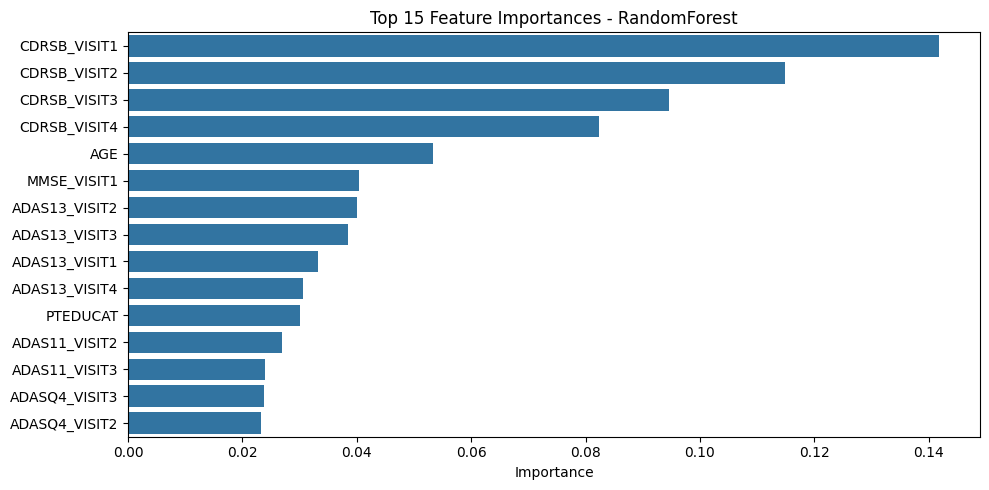

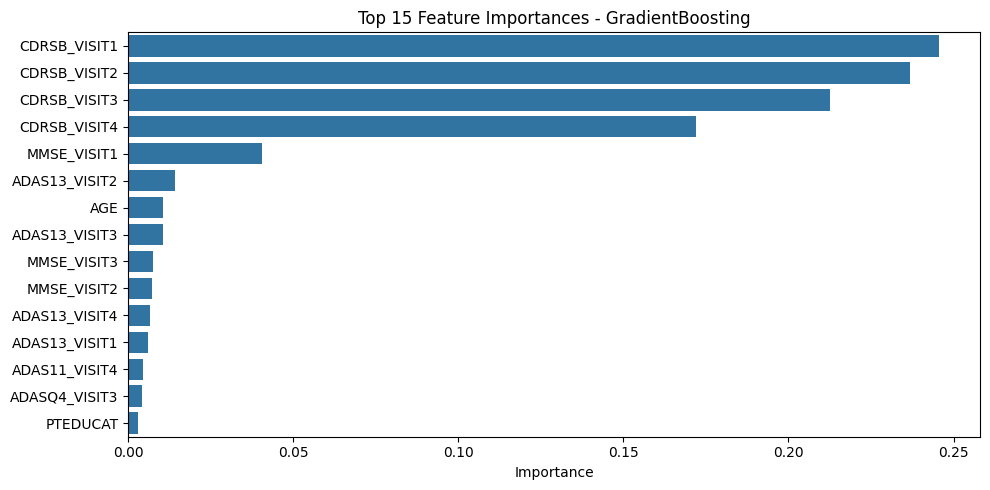

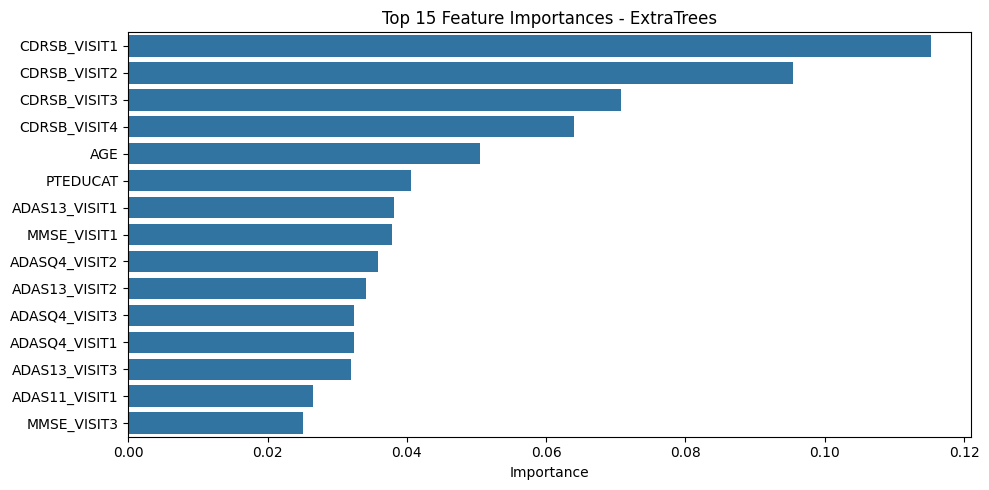

In [ ]:
# === Feature Importance for tree-based models ===
tree_models = ["RandomForest", "GradientBoosting", "ExtraTrees"]

for model_name in tree_models:
    if model_name not in models:
        continue
    model = models[model_name]
    importances = model.feature_importances_
    feature_names = X_train_raw.columns
    indices = np.argsort(importances)[-15:][::-1]  # Top 15

    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
    plt.title(f"Top 15 Feature Importances - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


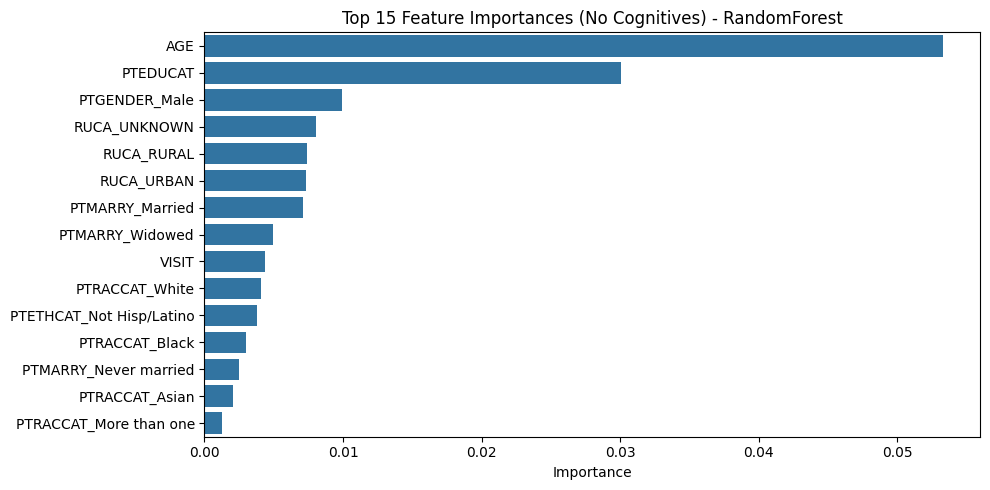

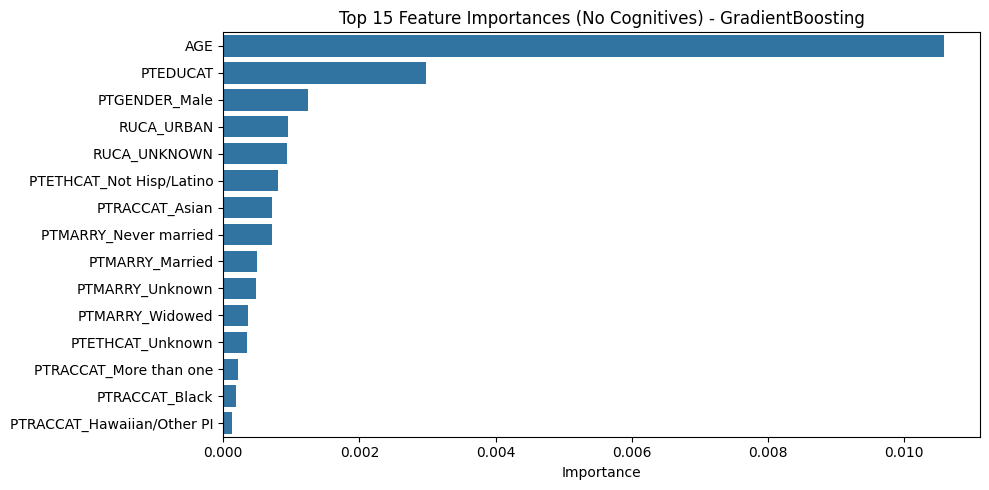

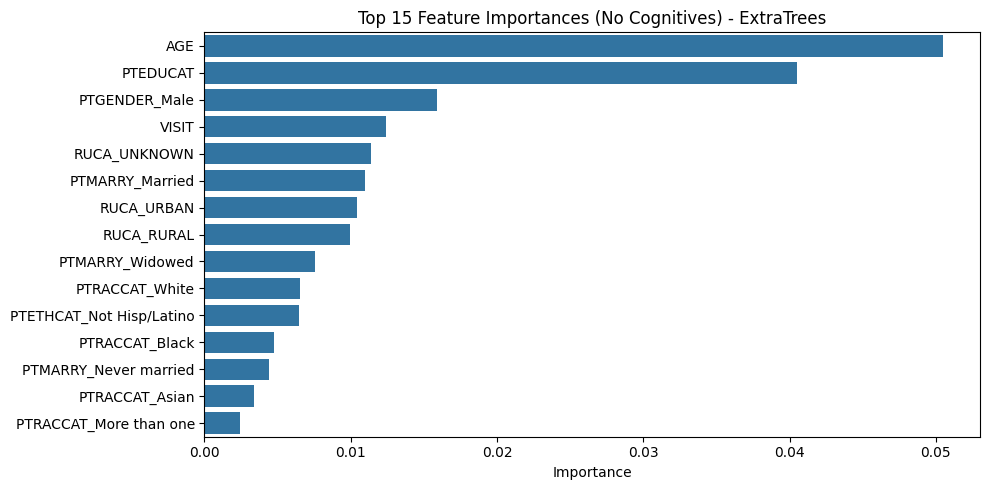

In [ ]:
tree_models = ["RandomForest", "GradientBoosting", "ExtraTrees"]

for model_name in tree_models:
    model = models.get(model_name)
    if model is None:
        continue

    importances = model.feature_importances_
    feature_names = X_train_raw.columns

    # Exclude cognitive features
    filtered = [(name, imp) for name, imp in zip(feature_names, importances)
                if not any(cog in name for cog in cognitive)]

    # Sort and take top 15
    filtered_sorted = sorted(filtered, key=lambda x: x[1], reverse=True)[:15]
    names, values = zip(*filtered_sorted)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=values, y=names)
    plt.title(f"Top 15 Feature Importances (No Cognitives) - {model_name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Train XGBoost Classifier ===
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, "models/XGBoost_all_visits.pkl")

# Predict
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

print("XGBoost Test Accuracy:", xgb_acc)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Test Accuracy: 0.8879551820728291
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       506
           1       0.88      0.85      0.87       313
           2       0.85      0.90      0.87       609

    accuracy                           0.89      1428
   macro avg       0.89      0.88      0.89      1428
weighted avg       0.89      0.89      0.89      1428



In [ ]:
import joblib

label_encoder = joblib.load("models/label_encoder_all_visits.pkl")
class_names = label_encoder.classes_


In [ ]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import defaultdict
import os

# Ensure plots are displayed
# %matplotlib inline # Uncomment if in Jupyter
plt.style.use('seaborn-v0_8-whitegrid')

# --- 0. Configuration & Paths ---
DATA_CSV_PATH = "DATA.csv"
MODEL_DIR = "models"
BEST_MODEL_NAME = "RandomForest"
MODEL_FILENAME = f"{BEST_MODEL_NAME}_all_visits.pkl"
PIPELINE_FILENAME = "preprocessing_pipeline_all_visits.pkl"
LABEL_ENCODER_FILENAME = "label_encoder_all_visits.pkl"

model_path = os.path.join(MODEL_DIR, MODEL_FILENAME)
pipeline_path = os.path.join(MODEL_DIR, PIPELINE_FILENAME)
label_encoder_path = os.path.join(MODEL_DIR, LABEL_ENCODER_FILENAME)

# --- 1. Load Trained Model, Pipeline, and Label Encoder ---
print("Loading model, pipeline, and label encoder...")
try:
    model = joblib.load(model_path)
    preprocessing_pipeline = joblib.load(pipeline_path)
    le = joblib.load(label_encoder_path)
    class_names = le.classes_
    print("Successfully loaded model, pipeline, and label encoder.")
except FileNotFoundError as e:
    print(f"Error: Could not find one or more required files: {e}")
    exit()

# --- 2. Reconstruct X_train_raw, X_test_raw, y_train, y_test ---
print("\nReconstructing data splits (X_train_raw, X_test_raw)...")
df = pd.read_csv(DATA_CSV_PATH)

# --- Key change: Synthesize APOE4_VISITx columns from the single APOE4 column ---
if 'APOE4' in df.columns:
    print("Single 'APOE4' column found. Synthesizing 'APOE4_VISITx' columns...")
    for v_num in range(1, 5): # Assuming max 4 visits
        df[f'APOE4_VISIT{v_num}'] = df['APOE4']
    # df = df.drop(columns=['APOE4']) # Optional: drop the original APOE4 if it might cause confusion later,
                                     # but it shouldn't be selected by feature lists anyway.
    print(f"Created: {', '.join([f'APOE4_VISIT{i}' for i in range(1,5) if f'APOE4_VISIT{i}' in df.columns])}")
else:
    print("Warning: Single 'APOE4' column not found in DATA.csv. Model might expect APOE4_VISITx features.")


# Define feature groups AS PER ORIGINAL TRAINING SCRIPT
biomarkers_for_locf = ['APOE4'] # This now refers to APOE4_VISITx
cognitive = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']

demographics_raw_cols = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality_raw_cols = ['RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']
other_raw_cols = ['PTEDUCAT', 'AGE'] # APOE4 (single) is NOT here

# LOCF (Last Observation Carried Forward)
all_vars_for_locf = biomarkers_for_locf + cognitive
visit_cols_locf = []
for var in all_vars_for_locf:
    for v_num in range(1, 5):
        col = f"{var}_VISIT{v_num}"
        if col in df.columns: # APOE4_VISITx columns should now exist in df
            visit_cols_locf.append(col)

var_groups_locf = defaultdict(list)
for col in visit_cols_locf:
    base = col.split("_VISIT")[0]
    var_groups_locf[base].append(col)

for base, cols_list in var_groups_locf.items():
    cols_sorted = sorted(cols_list, key=lambda x: int(x.split("VISIT")[1]))
    if cols_sorted:
        df[cols_sorted] = df[cols_sorted].ffill(axis=1)

# Build dataset across visits (combined_df)
all_visit_data_reconstruction = []
for visit_num in range(1, 5):
    visit_bio_cols = [f"{b}_VISIT{visit_num}" for b in biomarkers_for_locf if f"{b}_VISIT{visit_num}" in df.columns]
    visit_cog_cols = [f"{c}_VISIT{visit_num}" for c in cognitive if f"{c}_VISIT{visit_num}" in df.columns]
    target_col_name = f"DX_VISIT{visit_num}"

    if target_col_name not in df.columns:
        continue

    current_visit_predictor_cols = demographics_raw_cols + rurality_raw_cols + \
                                   visit_bio_cols + visit_cog_cols + other_raw_cols
    
    current_visit_predictor_cols = [col for col in current_visit_predictor_cols if col in df.columns]
    
    subset_cols_to_select = current_visit_predictor_cols + [target_col_name]
    
    # Check for missing columns more gracefully
    actual_cols_in_df_for_subset = [col for col in subset_cols_to_select if col in df.columns]
    if target_col_name not in actual_cols_in_df_for_subset: # If target is missing, skip
        # print(f"Target {target_col_name} missing for visit {visit_num}, skipping this visit's data construction.")
        continue

    subset = df[actual_cols_in_df_for_subset].copy()
    subset.dropna(subset=[target_col_name], inplace=True)
    if subset.empty:
        continue
        
    subset.rename(columns={target_col_name: 'DX'}, inplace=True)
    subset['VISIT'] = visit_num # <<< ADD THE 'VISIT' COLUMN AS A FEATURE
    
    all_visit_data_reconstruction.append(subset)

if not all_visit_data_reconstruction:
    print("Error: No data found after attempting to reconstruct visits. Check feature/column names and DATA.csv.")
    exit()

combined_df_reconstructed = pd.concat(all_visit_data_reconstruction, axis=0, sort=False)

# Ensure 'VISIT' is part of X_raw columns if it was added.
# If 'VISIT' column doesn't exist, X_raw_reconstructed will not have it.
# It should exist due to subset['VISIT'] = visit_num
if 'DX' not in combined_df_reconstructed.columns:
    print("Error: 'DX' column missing from combined_df_reconstructed before X_raw creation.")
    exit()

X_raw_reconstructed = combined_df_reconstructed.drop(columns=['DX'])
y_raw_reconstructed = combined_df_reconstructed['DX'].astype(str)

y_reconstructed = le.transform(y_raw_reconstructed)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw_reconstructed, y_reconstructed, 
    stratify=y_reconstructed, 
    test_size=0.2, 
    random_state=42
)

feature_names_for_shap = list(X_train_raw.columns) # These are the names pipeline expects

# Sanity checks based on the error
if 'VISIT' not in feature_names_for_shap:
    print("CRITICAL WARNING: 'VISIT' column is NOT in X_train_raw.columns. The error will persist.")
else:
    print("'VISIT' column is confirmed in X_train_raw.columns.")

if 'APOE4' in feature_names_for_shap: # The single 'APOE4' should NOT be a feature
    print("CRITICAL WARNING: Single 'APOE4' column IS in X_train_raw.columns. This might be wrong if model expects APOE4_VISITx.")
else:
    print("Single 'APOE4' column is NOT in X_train_raw.columns (this is expected if model uses APOE4_VISITx).")

# Check for APOE4_VISITx
apoe_visit_features_found = [col for col in feature_names_for_shap if "APOE4_VISIT" in col]
if not apoe_visit_features_found:
    print("CRITICAL WARNING: No 'APOE4_VISITx' features found in X_train_raw.columns.")
else:
    print(f"Found APOE4_VISITx features: {apoe_visit_features_found}")


print(f"Reconstructed X_train_raw shape: {X_train_raw.shape}")
print(f"Reconstructed X_test_raw shape: {X_test_raw.shape}")
print(f"Number of features for pipeline: {len(feature_names_for_shap)}")
# print(f"Feature names for pipeline: {feature_names_for_shap}") # Uncomment to debug list of features


# --- 3. Transform Data using Loaded Pipeline ---
print("\nTransforming X_train_raw and X_test_raw using the loaded pipeline...")
# Now X_train_raw should have the same columns as during pipeline.fit()
X_train_processed = preprocessing_pipeline.transform(X_train_raw)
X_test_processed = preprocessing_pipeline.transform(X_test_raw)

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_for_shap)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names_for_shap)

print(f"Processed X_train_df shape: {X_train_processed_df.shape}")
print(f"Processed X_test_df shape: {X_test_processed_df.shape}")

# --- 4. Initialize SHAP Explainer and Calculate SHAP values ---
print("\nInitializing SHAP Explainer...")
masker = shap.maskers.Independent(X_train_processed_df, max_samples=100)
explainer = shap.TreeExplainer(model, masker)

print("Calculating SHAP values for X_test_processed_df... (This may take a moment)")
shap_values = explainer.shap_values(X_test_processed_df)

if isinstance(shap_values, list):
    print(f"SHAP values calculated. Number of classes: {len(shap_values)}")
    if len(shap_values) > 0:
        print(f"Shape of SHAP values for the first class: {shap_values[0].shape}")
else:
    print(f"SHAP values calculated. Shape: {shap_values.shape}")
    if hasattr(model, 'n_classes_') and model.n_classes_ > 2: # Python 3 hasattr
         print("Warning: Expected a list of SHAP values for multi-class, but got a single array.")

base_values = explainer.expected_value
print(f"SHAP Explainer expected_value (base value for each class): {base_values}")


# --- 5. Overall Feature Importance (SHAP Summary Plots) ---
print("\nGenerating SHAP summary plot (bar) for overall feature importance...")
plt.figure()
shap.summary_plot(shap_values, X_test_processed_df, plot_type="bar", class_names=class_names, show=False)
plt.title("Overall Mean Absolute SHAP Values (All Classes)")
plt.tight_layout()
plt.show()

print("\nGenerating SHAP summary plot (beeswarm) for overall feature importance...")
plt.figure()
shap.summary_plot(shap_values, X_test_processed_df, class_names=class_names, show=False)
plt.suptitle("Overall SHAP Beeswarm Plot", y=1.02)
plt.tight_layout()
plt.show()

# --- 6. Class-Specific Feature Importance ---
print("\nGenerating class-specific SHAP summary plots...")
if isinstance(shap_values, list) and len(shap_values) == len(class_names):
    for i, class_name_str in enumerate(class_names):
        print(f"--- SHAP Analysis for Class: {class_name_str} (Target Index: {i}) ---")

        plt.figure()
        shap.summary_plot(shap_values[i], X_test_processed_df, plot_type="bar", show=False)
        plt.title(f"Mean Absolute SHAP Values for Class: {class_name_str}")
        plt.tight_layout()
        plt.show()

        plt.figure()
        shap.summary_plot(shap_values[i], X_test_processed_df, show=False) # Beeswarm
        plt.title(f"Beeswarm SHAP Plot for Class: {class_name_str}")
        plt.tight_layout()
        plt.show()
else:
    print("SHAP values are not in the expected list-per-class format. Skipping class-specific plots.")
    # (Error handling for unexpected shap_values format remains the same)


print("\nSHAP analysis (Steps 1-5) completed.")
print("Next steps would be subgroup analysis.")

Loading model, pipeline, and label encoder...
Successfully loaded model, pipeline, and label encoder.

Reconstructing data splits (X_train_raw, X_test_raw)...
Single 'APOE4' column found. Synthesizing 'APOE4_VISITx' columns...
Created: APOE4_VISIT1, APOE4_VISIT2, APOE4_VISIT3, APOE4_VISIT4
'VISIT' column is confirmed in X_train_raw.columns.
Single 'APOE4' column is NOT in X_train_raw.columns (this is expected if model uses APOE4_VISITx).
Found APOE4_VISITx features: ['APOE4_VISIT1', 'APOE4_VISIT2', 'APOE4_VISIT3', 'APOE4_VISIT4']
Reconstructed X_train_raw shape: (5709, 43)
Reconstructed X_test_raw shape: (1428, 43)
Number of features for pipeline: 43

Transforming X_train_raw and X_test_raw using the loaded pipeline...


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- APOE4_VISIT1
- APOE4_VISIT2
- APOE4_VISIT3
- APOE4_VISIT4


In [ ]:
import shap
import matplotlib.pyplot as plt
import os

import shap

explainer = shap.TreeExplainer(
    xgb_model,
    feature_perturbation="tree_path_dependent",
    model_output="raw"
)
shap_values = explainer.shap_values(X_test)



# Class names
class_names = label_encoder.classes_
os.makedirs("shap_outputs_xgb", exist_ok=True)

# === Summary Plot Per Class ===
for i, class_label in enumerate(class_names):
    print(f"🔍 SHAP Summary for Class: {class_label}")
    plt.figure()
    shap.summary_plot(
        shap_values[i],
        features=X_test,
        feature_names=X_test_raw.columns,
        show=False
    )
    plt.title(f"SHAP Summary – XGBoost – {class_label}")
    plt.tight_layout()
    plt.savefig(f"shap_outputs_xgb/SHAP_XGB_Summary_{class_label}.png")
    plt.close()


🔍 SHAP Summary for Class: CN


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:
# Use the raw test data before scaling for SHAP plots
X_test_df = pd.DataFrame(X_test, columns=X_test_raw.columns)

for i, class_label in enumerate(class_names):
    print(f"🔍 SHAP Summary for Class: {class_label}")
    plt.figure()
    shap.summary_plot(
        shap_values[i],
        features=X_test_df,
        feature_names=X_test_raw.columns,
        show=False
    )
    plt.title(f"SHAP Summary – XGBoost – {class_label}")
    plt.tight_layout()
    plt.savefig(f"shap_outputs_xgb/SHAP_XGB_Summary_{class_label}.png")
    plt.close()


🔍 SHAP Summary for Class: CN


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:
for i, val in enumerate(shap_values):
    print(f"SHAP class {i}: shape = {val.shape}")


SHAP class 0: shape = (39, 3)
SHAP class 1: shape = (39, 3)
SHAP class 2: shape = (39, 3)
SHAP class 3: shape = (39, 3)
SHAP class 4: shape = (39, 3)
SHAP class 5: shape = (39, 3)
SHAP class 6: shape = (39, 3)
SHAP class 7: shape = (39, 3)
SHAP class 8: shape = (39, 3)
SHAP class 9: shape = (39, 3)
SHAP class 10: shape = (39, 3)
SHAP class 11: shape = (39, 3)
SHAP class 12: shape = (39, 3)
SHAP class 13: shape = (39, 3)
SHAP class 14: shape = (39, 3)
SHAP class 15: shape = (39, 3)
SHAP class 16: shape = (39, 3)
SHAP class 17: shape = (39, 3)
SHAP class 18: shape = (39, 3)
SHAP class 19: shape = (39, 3)
SHAP class 20: shape = (39, 3)
SHAP class 21: shape = (39, 3)
SHAP class 22: shape = (39, 3)
SHAP class 23: shape = (39, 3)
SHAP class 24: shape = (39, 3)
SHAP class 25: shape = (39, 3)
SHAP class 26: shape = (39, 3)
SHAP class 27: shape = (39, 3)
SHAP class 28: shape = (39, 3)
SHAP class 29: shape = (39, 3)
SHAP class 30: shape = (39, 3)
SHAP class 31: shape = (39, 3)
SHAP class 32: sha

In [ ]:
print("X_test shape (after pipeline.transform):", X_test.shape)
print("X_test_raw shape:", X_test_raw.shape)
print("X_test_df shape (with columns):", X_test_df.shape)
print("X_test_df columns:", list(X_test_df.columns)[:5], "...")  # show a sample


X_test shape (after pipeline.transform): (1428, 39)
X_test_raw shape: (1428, 39)
X_test_df shape (with columns): (1428, 39)
X_test_df columns: ['PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown', 'PTRACCAT_Asian', 'PTRACCAT_Black'] ...


In [ ]:

os.makedirs("shap_outputs", exist_ok=True)
feature_cols = X_test_raw.columns.tolist()

# === SHAP Plotting ===
for class_idx, class_label in enumerate(le.classes_):
    for group_var, group_vals in group_variables.items():
        for val in group_vals:
            if group_var == "EDU_GROUP":
                mask = X_test_with_group[group_var] == val
            else:
                if group_var not in X_test_with_group.columns:
                    continue
                mask = X_test_with_group[group_var] == val

            if mask.sum() < 30:
                continue

            shap_mean = shap_values[class_idx][mask].mean(axis=0)
            shap_df = pd.DataFrame({group_var: shap_mean}, index=feature_cols)
            top_features = shap_df[group_var].abs().sort_values(ascending=False).head(10).index
            shap_df_top = shap_df.loc[top_features]

            if shap_df_top.empty:
                continue

            ax = shap_df_top.T.plot(kind='barh', figsize=(10, 6))
            plt.axvline(0, color='gray', linestyle='--')
            plt.title(f"Top 10 SHAP (Directional) – Class: {class_label} – Group: {group_var} = {val}")
            plt.xlabel("Mean SHAP Value (Directional)")
            plt.tight_layout()
            safe_label = f"{class_label}_{group_var}_{val}".replace(" ", "_").replace("≤", "le").replace("/", "_")
            plt.savefig(f"shap_outputs/shap_{safe_label}.png")
            plt.close()

print("✅ SHAP directional analysis complete. Plots saved to `./shap_outputs/`.")


In [ ]:
print("X_test shape:", X_test.shape)


In [ ]:
print("SHAP values length per class:")
for i, sv in enumerate(shap_values):
    print(f"Class {i}: SHAP shape = {sv.shape}")


In [ ]:
print(type(X_test))
print(type(X_raw))
print(type(X_train))
print(type(X_train_raw))


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


In [ ]:
print(type(X_test))
print(type(X_raw))
print(type(X_train))
print(type(X_train_raw))


In [ ]:
rf_model = models["RandomForest"]  # This is already trained
probs = rf_model.predict_proba(X_test)

import numpy as np
print("✅ Mean predicted probabilities per class (CN, MCI, AD):")
print(np.round(np.mean(probs, axis=0), 4))


In [ ]:
import xgboost as xgb
import shap

# Train model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# SHAP explainer (works for multiclass!)
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Exclude cognitive columns
non_cognitive_idx = [i for i, name in enumerate(X_test_raw.columns) if not any(cog in name for cog in cognitive)]

# Summary plot without cognitive variables
shap.summary_plot(shap_values[:, non_cognitive_idx], X_test_raw.iloc[:, non_cognitive_idx])


In [ ]:
for i in range(shap_values.shape[2]):
    print(f"Class {i}")
    shap.summary_plot(shap_values[:, :, i], X_test_raw, plot_type="dot")


In [ ]:
import shap
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# === Load and preprocess data ===
df = pd.read_csv("DATA.csv")
df = df[df["DX_VISIT1"].notna()].copy()

# Label encode the target
le = LabelEncoder()
df["TARGET"] = le.fit_transform(df["DX_VISIT1"])  # 0: CN, 1: MCI, 2: AD

# Cognitive feature identification
cognitive_keywords = ["CDRSB", "ADAS", "MMSE"]
cognitive_cols = [col for col in df.columns if any(kw in col for kw in cognitive_keywords)]

# Drop unnecessary columns
drop_cols = ["Unnamed: 0", "RID", "PTID", "EXAMDATE_bl", "DX_VISIT1"]
X = df.drop(columns=drop_cols + ["TARGET"])
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# === Fit XGBoost model ===
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
model.fit(X_train, y_train)

# === SHAP explanation using TreeExplainer ===
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# === SHAP summary for class-specific directionality ===
class_names = le.classes_
shap_df = pd.DataFrame(index=X.columns)

for i, name in enumerate(class_names):
    shap_df[name] = shap_values[i].mean(axis=0)

# === Cognitive-excluded SHAP ===
non_cognitive_cols = [col for col in X.columns if col not in cognitive_cols]
shap_df_non_cog = shap_df.loc[non_cognitive_cols]
top_features = shap_df_non_cog[["MCI", "AD"]].abs().mean(axis=1).sort_values(ascending=False).head(10)

# === Plot top non-cognitive SHAP features for MCI and AD ===
shap_df.loc[top_features.index][["MCI", "AD"]].plot(kind="barh", figsize=(10, 6))
plt.title("Top 10 Non-Cognitive Features by SHAP Value (MCI vs AD)")
plt.xlabel("Mean SHAP Value (directional)")
plt.tight_layout()
plt.show()

# === Subgroup analysis ===
subgroup_vars = ["AGE", "PTEDUCAT", "RUCA_URBAN", "RUCA_RURAL", "RUCA_UNKNOWN",
                 "PTGENDER_Male", "PTETHCAT_Not Hisp/Latino", "PTRACCAT_White",
                 "PTRACCAT_Black", "PTMARRY_Married", "PTMARRY_Never married"]

for var in subgroup_vars:
    print(f"\n📊 Subgroup Analysis for {var}")
    for group in sorted(df[var].dropna().unique()):
        mask = (X_test[var] == group)
        if mask.sum() < 30:
            print(f"⏭️ Skipping group {group} (n={mask.sum()})")
            continue
        subgroup_shap = shap_values[2][mask]  # AD class
        subgroup_mean = pd.Series(subgroup_shap.mean(axis=0), index=X.columns)
        top_subgroup_features = subgroup_mean.loc[non_cognitive_cols].abs().sort_values(ascending=False).head(5)

        # Plot
        subgroup_mean.loc[top_subgroup_features.index].plot(kind="barh", title=f"AD Directional SHAP – {var}={group}")
        plt.xlabel("Mean SHAP (AD)")
        plt.tight_layout()
        plt.show()


In [ ]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load model and label encoder ===
rf_model = joblib.load("RandomForest_all_visits.pkl")
label_encoder = joblib.load("label_encoder_all_visits.pkl")

# === Load test data ===
X_test_raw = pd.read_csv("check.csv")  # Replace with your actual file

# === Drop non-numeric columns (like IDs) ===
X_test_numeric = X_test_raw.select_dtypes(include=[np.number])
feature_names = X_test_numeric.columns.tolist()

# === SHAP computation using Random Forest ===
explainer = shap.TreeExplainer(rf_model, model_output="raw")
shap_vals = explainer.shap_values(X_test_numeric)



In [ ]:
# If accidentally passing a row:
X_test_numeric = X_test_numeric if len(X_test_numeric.shape) == 2 else X_test_numeric.reshape(1, -1)
# === SHAP computation using Random Forest ===
explainer = shap.TreeExplainer(rf_model, model_output="raw")
shap_vals = explainer.shap_values(X_test_numeric)


In [ ]:
# SHAP values already computed, e.g.
# explainer = shap.Explainer(xgb_model)
# shap_values = explainer(X_test)

# Summary plot with ALL variables (cognitive included)
shap.summary_plot(shap_values, X_test_raw)


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Binarize labels
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_bin.shape[1]

# Example with Logistic Regression (use other models too)
clf = OneVsRestClassifier(LogisticRegression(max_iter=5000))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# Compute ROC and AUC
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{le.classes_[i]} vs rest (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve (OvR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

X_raw = combined_df.drop(columns=['DX'])
y_raw = combined_df['DX'].astype(str)

le = LabelEncoder()
y = le.fit_transform(y_raw)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train_raw)
X_train = pipeline.transform(X_train_raw)
X_test = pipeline.transform(X_test_raw)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Decode for fairness compatibility
y_test_decoded = le.inverse_transform(y_test)
X_test_raw_with_labels = X_test_raw.copy()
X_test_raw_with_labels["DX"] = y_test_decoded


In [ ]:
explainer = shap.TreeExplainer(rf_model)
os.makedirs("shap_plots", exist_ok=True)

for group_var in ['PTGENDER_Male', 'PTEDUCAT']:
    if group_var not in X_test_raw.columns:
        continue
    for val in X_test_raw[group_var].dropna().unique():
        mask = X_test_raw[group_var] == val
        data_subset = X_test[mask][:300]
        if data_subset.shape[0] < 20:
            continue
        shap_values = explainer.shap_values(data_subset)
        shap.summary_plot(shap_values, data_subset, feature_names=X_test_raw.columns, show=False)
        plt.title(f"SHAP Summary: {group_var} = {val}")
        plt.savefig(f"shap_plots/shap_{group_var}_{val}.png")
        plt.close()


In [ ]:
for edu_level in sorted(X_test_raw['PTEDUCAT'].dropna().unique()):
    mask = X_test_raw['PTEDUCAT'] == edu_level
    X_sub = X_test[mask]
    if X_sub.shape[0] < 30:
        continue  # skip small groups

    shap_vals = explainer.shap_values(X_sub)
    shap.summary_plot(
        shap_vals, X_sub, feature_names=X_test_raw.columns,
        show=False
    )
    plt.title(f"SHAP Summary - Education = {edu_level} years")
    plt.tight_layout()
    plt.savefig(f"shap_education_{edu_level}.png")
    plt.close()


In [ ]:
explainer = shap.TreeExplainer(rf_model)
os.makedirs("shap_plots", exist_ok=True)

for group_var in ['PTGENDER_Male', 'PTEDUCAT']:
    if group_var not in X_test_raw.columns:
        continue

    for val in X_test_raw[group_var].dropna().unique():
        mask = X_test_raw[group_var] == val
        data_subset = X_test[mask][:300]  # Already preprocessed
        if data_subset.shape[0] < 20:
            continue

        shap_values = explainer.shap_values(data_subset)  # Multiclass → list of arrays

        # === Global SHAP summary across all classes (your original code) ===
        shap.summary_plot(shap_values, data_subset, feature_names=X_test_raw.columns, show=False)
        plt.title(f"SHAP Summary: {group_var} = {val} (All Classes)")
        plt.savefig(f"shap_plots/shap_{group_var}_{val}_ALL.png")
        plt.close()

        # === Class-specific SHAP summaries (NEW) ===
        for class_idx, class_name in zip([0, 1, 2], ['CN', 'MCI', 'AD']):
            shap_class_vals = shap_values[class_idx]

            shap.summary_plot(shap_class_vals, data_subset, feature_names=X_test_raw.columns, show=False)
            plt.title(f"SHAP Summary: {group_var} = {val} → {class_name}")
            plt.tight_layout()
            plt.savefig(f"shap_plots/shap_{group_var}_{val}_{class_name}.png")
            plt.close()


In [ ]:
for edu_level in sorted(X_test_raw['PTEDUCAT'].dropna().unique()):
    mask = X_test_raw['PTEDUCAT'] == edu_level
    X_sub = X_test[mask]
    if X_sub.shape[0] < 30:
        continue  # skip small groups

    shap_vals = explainer.shap_values(X_sub)  # List for multiclass

    # === Global SHAP summary (all classes aggregated) ===
    shap.summary_plot(
        shap_vals, X_sub, feature_names=X_test_raw.columns, show=False
    )
    plt.title(f"SHAP Summary - Education = {edu_level} years (All Classes)")
    plt.tight_layout()
    plt.savefig(f"shap_education_{edu_level}_ALL.png")
    plt.close()

    # === Class-specific SHAP summaries ===
    for class_idx, class_name in zip([0, 1, 2], ['CN', 'MCI', 'AD']):
        shap_class_vals = shap_vals[class_idx]
        shap.summary_plot(
            shap_class_vals, X_sub, feature_names=X_test_raw.columns, show=False
        )
        plt.title(f"SHAP Summary - Education = {edu_level} years → {class_name}")
        plt.tight_layout()
        plt.savefig(f"shap_education_{edu_level}_{class_name}.png")
        plt.close()


In [ ]:
explainer = shap.TreeExplainer(rf_model)
os.makedirs("shap_plots", exist_ok=True)

for group_var in ['PTGENDER_Male', 'PTEDUCAT']:
    if group_var not in X_test_raw.columns:
        continue

    for val in X_test_raw[group_var].dropna().unique():
        mask = X_test_raw[group_var] == val
        data_subset = X_test[mask][:300]  # Already preprocessed
        if data_subset.shape[0] < 20:
            continue

        shap_values = explainer.shap_values(data_subset)  # Multiclass → list of arrays

        # === Global SHAP summary across all classes (your original code) ===
        shap.summary_plot(shap_values, data_subset, feature_names=X_test_raw.columns, show=False)
        plt.title(f"SHAP Summary: {group_var} = {val} (All Classes)")
        plt.savefig(f"shap_plots/shap_{group_var}_{val}_ALL.png")
        plt.close()

        # === Class-specific SHAP summaries (NEW) ===
        for class_idx, class_name in zip([0, 1, 2], ['CN', 'MCI', 'AD']):
            shap_class_vals = shap_values[class_idx]

            shap.summary_plot(shap_class_vals, data_subset, feature_names=X_test_raw.columns, show=False)
            plt.title(f"SHAP Summary: {group_var} = {val} → {class_name}")
            plt.tight_layout()
            plt.savefig(f"shap_plots/shap_{group_var}_{val}_{class_name}.png")
            plt.close()


In [ ]:
print(top_features.index)  

In [ ]:
# reassign the numeric index
top_features.index = feature_cols[:len(top_features)]
feature_cols = X_train_raw.columns.tolist()


top_features.plot(kind='barh', figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title("Top 10 Features by SHAP Value (per Education Group)")
plt.xlabel("Mean Absolute SHAP Value")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
# === Setup and SHAP Explainer ===
explainer = shap.TreeExplainer(rf_model)  # or xgb_model
os.makedirs("shap_plots", exist_ok=True)
feature_cols = X_train_raw.columns.tolist()

# === Grouping by education level ===
X_test_with_group = X_test_raw.copy()
X_test_with_group['EDU_GROUP'] = pd.cut(
    X_test_with_group['PTEDUCAT'],
    bins=[0, 12, 16, 25],
    labels=['Low (≤12)', 'Mid (13–16)', 'High (17+)']
)

# === Compute directional SHAP values per group ===
group_shap_means = {}

for group in X_test_with_group['EDU_GROUP'].dropna().unique():
    mask = X_test_with_group['EDU_GROUP'] == group
    X_sub_raw = X_test_with_group.loc[mask, feature_cols].copy()

    if X_sub_raw.shape[0] < 30:
        print(f"⏭️ Skipping {group} (too few samples: {X_sub_raw.shape[0]})")
        continue

    # Preprocess
    X_sub_transformed = pipeline.transform(X_sub_raw)

    # Compute SHAP values
    shap_vals = explainer.shap_values(X_sub_transformed)

    # === Mean signed SHAP ===
    if isinstance(shap_vals, list):  # multiclass
        shap_signed_mean = np.mean([class_vals.mean(axis=0) for class_vals in shap_vals], axis=0)
    else:
        shap_signed_mean = shap_vals.mean(axis=0)

    # Create SHAP DataFrame for this group
    shap_df = pd.DataFrame(
        shap_signed_mean.reshape(1, -1),
        columns=explainer.feature_names
    ).T
    shap_df.columns = [str(group)]
    shap_df.index.name = 'Feature'

    shap.summary_plot(shap_vals, X_sub_transformed, feature_names=explainer.feature_names, show=False, plot_type="dot")
    plt.title(f"SHAP Summary Plot - Education Group: {group}")
    plt.tight_layout()
    plt.savefig(f"shap_plots/shap_summary_{group}.png")
    plt.close()

    # Store result
    group_shap_means[group] = shap_df

# === Combine into one DataFrame ===
combined_shap_df = pd.concat(group_shap_means.values(), axis=1)

# === Find Top 10 features by mean ABS value ===
combined_shap_df['mean_abs_importance'] = combined_shap_df.abs().mean(axis=1)
top_features = combined_shap_df.sort_values('mean_abs_importance', ascending=False).head(10)
top_features.drop(columns='mean_abs_importance', inplace=True)

# reassign the numeric index
top_features.index = feature_cols[:len(top_features)]
feature_cols = X_train_raw.columns.tolist()

# === Plot Directional SHAP (Signed) ===
ax = top_features.plot(kind='barh', figsize=(10, 6))  # order matches group order
plt.axvline(0)
plt.gca().invert_yaxis()
plt.title("Top 10 Directional SHAP Features (per Education Group)")
plt.xlabel("Mean SHAP Value (with direction)")
plt.tight_layout()
plt.savefig("top10_shap_directional_by_edu.png")
plt.show()




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# === Define groupings ===
X_test_with_group = X_test_raw.copy()

# Age groups
X_test_with_group['AGE_GROUP'] = pd.cut(
    X_test_with_group['AGE'],
    bins=[0, 65, 75, 120],
    labels=['65-', '65–75', '75+']
)
# === Subgroup variables (one-hot encoded dummies) ===
race_vars = [col for col in X_test_with_group.columns if col.startswith("PTRACCAT_")]
marry_vars = [col for col in X_test_with_group.columns if col.startswith("PTMARRY_")]
rural_vars = [col for col in X_test_with_group.columns if col.startswith("RUCA_")]
ethnicity_vars = [col for col in X_test_with_group.columns if col.startswith("PTETHCAT_")]

# SHAP storage
grouped_shap_data = {}

# === Define groupings to process ===
group_variables = {
    'AGE_GROUP': X_test_with_group['AGE_GROUP'].unique(),   # already defined earlier
    'PTGENDER_Male': [0, 1],

}

# Add binary subgroup dummies (only 1 is meaningful — 0 means "not in group")
for col in race_vars + marry_vars + rural_vars + ethnicity_vars:
    group_variables[col] = [1]

# === Compute SHAP values per group ===
for group_var, group_vals in group_variables.items():
    print(f"📊 SHAP for {group_var}")
    grouped_shap_data[group_var] = {}

    for val in group_vals:
        mask = X_test_with_group[group_var] == val
        label = f"{group_var}={val}"

        if mask.sum() < 30:
            print(f"⏭️ Skipping {label} (too few samples)")
            continue

        # Prepare subset
        X_sub_raw = X_test_raw.loc[mask, feature_cols]
        X_transformed = pipeline.transform(X_sub_raw)
        shap_vals = explainer.shap_values(X_transformed)

        # Aggregate SHAP values across samples & classes
        shap_combined = np.mean(shap_vals, axis=(0, 2))
        grouped_shap_data[group_var][label] = shap_combined




    


In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import os

# === Setup ===
explainer = shap.TreeExplainer(rf_model)  # or xgb_model
os.makedirs("shap_plots", exist_ok=True)
feature_cols = X_train_raw.columns.tolist()

# Add derived groupings
X_test_with_group = X_test_raw.copy()

# Education groups
X_test_with_group['EDU_GROUP'] = pd.cut(
    X_test_with_group['PTEDUCAT'],
    bins=[0, 12, 16, 25],
    labels=['Low (≤12)', 'Mid (13–16)', 'High (17+)']
)

# Age groups
X_test_with_group['AGE_GROUP'] = pd.cut(
    X_test_with_group['AGE'],
    bins=[0, 65, 75, 120],
    labels=['65-', '65–75', '75+']
)

# Binary dummy variables
race_vars = [col for col in X_test_with_group.columns if col.startswith("PTRACCAT_")]
marry_vars = [col for col in X_test_with_group.columns if col.startswith("PTMARRY_")]
rural_vars = [col for col in X_test_with_group.columns if col.startswith("RUCA_")]
ethnicity_vars = [col for col in X_test_with_group.columns if col.startswith("PTETHCAT_")]

# Define groups
group_variables = {
    'EDU_GROUP': X_test_with_group['EDU_GROUP'].unique(),
    'AGE_GROUP': X_test_with_group['AGE_GROUP'].unique(),
    'PTGENDER_Male': [0, 1]
}
for col in race_vars + marry_vars + rural_vars + ethnicity_vars:
    group_variables[col] = [1]

# === Compute directional SHAP (signed) per group × class ===
grouped_shap_data = {}
class_labels = ['CN', 'MCI', 'AD']  # Ensure this matches label encoding

for group_var, group_vals in group_variables.items():
    print(f"📊 SHAP for {group_var}")
    grouped_shap_data[group_var] = {}

    for val in group_vals:
        mask = X_test_with_group[group_var] == val
        label_base = f"{group_var}={val}"
        if mask.sum() < 30:
            print(f"⏭️ Skipping {label_base} (too few samples)")
            continue

        X_sub_raw = X_test_raw.loc[mask, feature_cols]
        X_transformed = pipeline.transform(X_sub_raw)
        shap_vals = explainer.shap_values(X_transformed)  # list of arrays

        for class_idx, class_name in enumerate(class_labels):
            shap_signed_mean = shap_vals[class_idx].mean(axis=0)
            full_label = f"{label_base} → {class_name}"
            grouped_shap_data[group_var][full_label] = shap_signed_mean
print(f"Label: {label}")
print(f"shap_vals shape: {np.shape(shap_vals)}")
print(f"feature_cols length: {len(feature_cols)}")


In [ ]:
for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        print(f"{label} | SHAP shape: {np.shape(shap_vals)}")


In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import os

# === Setup ===
explainer = shap.TreeExplainer(rf_model)  # or xgb_model
feature_cols = X_train_raw.columns.tolist()
os.makedirs("shap_plots_grouped", exist_ok=True)

X_test_with_group = X_test_raw.copy()

# === Define Groups ===
X_test_with_group['EDU_GROUP'] = pd.cut(
    X_test_with_group['PTEDUCAT'],
    bins=[0, 12, 16, 25],
    labels=['Low (≤12)', 'Mid (13–16)', 'High (17+)']
)
X_test_with_group['AGE_GROUP'] = pd.cut(
    X_test_with_group['AGE'],
    bins=[0, 65, 75, 120],
    labels=['65-', '65–75', '75+']
)

race_vars = [col for col in X_test_with_group.columns if col.startswith("PTRACCAT_")]
marry_vars = [col for col in X_test_with_group.columns if col.startswith("PTMARRY_")]
rural_vars = [col for col in X_test_with_group.columns if col.startswith("RUCA_")]
ethnicity_vars = [col for col in X_test_with_group.columns if col.startswith("PTETHCAT_")]

group_variables = {
    'EDU_GROUP': X_test_with_group['EDU_GROUP'].unique(),
    'AGE_GROUP': X_test_with_group['AGE_GROUP'].unique(),
    'PTGENDER_Male': [0, 1]
}
for col in race_vars + marry_vars + rural_vars + ethnicity_vars:
    group_variables[col] = [1]

class_labels = ['CN', 'MCI', 'AD']
grouped_shap_data = {}

# === Compute SHAP ===
for group_var, group_vals in group_variables.items():
    print(f"\n📊 SHAP for {group_var}")
    grouped_shap_data[group_var] = {}

    for val in group_vals:
        mask = X_test_with_group[group_var] == val
        label_base = f"{group_var}={val}"
        if mask.sum() < 30:
            print(f"⏭️ Skipping {label_base} (too few samples)")
            continue

        X_sub_raw = X_test_raw.loc[mask, feature_cols]
        X_transformed = pipeline.transform(X_sub_raw)

        shap_vals_list = explainer.shap_values(X_transformed)  # list of 3 arrays

        for class_idx, class_name in enumerate(class_labels):
            shap_array = shap_vals_list[class_idx]  # shape: (n_samples, n_features)
            if shap_array.ndim == 2 and shap_array.shape[1] == len(feature_cols):
                shap_signed_mean = shap_array.mean(axis=0)
                full_label = f"{label_base} → {class_name}"
                grouped_shap_data[group_var][full_label] = shap_signed_mean
                print(f"✅ Stored SHAP for {full_label} | shape: {shap_signed_mean.shape}")
            else:
                print(f"⚠️ Skipping {label_base} → {class_name}: unexpected shape {shap_array.shape}")




In [ ]:
shap_vals_list = explainer.shap_values(X_transformed)

for class_idx, class_name in enumerate(class_labels):
    shap_array = shap_vals_list[class_idx]  # shape should be (n_samples, n_features)
    print(f"🧪 SHAP for class {class_name}: shape = {shap_array.shape}")


In [ ]:
# === Plot SHAP ===
for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        print(f"🔍 Plotting {label} | SHAP shape: {shap_vals.shape}")
        if not isinstance(shap_vals, np.ndarray) or shap_vals.ndim != 1 or len(shap_vals) != len(feature_cols):
            print(f"❌ Skipping {label}: SHAP shape mismatch")
            continue

        try:
            shap_df = pd.DataFrame({label: shap_vals}, index=feature_cols)
            top_features = shap_df[label].abs().sort_values(ascending=False).head(10).index
            shap_df_top = shap_df.loc[top_features]

            ax = shap_df_top.T.plot(kind='barh', figsize=(10, 6))
            plt.axvline(0, color='gray', linestyle='--')
            plt.title(f"Top 10 SHAP Features – {label}")
            plt.xlabel("Mean SHAP Value (directional)")
            plt.tight_layout()

            safe_label = label.replace(" ", "_").replace("→", "to").replace("≤", "le").replace("/", "_")
            plt.savefig(f"shap_plots_grouped/shap_{safe_label}.png")
            plt.close()
        except Exception as e:
            print(f"⚠️ Error while plotting {label}: {e}")

In [ ]:
explainer = shap.TreeExplainer(rf_model, feature_perturbation="interventional")


In [ ]:
grouped_shap_data = {}
class_labels = ['CN', 'MCI', 'AD']  # Your model's output classes

for group_var, group_vals in group_variables.items():
    print(f"\n📊 SHAP for {group_var}")
    grouped_shap_data[group_var] = {}

    for val in group_vals:
        mask = X_test_with_group[group_var] == val
        label_base = f"{group_var}={val}"
        if mask.sum() < 30:
            print(f"⏭️ Skipping {label_base} (too few samples)")
            continue

        X_sub_raw = X_test_raw.loc[mask, feature_cols]
        X_transformed = pipeline.transform(X_sub_raw)

        # Get raw SHAP values
        shap_vals_raw = explainer.shap_values(X_transformed)  # Expect list of 3 arrays

        # Check shape and transpose if necessary
        shap_vals = []
        for idx, sv in enumerate(shap_vals_raw):
            if sv.shape[1] == 3 and sv.shape[0] == len(feature_cols):  # e.g., (27, 3)
                print(f"⚠️ SHAP[{idx}] is transposed. Fixing...")
                sv = sv.T
            shap_vals.append(sv)

        for class_idx, class_name in enumerate(class_labels):
            shap_array = shap_vals[class_idx]  # shape should now be (n_samples, n_features)
            if shap_array.ndim == 2 and shap_array.shape[1] == len(feature_cols):
                shap_signed_mean = shap_array.mean(axis=0)  # shape (n_features,)
                full_label = f"{label_base} → {class_name}"
                grouped_shap_data[group_var][full_label] = shap_signed_mean
                print(f"✅ Stored SHAP for {full_label} | shape: {shap_signed_mean.shape}")
            else:
                print(f"❌ Skipping {label_base} → {class_name}: SHAP shape = {shap_array.shape}")


In [ ]:
import matplotlib.pyplot as plt
import os

os.makedirs("shap_plots_grouped", exist_ok=True)

for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        print(f"🔍 Plotting {label} | SHAP shape: {shap_vals.shape}")
        if not isinstance(shap_vals, np.ndarray) or shap_vals.ndim != 1 or len(shap_vals) != len(feature_cols):
            print(f"❌ Skipping {label}: SHAP shape mismatch")
            continue

        try:
            shap_df = pd.DataFrame({label: shap_vals}, index=feature_cols)
            top_features = shap_df[label].abs().sort_values(ascending=False).head(10).index
            shap_df_top = shap_df.loc[top_features]

            ax = shap_df_top.T.plot(kind='barh', figsize=(10, 6))
            plt.axvline(0, color='gray', linestyle='--')
            plt.title(f"Top 10 SHAP Features – {label}")
            plt.xlabel("Mean SHAP Value (directional)")
            plt.tight_layout()

            safe_label = label.replace(" ", "_").replace("→", "to").replace("≤", "le").replace("/", "_")
            plt.savefig(f"shap_plots_grouped/shap_{safe_label}.png")
            plt.close()
        except Exception as e:
            print(f"⚠️ Error while plotting {label}: {e}")


In [ ]:
# Inspect SHAP values directly
label_to_check = 'PTETHCAT_Not Hisp/Latino=1 → AD'
print(f"\n🔍 {label_to_check}")
print(grouped_shap_data['PTETHCAT_Not Hisp/Latino'][label_to_check])
print("Mean absolute SHAP:", np.abs(grouped_shap_data['PTETHCAT_Not Hisp/Latino'][label_to_check]).mean())


In [ ]:
X_transformed = pipeline.transform(X_test_raw)
shap_vals = explainer.shap_values(X_transformed)

for class_idx, class_name in enumerate(['CN', 'MCI', 'AD']):
    shap_mean = np.mean(shap_vals[class_idx], axis=0)
    shap_df = pd.DataFrame({'Feature': feature_cols, 'SHAP': shap_mean})
    shap_df = shap_df.set_index('Feature').sort_values(by='SHAP', key=abs, ascending=False)
    shap_df.head(10).plot(kind='barh', legend=False, figsize=(8,6))
    plt.title(f"Top 10 Directional SHAP Values → {class_name}")
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()


In [ ]:
import shap
import matplotlib.pyplot as plt

# Step 1: Transform the test set
X_transformed = pipeline.transform(X_test_raw)

# Step 2: Compute SHAP values
shap_vals_raw = explainer.shap_values(X_transformed)  # may be (n_features, n_samples)
shap_vals = []

# Step 3: Ensure correct shape: (n_samples, n_features)
for i, sv in enumerate(shap_vals_raw):
    if sv.shape[0] == len(feature_cols):  # means it's (n_features, n_samples)
        print(f"⚠️ Transposing SHAP[{i}] from {sv.shape}")
        sv = sv.T
    shap_vals.append(sv)

# Step 4: Plot side-by-side
class_labels = ['CN', 'MCI', 'AD']
plt.figure(figsize=(18, 5))

for idx, class_name in enumerate(class_labels):
    plt.subplot(1, 3, idx + 1)
    shap.summary_plot(
        shap_vals[idx],
        features=X_transformed,  # use transformed data
        feature_names=feature_cols,
        show=False
    )

    plt.title(f"SHAP Summary – {class_name}")

plt.tight_layout()
plt.savefig("shap_summary_all_classes.png", bbox_inches='tight')
plt.show()


In [ ]:
# Step 1: Transform data
X_transformed = pipeline.transform(X_test_raw)

# Step 2: Compute SHAP values
explainer = shap.TreeExplainer(rf_model, feature_perturbation="interventional")
shap_vals = explainer.shap_values(X_transformed)

# Optional: confirm correct shape
for i, class_name in enumerate(['CN', 'MCI', 'AD']):
    print(f"✅ SHAP[{class_name}] shape: {shap_vals[i].shape}")


In [ ]:
X_transformed = pipeline.transform(X_test_raw)
print("✅ X_transformed shape:", X_transformed.shape)  # This must be (n_samples, n_features)


In [ ]:
import shap

# 1. Confirm your model is trained for multiclass (e.g., 3 classes)
# 2. Properly set the SHAP explainer using model output format
explainer = shap.TreeExplainer(rf_model, model_output="raw", feature_perturbation="interventional")

# 3. Use correct input shape (already confirmed: 1428, 27)
X_transformed = pipeline.transform(X_test_raw)

# 4. Get SHAP values
shap_vals = explainer.shap_values(X_transformed)  # Should return 3 arrays

# 5. Confirm SHAP output shape
for i, name in enumerate(['CN', 'MCI', 'AD']):
    print(f"✅ SHAP[{name}] shape:", shap_vals[i].shape)  # Should be (142_


In [ ]:
explainer = shap.Explainer(rf_model, X_transformed, algorithm="tree")


In [ ]:
shap_vals = explainer(X_transformed)

print("✅ SHAP shape:", shap_vals.values.shape)  # Should be (1428, 3, 27)


In [ ]:
shap_vals_by_class = shap_vals.values.transpose(2, 0, 1)  # ✅ shape: (3, 1428, 27)


In [ ]:
class_labels = ['CN', 'MCI', 'AD']
plt.figure(figsize=(18, 5))

for idx, class_name in enumerate(class_labels):
    plt.subplot(1, 3, idx + 1)
    shap.summary_plot(
        shap_vals_by_class[idx],          # shape: (samples, features)
        features=X_transformed,
        feature_names=feature_cols,
        show=False
    )
    plt.title(f"SHAP Summary – {class_name}")

plt.tight_layout()
plt.savefig("shap_summary_all_classes.png")
plt.show()


In [ ]:
for idx, class_name in enumerate(['CN', 'MCI', 'AD']):
    shap.summary_plot(
        shap_vals_by_class[idx],
        features=X_transformed,
        feature_names=feature_cols,
        show=False
    )
    plt.title(f"SHAP Summary – {class_name}")
    plt.tight_layout()
    plt.savefig(f"shap_summary_{class_name}.png")
    plt.clf()


In [ ]:
print(pipeline.named_steps)


In [ ]:

# === Plot directional SHAP per group × class ===
for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        shap_df = pd.DataFrame({label: shap_vals}, index=feature_cols)
        top_features = shap_df[label].abs().sort_values(ascending=False).head(10).index
        shap_df_top = shap_df.loc[top_features]

        if shap_df_top.empty:
            print(f"⚠️ No SHAP values to plot for {label} (empty top features)")
            continue

        ax = shap_df_top.T.plot(kind='barh', figsize=(10, 6))
        plt.axvline(0, color='gray', linestyle='--')
        plt.title(f"Top 10 Directional SHAP – {label}")
        plt.xlabel("Mean SHAP Value (Signed)")
        plt.tight_layout()

        # Clean filename
        safe_label = label.replace(" ", "_").replace("≤", "le").replace("/", "_").replace("<", "").replace(">", "").replace("→", "to")
        plt.savefig(f"shap_plots/shap_grouped_{safe_label}.png")
        plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_raw)  # or whatever your training target is called
y_test_encoded = le.transform(y_test_raw)


In [ ]:
# === Plot Top 10 SHAP features per group ===
# === Plot Top 10 SHAP features per group ===

    
for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        shap_df = pd.DataFrame({label: shap_vals}, index=feature_cols)
        top_features = shap_df[label].abs().sort_values(ascending=False).head(10).index
        shap_df_top = shap_df.loc[top_features]
        if shap_df_top.empty:
            print(f"⚠️ No SHAP values to plot for {group_var} (empty top features)")
        continue

        shap_df_top.T.plot(kind='barh', figsize=(10, 6))
        plt.axvline(0, color='gray', linestyle='--')
        plt.title(f"Top 10 Features by SHAP Value – {label}")
        plt.xlabel("Mean SHAP Value (directional)")
        shap_df_top.T.plot(kind='barh', figsize=(10, 6))
        plt.tight_layout()
        plt.savefig(f"shap_grouped_{group_var}.png")
        plt.show()

In [ ]:
for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        shap_df = pd.DataFrame({label: shap_vals}, index=feature_cols)
        top_features = shap_df[label].abs().sort_values(ascending=False).head(10).index
        shap_df_top = shap_df.loc[top_features]

        if shap_df_top.empty:
            print(f"⚠️ No SHAP values to plot for {label} (empty top features)")
            continue

        ax = shap_df_top.T.plot(kind='barh', figsize=(10, 6))
        plt.axvline(0, color='gray', linestyle='--')
        plt.title(f"Top 10 Features by SHAP Value – {label}")
        plt.xlabel("Mean SHAP Value (directional)")
        plt.tight_layout()

        # Clean filename
        safe_label = label.replace(" ", "_").replace("≤", "le").replace("/", "_").replace("<", "").replace(">", "")
        plt.savefig(f"shap_grouped_{safe_label}.png")
        plt.show()  # Ensures plot shows up after saving


In [ ]:
# === Cognitive base names ===
cognitive_base = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']

# === Modified plotting loop excluding cognitive features ===
for group_var, shap_dict in grouped_shap_data.items():
    for label, shap_vals in shap_dict.items():
        # Filter feature names that are NOT cognitive
        non_cog_features = [f for f in feature_cols if not any(cog in f for cog in cognitive_base)]

        # Create shap_df with non-cognitive features only
        shap_df = pd.DataFrame({label: shap_vals}, index=feature_cols)
        shap_df = shap_df.loc[non_cog_features]

        # Pick top 10 features by absolute value
        top_features = shap_df[label].abs().sort_values(ascending=False).head(10).index
        shap_df_top = shap_df.loc[top_features]

        if shap_df_top.empty:
            print(f"⚠️ No SHAP values to plot for {label} (empty top features)")
            continue

        # Bar plot (directional)
        ax = shap_df_top.T.plot(kind='barh', figsize=(10, 6))
        plt.axvline(0, color='gray', linestyle='--')
        plt.title(f"Top 10 Features by SHAP Value – {label} (No Cognitive)")
        plt.xlabel("Mean SHAP Value (directional)")
        plt.tight_layout()

        # Clean filename
        safe_label = label.replace(" ", "_").replace("≤", "le").replace("/", "_").replace("<", "").replace(">", "")
        plt.savefig(f"shap_grouped_nocog_{safe_label}.png")
        plt.show()


In [ ]:
def get_feature_names_from_pipeline(pipeline, input_features):
    output_features = []
    for name, step in pipeline.named_steps.items():
        if hasattr(step, 'get_feature_names_out'):
            try:
                names = step.get_feature_names_out(input_features)
            except:
                names = step.get_feature_names_out()
        else:
            names = input_features  # passthrough or unknown
        input_features = names  # update input for next step
        output_features = names
    return output_features


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define subgroup variables
subgroup_vars = ['PTGENDER_Male'] + [col for col in X_test_raw.columns if col.startswith("PTRACCAT_")]

# Add binned education groups
X_test_with_group = X_test_raw.copy()
X_test_with_group['EDU_GROUP'] = pd.cut(
    X_test_with_group['PTEDUCAT'],
    bins=[0, 12, 16, 25],
    labels=['Low (≤12)', 'Mid (13–16)', 'High (17+)']
)
subgroup_vars += ['EDU_GROUP']

# Store SHAP values of PTEDUCAT per subgroup
edu_shap_by_group = {}

for var in subgroup_vars:
    print(f"📊 Processing: {var}")
    values = X_test_with_group[var].dropna().unique()

    for val in values:
        if isinstance(val, (str, int)):
            mask = X_test_with_group[var] == val
            label = f"{var}={val}"
        else:
            continue

        # Subset data
        subset_indices = X_test_with_group.loc[mask].index
        X_sub_raw = X_test_raw.loc[subset_indices, feature_cols]
        if X_sub_raw.shape[0] < 30:
            print(f"⏭️ Skipping {label} (too few samples: {X_sub_raw.shape[0]})")
            continue

        # Transform input
        X_transformed = pipeline.transform(X_sub_raw)

        # SHAP values from TreeExplainer
        shap_vals = explainer.shap_values(X_transformed)

        # Aggregate SHAP values over samples and classes
        shap_combined = np.abs(shap_vals).mean(axis=(0, 2))  # shape: (n_features,)
        shap_combined = shap_combined.flatten()

        current_feature_cols = X_sub_raw.columns.tolist()

        if len(current_feature_cols) != len(shap_combined):
            print(f"❌ Mismatch for {label}: Features({len(current_feature_cols)}) vs SHAP({len(shap_combined)})")
            continue

        shap_df = pd.DataFrame({
            'Feature': current_feature_cols,
            'MeanSHAP': shap_combined
        }).set_index('Feature')

        # Store SHAP value for PTEDUCAT
        if 'PTEDUCAT' in shap_df.index:
            edu_value = shap_df.loc['PTEDUCAT', 'MeanSHAP']
            edu_shap_by_group[label] = edu_value
        else:
            print(f"⚠️ PTEDUCAT not found for {label}")

# Create summary series
edu_shap_df = pd.Series(edu_shap_by_group).sort_values(ascending=True)

# Save to CSV
edu_shap_df.to_csv("shap_pteducat_by_subgroup.csv")
print("✅ Saved: shap_pteducat_by_subgroup.csv")

# Plot results
if not edu_shap_df.empty and np.issubdtype(edu_shap_df.dtype, np.number):
    edu_shap_df.plot(kind='barh', figsize=(10, 6))
    plt.title("Mean SHAP Value of Education (PTEDUCAT) Across Subgroups")
    plt.xlabel("Mean |SHAP| Value for PTEDUCAT")
    plt.tight_layout()
    plt.savefig("shap_pteducat_by_subgroup.png")
    plt.show()
else:
    print("⚠️ Nothing to plot: SHAP values are empty or non-numeric.")



In [ ]:
print(len(feature_cols))
print(feature_cols[:10])


In [ ]:
import shap
import os
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(rf_model)
os.makedirs("shap_plots", exist_ok=True)

# === Plot SHAP summaries for PTGENDER_Male and PTEDUCAT subgroups ===
for group_var in ['PTGENDER_Male', 'PTEDUCAT']:
    if group_var not in X_test_raw.columns:
        continue
    for val in sorted(X_test_raw[group_var].dropna().unique()):
        mask = X_test_raw[group_var] == val
        X_sub = X_test_raw[mask].copy()
        if X_sub.shape[0] < 30:
            continue  # Skip small subgroups
        X_transformed = pipeline.transform(X_sub)
        shap_vals = explainer.shap_values(X_transformed)
        shap.summary_plot(shap_vals, X_transformed, feature_names=X_test_raw.columns, show=False)
        plt.title(f"SHAP Summary: {group_var} = {val}")
        plt.tight_layout()
        plt.savefig(f"shap_plots/shap_{group_var}_{val}.png")
        plt.close()

# === (Optional) Aggregate view: SHAP summaries by years of education ===
# You already handled this well, but we can clean and combine both


In [ ]:
from fairlearn.metrics import MetricFrame, selection_rate
from sklearn.metrics import accuracy_score

fair_metrics = {}

metric_frame = MetricFrame(
    metrics={
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
    },
    y_true=y_test,
    y_pred=rf_model.predict(X_test),
    sensitive_features=X_test_raw[group_var]
    )


fair_metrics[group_var] = metric_frame.by_group

fairness_summary = pd.concat(fair_metrics).reset_index()
fairness_summary.rename(columns={'level_0': 'group_variable', 'level_1': 'group_value'}, inplace=True)
print(fairness_summary)

In [ ]:
# Automatically detect variables by visit
visit_data = {}

for visit in range(1, 5):
    visit_key = f"VISIT{visit}"
    target = f"DX_VISIT{visit}"
    
    predictors = []
    for col in df.columns:
        if col.endswith(f"_VISIT{visit}") and col != target:
            predictors.append(col)
    
    if target in df.columns and predictors:
        visit_data[visit_key] = {"predictors": predictors, "target": target}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# === Define base features ===
biomarkers = ['APOE4', 'ABETA', 'TAU', 'PTAU']
cognitive_base = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
demographic_predictors = ['PTEDUCAT', 'RUCA_URBAN', 'RUCA_RURAL', 'RUCA_UNKNOWN']

# === Model Definitions ===
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "NaiveBayes": GaussianNB()
}

# === Configurations ===
configs = {
    "A_AllFeatures": {"exclude_cognitive": False, "exclude_demo": False},
    "B_NoCognitive": {"exclude_cognitive": True, "exclude_demo": False},
    "C_NoSiteEdu": {"exclude_cognitive": False, "exclude_demo": True},
    "D_NoCognitive_NoSiteEdu": {"exclude_cognitive": True, "exclude_demo": True}
}

config_results = {config_name: {
    "HybridModel": {"accuracy": [], "precision": [], "recall": [], "f1_score": []}
} for config_name in configs.keys()}

# === Run experiments ===
for config_name, config in configs.items():
    print(f"\n=== Running Config: {config_name} ===")

    for visit in range(1, 5):
        visit_key = f"VISIT{visit}"
        target = f"DX_VISIT{visit}"

        # Generate predictors dynamically for this visit
        bio = [f"{v}_VISIT{visit}" for v in biomarkers if f"{v}_VISIT{visit}" in df.columns]
        cog = [f"{v}_VISIT{visit}" for v in cognitive_base if f"{v}_VISIT{visit}" in df.columns]
        all_predictors = bio + cog + demographic_predictors

        # Drop if target doesn't exist
        if target not in df.columns:
            continue

        # Filter predictors
        predictors = []
        for p in all_predictors:
            is_cog = any(p.startswith(f"{c}_VISIT") for c in cognitive_base)
            is_demo = p in demographic_predictors
            if config["exclude_cognitive"] and is_cog:
                continue
            if config["exclude_demo"] and is_demo:
                continue
            predictors.append(p)

        # Prepare data
        data = df[predictors + [target]].copy()
        data.dropna(subset=[target], inplace=True)

        if data.empty or len(predictors) == 0:
            print(f"⚠️ Skipping {config_name} {visit_key} (empty dataset or no predictors)")
            continue

        # Encode categorical variables if needed
        for col in demographic_predictors:
            if col in data.columns:
                data[col] = data[col].astype("category").cat.codes

        # Process X and y
        imputer = SimpleImputer(strategy="median")
        X = imputer.fit_transform(data[predictors])
        X = StandardScaler().fit_transform(X)
        y = LabelEncoder().fit_transform(data[target].astype(str))

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )

        # Train Hybrid
        rf_model = models["RandomForest"]
        gb_model = models["GradientBoosting"]
        nb_model = models["NaiveBayes"]

        rf_model.fit(X_train, y_train)
        gb_model.fit(X_train, y_train)
        nb_model.fit(X_train, y_train)

        rf_preds = rf_model.predict(X_test)
        gb_preds = gb_model.predict(X_test)
        nb_preds = nb_model.predict(X_test)

        all_preds = np.vstack([rf_preds, gb_preds, nb_preds])
        final_preds, _ = mode(all_preds, axis=0, keepdims=False)

        acc = accuracy_score(y_test, final_preds)
        report = classification_report(y_test, final_preds, output_dict=True, zero_division=0)

        config_results[config_name]["HybridModel"]["accuracy"].append(acc)
        config_results[config_name]["HybridModel"]["precision"].append(report["macro avg"]["precision"])
        config_results[config_name]["HybridModel"]["recall"].append(report["macro avg"]["recall"])
        config_results[config_name]["HybridModel"]["f1_score"].append(report["macro avg"]["f1-score"])

# === Aggregate Results ===
summary_rows = []
for config_name, models_metrics in config_results.items():
    for model_name, metrics in models_metrics.items():
        summary_rows.append({
            "Config": config_name,
            "Model": model_name,
            "Accuracy": np.mean(metrics["accuracy"]),
            "Precision": np.mean(metrics["precision"]),
            "Recall": np.mean(metrics["recall"]),
            "F1 Score": np.mean(metrics["f1_score"])
        })

summary_df = pd.DataFrame(summary_rows)
print(summary_df.round(4))

# === Save & Plot ===
summary_df.to_csv("model_performance_comparison.csv", index=False)

metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score"]
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=summary_df, x="Model", y=metric, hue="Config")
    plt.title(f"Model Comparison by {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

pivot_df = summary_df.pivot(index="Model", columns="Config")
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_df[metric], annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title(f"Heatmap of {metric} by Model and Config")
    plt.ylabel("Model")
    plt.xlabel("Config")
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import os

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import mode
import joblib

# === Load original dataset ===
df = pd.read_csv("DATA.csv")

# === Define feature groups ===
demographics = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality= ['RUCA_URBAN','RUCA_RURAL','RUCA_UNKNOWN']
biomarkers = ['APOE4', 'ABETA', 'TAU', 'PTAU']
cognitive = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
other = ['PTEDUCAT', 'AGE']

# === LOCF for biomarkers and cognitive variables ===
all_vars = biomarkers + cognitive
var_groups = defaultdict(list)
for var in all_vars:
    for v in range(1, 5):
        col = f"{var}_VISIT{v}"
        if col in df.columns:
            var_groups[var].append(col)

for base, cols in var_groups.items():
    sorted_cols = sorted(cols, key=lambda x: int(x.split("VISIT")[1]))
    df[sorted_cols] = df[sorted_cols].apply(lambda row: row.ffill(axis=0), axis=1)

# === Build visit-agnostic dataset ===
all_visit_data = []
for visit in range(1, 5):
    visit_bio = [f"{v}_VISIT{visit}" for v in biomarkers if f"{v}_VISIT{visit}" in df.columns]
    visit_cog = [f"{v}_VISIT{visit}" for v in cognitive if f"{v}_VISIT{visit}" in df.columns]
    target = f"DX_VISIT{visit}"
    if target not in df.columns:
        continue

    predictors = demographics + rurality + visit_bio + visit_cog + other
    subset = df[predictors + [target]].copy()
    subset.dropna(subset=[target], inplace=True)
    subset.rename(columns={target: "DX"}, inplace=True)
    subset.columns = [col.replace(f"_VISIT{visit}", "") if f"_VISIT{visit}" in col else col for col in subset.columns]
    all_visit_data.append(subset)

combined_df = pd.concat(all_visit_data, axis=0)

# === Encode labels ===
le = LabelEncoder()
combined_df["DX_encoded"] = le.fit_transform(combined_df["DX"].astype(str))
joblib.dump(le, "models/label_encoder_visit_agnostic.pkl")

# === Define features and target ===
X_raw = combined_df.drop(columns=["DX", "DX_encoded"])
y = combined_df["DX_encoded"]

# === Train-test split ===
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, stratify=y, test_size=0.2, random_state=42)

# === Preprocessing pipeline ===
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_classif, k=50))
])
pipeline.fit(X_train_raw, y_train)
X_train = pipeline.transform(X_train_raw)
X_test = pipeline.transform(X_test_raw)
joblib.dump(pipeline, "models/pipeline_visit_agnostic.pkl")

# === Define models ===
models = {
    "LogisticRegression": LogisticRegression(max_iter=5000, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(probability=True, class_weight='balanced', random_state=42),
    "NaiveBayes": GaussianNB()
}

# === Train and evaluate ===
model_results = {}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_train_np = np.array(y_train)

for name, model in models.items():
    f1_scores = []
    for train_idx, val_idx in skf.split(X_train, y_train_np):
        model.fit(X_train[train_idx], y_train_np[train_idx])
        y_val_pred = model.predict(X_train[val_idx])
        report = classification_report(y_train_np[val_idx], y_val_pred, output_dict=True, zero_division=0)
        f1_scores.append(report["macro avg"]["f1-score"])

    model.fit(X_train, y_train_np)
    joblib.dump(model, f"models/{name}_visit_agnostic.pkl")
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    model_results[name] = {
        "cv_f1_mean": np.mean(f1_scores),
        "accuracy": acc,
        "precision": report["macro avg"]["precision"],
        "recall": report["macro avg"]["recall"],
        "f1_score": report["macro avg"]["f1-score"],
        "confusion_matrix": cm
    }

# === Hybrid voting model ===
pred_rf = models["RandomForest"].predict(X_test)
pred_gb = models["GradientBoosting"].predict(X_test)
pred_nb = models["NaiveBayes"].predict(X_test)

hybrid_preds = mode(np.vstack([pred_rf, pred_gb, pred_nb]), axis=0).mode.ravel()
hybrid_report = classification_report(y_test, hybrid_preds, output_dict=True, zero_division=0)
model_results["HybridModel"] = {
    "accuracy": accuracy_score(y_test, hybrid_preds),
    "precision": hybrid_report["macro avg"]["precision"],
    "recall": hybrid_report["macro avg"]["recall"],
    "f1_score": hybrid_report["macro avg"]["f1-score"],
    "confusion_matrix": confusion_matrix(y_test, hybrid_preds)
}

joblib.dump((models["RandomForest"], models["GradientBoosting"], models["NaiveBayes"]),
            "models/hybrid_models_visit_agnostic.pkl")

# === Print summary ===
summary_df = pd.DataFrame({
    name: {
        "CV F1": f"{res.get('cv_f1_mean', 0):.4f}",
        "Test Acc": f"{res['accuracy']:.4f}",
        "Precision": f"{res['precision']:.4f}",
        "Recall": f"{res['recall']:.4f}",
        "F1 Score": f"{res['f1_score']:.4f}"
    }
    for name, res in model_results.items()
}).T.sort_values(by="F1 Score", ascending=False)

print(summary_df)


In [ ]:

# === Define feature groups ===
demographics = [
    'PTGENDER_Male', 'PTETHCAT_Not Hisp/Latino', 'PTETHCAT_Unknown',
    'PTRACCAT_Asian', 'PTRACCAT_Black', 'PTRACCAT_Hawaiian/Other PI',
    'PTRACCAT_More than one', 'PTRACCAT_Unknown', 'PTRACCAT_White',
    'PTMARRY_Married', 'PTMARRY_Widowed', 'PTMARRY_Never married', 'PTMARRY_Unknown'
]
rurality= ['RUCA_URBAN','RUCA_RURAL','RUCA_UNKNOWN']
biomarkers = ['APOE4', 'ABETA', 'TAU', 'PTAU']
cognitive = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
other = ['PTEDUCAT', 'AGE']

# === LOCF on biomarkers and cognitive predictors ===
all_vars = biomarkers + cognitive
var_groups = defaultdict(list)
for var in all_vars:
    for v in range(1, 5):
        col = f"{var}_VISIT{v}"
        if col in df.columns:
            var_groups[var].append(col)

for base, cols in var_groups.items():
    sorted_cols = sorted(cols, key=lambda x: int(x.split("VISIT")[1]))
    df[sorted_cols] = df[sorted_cols].T.ffill().T
# === Create visit-agnostic dataset ===
all_visit_data = []
for visit in range(1, 5):
    visit_bio = [f"{v}_VISIT{visit}" for v in biomarkers if f"{v}_VISIT{visit}" in df.columns]
    visit_cog = [f"{v}_VISIT{visit}" for v in cognitive if f"{v}_VISIT{visit}" in df.columns]
    target = f"DX_VISIT{visit}"
    if target not in df.columns:
        continue

    predictors = demographics + rurality + visit_bio + visit_cog + other
    subset = df[predictors + [target]].copy()
    subset.dropna(subset=[target], inplace=True)
    subset.rename(columns={target: "DX"}, inplace=True)
    subset.columns = [col.replace(f"_VISIT{visit}", "") if f"_VISIT{visit}" in col else col for col in subset.columns]
    all_visit_data.append(subset)

combined_df = pd.concat(all_visit_data, axis=0)

# === Encode target ===
le = LabelEncoder()
combined_df["DX_encoded"] = le.fit_transform(combined_df["DX"].astype(str))

# === Split ===
X_raw = combined_df.drop(columns=["DX", "DX_encoded"])
y = combined_df["DX_encoded"]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, stratify=y, test_size=0.2, random_state=42)

# === Preprocessing pipeline ===
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=f_classif, k=50))
])
pipeline.fit(X_train_raw, y_train)
X_train = pipeline.transform(X_train_raw)
X_test = pipeline.transform(X_test_raw)

# === Models ===
models = {
    "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "NaiveBayes": GaussianNB()
}
for name, model in models.items():
    model.fit(X_train, y_train)

# === Hybrid Voting Prediction ===
pred_rf = models["RandomForest"].predict(X_test)
pred_gb = models["GradientBoosting"].predict(X_test)
pred_nb = models["NaiveBayes"].predict(X_test)
hybrid_preds = mode(np.vstack([pred_rf, pred_gb, pred_nb]), axis=0).mode.ravel()

# === Prepare evaluation dataframe ===
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(hybrid_preds)
eval_df = X_test_raw.copy()
eval_df["true_label"] = y_test_decoded
eval_df["pred_label"] = y_pred_decoded
eval_df["AGE"] = df.loc[X_test_raw.index, "AGE"]
eval_df["PTEDUCAT"] = df.loc[X_test_raw.index, "PTEDUCAT"]
eval_df["PTGENDER_Male"] = df.loc[X_test_raw.index, "PTGENDER_Male"]
eval_df["SITE"] = df.loc[X_test_raw.index, rurality].idxmax(axis=1)
eval_df["PTMARRY_Married"] = df.loc[X_test_raw.index, "PTMARRY_Married"]

# === Binning ===
eval_df["AGE_GROUP"] = pd.cut(eval_df["AGE"], bins=[0, 65, 75, 90], labels=["<65", "65–75", "75+"])
eval_df["EDUC_GROUP"] = pd.cut(eval_df["PTEDUCAT"], bins=[0, 12, 16, 25], labels=["≤12", "13–16", ">16"])

# === Subgroup Evaluation ===
def evaluate_subgroup(df, group_column):
    results = []
    for group in df[group_column].dropna().unique():
        sub = df[df[group_column] == group]
        if len(sub) < 20:
            continue
        report = classification_report(sub["true_label"], sub["pred_label"], output_dict=True, zero_division=0)
        results.append({
            "Group": group,
            "Samples": len(sub),
            "Accuracy": accuracy_score(sub["true_label"], sub["pred_label"]),
            "F1_macro": report["macro avg"]["f1-score"]
        })
    return pd.DataFrame(results).sort_values(by="F1_macro", ascending=False)

# Run for different subgroups
group_results = {
    "Gender": evaluate_subgroup(eval_df, "PTGENDER_Male"),
    "Age Group": evaluate_subgroup(eval_df, "AGE_GROUP"),
    "Education Group": evaluate_subgroup(eval_df, "EDUC_GROUP"),
    "Married": evaluate_subgroup(eval_df, "PTMARRY_Married"),
    "Site": evaluate_subgroup(eval_df, "SITE")
}

# Combine all
results_df = pd.concat(group_results, names=["Factor", "Index"]).reset_index(level=0)
print(results_df)


In [ ]:
from sklearn.metrics import recall_score

def fairness_metrics(df, group_col, positive_class):
    metrics = []
    for group in df[group_col].dropna().unique():
        sub = df[df[group_col] == group]
        if len(sub) < 20:
            continue
        pred_pos = (sub["pred_label"] == positive_class).mean()
        true_pos = (sub["true_label"] == positive_class).mean()
        recall = recall_score(sub["true_label"] == positive_class, sub["pred_label"] == positive_class)
        metrics.append({
            "Group": group,
            "Samples": len(sub),
            "Predicted Positive Rate": pred_pos,
            "True Positive Rate": true_pos,
            "Equal Opportunity (Recall)": recall
        })
    return pd.DataFrame(metrics)

# Use like this
fairness_by_gender = fairness_metrics(eval_df, "PTGENDER_Male", positive_class="AD")
fairness_by_site = fairness_metrics(eval_df, "SITE", positive_class="AD")


In [ ]:
# === Apply final trained model to ADNIMERGE_cleaned.csv with enhancements ===
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import mode
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
check_df = pd.read_csv("ADNIMERGE_cleaned.csv", low_memory=False)

# === Optionally include cognitive variables for comparison ===
cognitive_vars = ['CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE']
include_cognitive = True  # Change to False to exclude cognitive predictors
if not include_cognitive:
    check_df.drop(columns=[c for c in cognitive_vars if c in check_df.columns], inplace=True, errors='ignore')

# Convert all object columns with numeric-like values to numeric (e.g., '>1700')
for col in check_df.columns:
    if check_df[col].dtype == object:
        check_df[col] = pd.to_numeric(check_df[col].str.replace(r'>|<', '', regex=True), errors='coerce')

# One-hot encode categorical variables
cat_vars = ['PTGENDER', 'PTETHCAT', 'PTRACCAT', 'PTMARRY', 'SITE']
check_df = pd.get_dummies(check_df, columns=[c for c in cat_vars if c in check_df.columns], drop_first=True)

# Load training pipeline and match feature columns
pipeline = joblib.load("models/pipeline_visit_agnostic.pkl")
trained_cols = pipeline.named_steps['imputer'].feature_names_in_

# Add missing columns as 0s and ensure numeric dtype
for col in trained_cols:
    if col not in check_df.columns:
        check_df[col] = 0

check_df = check_df[trained_cols].apply(pd.to_numeric, errors='coerce')
X_check = pipeline.transform(check_df)

# Load models and label encoder
le = joblib.load("models/label_encoder_visit_agnostic.pkl")
rf, gb, nb = joblib.load("models/hybrid_models_visit_agnostic.pkl")

# Predict using hybrid model
pred_rf = rf.predict(X_check)
pred_gb = gb.predict(X_check)
pred_nb = nb.predict(X_check)
hybrid_preds = mode(np.vstack([pred_rf, pred_gb, pred_nb]), axis=0).mode.ravel()
pred_labels = le.inverse_transform(hybrid_preds)

# Save predictions
check_df['Predicted_DX'] = pred_labels
check_df.to_csv("adnimerge_cleaned_with_hybrid_predictions.csv", index=False)

# Evaluate if true DX present
y_raw = pd.read_csv("ADNIMERGE_cleaned.csv", usecols=['DX'])['DX'].astype(str)
valid_idx = y_raw.notna() & y_raw.isin(le.classes_)

if valid_idx.sum() == 0:
    print("⚠️ No valid DX labels found that match training classes. Evaluation skipped.")
else:
    y_true = le.transform(y_raw[valid_idx])
    hybrid_eval = hybrid_preds[valid_idx.values]

    report = classification_report(y_true, hybrid_eval, target_names=le.classes_)
    acc = accuracy_score(y_true, hybrid_eval)
    cm = confusion_matrix(y_true, hybrid_eval)

    print("\n\n🧠 Hybrid Model Generalization on ADNIMERGE_cleaned.csv")
    print(f"Accuracy: {acc:.4f}\n")
    print(report)

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Confusion Matrix - ADNIMERGE_cleaned.csv")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()
